In [50]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections import register_projection
from matplotlib.projections.polar import PolarAxes
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import urllib.request
from io import BytesIO
from matplotlib import rcParams
import matplotlib.font_manager as fm
from pymongo import MongoClient
import warnings
     
# Support Chinese characters 
font_path = "C:/Windows/Fonts/msyh.ttc"  
font_prop = fm.FontProperties(fname=font_path)
rcParams['font.family'] = font_prop.get_name()
# set the default font as default, and then set the font of Chinese characters to font_prop
rcParams['font.sans-serif'] = ['DejaVu Sans', chinese_font_prop.get_name()]
rcParams['axes.unicode_minus'] = False  # make minus sign not distorted

In [135]:
# 假设JSON数据已存储在变量notes中（这里直接使用用户提供的JSON数据）
notes = [
	{"note_id": "6775f879000000000902dcd6",
        "type": "normal",
        "title": "纽约跨年｜I might fall in love with u",
        "desc": "时隔半年多再来到纽约，\n像是去见学生时代暗恋过的人\n很离经叛道，很有脾气，但又魅力值拉满\n让人一眼就忘不掉的那种\n\t\nRockfeller 楼下的老艺术家属实德艺双馨，好几年了依然在污浊的地下铁空气里 吹着萨克斯，眼前的娃娃翩翩起舞。看到新的人群依旧为他欢呼的时候，会觉得有点感动\n\t\n我好像患上了外地人的矫情病，地铁的拥挤和摇晃令我头晕目眩，没几分钟就想吐出来。在这里，人和人之间的距离很近，近到我可能就是那个你在地铁里没站稳踩到的倒霉鬼\n\t\n永远最新的创作出现：33 街街口有最新的鱿鱼游戏 pop up，脚手架的水泥板上有艺术家留的新涂鸦，匆匆走路的时候会被触动一下\n\t\n2025 元旦日的 China Town 格外热闹，早茶店门口熙熙攘攘都是排队的人们，餐厅内部的装潢也是喜气洋洋的，仿佛下一秒就可以办七八十年代的中式婚礼。服务员们匆匆来去，叫了好多声美女，终于吃到了达拉斯没有的黄金糕\n\t\nMacy's 的门脸继续亮着彩灯，车水马龙中依旧有发怒狂踩加油的司机，和与他互骂的闯红灯的路人。我望着帝国大厦亮起的彩色灯光，感叹这座城市一如既往地拥挤 吵闹 鲜活。\n\t\n#每天都有值得记录的瞬间[话题]# #生活美学[话题]# #纽约2025[话题]# #纽约日记[话题]#",
        "video_url": "",
        "time": 1735784569000,
        "last_update_time": 1735784569000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "1431",
        "collected_count": "61",
        "comment_count": "164",
        "share_count": "10",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130144/e692ebe1f5bd37cfed48ccaadbcd1293/notes_pre_post/1040g3k031c4sf9qo123g5obpc53gkvva2fmijoo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130144/1c0f7a64a136b46c3fc5a452bd636c0b/notes_pre_post/1040g3k031c4sf9qo12405obpc53gkvva4am46qo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130144/87f1e2c96e751b7ed0cba1e7cde0d582/notes_pre_post/1040g3k031c4sf9qo124g5obpc53gkvvabk7dsco!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130144/37cf8a2ee45b2b8703ac5cbe55209691/1040g00831c4sobqr0c005obpc53gkvvareuvnlg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130144/f04627cb80969e89b2d90273327f8ba7/1040g00831c4sobqr0c0g5obpc53gkvvaq7jrgug!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130144/ca36b6542329b599bbd1c4b4ffc2b7ba/1040g00831c4sobqr0c105obpc53gkvvam90v4ro!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130144/cb0c4e90af7ddb6b2679b8aa1ecfaf4d/1040g00831c4sobqr0c1g5obpc53gkvvasmlunm0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130144/b293ee2aa342cb7dfbc3823f0c8bc1ab/1040g00831c4sobqr0c205obpc53gkvvat887gpo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130144/6f6200fe0fe78d09bd030f7a2b6b2878/1040g00831c4sobqr0c2g5obpc53gkvvaa480clg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130144/e905b1b17ed0ff860b61cfaff40d3e18/1040g00831c4sobqr0c305obpc53gkvval8040j8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130144/aa47e5a498056fb77074703f8f8e92d4/1040g00831c4sobqr0c3g5obpc53gkvvat1ukt7o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130144/e436f9018b89134c3c895ad4d54e9336/1040g00831c4sobqr0c405obpc53gkvva9jf1tq0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130144/b5c6bc4b11461ff97152f21b1783da3f/1040g00831c4sobqr0c4g5obpc53gkvvanp8olqg!nd_dft_wgth_jpg_3",
        "tag_list": "每天都有值得记录的瞬间,生活美学,纽约2025,纽约日记",
        "last_modify_ts": 1741801774984,
        "note_url": "https://www.xiaohongshu.com/explore/6775f879000000000902dcd6?xsec_token=ABf00ZK7ZFNWywNUQ-_3Pmwr_b6jU_o2Nx8z5DFr2hNoc=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABf00ZK7ZFNWywNUQ-_3Pmwr_b6jU_o2Nx8z5DFr2hNoc="
    },
    {
        "note_id": "678716f300000000180299ed",
        "type": "normal",
        "title": "Howdy from Texas 🤠",
        "desc": "👋 Hey, TikTok fam!\n\t\nIt’s Xsingnana. I first landed in New York when I came to the U.S., but I’ve been calling Dallas home for the past 2 years. In the past 3 years, I’ve traveled to 20+ countries, and I love sharing stories about my adventures and my life here in the DFW area. As a foodie, I’m always on the hunt for the best restaurants and fun spots around town—I’ll share all my favorite finds with you here on RED Note!\n\t\nSay ‘woaini’ to say hi to me 👋 [doge] and don’t forget to pay your pet taxes in the comments—if not, I just might steal your data 🕵️👀\n\t\nFollow me if you’re into travel tips, foodie adventures, and life in Texas!\n\t\n#ttrefugee[话题]# #Tiktokrefugee[话题]# #texas[话题]# #dallas[话题]# #dfw[话题]# #TikTokRefugee[话题]# #DallasLife[话题]# #DFWAdventures[话题]# #TexasLiving[话题]# #FoodieInDallas[话题]# #TravelStories[话题]#",
        "video_url": "",
        "time": 1736906483000,
        "last_update_time": 1736906484000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "207",
        "collected_count": "5",
        "comment_count": "72",
        "share_count": "2",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130144/b4a1af4c3da1e75eb08c91a4bc9dbf76/1040g2sg31cljp3n416005obpc53gkvvan6danu0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130144/9fdfcaf719336919687020aa21590bb3/1040g2sg31cljp3n4160g5obpc53gkvva59uagb8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130144/f9cb1f7e9aba038a9a4da9d3144b54a1/1040g2sg31cljp3n416105obpc53gkvvas88mog8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130144/8bf7e98e80b95fe2fd86def0ff8c6953/1040g2sg31cljp3n4161g5obpc53gkvva5for0a8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130144/eb0b4f4e79b0c310d9c3048b2dcf39d8/1040g2sg31cljp3n416205obpc53gkvvakshhcm8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130144/bf8294a63ac52d126fe8705e17888858/1040g2sg31cljp3n4162g5obpc53gkvvaq8k7168!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130144/530ae5261e44114972c4643fe8c1fee8/1040g2sg31cljp3n416305obpc53gkvvama09h8g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130144/6da3d31075ebb75b2d508b71f74a0be3/1040g2sg31cljp3n4163g5obpc53gkvvadac0h5g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130144/55bd4911e56f183d0eb685f3c98cc20b/1040g2sg31cljp3n416405obpc53gkvvagbn8u60!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130144/5c701bf179a6ed4012f5ea5cd4f866c0/1040g2sg31cljp3n4164g5obpc53gkvva65rvk70!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130144/fb0804cd5ed6555cc3bc6096fcf6f9cf/1040g2sg31cljp3n416505obpc53gkvvaiijbn1o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130144/9e1b97ecb21e42d46eef6509e3413a9c/1040g2sg31cljp3n4165g5obpc53gkvvad9292v8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130144/eb5e10dac4c02a1e13aa0bce71d8c338/1040g2sg31cljp3n416605obpc53gkvva9i2d96o!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130144/892f756525ca589a1c9a98b98c1abd23/1040g2sg31cljp3n4166g5obpc53gkvvak9gc57g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130144/3bcc48abb927176561524c266aaa9b2a/1040g00831cljp3suh2005obpc53gkvvapea7lu8!nd_dft_wlteh_jpg_3",
        "tag_list": "ttrefugee,Tiktokrefugee,texas,dallas,dfw,TikTokRefugee,DallasLife,DFWAdventures,TexasLiving,FoodieInDallas,TravelStories",
        "last_modify_ts": 1741801774994,
        "note_url": "https://www.xiaohongshu.com/explore/678716f300000000180299ed?xsec_token=AB6ICriWcjxC46PAiVZ47jlZSLrK_jrH05OEi2-DdIv6s=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB6ICriWcjxC46PAiVZ47jlZSLrK_jrH05OEi2-DdIv6s="
    },
    {
        "note_id": "67c2644b00000000290273d8",
        "type": "normal",
        "title": "172 甜妹挑战肯豆风◼️◻️",
        "desc": "不止一个人跟我说过，接触以后才发现\n我外表给人的第一印象和实际性格反差很大\n看上去是高冷的姐姐型，但是接触以后发现是个经常湖南塑料普通话的小哭包哈哈哈哈\n暂且厚脸皮地称自己一下甜妹吧\n\t\n比心@August Studio摄影工作室 让我圆梦肯豆风\n踩着末班车终于拍上\n在美国找到懂亚洲人审美的摄影工作室还挺难的\n摄影师和后期都很专业\n只是我做完姿势以后回去腰疼了一周[暗中观察R]\n\t\n腰不能白疼\n所以大家觉得这次挑战成功了吗！！\n\t\n#美式辣妹[话题]# #当我放弃白幼瘦审美[话题]# #她很迷人因为她擅长做自己[话题]# #永远为自己着迷[话题]# #肯豆风[话题]# #达拉斯摄影师[话题]# #达拉斯生活[话题]# #肯豆风写真[话题]# #肯豆风拍摄[话题]#",
        "video_url": "",
        "time": 1740792907000,
        "last_update_time": 1740792908000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "73",
        "collected_count": "8",
        "comment_count": "23",
        "share_count": "9",
        "ip_location": "美国",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130144/cdb234e37b2b58866e4fff6083dba588/notes_pre_post/1040g3k831effjhb116c05obpc53gkvvahua99p0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130144/4c11427167a968e4aa5ed565c3986d8e/notes_pre_post/1040g3k831effjhb116cg5obpc53gkvva92dks80!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130144/8b90e45cc18df7c18302e4edcdbe4438/notes_pre_post/1040g3k831effjhb116d05obpc53gkvvac114km8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130144/60b9bb893a0f7b5f932d4255c4f8f231/notes_pre_post/1040g3k831effjhb116dg5obpc53gkvvajpnmlno!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130144/2a3c6c6dabec1a942d5d74ed91bb5556/notes_pre_post/1040g3k831efghgqvh2705obpc53gkvva4huameg!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130144/a24ad80919a3975645cfc0f45c766ff3/notes_pre_post/1040g3k831efghgqvh27g5obpc53gkvvar694jfg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130144/bdaab49b710596f7707faecdf8c82dad/notes_pre_post/1040g3k831efghgqvh2905obpc53gkvva2tk8cl8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130144/158c55fcc9817aed666b780dfd4ca01b/notes_pre_post/1040g3k831efghgqvh2805obpc53gkvvasat064g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130144/759e02195502853090d0db4ee4db493a/notes_pre_post/1040g3k831efghgqvh28g5obpc53gkvvan0eu420!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130144/4f6cd31e516c118bde13b5717e7055a7/notes_pre_post/1040g3k831efghgqvh29g5obpc53gkvvakd3r6j8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130144/8b146d6ad27a0f9b91c7aa0eaa713db9/notes_pre_post/1040g3k831efghgqvh2a05obpc53gkvvaqiegg5o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130144/319523f112c406fae0f3f950f510b583/notes_pre_post/1040g3k831efghgqvh2ag5obpc53gkvva1nsl1s8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130144/2855a29d0948e07bc484c8fb6c9c68bb/notes_pre_post/1040g3k831efghgqvh2b05obpc53gkvva5k5kpvo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130144/f893e7a63c8bf2fccf0e3041db8581f5/notes_pre_post/1040g3k831efghgqvh2bg5obpc53gkvvaoujhof0!nd_dft_wlteh_jpg_3",
        "tag_list": "美式辣妹,当我放弃白幼瘦审美,她很迷人因为她擅长做自己,永远为自己着迷,肯豆风,达拉斯摄影师,达拉斯生活,肯豆风写真,肯豆风拍摄",
        "last_modify_ts": 1741801775006,
        "note_url": "https://www.xiaohongshu.com/explore/67c2644b00000000290273d8?xsec_token=ABQD28f0dCM9GAgS1OIuv3XqK1pqIeXdmJInel5Ugt0HY=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABQD28f0dCM9GAgS1OIuv3XqK1pqIeXdmJInel5Ugt0HY="
    },
    {
        "note_id": "67be684300000000290194bf",
        "type": "video",
        "title": "Tampa | 𝓢𝓾𝓷𝓼𝓮𝓽 𝓻𝓲𝓭𝓮落日飞行🌅",
        "desc": "Chasing the sunset over Clearwater Beach with @橡皮Jeremy — golden hour, ocean breeze, and views like no other.\n\t\n傍晚时分，坐@橡皮Jeremy的飞机\n从空中俯瞰落日余晖下的Tampa 天际线和白沙滩\n金色的夕阳，蓝色的天空，和紫色的云层\n还有什么事比这个更浪漫\n\t\n#最美日落[话题]# #海上看日落[话题]# #舷窗外的景色[话题]# #趁日落出走吧[话题]# #tampa旅行[话题]# #florida[话题]# #florida旅游[话题]# #开飞机体验[话题]# #开飞机第一视角[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/1040g2so31ebkansa0ce05obpc53gkvva8u0n2g0",
        "time": 1740531779000,
        "last_update_time": 1740531779000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "264",
        "collected_count": "25",
        "comment_count": "23",
        "share_count": "9",
        "ip_location": "美国",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130145/163a6ac6ce0e06d9b608007d08aef162/1040g2sg31ebkansc0e005obpc53gkvva33ms1h0!nd_dft_wlteh_jpg_3",
        "tag_list": "最美日落,海上看日落,舷窗外的景色,趁日落出走吧,tampa旅行,florida,florida旅游,开飞机体验,开飞机第一视角",
        "last_modify_ts": 1741801775017,
        "note_url": "https://www.xiaohongshu.com/explore/67be684300000000290194bf?xsec_token=AB4mAiXX1JxDLshSsYVC41XngIwr5GqC8h5XTGth9sMQw=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB4mAiXX1JxDLshSsYVC41XngIwr5GqC8h5XTGth9sMQw="
    },
    {
        "note_id": "67b6adcf0000000029035d38",
        "type": "video",
        "title": "Lost in the moments",
        "desc": "跟着@亢博 节奏剪一剪视频\n\t\n#感觉至上𖦹ࡇ𖦹[话题]# #我活在每个瞬间[话题]# #活一些瞬间[话题]# #如果你决定跟随感觉[话题]# #我称之为感觉[话题]# #如果你也喜欢[话题]# #很远很远的最近[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g0cg31e42s3pag8105obpc53gkvva1ofdfh8",
        "time": 1740025295000,
        "last_update_time": 1740027970000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "171",
        "collected_count": "22",
        "comment_count": "3",
        "share_count": "2",
        "ip_location": "美国",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130145/d022f3d1718aa1aee7d3e391e776ec6e/1040g2sg31e42uni0ge7g5obpc53gkvva7jjcjvg!nd_dft_wlteh_jpg_3",
        "tag_list": "感觉至上𖦹ࡇ𖦹,我活在每个瞬间,活一些瞬间,如果你决定跟随感觉,我称之为感觉,如果你也喜欢,很远很远的最近",
        "last_modify_ts": 1741801775049,
        "note_url": "https://www.xiaohongshu.com/explore/67b6adcf0000000029035d38?xsec_token=ABEd-asaIifoQX4ox6auTbHnuzJt-FpKtmIy5Cm9bK7iU=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABEd-asaIifoQX4ox6auTbHnuzJt-FpKtmIy5Cm9bK7iU="
    },
    {
        "note_id": "67b184430000000028028970",
        "type": "normal",
        "title": "Be my Valentine ❤️ Skims名不虚传",
        "desc": "随缘入手 Skims 情人节小上衣，结果这件红色的 top 好惊艳，上身立刻情人节氛围拉满🈵\n型号是 soft lounge lace tank with bralette，假两件，弹力很大，穿起来很舒服\n第一次买 skims，身高 172，穿的 S 码\n被惊艳到了！准备入坑\n\t\n🎵去听了下 Apashe，交响乐和电音结合起来，莫名有种庄严肃穆的感觉。除了 apashe 昨晚话有点多之外，个人觉得打得挺不错的\n\t\n#小妈氛围感[话题]# #美丽坏女人[话题]# #红裙[话题]# #skims上身[话题]# #大方展示美丽[话题]# #朋友圈不敢发系列[话题]# #食物链的顶端是姐姐[话题]# #apashe[话题]# #deepellum[话题]# #skims风[话题]#",
        "video_url": "",
        "time": 1739686979000,
        "last_update_time": 1739686979000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "142",
        "collected_count": "23",
        "comment_count": "25",
        "share_count": "22",
        "ip_location": "美国",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130145/4df98dd6ef2b7a66ca2a0c0a893a9098/notes_pre_post/1040g3k831dv15met161g5obpc53gkvvabkeoogo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130145/be200e0924b991518aefd1b393ce716c/notes_pre_post/1040g3k831dv15met160g5obpc53gkvvaq0uc6u8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130145/30f2533a59615fa2844564ec01110b44/notes_pre_post/1040g3k831dv15met16105obpc53gkvvagftcne8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130145/359fc2f51ea3c2e52fb043c9a34a866e/notes_pre_post/1040g3k831dv15met16205obpc53gkvvaajve1mg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130145/7fbab087b0832fffc9d2bdfe2aee47da/notes_pre_post/1040g3k831dv15met162g5obpc53gkvvaj882e10!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130145/396c979cfa755928a3de2e232faa21f8/notes_pre_post/1040g3k831dv15met16305obpc53gkvva8f5659g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130145/cee7c41b504a6e31f647c22ba3136554/notes_pre_post/1040g3k831dv15met163g5obpc53gkvvaj48hbi8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130145/f10f2c0025acb052fe0b9cd66fc38b63/notes_pre_post/1040g3k831dv15met16405obpc53gkvva43duubg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130145/45127daac00c527b7a219be5498a7345/notes_pre_post/1040g3k831dv15met164g5obpc53gkvvabusvd8o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130145/7944fa902f14137a0d0ab8cb1ff0b4a5/notes_pre_post/1040g3k831dv15met16505obpc53gkvvadh15ijo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130145/91ffa0bc5770cce62529eb765a04b10b/notes_pre_post/1040g3k831dv15met165g5obpc53gkvvaedse1f8!nd_dft_wlteh_jpg_3",
        "tag_list": "小妈氛围感,美丽坏女人,红裙,skims上身,大方展示美丽,朋友圈不敢发系列,食物链的顶端是姐姐,apashe,deepellum,skims风",
        "last_modify_ts": 1741801775059,
        "note_url": "https://www.xiaohongshu.com/explore/67b184430000000028028970?xsec_token=ABVtM92_0ut5AJ9-WVKMyPtOVc4z1gPcPIKov4kZWZWlo=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABVtM92_0ut5AJ9-WVKMyPtOVc4z1gPcPIKov4kZWZWlo="
    },
    {
        "note_id": "67ad9f9d000000002901202e",
        "type": "normal",
        "title": "独行侠 vs 勇士｜欧文今晚帅翻了！！",
        "desc": "全场狂砍 42 分➕7 个篮板\n第三小节 1 分钟内连进 3 个三分，把全场都给点燃了\n整个人灵活又精准，火力全开！！\n今晚的残队独行侠也挺能打的\n\t\n虽然库里也有在关键时刻接连得分\n但是欧文实在太耀眼了[生气R][黄金薯R]\n\t\n在独行侠主场看了对阵心心念念的勇士\n突然出现的大肚子 ManiAACs 有把我震惊到\n达拉斯的 bucket list 又划掉一项\n还有什么是离开德州之前必做的吗 求推荐～\n\t\n#独行侠[话题]# #库里[话题]# #NBA全明星赛[话题]# #达拉斯生活[话题]# #NBA评论席[话题]# #mavericks[话题]# #warriors[话题]# #irving[话题]# #NBA[话题]# #nba[话题]#",
        "video_url": "",
        "time": 1739431837000,
        "last_update_time": 1739466038000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "533",
        "collected_count": "74",
        "comment_count": "69",
        "share_count": "4",
        "ip_location": "美国",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130145/f8be4d2cab53dedf9752ef6a60f8d966/1040g2sg31dro95a816705obpc53gkvva7s6vgm8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130145/a7c5499a8baa2eb69a4cf188183c111a/notes_pre_post/1040g3k031dr7ogqp08005obpc53gkvvadm6t5v0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130145/69abcf5d7ae46561d78f0891925c2afc/notes_pre_post/1040g3k031dr7ogqp080g5obpc53gkvvas8f5s1o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130145/9399b8979e4535332b158f440d18d02e/notes_pre_post/1040g3k031dr7ogqp08105obpc53gkvva2v7u668!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130145/25ffc6c88d84ce50b3000c5c3fd76ced/notes_pre_post/1040g3k031dr7ogqp081g5obpc53gkvvaea1ljt0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130145/0e904e56e5bdd9f72b03d7e752d8e853/notes_pre_post/1040g3k031dr7ogqp08205obpc53gkvvamvf5ngg!nd_dft_wlteh_jpg_3",
        "tag_list": "独行侠,库里,NBA全明星赛,达拉斯生活,NBA评论席,mavericks,warriors,irving,NBA,nba",
        "last_modify_ts": 1741801775070,
        "note_url": "https://www.xiaohongshu.com/explore/67ad9f9d000000002901202e?xsec_token=ABeYrReTGdJ9cTIBptIJQDBS0OrOUxkSvptXs-X-YSY88=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABeYrReTGdJ9cTIBptIJQDBS0OrOUxkSvptXs-X-YSY88="
    },
    {
        "note_id": "67ac0b77000000002902496d",
        "type": "normal",
        "title": "Tampa |从本公主360度海景沙滩床上苏醒",
        "desc": "被自己三千尺的白色沙滩床闪到睁不开眼\n是一点起床气都不会有的 :）\n\t\n📍Clearwater beach, Tampa, Florida\n这个季节去佛州的海滩边躺着太舒服了\n太阳暖洋洋的，晒热乎了就去海里踩一踩\n老婆们长周末快冲！\n\t\n#躺在海浪里晒太阳[话题]# #大海啊大海[话题]# #去海边躺平[话题]# #躺在床上就能看海[话题]# #tampa旅行[话题]# #白沙滩[话题]# #白沙滩与海[话题]# #海边度假[话题]# #开启度假模式[话题]# #弗罗里达旅行[话题]#",
        "video_url": "",
        "time": 1739328375000,
        "last_update_time": 1739330735000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "32",
        "collected_count": "6",
        "comment_count": "17",
        "share_count": "4",
        "ip_location": "美国",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130145/76e64f4cae55cea2664ff9700b94d1ea/1040g2sg31dpnoisige005obpc53gkvvaqr55du0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130145/c754d0e89492a1aba51cf08a646838d4/notes_pre_post/1040g3k831dpmk92lge705obpc53gkvvaak55mvg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130145/1e182fd94a0086a1959d53ef436f2927/1040g2sg31dpnoisige0g5obpc53gkvvapodis30!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130145/fd580a1b1082d4ddf1998a4a08460dac/notes_pre_post/1040g3k831dpmk92lge805obpc53gkvvakrvt5j0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130145/b758c300d608055ca775589a365c0ae7/1040g2sg31dpnoisige105obpc53gkvvan44envo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130145/d54c89da2518eb63a01eeed1b545bf40/notes_pre_post/1040g3k831dpmk92lge905obpc53gkvva52bu7oo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130145/3bebcb17f7f7c22b86b5df3e1b6faf84/notes_pre_post/1040g3k831dpmk92lge9g5obpc53gkvvakka3aq8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130145/c5d6088f93170a55c4ef1f0417d6e4dc/notes_pre_post/1040g3k831dpmk92lgea05obpc53gkvvab6ec930!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130145/526182ca4ed90f0f804e5f89c4170850/notes_pre_post/1040g3k831dpmk92lgeag5obpc53gkvvagnh8kf8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130145/70f4c4a4ebcfd0a0400c64bd3841a55d/notes_pre_post/1040g3k831dpmk92lgeb05obpc53gkvvaerj0uuo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130145/fd05aff919193e64dc0474e53fe119c5/notes_pre_post/1040g3k831dpmk92lgebg5obpc53gkvvafbnas08!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130145/b635ab7c6d530386d6440e8bf6746390/notes_pre_post/1040g3k831dpmk92lgec05obpc53gkvvas3uegro!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130145/ad0e57134b6ad544c2201d62742417e3/notes_pre_post/1040g3k831dpmk92lgecg5obpc53gkvva0j1vjcg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130145/b6a69a5801d687c17b5794dad78cbd8e/notes_pre_post/1040g3k831dpmk92lged05obpc53gkvva07cfifg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130145/41d3dae6945416abab8b874b2f4a8784/notes_pre_post/1040g3k831dpmk92lgedg5obpc53gkvvaejarsm0!nd_dft_wgth_jpg_3",
        "tag_list": "躺在海浪里晒太阳,大海啊大海,去海边躺平,躺在床上就能看海,tampa旅行,白沙滩,白沙滩与海,海边度假,开启度假模式,弗罗里达旅行",
        "last_modify_ts": 1741801775108,
        "note_url": "https://www.xiaohongshu.com/explore/67ac0b77000000002902496d?xsec_token=ABXzIyDGJ-ilcwNvSOHV6GvI2OU-YvgKnh4t2P9ckTMhU=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABXzIyDGJ-ilcwNvSOHV6GvI2OU-YvgKnh4t2P9ckTMhU="
    },
    {
        "note_id": "67a05732000000002a003be8",
        "type": "normal",
        "title": "大 S 的话语曾在去年夏天救我于水火",
        "desc": "去年度过了一段特别艰难的时间，几乎一夜之间失去了生活里的所有支点。我所依赖的人、事、物全都坍塌，被窘境逼到退无可退。\n\t\n当时万念俱灰的我，脑子里偶尔会出现一些危险的想法，比如“或许结束这一切他们就会知道我有多痛苦”，“或许轻轻一刀也就解脱了“。\n\t\n偶然间也看到了大 S 在娱乐百分百中，对年轻人的忠告：\n“只要你活下去，事情就一定会有转机“，\n“只要熬过那段时间，人生都还是会有机会的”，\n“只有你能救得了你自己”。\n\t\n那些话很简单直白，但是又充满力量。短短几句话，让我学着停止用他人的错误惩罚自己，也停止责怪过去那个糊涂的自己。\n\t\n我开始让一切剥落，坍塌，洗牌，翻篇。一点点把生活的碎片重新拼起来。努力做好眼下的事，从心底里相信，只要活下去，我就能等来转机。\n\t\n而现在，漫长的酷暑过去了，萧瑟阴沉的冬天也过去了，我终于等到了一切都欣欣向荣的春天。很喜欢现在的生活状态，也感谢那个时候没有放弃一切的自己。\n\t\n谢谢杉菜，再见杉菜。",
        "video_url": "",
        "time": 1738561330000,
        "last_update_time": 1738561331000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "44",
        "collected_count": "2",
        "comment_count": "7",
        "share_count": "3",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130145/5842862b542a912c3cd771953322ce94/1040g2sg31de8sbb50e005obpc53gkvvagvk5i48!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130145/2538f7dbfd68b65d4dffdac0e97fd175/1040g2sg31de8sbb50e0g5obpc53gkvvast55u80!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130145/367bba7ff39c95cfe959d78376b9633a/1040g2sg31de8sbb50e105obpc53gkvvabtp08l0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130145/d6991b6b561fcfd7b5d6c514899e5071/1040g2sg31de8sbb50e1g5obpc53gkvvasshmc70!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130145/86b4ab65a7f22c07a3aa61a078a26119/1040g2sg31de8sbb50e205obpc53gkvvaffcelhg!nd_dft_wlteh_jpg_3",
        "tag_list": "",
        "last_modify_ts": 1741801775119,
        "note_url": "https://www.xiaohongshu.com/explore/67a05732000000002a003be8?xsec_token=ABWjStUdweeY9dsklEbvkafQPoFyS3-brbQMC5paAyaoo=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABWjStUdweeY9dsklEbvkafQPoFyS3-brbQMC5paAyaoo="
    },
    {
        "note_id": "679e909d000000002602f725",
        "type": "normal",
        "title": "达拉斯睫毛✌️接到了毛绒绒的妈生好睫",
        "desc": "我讲称这款美睫为睫毛稀疏星人的救星！毛绒绒的，有种自然婴儿弯的感觉。种完之后眼睛有神了很多，低头往下看的时候简直是我见犹怜啊啊啊\n\t\n小绒花仿真款自然又舒服，上班也丝毫不显得突兀，同事都以为是我自己的睫毛[doge]\n\t\n现在涂个打底就能出门上班，立增 10 分钟宝贵睡眠，出去见朋友也不用贴假睫毛了！！\n\t\n是在@JAoshima Beauty  接的小绒花仿真款，美睫师手法很轻，床也软软的，不会用太强的光照眼睛，也没什么异物感，本细节控表示很满意。\n\t\n📍8765 Storkard Drive, Frisco, Texas\n🏠Building 2, suite 204\n\t\n#达拉斯生活[话题]# #达拉斯美容[话题]# #达拉斯护肤[话题]# #自然又有存在的睫毛[话题]# #live图[话题]# #接睫毛[话题]# #种睫毛[话题]# #美睫[话题]# #今年N个漂亮时刻[话题]# #不压眼睛的睫毛[话题]#",
        "video_url": "",
        "time": 1738444957000,
        "last_update_time": 1738447448000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "49",
        "collected_count": "8",
        "comment_count": "11",
        "share_count": "9",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130146/faefb0149dc695d7dea06d6ba9d3077a/1040g00831dchcig0ge005obpc53gkvvaih70r9g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/06293605aab1632a776af5a12181e556/1040g00831dchcig0ge0g5obpc53gkvva3hsarr0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/efca7e2d4db81cdf7d159827a863c30b/1040g00831dchcig0ge105obpc53gkvvac62laro!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/a63dc3f6cf46e412d324ce6d8370f676/1040g00831dchcig0ge1g5obpc53gkvvaevfmq28!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/b2dba4813a41d5f126de9fc9f9277762/1040g00831dchcig0ge205obpc53gkvva90udg7o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/8326f1198d24320185634bbc781171bb/1040g00831dchcig0ge2g5obpc53gkvvaqvh33og!nd_dft_wgth_jpg_3",
        "tag_list": "达拉斯生活,达拉斯美容,达拉斯护肤,自然又有存在的睫毛,live图,接睫毛,种睫毛,美睫,今年N个漂亮时刻,不压眼睛的睫毛",
        "last_modify_ts": 1741801775147,
        "note_url": "https://www.xiaohongshu.com/explore/679e909d000000002602f725?xsec_token=ABFigebuJKaP9w9f2qwkmQ7Qm7reoIS26CMY5YyYIS9tQ=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABFigebuJKaP9w9f2qwkmQ7Qm7reoIS26CMY5YyYIS9tQ="
    },
    {
        "note_id": "679b26940000000029035b2c",
        "type": "video",
        "title": "除夕vlog｜包彩色饺子啦🥟",
        "desc": "在美国过的最有年味的一个除夕！我敢说超越了 99% 的留子\n\t\n跟东北阿姨学包彩色饺子：擀皮儿、调肉馅、在饺子里放代表着好运的花生。还有大家亲手做的春卷、蓝莓山药泥、溜肉段、排骨炖豆角…\n\t\n我们团团圆圆，每个人都在忙碌着，背景音是春晚。幸福不在别处，就在寻常烟火人家。\n\t\n祝大家蛇年柿柿如意，越努力越幸运，对世界的爱满到要溢出来[福R][鞭炮R][烟花R]\n\t\n#晒出年夜饭[话题]# #晒晒年夜饭[话题]# #年夜饭小露一手[话题]# #我的美食电子亲人[话题]# #除夕夜[话题]# #过年的氛围[话题]# #年味就是家的味道[话题]# #冬日烟火气[话题]# #春晚[话题]# #人间烟火处年味正[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/1040g00g31d96gidh0e005obpc53gkvvaaasc8o0",
        "time": 1738221204000,
        "last_update_time": 1738222068000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "51",
        "collected_count": "2",
        "comment_count": "9",
        "share_count": "4",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130146/9b35197677f15a8ffd953f7f742612dc/1040g2sg31d96gidl16005obpc53gkvva4l7du5g!nd_dft_wlteh_jpg_3",
        "tag_list": "晒出年夜饭,晒晒年夜饭,年夜饭小露一手,我的美食电子亲人,除夕夜,过年的氛围,年味就是家的味道,冬日烟火气,春晚,人间烟火处年味正",
        "last_modify_ts": 1741801775157,
        "note_url": "https://www.xiaohongshu.com/explore/679b26940000000029035b2c?xsec_token=AB64dwonbf_s9kQAeZt6rVkxvlrOFSjaYWmxCO2KVyaMQ=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB64dwonbf_s9kQAeZt6rVkxvlrOFSjaYWmxCO2KVyaMQ="
    },
    {
        "note_id": "67986d3b0000000029024370",
        "type": "normal",
        "title": "爸妈下载Deepseek的第一件事居然是给我写信",
        "desc": "图1是妈妈托人做的猪血丸子，恰巧在除夕夜的前一天抵达我在美国的公寓。在湖南老家，每次过年桌前都少不了它和各种腊肉、腊肠。成为留子以后基本上没有机会见到烤火桌上春节特供的腊味拼盘了。\n\t\n我第一次自己煮猪血丸子，亲手把它从硬邦邦的黑煤球，变成一片片 Q 弹的腊肉片。给门贴上朋友写的福字，和腊肉一起，春节的年味就溢满我的整个小窝。\n\t\n下午教爸爸下载了 Deepseek, 他说咱们中国人就是厉害。过了一个小时，我就收到了这封爸妈和 AI 共创的《致远方的你》。\n\t\n收到消息的第一反应是很惊奇，不同于我们这一代人，喜欢用 AI 来算八字，看塔罗，每天问好几遍正缘什么时候来，总是问它是否应该抄底 NVIDIA 和 Tesla；爸妈对于 AI 工具的用途超过了我的想象。原来在各种取代文科理科和工科生的恐慌之外，AI 还有这种 use case。\n\t\n从未想过，有一天 GenAI 会变成承载感情的工具，把大家嘴笨的、未曾表达过的，或是不好意思说出来的情感，在几秒钟之内，完整地呈现出来。读着读着又觉得感动之余有点好笑，怎么就第一反应居然是给我写信呢？文本有点 AI 味儿，但是很温暖又直白。\n\t\n虽然今晚是一个人过，虽然我也没有多喜欢吃猪血丸子，但是此刻有来自爸妈远方的爱，有近处触手可得的解乡愁的腊肉，幸福到想流泪。\n\t\n#我家年味刚刚好[话题]# #留守过年也要被祝福[话题]# #给娃的春节仪式感[话题]# #制作我的新年小卡片[话题]# #涂鸦你的新年Vlog[话题]# #我把春节画下来[话题]# #春节图鉴[话题]# #留子过年行为大赏[话题]# #ChineseNewYear[话题]# #春节淘个好彩头[话题]#",
        "video_url": "",
        "time": 1738042683000,
        "last_update_time": 1738042775000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "36",
        "collected_count": "1",
        "comment_count": "8",
        "share_count": "1",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130146/a0a2792041ba3d3e6bb89e26d0f1d71f/1040g00831d6hiaeh08305obpc53gkvva9br66lo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/5df681de5408c3e2138469483bc0e4dd/1040g00831d6hiaeh080g5obpc53gkvvadsgvco8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/edd7115e5303be15632ca533044c6c13/1040g00831d6hiaeh081g5obpc53gkvva6b8fs6g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/974c8a359364d2205d40148ca4dc1425/1040g00831d6hiaeh08205obpc53gkvvah7pnsrg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/b55cf135bc5e9f2f8a6d4a73e7e95fc4/1040g00831d6hiaeh08105obpc53gkvvair3tq38!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/27c6d9d01c31f683c90afc3d12281bbc/1040g00831d6hiaeh082g5obpc53gkvvapl138i0!nd_dft_wlteh_jpg_3",
        "tag_list": "我家年味刚刚好,留守过年也要被祝福,给娃的春节仪式感,制作我的新年小卡片,涂鸦你的新年Vlog,我把春节画下来,春节图鉴,留子过年行为大赏,ChineseNewYear,春节淘个好彩头",
        "last_modify_ts": 1741801775184,
        "note_url": "https://www.xiaohongshu.com/explore/67986d3b0000000029024370?xsec_token=ABp-DavXQlrwsHodYFdXMrHe8FnFs2bsXImtYsODarj8s=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABp-DavXQlrwsHodYFdXMrHe8FnFs2bsXImtYsODarj8s="
    },
    {
        "note_id": "6794705e0000000029031efa",
        "type": "normal",
        "title": "When I lost you that’s when I found me",
        "desc": "时隔一年再坐上 1 号线，橙色座位曾经摇摇晃晃地载着我走过无数次上学的路。在地铁里嬉笑打闹的学生情侣身上看见曾经的自己。\n\t\n偶尔怀念是当初奋不顾身、不撞南墙不回头的女孩子，但是那样的我没办法保护好我自己。在经历了失去 分离 和割舍之后，我才渐渐找到了关于「我」的踪迹。\n\t\n所以，New York isn’t the same without you, but when I lost you that’s when I found me.\n\t\n#nyc[话题]# #在很久很久以前[话题]# #在那些和你错开的时间里[话题]# #治愈文案[话题]# #治愈自己[话题]# #也许在平行的另一条时空[话题]#",
        "video_url": "",
        "time": 1737781342000,
        "last_update_time": 1737781342000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "36",
        "collected_count": "2",
        "comment_count": "12",
        "share_count": "0",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130146/8fb40a9f5c2c8d0d0935fdc6889f1287/1040g00831d2kuete08005obpc53gkvvat4ugrh8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/c21345b93873c231fe9ccfc4e90a8e3c/1040g00831d2kuete080g5obpc53gkvvadjecpd0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/add482cabbb6744ba8e6ba65cf137420/1040g00831d2kuete08105obpc53gkvva4icbjt0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/6c7606c9e5384f955817be169dd9cd04/1040g00831d2kuete081g5obpc53gkvvab1akojo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/26a671c8588109418b9919dceec4cb39/1040g00831d2kuete08205obpc53gkvvankhnt00!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/e66d324a4595d4e1ab97f078d4ebf825/1040g00831d2kuete082g5obpc53gkvvamhlcgno!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/42cd52ab62fdc473fde499723ea59ad5/1040g00831d2kuete08305obpc53gkvvakkbpktg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/d501c47d966b72f9fc67fc7d08996707/1040g00831d2kuete083g5obpc53gkvvasq9moqo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/d72c8c21ede54feab576fb4edd17d5f8/1040g00831d2kuete08405obpc53gkvvad28p5s0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/e099484ecfdfce577eba77d88183ae0c/1040g00831d2kuete084g5obpc53gkvva388u8mo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/d40131ffc0adc0096575e1a88698902f/1040g00831d2kuete08505obpc53gkvvaf8e13h0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/45e314e8dccdcb91633c2926c5ee06ad/1040g00831d2kuete085g5obpc53gkvvailg10k0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/7ea71608a5a8a46e1fe85142d76b9d51/1040g00831d2kuete08605obpc53gkvva50i8v30!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/15a3a0054ecb2ed07472d7935a545cb8/1040g00831d2kuete086g5obpc53gkvvau6c26og!nd_dft_wlteh_jpg_3",
        "tag_list": "nyc,在很久很久以前,在那些和你错开的时间里,治愈文案,治愈自己,也许在平行的另一条时空",
        "last_modify_ts": 1741801775195,
        "note_url": "https://www.xiaohongshu.com/explore/6794705e0000000029031efa?xsec_token=AB_8mZCPmvwIAUQa9QVmZX5Z9AlbcZv73bMyx1fUJ_UgM=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB_8mZCPmvwIAUQa9QVmZX5Z9AlbcZv73bMyx1fUJ_UgM="
    },
    {
        "note_id": "6790598b000000002803f8f5",
        "type": "normal",
        "title": "携小白蛇祝大家小年快乐Happy CNY\t(◕ᴗ◕✿)",
        "desc": "在 Austin 的集市上偶遇了动物救治组织，他们收养了很多小动物，有蛇、兔子、长腿卡皮巴拉等等。志愿者小姐姐超级热情地鼓励我抱一抱小白蛇，说她是个 5 岁的女孩子，非常温和，不会咬人。还说这类蛇的捕猎方式是用身体把猎物紧紧勒住，所以没有太多毒性。原来她把舌头伸出来是为了闻空气中的味道！\n\t\n然后内心蠢蠢欲动的我就上手了（其实内心怕得要死，图一的表情说明了一切）！！小蛇蛇乖乖地盘在我手上，皮肤冰冰凉凉的，滋滋地吐着舌头。小脑袋一上一下很好奇地往外探（我以为是要转过头来咬我，差点把我吓死）。过了一两分钟也就适应了，原来抱蛇也没有这么吓人(づ′▽`)づ\n\t\n后来在集市上又遇到了把两只吉娃娃打扮得很朋克的老爷爷，非常骄傲地让我们抱着他戴着墨镜的狗子们🕶\n\t\n今天是小年夜，我把遇见小白蛇的幸运分享给每一个人呀，见者蛇年顺顺顺～\n\t\n小年夜快乐，蛇年大吉！[黄金薯R]\n\t\nMet this adorable little white snake at a market in Austin! I was a bit scared in the beginning, but fell in love with her immediately!\n\t\nTonight is “小年” (Little New Year’s Eve), and next year happens to be the Year of the Snake on the lunar calendar. Sharing my lucky encounter with this little white snake with everyone—may it bring you lots of good fortune in the year ahead!\n\t\nHappy Little New Year and best wishes for a prosperous Year of the Snake! [烟花R][鞭炮R][福R]\n\t\n#热热闹闹过大年[话题]# #新年快乐[话题]# #春节玩乐时刻[话题]# #蛇年大吉[话题]# #春节图鉴[话题]# #抓住新年的小尾巴[话题]#",
        "video_url": "",
        "time": 1737513355000,
        "last_update_time": 1737513356000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "27",
        "collected_count": "0",
        "comment_count": "9",
        "share_count": "2",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130146/ab17b0724cbb2de46b65c70d2e294724/1040g2sg31cul4qp20c005obpc53gkvvag47q380!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/6eaf02f39b5c8dbe1315e529797d6285/1040g2sg31cul4qp20c0g5obpc53gkvva4od1m58!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/45109e4afec651cb1d2472b4fbe38393/1040g2sg31cul4qp20c105obpc53gkvvaod9muf8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/501850efe20fe76d35510aa015963707/1040g2sg31cul4qp20c1g5obpc53gkvvaiu8ahmo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/cf9d5decbb503fd7015b3a6df3cd64fc/1040g2sg31cul4qp20c205obpc53gkvvahfsf3p0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/e00f7295a56b1925ac54e64c0e537b60/1040g2sg31cul4qp20c2g5obpc53gkvvamrktegg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/8692eecbe5135e8c73b396f3a239b3e8/1040g2sg31cul4qp20c305obpc53gkvvaooplql0!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/57f713ebd30787fe4da40d7fe538c1f7/1040g2sg31cul4qp20c3g5obpc53gkvvavofncmo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/6619573186af8f10987858106a1ba3dc/1040g2sg31cul4qp20c405obpc53gkvvahfkamhg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/f303fb88520c2859ec34dfb828b0a70d/1040g2sg31cul4qp20c4g5obpc53gkvvah6m5l58!nd_dft_wlteh_jpg_3",
        "tag_list": "热热闹闹过大年,新年快乐,春节玩乐时刻,蛇年大吉,春节图鉴,抓住新年的小尾巴",
        "last_modify_ts": 1741801775214,
        "note_url": "https://www.xiaohongshu.com/explore/6790598b000000002803f8f5?xsec_token=ABBZxhVQBnpPX55pKbvoBOQlZ_7zc87i3Pr00F_JplpG8=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABBZxhVQBnpPX55pKbvoBOQlZ_7zc87i3Pr00F_JplpG8="
    },
    {
        "note_id": "678ed739000000002803f290",
        "type": "normal",
        "title": "西雅图机场手信店可爱到我尖叫！！",
        "desc": "在SEA机场偶遇的小店超级有爱，里面的手信可爱到我在内心疯狂尖叫！！！各种各样可爱的小东西，目光完全被吸引，连空姐都说“this is the kind of store I’m looking for in an airport”\n\t\n店里有各种jelly cat, 比如图1的炸毛鸭，图5的寿司，图13的珍珠奶茶杯，蛇年的小青蛇🐍。还有各种各样有意思的小玩意儿，比如“old AF”的蜡烛，绣有各种金句的长筒袜，还有西雅图的蜡烛等周边。总之就是买手信绝对不会出错，且礼物会非常有特色，很拿得出手[黄金薯R]。除了价格有点贵之外没有毛病，逛着逛着我的少女心就能得到极大的满足😌\n\t\n📍店名是Firework，位置在SEA机场的centrel terminal，从出发层过了安检口就可以看到。在D8登机口附近还有一家，他们家在bellevue downtown也有分店。\n\t\n西雅图人民吃得也有点太好了！来虾图玩，想给朋友带小礼物的宝子们可以无脑冲！\n\t\n#挖掘小众购物地[话题]# #购物新体验[话题]# #留学生探店[话题]# #好吃好玩好逛[话题]# #纪念品[话题]# #西雅图纪念品[话题]# #seattle手信[话题]# #sea机场[话题]# #有趣的店铺[话题]#",
        "video_url": "",
        "time": 1737414457000,
        "last_update_time": 1737414458000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "23",
        "collected_count": "6",
        "comment_count": "6",
        "share_count": "6",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130146/1bf83def6373b54bafe28207947f7079/1040g00831ct5rnqhgc005obpc53gkvvasldmvc0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/6acc0d5abab345291788a870475effff/1040g00831ct5rnqhgc0g5obpc53gkvvaju9sjeg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/b4597bf610a4c9a0e4a8b2e886ceda4d/1040g00831ct5rnqhgc105obpc53gkvvargsd4c8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/ff3932a6657675870c88ca130f84f050/1040g00831ct5rnqhgc1g5obpc53gkvva13p3v9o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/d9a1fc3ed46b636486bd8fcdf08f4692/1040g00831ct5rnqhgc205obpc53gkvvalpdjuro!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/a43963518d4743c7781017d4bd2d1450/1040g00831ct5rnqhgc2g5obpc53gkvva1je59c0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/518b327e0f393b6c044b8141c8976fe9/1040g00831ct5rnqhgc305obpc53gkvvap26m5j8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/a17b1116829ce0edc8c651608e7de387/1040g00831ct5rnqhgc3g5obpc53gkvvarckjlt8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/c065e7e69a5b4f962e0e90f9471af1f4/1040g00831ct5rnqhgc405obpc53gkvva01cfuk0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/a31e8b57165069d4e53ea452c5698974/1040g00831ct5rnqhgc4g5obpc53gkvva2eajdl8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/b332f88e921529ea8be1093794f802bc/1040g00831ct5rnqhgc505obpc53gkvva3e65h38!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/5d3460512e5016059b4dae27078e0c6d/1040g00831ct5rnqhgc5g5obpc53gkvva1vvf46g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/7ae1b18c9f1463272622d557506a3e92/1040g00831ct5rnqhgc605obpc53gkvvans60amo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/594f2fcf2c78b7104f340586a0aeb731/1040g00831ct5rnqhgc6g5obpc53gkvvah909kho!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/f01b04b2c8ddaba84c8caa02e039413c/1040g2sg31ct5roefge705obpc53gkvva4kh6reg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/5e6e706125b80216b8a921319028b81e/1040g2sg31ct5roefge7g5obpc53gkvvats49ap8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/b130a2e90eeec7707ef4ebc7d0aa00c6/1040g2sg31ct5roefge805obpc53gkvvaub7tkig!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130146/ecac2c28ed7d28f8f53e0056898b77ea/1040g2sg31ct5roefge8g5obpc53gkvvav16luso!nd_dft_wlteh_jpg_3",
        "tag_list": "挖掘小众购物地,购物新体验,留学生探店,好吃好玩好逛,纪念品,西雅图纪念品,seattle手信,sea机场,有趣的店铺",
        "last_modify_ts": 1741801775226,
        "note_url": "https://www.xiaohongshu.com/explore/678ed739000000002803f290?xsec_token=ABwCFmXhWdWDp1SEHOEnvPtdkrL6KdbeQocCvWh3fve30=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABwCFmXhWdWDp1SEHOEnvPtdkrL6KdbeQocCvWh3fve30="
    },
    {
        "note_id": "678df3910000000003022db6",
        "type": "video",
        "title": "指到谁谁2025发财",
        "desc": "金手指上线\n九万字最多只能学会跳 8 秒\n玻璃心第一次跳请轻喷\n#跟不上节奏[话题]# #这歌上头啊[话题]# #随便跳一下[话题]##九万字dj[话题]# #指谁谁发财指的就是你[话题]# #当代年轻人主打一个求财[话题]# #财源滚滚进家门[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/1040g00g31csa1ui508005obpc53gkvvadb2rb4o",
        "time": 1737356177000,
        "last_update_time": 1737415548000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "78",
        "collected_count": "3",
        "comment_count": "15",
        "share_count": "3",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130146/88ecf742686584f27910cd97095b405f/1040g2sg31csa1ujmg8705obpc53gkvvag9s5sj0!nd_dft_wlteh_jpg_3",
        "tag_list": "跟不上节奏,这歌上头啊,随便跳一下,九万字dj,指谁谁发财指的就是你,当代年轻人主打一个求财,财源滚滚进家门",
        "last_modify_ts": 1741801775250,
        "note_url": "https://www.xiaohongshu.com/explore/678df3910000000003022db6?xsec_token=ABhSG0KLgduUhkiBOlQ_WL1g71Ffqy4GMrEGLoSe-9Bn0=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABhSG0KLgduUhkiBOlQ_WL1g71Ffqy4GMrEGLoSe-9Bn0="
    },
    {
        "note_id": "678c67bf0000000018030ac3",
        "type": "video",
        "title": "纽约|打飞滴去朋友家吃 Omakase 是什么体验",
        "desc": "让我看看是谁这么幸运，吃到了纽约著名美食博主 aka 家庭版 omakase大师@饼饼吃不饱 家的日料！！！\n从达拉斯到纽约，跨越 2200 公里，只为这一口[喝奶茶R]\n大厨用的食材非常讲究，用料满满，入口即化\n15 万➕人看过的料理被我吃到，幸福到发饭晕😵‍💫\n\t\n#omakase[话题]# #每个留学生都会成为大厨[话题]# #留学的尽头是厨子[话题]# #日本料理[话题]# #留学生做饭[话题]# #纽约日料[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/1040g2so31cqpmc7qge705obpc53gkvvaj2t2ldg",
        "time": 1737254847000,
        "last_update_time": 1737254848000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "368",
        "collected_count": "13",
        "comment_count": "35",
        "share_count": "10",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130147/28578d6ebfb88a3fb42d21523176e5bf/1040g2sg31cqpmc7uh2005obpc53gkvvabqq5oug!nd_dft_wlteh_jpg_3",
        "tag_list": "omakase,每个留学生都会成为大厨,留学的尽头是厨子,日本料理,留学生做饭,纽约日料",
        "last_modify_ts": 1741801775262,
        "note_url": "https://www.xiaohongshu.com/explore/678c67bf0000000018030ac3?xsec_token=AB9PadN2eY73ghwzE-2RBMNowhVQNb-uNjq_fxrZq5CYk=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB9PadN2eY73ghwzE-2RBMNowhVQNb-uNjq_fxrZq5CYk="
    },
    {
        "note_id": "678b30c300000000180144ab",
        "type": "normal",
        "title": "纽约 | 第五大道的光影与晦暗",
        "desc": "第五大道旁，LVMH tower 的皮箱外壳仿真得令人震撼。雪花灯高高地凝结在人们头顶，像北极星一样给前来打卡的人指路。我好奇地凑上前看，发现整座大楼是被其实网纱材质围绕着。\n\t\n我偶然路过了洛克菲勒中心，巨大的圣诞树还没谢幕，五彩的小灯闪烁在每个树枝。整个世界都热闹非凡，人头攒动，流光溢彩。\n\t\n然而这座城市越来越给我强烈的撕裂感。\n\t\n路过时偶然抬头瞥见某个高端酒店的内饰，带着浮雕的天花板，装修得老钱又奢华，地毯是红丝绒质感。\n纽约的地铁却好似末日列车，窗外闪着忽明忽暗的暗红色灯光，是老鼠横行的世界。车内充斥着牛鬼蛇神，比如没人知道下一秒会发生什么。每个人小心翼翼地提防着彼此，心里祈祷不要遇到奇怪的人。\n\t\n城市的明处是华灯初上，歌舞逍遥，纸醉金迷。在暗处，愤怒的流浪汉变成了生命的判官。只要他们想，任何人下一秒就可以变成地铁轨道上的冤魂。\n\t\n也许这就是纽约吧，一半炼狱一半天堂。\n\t\n#城市氛围感[话题]# #人来人往的街头[话题]# #光影[话题]# #繁华都市霓虹[话题]# #拍出繁华感[话题]# #光影里的故事[话题]# #纽约[话题]# #LVMH[话题]# #lvmh大楼[话题]# #纽约第五大道[话题]#",
        "video_url": "",
        "time": 1737175235000,
        "last_update_time": 1737176915000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "38",
        "collected_count": "2",
        "comment_count": "8",
        "share_count": "2",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130147/f161947f3fb559df761d7dc536d5a0ee/1040g00831cpjtrabgc005obpc53gkvvagbainao!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130147/9e2ca2d72c9ee2e9c2ad94675d9b9c3e/1040g00831cpjtrabgc0g5obpc53gkvvagc8bin0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130147/aaddff963fe9b76ca45a47e4b6b85131/1040g00831cpjtrabgc105obpc53gkvvah79rpkg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130147/5093a0c89b15adf72e9ad4cee29df5a0/1040g00831cpjtrabgc1g5obpc53gkvva457vgjo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130147/19cb073ac5ab1590e367264b4cb9ab2a/1040g00831cpjtrabgc205obpc53gkvva8vv2ee8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130147/b158ddf3a67e82e9f7ba39b81eb7ebc9/1040g00831cpjtrabgc2g5obpc53gkvvasmklrog!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130147/3cbe67fd34bb9fc48723f37f5a2c629f/1040g00831cpjtrabgc305obpc53gkvvamn8ttt8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130147/b2a28115b4ec03c0ef67f2041ac3c72a/1040g00831cpjtrabgc3g5obpc53gkvvaiu07ef8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130147/29c16a1cfa478c8559fcc77e1fef0088/1040g00831cpjtrabgc405obpc53gkvvao1964gg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130147/27d90d75a759b3ff7e64ebe8989e1479/1040g00831cpjtrabgc4g5obpc53gkvva5gtuon0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130147/4a241d11c50c3bbac12c45069b36b500/1040g00831cpjtrabgc505obpc53gkvva2bouho0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130147/1ec7ab0d9f758b0236ad7409824049c5/1040g00831cpjtrabgc5g5obpc53gkvva6uiu920!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130147/76c6b03d615901a1818497eddc81e4b3/1040g00831cpjtrabgc605obpc53gkvva4ortfio!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130147/4a0a0d446900698d384fb648298e89d0/1040g00831cpjtrabgc6g5obpc53gkvva9rqiaq8!nd_dft_wlteh_jpg_3",
        "tag_list": "城市氛围感,人来人往的街头,光影,繁华都市霓虹,拍出繁华感,光影里的故事,纽约,LVMH,lvmh大楼,纽约第五大道",
        "last_modify_ts": 1741801775282,
        "note_url": "https://www.xiaohongshu.com/explore/678b30c300000000180144ab?xsec_token=AB_UnhfLwM9tMhhWwW6pBw0P_oPpR79W6sMFaWVzc6DLA=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB_UnhfLwM9tMhhWwW6pBw0P_oPpR79W6sMFaWVzc6DLA="
    },
    {
        "note_id": "67853f45000000000800c5ee",
        "type": "video",
        "title": "Push 2 Start 🤍 - Tyla",
        "desc": "With @雅蜜曹在扭腰 at the Little island in NYC.\n十分钟速学的抖舞，Yami私教出品，必属精品！\n\t\n#Tiktokrefugee[话题]# #tiktokrefugee[话题]# #tiktokrefugee2025[话题]# #tyla[话题]# #tylapushtostart[话题]# #newyork[话题]# #nyclittleisland[话题]# #纽约小小岛[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g2t031cjprkrp12705obpc53gkvvaac6fb28",
        "time": 1736785734000,
        "last_update_time": 1736785734000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "48",
        "collected_count": "2",
        "comment_count": "13",
        "share_count": "5",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130147/9081b815b7eb672990168a57e0a449f3/1040g00831cjq6ucf16005obpc53gkvvaeio34t0!nd_dft_wlteh_jpg_3",
        "tag_list": "Tiktokrefugee,tiktokrefugee,tiktokrefugee2025,tyla,tylapushtostart,newyork,nyclittleisland,纽约小小岛",
        "last_modify_ts": 1741801775302,
        "note_url": "https://www.xiaohongshu.com/explore/67853f45000000000800c5ee?xsec_token=ABFCEobQIA_vCSwh6tbuN24B-H3ksUsgQWwkps0rb3OqI=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABFCEobQIA_vCSwh6tbuN24B-H3ksUsgQWwkps0rb3OqI="
    },
    {
        "note_id": "67802f99000000001a01c093",
        "type": "normal",
        "title": "达拉斯｜大雪好像让人和人更亲近了",
        "desc": "2025 年达拉斯的初雪来得好猛烈\n前两天我没把 storm warning 太放在心上\n以为只会是跟去年一样的小小雪 忘了去洗劫超市\n于是今天只能去 Frisco 的餐厅觅食\n\t\n好不容易找到一家开门的餐厅\n老板娘看到门外满头是雪的我就开始姨母笑\n点单的时候听到我的名字 问我是不是常来\n叮嘱我不要吃得太辣，开车小心一点儿\n听到关心的话，我不争气地立马加入了她家的 loyalty program\n\t\n回去路上感觉车子也是一脚深一脚浅\n平时开车的戾气也都没有了\n远远地大家就开始互相避让，然后点头示意\n\t\n从来没说过话的印度邻居和我这个南方人一起\n在车库里因为大雪而开心地跳起来\n\t\n路上只有坚强的遛狗人，\n小狗开心地在雪地里上蹿下跳地，\n远远地我只想跟他们大喊\n你的狗狗宝宝太可爱了！！！\n\t\n好像大雪让人和人之间的距离缩短了\n天地一白，作为小小的人类，我们要相互照应呀❄️\n\t\n#今年第一场雪[话题]# #下雪了下雪了[话题]# #奔赴一场雪的快乐[话题]# #冬日雪景拍照[话题]# #美甲[话题]# #日常美甲[话题]# #美甲分享[话题]# #氛围感美甲[话题]# #达拉斯下雪[话题]# #达拉斯冬天会下雪吗[话题]#",
        "video_url": "",
        "time": 1736454041000,
        "last_update_time": 1736468992000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "89",
        "collected_count": "1",
        "comment_count": "26",
        "share_count": "4",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130147/b42f555da4a5efbe7578bb49ceb968dc/1040g2sg31cf35r2d12005obpc53gkvvasmq0fl0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130147/1d623b329e549d4ad325010517210fcb/1040g2sg31cf35r2d120g5obpc53gkvva4es1ebg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130147/c0f0e5a9b4269093b54ad87ddfa4e32f/1040g2sg31cf35r2d12105obpc53gkvvaqdgoakg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130147/aa7dbd1904d998d0139d4289525da305/1040g2sg31ces1m560e705obpc53gkvva8sdmqo0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130147/268fb73a14e6ec25209cd9434a2f06ee/1040g2sg31ces1m560e7g5obpc53gkvva6p94ntg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130147/4c04ffc5ea13cc3ff07ef9d0125818c5/1040g2sg31ces1m560e805obpc53gkvvaf2e5ap8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130147/2d0d1d00f75b96a709320106e64b3ba3/1040g2sg31ces1m560e8g5obpc53gkvvatb39sd0!nd_dft_wlteh_jpg_3",
        "tag_list": "今年第一场雪,下雪了下雪了,奔赴一场雪的快乐,冬日雪景拍照,美甲,日常美甲,美甲分享,氛围感美甲,达拉斯下雪,达拉斯冬天会下雪吗",
        "last_modify_ts": 1741801775313,
        "note_url": "https://www.xiaohongshu.com/explore/67802f99000000001a01c093?xsec_token=ABhN8ZAfmaLmvNO9nPYzKR6rsn-LtNmK8ZjwnuQzmJdA4=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABhN8ZAfmaLmvNO9nPYzKR6rsn-LtNmK8ZjwnuQzmJdA4="
    },
    {
        "note_id": "677dffa70000000020020031",
        "type": "normal",
        "title": "究竟要流多少眼泪 才能够做你的宝贝",
        "desc": "回顾 2024 的一些漂亮时刻\n发现自己买醉的时刻真的不少\n酒量差，照片里大多数都是喝了且有点脸红\n可是就算心在滴血 看上去也还是很美🩸\n\t\n#你说拯救世界也包括我吗[话题]# #可以脆弱可以是不完美的[话题]# #今年N个漂亮时刻[话题]# #多漂亮才算漂亮[话题]# #那我也流浪逃去你的磁场[话题]# #爱得多的人总先掉眼泪[话题]#",
        "video_url": "",
        "time": 1736310695000,
        "last_update_time": 1736310695000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "56",
        "collected_count": "2",
        "comment_count": "35",
        "share_count": "4",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130147/26bd52070904537330420227ee954b16/1040g00831ccnlq4g16005obpc53gkvvapoo87fo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130147/46017dd88c2cc815cfc9ec780e5004e8/1040g00831ccnlq4g160g5obpc53gkvva1ljrnn0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130147/23387989edc6d5e7ebed6cdbda653873/1040g00831ccnlq4g16105obpc53gkvvahtpnle0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130147/5b8a9268dc0ad29ad9bb9715109eae19/1040g00831ccnlq4g161g5obpc53gkvva3s7r3r8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130147/38a2fc15df2f8d25bc7b8eff9c3e584b/1040g00831ccnlq4g16205obpc53gkvvamho4kco!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130147/de15ec515ff733dc6cd731da876df5d7/1040g00831ccnlq4g162g5obpc53gkvvao12uvmo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130147/d7ddab7aadda7af86b36ce669a6bf255/1040g00831ccnlq4g16305obpc53gkvva9ac1s7g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130147/aa445fcd1b50388864fcf5f96db88eda/1040g00831ccnlq4g163g5obpc53gkvvagj4i8po!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130147/6be25d56f0456f2574150da675f9f989/1040g00831ccnlq4g16405obpc53gkvvaqs4nlpg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130147/26bc6952bc24cf9677dc3bce5c49f4bd/1040g00831ccnlq4g164g5obpc53gkvvadspi83g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130147/10378d4a4f1b34ddf664736e7cc9157d/1040g00831ccnlq4g16505obpc53gkvvach4d88o!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130147/cf748facd9611c838fad6dd75489ff57/1040g00831ccnlq4g165g5obpc53gkvvavkmtdvo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130147/2fc09c61062e10cc69d7ddf0836b0d71/1040g00831ccnlq4g16605obpc53gkvva9bc4uug!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130147/c40fd196c249f28547d40a42d41635e3/1040g00831ccnlq4g166g5obpc53gkvva5ltufj0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130147/5b6d440aa206ab70eab2d0ed52173b24/1040g2sg31ccnlq9lh2005obpc53gkvvask8kj1o!nd_dft_wlteh_jpg_3",
        "tag_list": "你说拯救世界也包括我吗,可以脆弱可以是不完美的,今年N个漂亮时刻,多漂亮才算漂亮,那我也流浪逃去你的磁场,爱得多的人总先掉眼泪",
        "last_modify_ts": 1741801775344,
        "note_url": "https://www.xiaohongshu.com/explore/677dffa70000000020020031?xsec_token=ABFa-zLG9WPf60d9VA0HuwYOk3APFNyQjCPB49icVOq5I=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABFa-zLG9WPf60d9VA0HuwYOk3APFNyQjCPB49icVOq5I="
    },
    {
        "note_id": "67731153000000001300b547",
        "type": "normal",
        "title": "Dallas-Fort Worth 闺蜜精选必玩路线🔥",
        "desc": "闺蜜们认证的专业地陪上线👯‍♀️\n达拉斯好玩的不多，每个都是我精挑细选的，玩过的都说好\nDallas downtown 和 Fort Worth 各一天就能把\n\t\n📍Dallas 市中心：\n1️⃣Thanks giving square & chapel\n很美丽的小教堂，有螺旋上升的彩色玻璃顶，离大眼球也很近\n\t\n2️⃣Dallas Museum of Art\n今年夏天在达拉斯艺术馆里看到了莫奈的睡莲。现在有墨西哥女画家 Frida 的展出。逛完可以顺便去对面的 Nasher Sculpture Center 走走\n\t\n3️⃣six floor musuem 肯尼迪纪念馆\n起这个名字是因为当初杀手埋伏在一个仓库的六楼，射杀了坐车经过的肯尼迪\n4️⃣晚上还有劲的可以去 Deep Ellum 喝点小酒 clubbing 一下吧\n\t\n🍱🥘美食：Terry's Black 必吃！！带肥肉的 beef ribs 入口即化，烟熏味十足。整个店也很有德州的豪放的风格\n\t\n📍Fort Worth 其实是另外一个城市，和达拉斯加起来组成了 DFW，跟 dc 的 DMV 差不多\n1️⃣Stockyards 牛仔小镇\n来了达拉斯怎么能不去这里！！西部牛仔风的心脏\n下午看 cattle drive 长角牛游行（11 am-4pm, 一天两次），晚上去 Rodeo 看牛仔演出（周五/六/日）。\nRodeo 很值得一看！看牛仔们怎么套牛，比赛谁能在气呼呼的牛背上坚持更久，还有女孩子赛马🏇，英姿飒爽的不得了！！\n\t\n2️⃣Modern Art Museum of Fort Worth & Kimbell Museum\n这两个艺术馆可以挑一个去，离牛仔小镇也很近。（有 Kaws 雕像\n\t\n3️⃣Fortworth Botanical Garden植物园\n春秋季最美，Japanses Garden 尤其漂亮\n\t\n🥘可以去吃 Boba Tea and Flavor of Asia，达拉斯最正宗的东北菜，锅包肉好吃～\n\t\n#达拉斯旅行[话题]# #达拉斯[话题]# #fortworth攻略[话题]# #dfw[话题]# #dfw旅行[话题]# #dallas旅行[话题]#",
        "video_url": "",
        "time": 1735594323000,
        "last_update_time": 1735594323000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "141",
        "collected_count": "132",
        "comment_count": "7",
        "share_count": "42",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130148/7baafb5906256412586bbb7fa76113f5/1040g00831c2233vp08005obpc53gkvva482cp20!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/1a3fd21ce24e99a2c658cdaf7de11401/1040g00831c2233vp080g5obpc53gkvvaif4kel8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/ab66ded85f01bfd6bc6940c46abb4d15/1040g00831c2233vp08105obpc53gkvvaevk3rco!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/bfa5164eecc25ffc861da4e8b912fd6d/1040g00831c2233vp081g5obpc53gkvvarfj3e1o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/8e27488d3bc3de55e4545350fe8aeabe/1040g00831c2233vp08205obpc53gkvvap3a6foo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/d823d52749451fade3ce33c97c686989/1040g00831c2233vp082g5obpc53gkvvakpvbc58!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/b9c699668322d71ee37472bca0344c47/1040g00831c2233vp08305obpc53gkvvab7275mo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/5535dc729fa1619696269a4fe03af6f8/1040g00831c2233vp083g5obpc53gkvvaeglqgo0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/3ded264a1c0eefb4f292211e7e5445e7/1040g00831c2233vp08405obpc53gkvva5o07a00!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/99a513c9e5fcfe4f5075fb62ce0fb63f/1040g00831c2233vp084g5obpc53gkvvabsnmemg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/e3a0039669d186036f49358be49026a2/1040g00831c2233vp08505obpc53gkvvaa05kkv8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/a9aab5779b6b408ae3bed6ebab213d64/1040g00831c2233vp085g5obpc53gkvvab6dtang!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/9160427fdc8b01f22b8fa2adbdbc842e/1040g00831c2233vp08605obpc53gkvvaout1mi8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/1abb23e4b905ba2bd1d0ea81c31846e2/1040g00831c2233vp086g5obpc53gkvvage6mlmo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/a0a2cf7acbcd73673e255d63432c218a/1040g00831c22345f12005obpc53gkvva5sp5rp8!nd_dft_wlteh_jpg_3",
        "tag_list": "达拉斯旅行,达拉斯,fortworth攻略,dfw,dfw旅行,dallas旅行",
        "last_modify_ts": 1741801775355,
        "note_url": "https://www.xiaohongshu.com/explore/67731153000000001300b547?xsec_token=ABDBb86484rnnHbdyYYUb6vLuv8ph38XZigsoPz6zWevg=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABDBb86484rnnHbdyYYUb6vLuv8ph38XZigsoPz6zWevg="
    },
    {
        "note_id": "6768dff000000000130093c2",
        "type": "video",
        "title": "节日仪式感|沉浸式DIY圣诞树",
        "desc": "第一次自己装饰圣诞树\n一点点把娃娃 蝴蝶结 丝带 挂上树的时候\n完全进入了心流模式\n谢谢好朋友让我来一起diy圣诞树\n点亮以后 房子的角落都变得很温暖了\n是亲手打造的圣诞节氛围感呀✨\n\t\n#节日该有的仪式感[话题]# #节日的气氛感[话题]# #每个节日都充满仪式感[话题]# #万物皆可圣诞树[话题]# #冬日宅家治愈清单[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/1040g2so31bo3gs8c12005obpc53gkvvau1dkjdg",
        "time": 1734926320000,
        "last_update_time": 1734926320000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "30",
        "collected_count": "2",
        "comment_count": "0",
        "share_count": "1",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130148/c6fbba60a5a5f508da2b7b2d907e341c/1040g00831bo3gs8616005obpc53gkvvadfga8o0!nd_dft_wlteh_jpg_3",
        "tag_list": "节日该有的仪式感,节日的气氛感,每个节日都充满仪式感,万物皆可圣诞树,冬日宅家治愈清单",
        "last_modify_ts": 1741801775373,
        "note_url": "https://www.xiaohongshu.com/explore/6768dff000000000130093c2?xsec_token=ABCIzcRJnby3-BjWW3EY_-xjk4WGLgK7ugjlmODaoYfMw=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABCIzcRJnby3-BjWW3EY_-xjk4WGLgK7ugjlmODaoYfMw="
    },
    {
        "note_id": "6767b47e00000000090154cb",
        "type": "normal",
        "title": "我找到了达拉斯最适合拍秋天的地方",
        "desc": "Dallas Museum of Art 和 Klyde Warren Park 中间那条路，每到秋天的时候真的太好看了！！\n在那条路抬起头看\n金色松叶满满当当地占据了视野\n阳光洒下来的时候 是美到震撼人心的程度\n达拉斯秋天的阳光总是很慷慨 温度也恰恰好\n\t\nNasher Sculpture Center 走一走也很舒服\n不愧是大家常办婚礼的风水宝地\n\t\n#达拉斯[话题]# #在这童话般的秋天[话题]# #秋冬氛围感[话题]# #镜头下的秋天有多美[话题]# #霜叶红于二月花[话题]# #一起逛公园吧[话题]# #落叶氛围感[话题]#",
        "video_url": "",
        "time": 1734849662000,
        "last_update_time": 1734923796000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "69",
        "collected_count": "6",
        "comment_count": "9",
        "share_count": "4",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130148/bb68c38d7f7555c76be4f8b3692862ba/1040g00831bmv0d5c0e005obpc53gkvvaeodibgg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/af1924f3ab50ff23f41f6f28edc7339a/1040g00831bmv0d5c0e0g5obpc53gkvva3kilun8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/7a0838fcac7d63f8e4452a797d2cfdbf/1040g00831bmv0d5c0e105obpc53gkvvahufd3sg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/a7e5d9daf4249f8de423de7421f3e92f/1040g00831bmv0d5c0e1g5obpc53gkvvao0adnd8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/a879902e9019270e459b800d83eb7bd8/1040g00831bmv0d5c0e205obpc53gkvvae4es7n8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/6d2f3a55130b7539e8a0a44424e98b33/1040g00831bmv0d5c0e2g5obpc53gkvvaus3fckg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/cefcd22eb1fcc8c48371b94988afc421/1040g00831bmv0d5c0e305obpc53gkvvafp2t1qo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/8368836979b3aee3f80bd01de8ba1cc0/1040g00831bmv0d5c0e3g5obpc53gkvvabram5dg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/83bc4142c2eb8f8f6897075fe70e850a/1040g00831bmv0d5c0e405obpc53gkvvaflvthl8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/9d428d35dc915411a5e014afd92531b7/1040g00831bmv0d5c0e4g5obpc53gkvva2cq4sso!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/73885269bfa52874556f7e3658555813/1040g00831bmv0d5c0e505obpc53gkvvanod00m8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/52519e5040bf1b96a569dee0efe34151/1040g00831bmv0d5c0e5g5obpc53gkvvarr3jjmo!nd_dft_wlteh_jpg_3",
        "tag_list": "达拉斯,在这童话般的秋天,秋冬氛围感,镜头下的秋天有多美,霜叶红于二月花,一起逛公园吧,落叶氛围感",
        "last_modify_ts": 1741801775384,
        "note_url": "https://www.xiaohongshu.com/explore/6767b47e00000000090154cb?xsec_token=AB5NoguOywoo89E3QZ6As74BVZIAldIx2T9HwRvHUtGs8=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB5NoguOywoo89E3QZ6As74BVZIAldIx2T9HwRvHUtGs8="
    },
    {
        "note_id": "6767a474000000000902e67f",
        "type": "normal",
        "title": "达拉斯超热闹的圣诞 pop up bar🎄🍸",
        "desc": "就在 bishop art district 的 Tispy Elf!\n\t\n(๑•̀ㅂ•́)و✧有点点好玩 热闹的圣诞氛围拉满\n适合很多好朋友一起去溜达一圈浅浅打卡\n\t\n进门的地方有白色的圣诞树林\n超大的金色泰迪熊🧸和闪耀的大灯球🪩\n死亡的蓝紫色灯光属实不太好拍照\n但是体验一下圣诞氛围还是很开心的！！\n\t\n门口排队看上去很长，但是速度很快\n午夜十二点之后不准进场啦\n📍 308 N Bishop Ave, Dallas, TX 75208\n\t\n🍽️晚上想不到吃什么的话 可以去吃旁边的 Pillar，\n刚开业两周的漂亮饭餐厅\n创意多 精致 好吃（分量小\n推荐burrata 和pork rib cassoulet!\n\t\n#圣诞快乐[话题]# #圣诞节[话题]# #达拉斯圣诞[话题]# #dallas圣诞[话题]# #圣诞气氛在身边[话题]#",
        "video_url": "",
        "time": 1734845556000,
        "last_update_time": 1734845557000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "63",
        "collected_count": "11",
        "comment_count": "6",
        "share_count": "6",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130148/59a4f1892cc9e6ba8d52d1c9f77ccd95/1040g00831bmt1ug008005obpc53gkvva1jg24c0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/88d7b5493d8ac20e4076f11318eecb40/1040g00831bmt1ug0080g5obpc53gkvvac81j0no!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/dbafa63256daf19f96edb762849f7192/1040g00831bmt1ug008105obpc53gkvvabdfa87o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/75a85f4e55969162c12f1125f0cd9684/1040g00831bmt1ug0081g5obpc53gkvvaosmg72g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/4fec2ccdd5c147860c26507642bc545d/1040g00831bmt1ug008205obpc53gkvvaerbpogg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/59db0f6bef0e1ba166869336e899da32/1040g00831bmt1ug0082g5obpc53gkvvafm3sca8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/b788a4fb5b60e482736224ef8daa784e/1040g00831bmt1ug008305obpc53gkvva6gja438!nd_dft_wlteh_jpg_3",
        "tag_list": "圣诞快乐,圣诞节,达拉斯圣诞,dallas圣诞,圣诞气氛在身边",
        "last_modify_ts": 1741801775432,
        "note_url": "https://www.xiaohongshu.com/explore/6767a474000000000902e67f?xsec_token=AB5NoguOywoo89E3QZ6As74DWv_V6cLG7Vbsq_D4euWSE=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB5NoguOywoo89E3QZ6As74DWv_V6cLG7Vbsq_D4euWSE="
    },
    {
        "note_id": "6764e98d0000000013008482",
        "type": "normal",
        "title": "没想到达拉斯圣诞有这么多好玩的🎄",
        "desc": "最近带朋友在达拉斯逛，总结了一些还挺有意思的地方～去和你喜欢的人种下关于今年圣诞的记忆锚点吧！\n\t\n📍McKinney Downtwon\n在一个周末的雨夜逛了逛McKinney downtown小镇\n没有见到期待中的摩天轮和旋转木马\n但是拥有了和圣诞树在ccd里的合照！\n小彩灯像萤火虫的尾巴，一闪一闪地发着光。\n\t\n📍牛仔小镇Stockyards\n图6镇上最近圣诞气息拉满！\n建了室外的滑冰场，还有坐在雪橇上的大胡子圣诞老人可以一起拍照～\n\t\n📍The Star达拉斯牛仔啦啦队演出\n每周五周六晚上6点有达拉斯cowboys啦啦队小姐姐跳舞！！！之前在Netflix 上看过她们的纪录片，这还是第一次线下看到（图8）\n啦啦队给圣诞老人伴舞，只能说太有活力，太养眼了！！！！看完以后心情都很美丽！但是演出只有20分钟，场内摩肩接踵的，想位置好的话可能需要早点去\n\t\n📍Deerfield 圣诞装饰卷王小区\n去年圣诞的晚上去deerfield被堵得水泄不通，所以今年提前了一点去。小区里已经有很多漂亮的装饰了（图10 11）！！\n\t\n#圣诞的打开方式[话题]# #开始期待圣诞[话题]# #冬季好去处[话题]# #达拉斯圣诞节[话题]# #记录生活[话题]# #达拉斯啦啦队[话题]# #逛圣诞集市[话题]# #圣诞氛围在身边[话题]#",
        "video_url": "",
        "time": 1734666637000,
        "last_update_time": 1734724313000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "109",
        "collected_count": "41",
        "comment_count": "19",
        "share_count": "30",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130148/b59bc850c067ab5d47bbe8341dc9eb6b/1040g2sg31bk7nm6v16705obpc53gkvvajp03s5o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/9f957ecccf5fefa7fda0d08df5811eed/1040g2sg31bk7nm6v167g5obpc53gkvvac1t8u60!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/3763ce6fae80be867a0ee9c9242f0d37/1040g2sg31bk7nm6v16805obpc53gkvva499t930!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/815c2c999b9425704328831054c9404c/1040g2sg31bk7nm6v168g5obpc53gkvvakcnnr8o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/dd727b62b86fa1cff16761ba7c420eed/1040g2sg31bk7nm6v16905obpc53gkvvaql1tv38!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/93462fadcac8402cd786556789f635eb/1040g2sg31bk7nm6v169g5obpc53gkvvak4qa7vg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/4ce5f96fd2f4ea83f9b718e605cd60dc/1040g2sg31bk7nm6v16a05obpc53gkvvan8nnpc0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/670e4030c67803f48bd6be5a6e3011e4/1040g2sg31bk7nm6v16ag5obpc53gkvvacscc438!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/f40fd2bd73e81590bfb63a0598c93d6a/1040g2sg31bk7nm6v16b05obpc53gkvva31g94o8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/9c58771ae2b8cd55e858d278da702137/1040g2sg31bk7nm6v16bg5obpc53gkvva872ghno!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130148/6b4c1a552f5ca4e7c5e217279a75c374/1040g2sg31bk7nm6v16c05obpc53gkvvaa6ri6jo!nd_dft_wgth_jpg_3",
        "tag_list": "圣诞的打开方式,开始期待圣诞,冬季好去处,达拉斯圣诞节,记录生活,达拉斯啦啦队,逛圣诞集市,圣诞氛围在身边",
        "last_modify_ts": 1741801775444,
        "note_url": "https://www.xiaohongshu.com/explore/6764e98d0000000013008482?xsec_token=ABFJ6sx0qTR5Ww-NPfduopWtsAhQgOg2QgxeRRur9-wPI=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABFJ6sx0qTR5Ww-NPfduopWtsAhQgOg2QgxeRRur9-wPI="
    },
    {
        "note_id": "6764b8970000000013009b6a",
        "type": "video",
        "title": "闺蜜旅行｜活人感拉满的德州四日游🚗",
        "desc": "@雅蜜曹在扭腰 从纽约飞来达拉斯找我玩啦！！\n必须带她吃好喝好，把想玩的都玩到\n用感恩节假期做了一次专业地陪，四天玩三城\n把达拉斯，奥斯汀，和圣安东尼奥的好玩的都转了转\nthanksgiving square, Oasis, river walk\n\t\nYami 永远活力满满，我爱！！！！\n以往觉得无聊的地方，有她配就变得分外有趣了\n想念你[皱眉R]下次一起旅行是什么时候呢\n\t\n#阳光很好的冬天[话题]# #和朋友旅行嘴角无法向下[话题]# #和朋友一起旅行[话题]# #Austin旅行[话题]# #我就要旅行过冬天[话题]# #和朋友们在一起[话题]# #和闺蜜一起去旅行[话题]# #达拉斯旅行[话题]# #德州旅行[话题]# #德州冬天玩什么[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g2t031bk1dtdegc005obpc53gkvvadg847rg",
        "time": 1734654103000,
        "last_update_time": 1734654104000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "216",
        "collected_count": "12",
        "comment_count": "29",
        "share_count": "7",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130148/d0a382f33dc84e06f518d868753705b5/1040g2sg31bk1ork0h2705obpc53gkvvajbnqgkg!nd_dft_wlteh_jpg_3",
        "tag_list": "阳光很好的冬天,和朋友旅行嘴角无法向下,和朋友一起旅行,Austin旅行,我就要旅行过冬天,和朋友们在一起,和闺蜜一起去旅行,达拉斯旅行,德州旅行,德州冬天玩什么",
        "last_modify_ts": 1741801775473,
        "note_url": "https://www.xiaohongshu.com/explore/6764b8970000000013009b6a?xsec_token=ABFJ6sx0qTR5Ww-NPfduopWhtc1speevJr2_OQFXXJOsU=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABFJ6sx0qTR5Ww-NPfduopWhtc1speevJr2_OQFXXJOsU="
    },
    {
        "note_id": "6760f29d0000000013018c0d",
        "type": "normal",
        "title": "晚秋的 Fort Worth植物园美爆了🍁🍂",
        "desc": "连着两周去了Fort Worth Botanic Garden\n吸收了大自然好多美妙能量！\n落叶变成雨 安安静静地飘下来 可以听见他们落在地上的声音\n红了枫林，黄了银杏，整个公园层林尽染 美不胜收\n\t\n日本公园已经美到另一个层次了\n各种颜色的树叶叠在一起，还有竹林和莲花池\n夕阳的时候去逛一圈感觉心都被净化了\n\t\n趁着秋雨还没有把叶子从树干上带走\n去看看秋天的尾巴吧\n\t\n⌛️记得最好 3.30 之前到哦，因为最近晚上有圣诞灯光秀，所以园区会提前停止售票和关门\n\t\n#一起逛公园吧[话题]# #植物园[话题]# #公园拍照[话题]# #霜叶红于二月花[话题]# #枫叶林拍照[话题]# #枫叶[话题]# #达拉斯植物园[话题]# #达拉斯日本公园[话题]# #fortworth植物园[话题]# #fortworth攻略[话题]#",
        "video_url": "",
        "time": 1734406814000,
        "last_update_time": 1734406814000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "122",
        "collected_count": "16",
        "comment_count": "17",
        "share_count": "14",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130149/25992a24ce3d84a81b5d7bf902012db8/1040g2sg31bgbr4pb08e05obpc53gkvvan1nrupo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/316fe67679e3ce0702668932a555e784/1040g2sg31bgbr4pb08eg5obpc53gkvva3topo60!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/6921784ff683fd1a7a1987a1743e27d7/1040g2sg31bgbr4pb08f05obpc53gkvvac041pf0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/dcf91e864b2f84cb0a93f7da6d6dd28f/1040g2sg31bgbr4pb08fg5obpc53gkvvautdvapo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/42fea94437aa9c6a534fb514f2f91f3b/1040g2sg31bgbr4pb08g05obpc53gkvvadg3os58!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/977f41c1ccdab37b5bb446c1aff285e2/1040g2sg31bgbr4pb08gg5obpc53gkvvaq7u6rbo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/c8b42b201fdf3cb9ab91e863c787ce97/1040g2sg31bgbr4pb08h05obpc53gkvva0audvro!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/4e31b4d032ebef474520ce571a452d2f/1040g2sg31bgbr4pb08hg5obpc53gkvval6kipfg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/8f713c2364fac1cffb6fbc2514095bae/1040g2sg31bgbr4pb08i05obpc53gkvvaavkrku0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/57099b3f0dd3f72448b97656e1a419e2/1040g2sg31bgbr4pb08ig5obpc53gkvvasnqbq88!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/c87ed8d85feee8554bee9b7e08b58eb2/1040g2sg31bgbr4pb08j05obpc53gkvva9ce15d0!nd_dft_wlteh_jpg_3",
        "tag_list": "一起逛公园吧,植物园,公园拍照,霜叶红于二月花,枫叶林拍照,枫叶,达拉斯植物园,达拉斯日本公园,fortworth植物园,fortworth攻略",
        "last_modify_ts": 1741801775500,
        "note_url": "https://www.xiaohongshu.com/explore/6760f29d0000000013018c0d?xsec_token=ABNZ0cnOHT6cAx_ZWLyyQrtPqayl8esI8CPb4iswYiYTc=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABNZ0cnOHT6cAx_ZWLyyQrtPqayl8esI8CPb4iswYiYTc="
    },
    {
        "note_id": "6747f109000000000703058c",
        "type": "normal",
        "title": "我把自己的生命力养回来了",
        "desc": "又是一年里我最喜欢的季节\n这个时候的达拉斯，阳光依旧慷慨，但是褪去夏天的炙热了\n喜欢下午的时候出去溜达，补充维D的同时，把我的心摊开来晒一晒\n旧的思绪和低落的情绪像霉菌，太阳暖呼呼地晒一晒就能逐渐消失\n\t\n试炼的终点是花开万里，\n我一直这样告诉自己。\n\t\n#日落人像拍照[话题]# #每天都有值得记录的瞬间[话题]# #生命力大概就是这样一种东西[话题]# #生命力照片[话题]#",
        "video_url": "",
        "time": 1732768009000,
        "last_update_time": 1732768010000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "76",
        "collected_count": "3",
        "comment_count": "17",
        "share_count": "1",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130149/7b95b4ff72f535f587ac34e7a080af8f/1040g00831anucm9lmm005obpc53gkvvae7iu08g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/88c5a5a20ef29ee6eabfe64cb7ab412f/1040g00831anucm9lmm0g5obpc53gkvva0jc7q08!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/1af69a901744707b8c029769f35a3dfb/1040g00831anucm9lmm105obpc53gkvvar765rgg!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/26956ea414a91f68709031e4db4454b0/1040g00831anucm9lmm1g5obpc53gkvvaa4pfs28!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/4e918833b19c459e6a557d0193607cfd/1040g00831anucm9lmm205obpc53gkvvak0lbjrg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/1a6c3daa322eafb07f5e1332b2b55352/1040g00831anucm9lmm2g5obpc53gkvvabb33350!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/b33e879eef858c28e161eb341095bb57/1040g00831anucm9lmm305obpc53gkvva21l7lmo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/ef6f19edbbaededf86e1dbd3f99d4ccf/1040g00831anucm9lmm3g5obpc53gkvvai356tb8!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/f1e08dd981f67445e67428abf67a9d77/1040g00831anucm9lmm405obpc53gkvvaaepv5eo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/74f8812c55a5bcf4d476e65dbf18bc4b/1040g00831anucm9lmm4g5obpc53gkvvaeghjkpg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/b41943f3e0c61fcd92d9ac20623b7963/1040g00831anucm9lmm505obpc53gkvvardvrj30!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/c3238942d83565a50d26ff0a67a178fb/1040g00831anucm9lmm5g5obpc53gkvva0ovhpl8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/69f34dd4e150d9f04d3c15aa911abca5/1040g00831anucm9lmm605obpc53gkvva44nbc2g!nd_dft_wlteh_jpg_3",
        "tag_list": "日落人像拍照,每天都有值得记录的瞬间,生命力大概就是这样一种东西,生命力照片",
        "last_modify_ts": 1741801775512,
        "note_url": "https://www.xiaohongshu.com/explore/6747f109000000000703058c?xsec_token=AB_vFvNu1loRcN22KtTpoiQsoN9BdhECEQTTkFD2OS--U=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB_vFvNu1loRcN22KtTpoiQsoN9BdhECEQTTkFD2OS--U="
    },
    {
        "note_id": "673a8738000000001b02e55f",
        "type": "normal",
        "title": "在德州怎么能不穿牛仔呢🤠",
        "desc": "很 layback 的万圣节照片\n达拉斯拉拉队➕牛仔的元素结合起来\n给老婆们明年一点万圣节穿搭的灵感💡\n\t\n📍six flag over texas\n\t\n#万圣节牛仔[话题]# #万圣节牛仔diy[话题]# #达拉斯万圣节[话题]# #达拉斯啦啦队[话题]# #达拉斯牛仔拉拉队[话题]# #达拉斯牛仔[话题]# #德州万圣节[话题]#",
        "video_url": "",
        "time": 1731888952000,
        "last_update_time": 1731888952000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "152",
        "collected_count": "18",
        "comment_count": "54",
        "share_count": "32",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130149/0aec279ea93201011de30352962af1d4/1040g00831aar7mvq7i005obpc53gkvva8eujvm8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/898d64d7690b14925ad90622430fff9d/1040g00831aar7mvq7i0g5obpc53gkvva144vvho!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/a5836ae6c4a80925b390a4ea1dd5eda8/1040g00831aar7mvq7i105obpc53gkvvag7m5m2o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/953241dbd272aa5d8ce2bed5178a1299/1040g00831aar7mvq7i1g5obpc53gkvvaolp4obo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/caec879bf8526199ac43e7851447c475/1040g00831aar7mvq7i205obpc53gkvvas6sk0i0!nd_dft_wlteh_jpg_3",
        "tag_list": "万圣节牛仔,万圣节牛仔diy,达拉斯万圣节,达拉斯啦啦队,达拉斯牛仔拉拉队,达拉斯牛仔,德州万圣节",
        "last_modify_ts": 1741801775534,
        "note_url": "https://www.xiaohongshu.com/explore/673a8738000000001b02e55f?xsec_token=AB7eMa5WX2fEPotz_NKaHqVpaza13OtrT4LKvuRhQuy5g=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB7eMa5WX2fEPotz_NKaHqVpaza13OtrT4LKvuRhQuy5g="
    },
    {
        "note_id": "671afc500000000021006a5b",
        "type": "normal",
        "title": "万圣节预热｜黑魔女刻南瓜🎃",
        "desc": "第一次为万圣节打扮➕第一次刻南瓜\n好喜欢这个裙子后面的长裙尾！！\n裙子短短的，刚好和牛仔靴很配\n\t\n最喜欢的照片是图四和好朋友一起的合照\n两个人都严格遵守黑魔女的 dress code\n这个动作和造型我真的很爱哈哈哈\n\t\n才知道刻南瓜是要先在顶上开个口子\n然后把南瓜肚子里的东西掏空\n再在外面刻花纹\n\t\n我的歪嘴笑猫咪纹南瓜怎么样～\n\t\n#达拉斯生活[话题]# #万圣节妆容[话题]# #万圣节穿搭[话题]# #刻南瓜[话题]# #刻南瓜大赛[话题]#",
        "video_url": "",
        "time": 1729821776000,
        "last_update_time": 1729821777000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "36",
        "collected_count": "2",
        "comment_count": "14",
        "share_count": "3",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130149/cd9c6db5c1737b1c45d8062207d09fa1/1040g008319c1h3jn5m005obpc53gkvvakb0eus8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/5dea872aaf7d3032c4524fd3bc8e7472/1040g008319c1h3jn5m0g5obpc53gkvvaieug430!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/8d385b837d4d7c7a10201c78277585a1/1040g008319c1h3jn5m105obpc53gkvva4d04h28!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/5fe8b6d12523fe7f1c0f87e960945c2e/1040g008319c1h3jn5m1g5obpc53gkvvavjjtuig!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/c0495f3cad7c0fc7f7554c3694bf7441/1040g008319c1h3jn5m205obpc53gkvvatfvji0o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/7d73a7d881da39482b4742e0a0340060/1040g008319c1h3jn5m2g5obpc53gkvvaln42hig!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/8654e322eb677039a90de9fa2466200f/1040g008319c1h3jn5m305obpc53gkvvaq0in7jo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/df7e2238f7ffc32981d350db20a41d27/1040g008319c1h3jn5m3g5obpc53gkvva3i1110o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/35c547bb407fdef44e058241f0816ac5/1040g008319c1h3jn5m405obpc53gkvvardstn88!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/1d9d1d228d4ca884c5652dac5d9e968b/1040g008319c1h3jn5m4g5obpc53gkvvaodtok8o!nd_dft_wlteh_jpg_3",
        "tag_list": "达拉斯生活,万圣节妆容,万圣节穿搭,刻南瓜,刻南瓜大赛",
        "last_modify_ts": 1741801775554,
        "note_url": "https://www.xiaohongshu.com/explore/671afc500000000021006a5b?xsec_token=AB6uH_zGkVxjbKKiArA6A_wSqS8mkCkd3LBOsVgPcfEXA=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB6uH_zGkVxjbKKiArA6A_wSqS8mkCkd3LBOsVgPcfEXA="
    },
    {
        "note_id": "6713456f00000000210063a6",
        "type": "normal",
        "title": "今天是玩枪的德州黑皮衣麻辣女警🔥",
        "desc": "来德州怎么能不体验一下当地特色活动呢[doge]\n不得不说，打枪这个活动和皮衣好配[扯脸H]\n\t\n第一次打枪，我步枪和手枪都尝试了一下\n没想到被夸是天赋型选手\n15/20 米射程也能枪枪上靶，好多次正中靶心🎯\nFrisco 警察局要不要考虑收编我一下[吐舌头H]\n\t\n想起来初中的时候被选中到射击队，如果当时参加训练，或许还能混个更好的学校（狗头🐶\n\t\n📍Frisco Gun Club\n6565 Eldorado Pkwy, Frisco\n\t\n#射击[话题]# #达拉斯打枪[话题]# #达拉斯生活[话题]# #dallas周边[话题]# #csgo女玩家[话题]# #德州打枪[话题]# #达拉斯射击[话题]#",
        "video_url": "",
        "time": 1729316207000,
        "last_update_time": 1729316207000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "40",
        "collected_count": "6",
        "comment_count": "16",
        "share_count": "4",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130149/946144284f2a49f5d455c27e1ca9a164/1040g0083194genvd4g005obpc53gkvva8990ugg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/1dde0743578d2532887a8c32831a7b15/1040g0083194genvd4g0g5obpc53gkvvaep2t1t0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/f44295ed8195c0d00fbae83eee104f50/1040g0083194genvd4g105obpc53gkvvaidfp8b8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/60489622a4efd1191d2650ed23ad9e8e/1040g0083194genvd4g1g5obpc53gkvva3iej4io!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/d13edc8c4af3334a61ed72ea2143b97e/1040g0083194genvd4g205obpc53gkvvacusrrro!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/c09272867e0619b7d7b14d5512ffa811/1040g0083194genvd4g2g5obpc53gkvvaei6njvg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/d1da30a734b323452ab0f9c728be2239/1040g0083194genvd4g305obpc53gkvva4iqplgg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/1623cc17db0df7870ed1807c2148f463/1040g0083194genvd4g3g5obpc53gkvva7uj0l7g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/05ac0395e5ae52c4dd4b1ea162bae6d2/1040g0083194genvd4g405obpc53gkvvapsk7p48!nd_dft_wlteh_jpg_3",
        "tag_list": "射击,达拉斯打枪,达拉斯生活,dallas周边,csgo女玩家,德州打枪,达拉斯射击",
        "last_modify_ts": 1741801775567,
        "note_url": "https://www.xiaohongshu.com/explore/6713456f00000000210063a6?xsec_token=ABgHac2mhPKaeggxYfF33rpCOp3dr6Ay8NY_On5vXoKBw=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABgHac2mhPKaeggxYfF33rpCOp3dr6Ay8NY_On5vXoKBw="
    },
    {
        "note_id": "670dc9de000000002401999d",
        "type": "video",
        "title": "𝓢𝓾𝓷𝓼𝓮𝓽 𝓬𝓱𝓪𝓼𝓮𝓻 🌅",
        "desc": "谢谢达拉斯的十月\n送我这么多金黄色的日落\n\t\n#达拉斯生活[话题]# #秋天的日落有多美[话题]# #秋天日落[话题]# #夏天结束啦[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g2t0318v50o03jk7g5obpc53gkvvaitvdds8",
        "time": 1728956894000,
        "last_update_time": 1728956895000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "118",
        "collected_count": "3",
        "comment_count": "10",
        "share_count": "3",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130149/e345d983abe5eb02c49fcf66981b2391/1040g2sg318v54bkggm705obpc53gkvvaipj9bvo!nd_dft_wlteh_jpg_3",
        "tag_list": "达拉斯生活,秋天的日落有多美,秋天日落,夏天结束啦",
        "last_modify_ts": 1741802080792,
        "note_url": "https://www.xiaohongshu.com/explore/670dc9de000000002401999d?xsec_token=ABT1Ry3SeubYaM03QsdvZwURWZ9sGKs3AVlmAh9LABHQI=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABT1Ry3SeubYaM03QsdvZwURWZ9sGKs3AVlmAh9LABHQI="
    },
    {
        "note_id": "6708538b000000001b0233d2",
        "type": "normal",
        "title": "永远会被好朋友创业的真诚所感动",
        "desc": "上周五去听了老齐@Vincy 和 Hunter 的@PaniniClub 的新产品发布会！！\n\t\n他们的产品和故事真的有打动到我\n两个才华横溢的年轻人，认真打磨作品两年多，一遍一遍改设计稿、跑不同的供应商、寻找投资，终于让 PaniniClub 第一个产品孵化上线：造型科技感拉满的 100w 快充充电器\n\t\n这个产品最戳我的细节\n是充电的时候，侧面会亮起暖光色的灯光来\n用磨砂壳隔着，能够隐隐约约看到里面的电子元件，就像从夜空俯瞰的一座迷你城市\n老齐说，灵感就来源于她出差坐飞机时\n往下望，看到的万家灯火\n\t\n支持原创，支持在美国创业的中国朋友\n他俩都是很有天赋又勤奋的人（想起来第一次见面一起去唱歌的时候他们还在开会[doge]\n总有一天 我也要为自己打工！！\n\t\n#PaniniClub[话题]# #Panini101[话题]#\n#创业路上的我们[话题]# #我的创业日记[话题]# #达拉斯创业[话题]# #美国创业[话题]# #支持原创[话题]# #达拉斯生活[话题]# #创业故事[话题]#",
        "video_url": "",
        "time": 1728598923000,
        "last_update_time": 1728611822000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "18",
        "collected_count": "3",
        "comment_count": "5",
        "share_count": "5",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130149/cc7f2750e41ce6c1f920264f0f884260/1040g2sg318pqe15sgm405obpc53gkvvahia2a80!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/c617a45402dc01c8bc71befc74649f65/1040g2sg318pqe15sgm0g5obpc53gkvvagga15og!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/5aabc474acb7fae8e7960c4ab5fe8ed9/1040g2sg318pqe15sgm105obpc53gkvva520pqo0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/f0150293d200ac9bd58b5b13dfa1241b/1040g2sg318pqe15sgm1g5obpc53gkvva8dv0se0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/1610e06ac632f8f7bbb2b925e5b1a3a6/1040g2sg318pqe15sgm205obpc53gkvvadc82m80!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/f7b4a36677bf77933e2f241eed30889f/1040g2sg318pqe15sgm2g5obpc53gkvvabb31be0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/b886e20513451f27feb152cfebc8514e/1040g2sg318pqe15sgm305obpc53gkvvav3k10go!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130149/b86ce58f1c678fe6d01d56b2fe5b29c6/1040g2sg318pqe15sgm3g5obpc53gkvvaj9bjgc0!nd_dft_wlteh_jpg_3",
        "tag_list": "PaniniClub,Panini101,创业路上的我们,我的创业日记,达拉斯创业,美国创业,支持原创,达拉斯生活,创业故事",
        "last_modify_ts": 1741802080806,
        "note_url": "https://www.xiaohongshu.com/explore/6708538b000000001b0233d2?xsec_token=ABvcQ7OLytAG4LOs5f3cQ6cMzUBQ4M9K6Qi1jp-UHHcQQ=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABvcQ7OLytAG4LOs5f3cQ6cMzUBQ4M9K6Qi1jp-UHHcQQ="
    },
    {
        "note_id": "67034a03000000001a022a67",
        "type": "normal",
        "title": "达拉斯一人食｜蛋包饭的迷の诱惑🍛",
        "desc": "可能是小时候看到动画片里经常出现蛋包饭\n（好像是樱桃小丸子？\n导致我长大以后一直对蛋包饭有种迷之向往\n\t\n周末无聊去Okaeri Cafe 吃了一下\n刚好有榻榻米的座位 我一个人独享哈哈哈\n蛋包饭+炸鸡排+章鱼小丸子+抹茶，是我小时候会特别期待的搭配！！\n\t\n📍 312 N Greenville Ave Suite 100, Richardson, TX 75081\n位置就在 richardson 老中国城边上\n小小的店 偶尔吃一下 满足我的蛋包饭脑袋\n\t\n#达拉斯生活[话题]# #达拉斯美食[话题]# #dallas探店[话题]#",
        "video_url": "",
        "time": 1728268803000,
        "last_update_time": 1728268803000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "64",
        "collected_count": "52",
        "comment_count": "12",
        "share_count": "21",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130150/e8b04c9fd5fcb8546906799996169671/1040g2sg318ks9ofb0q505obpc53gkvvadcbd9lo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130150/ac1731f05fb303f399a0fbb0b373a115/1040g2sg318ks9ofb0q5g5obpc53gkvvas374c00!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130150/bc1c9b830c6288a25f2c12f955ee358f/1040g2sg318ks9ofb0q605obpc53gkvva22eokao!nd_dft_wlteh_jpg_3",
        "tag_list": "达拉斯生活,达拉斯美食,dallas探店",
        "last_modify_ts": 1741802080818,
        "note_url": "https://www.xiaohongshu.com/explore/67034a03000000001a022a67?xsec_token=AB9uxIOKEtO8OuBlQPnUK3JMg_n3spZ4yu9Dljv1pcKcA=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB9uxIOKEtO8OuBlQPnUK3JMg_n3spZ4yu9Dljv1pcKcA="
    },
    {
        "note_id": "6703441d000000001b0200b3",
        "type": "normal",
        "title": "天灯带着我的心愿启航啦💫",
        "desc": "回忆了一下，这三年我都有参加水灯节/天灯节诶\n每次都有许愿，以前会写上满满好几面\n但是这次的愿望特别简单\n\t\n今天的日落好美，\n路过橱窗的时候，发现它披在我肩上\n刚好衣服也是日落配色的\n\t\n看到数不清的灯往天上飞的时候，心里很宁静\n好像坐在宇宙飞船上，见证整个银河系在前进\n\t\n许好愿啦\n未来心里的灯，由我自己点亮\n\t\n#这一刻将浪漫收藏[话题]# #今年N个漂亮时刻[话题]# #达拉斯天灯节[话题]# #达拉斯生活[话题]# #dallas周边[话题]# #天灯节[话题]#",
        "video_url": "",
        "time": 1728267294000,
        "last_update_time": 1728267294000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "25",
        "collected_count": "3",
        "comment_count": "7",
        "share_count": "1",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130150/5da26c13cea2d845bcb55355a3196b0a/1040g2sg318ks9ofb0q005obpc53gkvva0ctjltg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130150/1cfbefa4d75025336a2967c7d944f956/1040g2sg318ks9ofb0q0g5obpc53gkvvapavo8tg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130150/ba88f2e28909097117eb4c732940b9e0/1040g2sg318ks9ofb0q105obpc53gkvvahjdgcg0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130150/6258dd37d7d8cd19a46d30aaf405b1c1/1040g2sg318ks9ofb0q1g5obpc53gkvvae9l2lg8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130150/041cdf49d1cab70af1929f00ccb532e0/1040g2sg318ks9ofb0q205obpc53gkvvabecv0ag!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130150/dac5b9ad195d2a15384225b99707d324/1040g2sg318ks9ofb0q2g5obpc53gkvvauef460o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130150/ba4bba605677f131c50029f5d033ce4a/1040g2sg318ks9ofb0q305obpc53gkvva43rsj28!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130150/0daec020214c84c90c2eed2d96acb50f/1040g2sg318ks9ofb0q3g5obpc53gkvva2b2a5l0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130150/e464942e03c50d0791a11d5e932a5531/1040g2sg318ks9ofb0q405obpc53gkvvatak4cfg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130150/fe71cf849eadb85625dd6fa5ce9a699f/1040g2sg318ks9ofb0q4g5obpc53gkvva1h9b2c0!nd_dft_wlteh_jpg_3",
        "tag_list": "这一刻将浪漫收藏,今年N个漂亮时刻,达拉斯天灯节,达拉斯生活,dallas周边,天灯节",
        "last_modify_ts": 1741802080831,
        "note_url": "https://www.xiaohongshu.com/explore/6703441d000000001b0200b3?xsec_token=AB9uxIOKEtO8OuBlQPnUK3JG5lOtyS2nhcJd5m6-xDwts=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB9uxIOKEtO8OuBlQPnUK3JG5lOtyS2nhcJd5m6-xDwts="
    },
    {
        "note_id": "66fcb48c000000001b020896",
        "type": "normal",
        "title": "是谁的闺蜜飞来德州看望她啦💖",
        "desc": "天天和@一米七的梁小生 待在一起太幸福了！！！\n以后要是真的能跟好朋友一起住上爱情公寓就好了\n每天一块儿 match outfit\n去了好人头攒动的 state fair\n在摩天轮下和旋转木马前合影拍立得\n定格一起在德州的快乐瞬间😚🎀\n\t\n从今晚开始一个人在被窝里偷偷哭泣｡°(°¯᷄◠¯᷅°)°｡\n思念温柔宝子 永远夸我爱我鼓励我\n\t\n#statefair[话题]# #达拉斯[话题]# #德州好玩的[话题]#",
        "video_url": "",
        "time": 1727837324000,
        "last_update_time": 1727849009000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "47",
        "collected_count": "1",
        "comment_count": "20",
        "share_count": "7",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130150/09afd023b6e6a5660580f29a5ee5a23f/1040g008318ef8ppogq005obpc53gkvvarg6s7g0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130150/61e61a4121bc8ceed75c94daba655ea0/1040g008318ef8ppogq0g5obpc53gkvvapef0nno!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130150/c425ce6d3a44c2a38b4c14cd1280b620/1040g008318ef8ppogq105obpc53gkvvac0lnmo0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130150/6759ac821e26a0c73d09acd8bb28792f/1040g008318ef8ppogq1g5obpc53gkvva2dkn46g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130150/9c1691c002eb5807caf10673d4049206/1040g008318ef8ppogq205obpc53gkvva8cb0h2g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130150/d38f281c5a9baa82ad3da2f375b3b9cb/1040g008318ef8ppogq2g5obpc53gkvvaalhfa80!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130150/1502e5880bcf87c995600b624cd659b0/1040g008318ef8ppogq305obpc53gkvva7n8gdao!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130150/ef971f21f23764c6e9f6b8500fee0975/1040g008318ef8ppogq3g5obpc53gkvva32tb0eg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130150/b617257396083b2b1c6a39c831e4f6a6/1040g008318ef8ppogq405obpc53gkvva8kn0b18!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130150/9e492faf53f12089082dd0c1c039cf0d/1040g008318ef8ppogq4g5obpc53gkvvaf85jp8g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130150/4f589fb80b68086b7271b890f19dd38e/1040g008318ef8ppogq505obpc53gkvvag2id0fg!nd_dft_wlteh_jpg_3",
        "tag_list": "statefair,达拉斯,德州好玩的",
        "last_modify_ts": 1741802080855,
        "note_url": "https://www.xiaohongshu.com/explore/66fcb48c000000001b020896?xsec_token=ABxXXp405H7SwwE1-QqOl3xltCIG8B9Nf4iwgIwIDcPe4=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABxXXp405H7SwwE1-QqOl3xltCIG8B9Nf4iwgIwIDcPe4="
    },
    {
        "note_id": "66ee53070000000012012b6b",
        "type": "normal",
        "title": "在家门口看热气球啦🎈",
        "desc": "没想到 plano 有好热闹的热气球节！\n热气球们会随着音乐 被有节奏地点亮\n虽然没有飞起来，但还是挺有观赏性的～\n\t\n可以额外付钱买票去坐飞起来的热气球\n但是被牵着绳子，隔地面也就两三米\n\t\n想待久一点的话，可以带上野餐垫和小椅子\n现场有滑滑梯和好多小朋友的娱乐设施\n美式小零食摊位多多\n支持 non-profit 办的活动！！\n\t\n📍Oak point park\n⌛️ 持续到周日哦，每天 7.30 左右点亮气球\n最后几张图是这几天的 schedule\n\t\n#达拉斯[话题]# #达拉斯生活[话题]# #达拉斯热气球节[话题]# #达拉斯热气球[话题]# #热气球节[话题]# #美国热气球节[话题]# #plano热气球节[话题]#",
        "video_url": "",
        "time": 1726894855000,
        "last_update_time": 1726894855000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "35",
        "collected_count": "7",
        "comment_count": "15",
        "share_count": "9",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130150/daa539be5f131f15a3d00d56683e5326/1040g2sg3180ds03e0o705obpc53gkvvab3lagt0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130150/121b6988a2f29cbd6247f90b17e00763/1040g2sg3180ds03e0o7g5obpc53gkvvav4p2cro!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130150/87c20ca6258268f7d8542596cabe2472/1040g2sg3180ds03e0o805obpc53gkvvasck8il0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130150/0cfb8177e193b4757bb3d47eaaeb3aef/1040g2sg3180ds03e0o8g5obpc53gkvvai64ter0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130150/b8399f1390e2fd8fb5bc8de05607b5b7/1040g2sg3180ds03e0o905obpc53gkvvatugak00!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130150/39761bdc3199ed1f24a0e699adaf3857/1040g2sg3180ds03e0o9g5obpc53gkvvanr5uus0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130150/2976d4f7f018fb0f3c3ab2302195bcfa/1040g2sg3180ds03e0oa05obpc53gkvvaknd43jg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130150/dba0aed644b3fd131afb5ce87be7424f/1040g2sg3180ds03e0oag5obpc53gkvvatrbh118!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130150/e0ee2cc4fe772b234b081d20991b9e02/1040g2sg3180ds03e0ob05obpc53gkvvaem8l9ao!nd_dft_wlteh_jpg_3",
        "tag_list": "达拉斯,达拉斯生活,达拉斯热气球节,达拉斯热气球,热气球节,美国热气球节,plano热气球节",
        "last_modify_ts": 1741802080877,
        "note_url": "https://www.xiaohongshu.com/explore/66ee53070000000012012b6b?xsec_token=ABzAot6jJwT3hshCyuXTceyTdqkC2aSicm4ycz7DRlxcg=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABzAot6jJwT3hshCyuXTceyTdqkC2aSicm4ycz7DRlxcg="
    },
    {
        "note_id": "66ecd0e0000000001e019858",
        "type": "normal",
        "title": "Hollister 是懂小狗营销的🐶",
        "desc": "我也拥有摇粒绒狗狗毛衣啦！！\n身高 172 穿 s 都很宽松，长度很足够\n质感一般，摸上去是容易皱和变形的材质\n但是本人心甘情愿做小狗营销的韭菜[生气R]\n\t\n想我的嘟嘟[皱眉R]\n\t\n#hollister[话题]# #hollister试衣间[话题]# #Hollister狗狗毛衣[话题]# #狗狗毛衣[话题]# #初秋穿搭[话题]# #初秋穿搭[话题]#",
        "video_url": "",
        "time": 1726796000000,
        "last_update_time": 1726796000000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "31",
        "collected_count": "1",
        "comment_count": "15",
        "share_count": "9",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130150/a41b36dabdeab601e3f37b91ac4220d9/1040g2sg317uunlt0jk005obpc53gkvva6d1muhg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130150/2097815843c487d334e6640cbb6e6402/1040g2sg317uunlt0jk0g5obpc53gkvvaosl7al0!nd_dft_wlteh_jpg_3",
        "tag_list": "hollister,hollister试衣间,Hollister狗狗毛衣,狗狗毛衣,初秋穿搭",
        "last_modify_ts": 1741802080890,
        "note_url": "https://www.xiaohongshu.com/explore/66ecd0e0000000001e019858?xsec_token=AB8nNDsol_9dLusXlbP1dAuXOUPfu2zj2JILAlJxxPOgI=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB8nNDsol_9dLusXlbP1dAuXOUPfu2zj2JILAlJxxPOgI="
    },
    {
        "note_id": "66ebaa55000000000c01a0b4",
        "type": "normal",
        "title": "达拉斯｜芭蕾演出初体验🩰",
        "desc": "（不是我跳哈哈哈哈\n\t\n周末去 Dallas downtown 看了芭蕾舞演出 Cinderella\n本俗人最喜欢的角色是灰姑娘的两个姐姐\n由两个巨高大的男生扮演，把恶毒的姐姐的角色刻画得超级蠢萌，是整个剧目的搞笑担当！！\n\t\n演出一共 2 小时左右，分成三幕\n灰姑娘的故事线是其次，重点是灰姑娘变装时小精灵们的表演🧚‍♀️、舞会当晚的演出，和王子和灰姑娘的舞蹈\n\t\n恍惚中好像看到，小时候玩的八音盒里转圈圈的芭蕾舞小人儿，突然蹦出来变成真人，在我眼前的舞台上表演。\n演员身上的肌肉线条、舞裙上的钻石、头顶的光环，都像是按照八音盒来一比一还原。原来真的可以做到这么优雅又梦幻，小时候的玩具诚不欺我[扯脸H]\n\t\n📍Winspear Opera House\n\t\n#芭蕾舞剧[话题]# #达拉斯周末[话题]# #芭蕾演出[话题]# #灰姑娘[话题]# #辛德瑞拉[话题]#",
        "video_url": "",
        "time": 1726720597000,
        "last_update_time": 1726720597000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "34",
        "collected_count": "2",
        "comment_count": "8",
        "share_count": "0",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130151/7c77a94634f0a6621ef40d8bbb3a166c/1040g2sg317tqp30dgo705obpc53gkvvanrgnomo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/9fcc0a2cfefd73237ac28f569be5b23b/1040g2sg317tqp30dgo7g5obpc53gkvvan6aoqh8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/a34ef06499c047f318aa3e2c84e04425/1040g2sg317tqp30dgo805obpc53gkvvac78661o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/c249fa8d43e7d094c954c8777a8c2dd2/1040g2sg317tqp30dgo8g5obpc53gkvva9kaceig!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/732504d8a850c127dae21f8323835e06/1040g2sg317tqp30dgo905obpc53gkvva6ljf0fo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/fc21b6d6e8656faa70ac6f4a5c4091bf/1040g2sg317tqp30dgo9g5obpc53gkvvark3pht0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/510d63d7a845fa3b720902ba9a88db51/1040g2sg317tqp30dgoa05obpc53gkvvav3gs358!nd_dft_wlteh_jpg_3",
        "tag_list": "芭蕾舞剧,达拉斯周末,芭蕾演出,灰姑娘,辛德瑞拉",
        "last_modify_ts": 1741802080931,
        "note_url": "https://www.xiaohongshu.com/explore/66ebaa55000000000c01a0b4?xsec_token=AB_-nFzPS7sSdhrLDTjV0ESryuik0ATCnlQvO0qnjg2Nk=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB_-nFzPS7sSdhrLDTjV0ESryuik0ATCnlQvO0qnjg2Nk="
    },
    {
        "note_id": "66e22118000000000c018a36",
        "type": "normal",
        "title": "宝宝（豹豹",
        "desc": "达拉斯今年的温度降得好快\n夏天慢点走呀\n这条裙子今年都还只穿了一次！！\n\t\n📍West Palm Beach, Florida\n\t\n#入秋[话题]# #宝宝辅食[话题]#",
        "video_url": "",
        "time": 1726095640000,
        "last_update_time": 1726095641000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "24",
        "collected_count": "1",
        "comment_count": "6",
        "share_count": "0",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130151/5540f0182ae2668178a5c5f598273d18/1040g008317kgop8t0m005obpc53gkvva9vrsns8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/94deebfad6a48385db614ccc845dd4d9/1040g008317kgop8t0m0g5obpc53gkvvav4r02ug!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/969f6bf2e57f2cc441e19c831c6968fb/1040g008317kgop8t0m105obpc53gkvvalhv7c60!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/e88288d1a8a12424eb93f066239f3d7a/1040g008317kgop8t0m1g5obpc53gkvvanbkbbsg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/afa34a6f4f3fd9a06f74244ab227a910/1040g008317kgop8t0m205obpc53gkvvafnbist0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/3be622d766437b9453b6da85e31e1739/1040g008317kgop8t0m2g5obpc53gkvvatk2sdqo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/a1c58741ae8ff3570cbb3822df98ce85/1040g008317kgop8t0m305obpc53gkvvas9iortg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/94f3f7a61672a3f3177574155d6425d2/1040g008317kgop8t0m3g5obpc53gkvvas15anu0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/348bc8b55975c176012df9b0f2f23854/1040g008317kgop8t0m405obpc53gkvva1p8jil8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/c32fdd1de92e97b0e4db6fa95c34704b/1040g008317kgop8t0m4g5obpc53gkvvavn584og!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/17f66f40ad0d92882d246231f4cfe3dc/1040g008317kgop8t0m505obpc53gkvva1ph7418!nd_dft_wlteh_jpg_3",
        "tag_list": "入秋,宝宝辅食",
        "last_modify_ts": 1741802080944,
        "note_url": "https://www.xiaohongshu.com/explore/66e22118000000000c018a36?xsec_token=AB9U57k5GyKOB-YgakyWFR1h_wCwqPlAMZjE4Z96kdt5k=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB9U57k5GyKOB-YgakyWFR1h_wCwqPlAMZjE4Z96kdt5k="
    },
    {
        "note_id": "66dcd5fd000000000c018913",
        "type": "normal",
        "title": "达拉斯也有狗狗瑜伽了| 是小鸡毛啊啊啊",
        "desc": "可爱量超标！！！抱着温温软软的小鸡毛超幸福的\n周末跟朋友一起参加了ins 上@puppiesyogadallas 的狗狗瑜伽课\n一共十多个人上课，有 8 只两三个月的小金毛\n奶呼呼地到处跑来跑去，看到就很想 rua!![抓狂R]\n我内心发出一亿次尖叫！！\n一开始还有点矜持，但看到身边的金发妹抱着狗狗不撒手，于是到后来每次有小狗路过，我都拉过来狂亲一遍再放走（姨姨身边过，留下买路财[色色R]）\n\t\n没有人在全心全意做瑜伽，大家都眼巴巴地希望小狗狗来自己身边\n场内有玩具，可以用小球发出声音来吸引 puppy\n会有工作人员主动把狗狗放到你身边互动\n瑜伽结束后会有时间用来跟狗狗互动\n狗狗们还小，到最后有睡觉的，拆镜子的，打架的，尿尿的，拉粑粑的[doge]\n\t\n关于预约📒：\n\t\n位置在 downtown\n价格是 69/节，周末每天 5 节的样子\n位置卖得很快，提前一周订比较保险\n据说开课两三天前才能知道是什么品种的 puppy\n建议带个毛巾垫在瑜伽垫上，因为没人知道上节课狗狗在上面做了什么[抓狂R]\n\t\n#达拉斯生活[话题]# #达拉斯[话题]# #达拉斯狗狗瑜伽[话题]# #狗狗瑜伽[话题]# #puppyyoga[话题]# #达拉斯周末[话题]#",
        "video_url": "",
        "time": 1725748733000,
        "last_update_time": 1725748733000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "57",
        "collected_count": "13",
        "comment_count": "14",
        "share_count": "42",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130151/64596abfc90cd54a59f3e3f2346ad5e5/1040g2sg317fbbeb10q705obpc53gkvva3jbnjag!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/d586d933d04f7feada40fcc4d8c5cd48/1040g2sg317fbbeb10q7g5obpc53gkvvaaa752ao!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/bd944386e7ebed6a86dd8873b110acaf/1040g2sg317fbbeb10q805obpc53gkvvatpps5m0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/959b9e03c1ccaeb90f589d8a3ac72952/1040g2sg317fbbeb10q8g5obpc53gkvva04dhgjo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/c17a757dce3be3488c6f9b52d2360121/1040g2sg317fbbeb10q905obpc53gkvvaaltig08!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/44667d34b8c991886207985c09c86878/1040g2sg317fbbeb10q9g5obpc53gkvvasjeii58!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/ac758ebbc62ac81da4236e9106b1fc4d/1040g2sg317fbbeb10qa05obpc53gkvvael4gsag!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/65a9c1a26a1a8c22de1af0d664a9725e/1040g2sg317fbbeb10qag5obpc53gkvvak13u7d8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/83f5dabe62d656272b336982bc138b36/1040g2sg317fbbeb10qb05obpc53gkvvas61is6g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/de06a948501356f508992639696ee342/1040g2sg317fbbeb10qbg5obpc53gkvvat32m8f8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/a794fd0c0b4675fcaf212473ce3e4037/1040g2sg317fbbeb10qc05obpc53gkvvao8oouco!nd_dft_wlteh_jpg_3",
        "tag_list": "达拉斯生活,达拉斯,达拉斯狗狗瑜伽,狗狗瑜伽,puppyyoga,达拉斯周末",
        "last_modify_ts": 1741802080968,
        "note_url": "https://www.xiaohongshu.com/explore/66dcd5fd000000000c018913?xsec_token=ABtPNJwMzmOJe_hPY4hRwrix2zgM8yV0uElhzoi1ZBhok=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABtPNJwMzmOJe_hPY4hRwrix2zgM8yV0uElhzoi1ZBhok="
    },
    {
        "note_id": "66d665d8000000001d0188d5",
        "type": "normal",
        "title": "🥃 周末的Deep Ellum 人头攒动 | Dallas",
        "desc": "第一次去达拉斯 downtown 的 deep ellum 区\n夜幕降临以后，越来越热闹\n十一点多的的街头，各种肤色的人摩肩接踵\n南美风的音乐从酒吧的二楼阳台上溢出来\n\t\n我淋了几十秒的一场大雨，\n钻进了 Armoury D.E.店里。",
        "video_url": "",
        "time": 1725326808000,
        "last_update_time": 1725326808000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "165",
        "collected_count": "10",
        "comment_count": "19",
        "share_count": "9",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130151/ec14f2b48baeb160a6fd033ada2d8a80/1040g008317925ck2gm005obpc53gkvvagi9l0s8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/ca3c0a561b2db141a87b21ecc0f4d069/1040g008317925ck2gm0g5obpc53gkvva1ipi24o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/42a608568f6fe0181665002b78dde0d5/1040g008317925ck2gm105obpc53gkvvaqfa6qg0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/e7b3034d9c1c2530f56aba202f2fb03d/1040g008317925ck2gm1g5obpc53gkvvamrkv9j0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/3ce7e753833cb8f83fd9a8808954c6d0/1040g008317925ck2gm205obpc53gkvvaa6c9nao!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/67234550b239f0ee4b72c6b74b7737f5/1040g008317925ck2gm2g5obpc53gkvvavj88ln8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/c3980aac119e59745775b9051af8b40d/1040g008317925ck2gm305obpc53gkvvahiqaig8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/e730ea056092d440c8299a3ea1714a88/1040g008317925ck2gm3g5obpc53gkvvajlierqg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/59fabc441d2a37c3c3bd62d10898b60b/1040g008317925ck2gm405obpc53gkvvajd8pa7o!nd_dft_wlteh_jpg_3",
        "tag_list": "",
        "last_modify_ts": 1741802080982,
        "note_url": "https://www.xiaohongshu.com/explore/66d665d8000000001d0188d5?xsec_token=ABP9ZaNjf-EVBgvyiGV6JzswbhupbVlQ62TdlV31eJmv4=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABP9ZaNjf-EVBgvyiGV6JzswbhupbVlQ62TdlV31eJmv4="
    },
    {
        "note_id": "66ce84d2000000001d03b917",
        "type": "normal",
        "title": "每个人真的有不一样的成长节奏📒",
        "desc": "踩着 25 岁的尾巴，开始学会在德州独自生活\n在很短的时间内搬好了家，\n独自跟 dealer 斗智斗勇，用很好的利率买下了车\n终于能有信心在人均 70 迈的高速上开车\n\t\n可能有人十八岁就能做到这些，\n但我还是很为自己高兴。\n\t\n因为晚点在美国开始能够独立生活，并不意味着我从前的生活没有意义\n我想念在北京的胡同里和朋友们喝香蕉啤酒，\n也珍惜在静安骑着小黄车去 wpp 大楼上班的日子。\n我怀念在厄瓜多尔的火山湖泛舟的时刻，\n也期待未来更多由我自己创造的际遇。",
        "video_url": "",
        "time": 1724810450000,
        "last_update_time": 1724810450000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "49",
        "collected_count": "2",
        "comment_count": "13",
        "share_count": "5",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130151/caaaf9a246019e8a22bab23f85138459/1040g0083171buahh0m005obpc53gkvvap8aoq3o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/e2e17fdd9e864fc2c0940aea9844e4fc/1040g0083171buahh0m0g5obpc53gkvvabl18qdo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/69ba4de9b544b55a2426cd97838d0fd0/1040g0083171buahh0m105obpc53gkvvatstd1ag!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/1ca22dec242b5ccfbf389d118e8c4fec/1040g0083171buahh0m1g5obpc53gkvva66dleso!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/d195466d983aac5a01d4ad3214ddac26/1040g0083171buahh0m205obpc53gkvvapnpv82o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/5b64f905ddb40cad091fc6ae44319517/1040g0083171buahh0m2g5obpc53gkvvalrv0oio!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/d10960a5e51a5c652a6f408924a47dc1/1040g0083171buahh0m305obpc53gkvvar1qcmlg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/e2247d09caddc817fa858e5cdf7fc393/1040g0083171buahh0m3g5obpc53gkvvadvevp60!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/b3b7dbdcec1c8bb136c1c1ba7b72693a/1040g0083171buahh0m405obpc53gkvval7h8p90!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/c5aaf857c4408e64d71bf3ebbaa66773/1040g0083171buahh0m4g5obpc53gkvva032ipbg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130151/d1fa1315bc467de96ef9533fd7ce024b/1040g0083171buahh0m505obpc53gkvvao3t8d8g!nd_dft_wlteh_jpg_3",
        "tag_list": "",
        "last_modify_ts": 1741802081012,
        "note_url": "https://www.xiaohongshu.com/explore/66ce84d2000000001d03b917?xsec_token=AB5Y8ZcIFmTxHS77d0wx3sskVXola4Bf3tHgaoYyI8CXw=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB5Y8ZcIFmTxHS77d0wx3sskVXola4Bf3tHgaoYyI8CXw="
    },
    {
        "note_id": "66c4c6d8000000001d01442c",
        "type": "normal",
        "title": "没关系，都会过去的",
        "desc": "对吧",
        "video_url": "",
        "time": 1724171992000,
        "last_update_time": 1724171992000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "39",
        "collected_count": "0",
        "comment_count": "19",
        "share_count": "2",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130152/c9e2d1f830f7a4bf144012001d7591e7/1040g2sg316nrgdj7gm005obpc53gkvvavqnfe5o!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130152/f7e126596c4416be9df5f9009bc19e42/1040g2sg316nrgdj7gm0g5obpc53gkvva8t51dso!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130152/6b677ff2b816f00f613dbe99677fd477/1040g2sg316nrgdj7gm105obpc53gkvva08qmsao!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130152/27a143260d066733ac5e8132443a3a04/1040g2sg316nrgdj7gm1g5obpc53gkvvaa1m926o!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130152/f36cb292d57f95119d82943480cb1312/1040g2sg316nrgdj7gm205obpc53gkvva1jhe3go!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130152/32e86a96144244a5d9ee63033a385598/1040g2sg316nrgdj7gm2g5obpc53gkvva5esjmto!nd_dft_wgth_jpg_3",
        "tag_list": "",
        "last_modify_ts": 1741802081033,
        "note_url": "https://www.xiaohongshu.com/explore/66c4c6d8000000001d01442c?xsec_token=ABKIQ28lbgIZzvVh2tGnzb__zdM5MdjfgUdySUFz2TuK8=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABKIQ28lbgIZzvVh2tGnzb__zdM5MdjfgUdySUFz2TuK8="
    },
    {
        "note_id": "65f7c71c0000000012020dc4",
        "type": "normal",
        "title": "达拉斯植物园｜樱花和郁金香都开好了🌸🌷",
        "desc": "3.15 周五去的 Dallas Arboretum and Botanical Garden，雨后的阳光很好，樱花和郁金香特别好看。\n\t\n郁金香有好多种颜色的，粉粉黄黄的看着就很嫩！！\n\t\n白色和淡粉色的樱花也开了，站在树下可以看见樱花缓慢飘落的过程，很浪漫。我们还偶遇了一对很养眼的情侣求婚！\n\t\n这几天春雨比较多，花可能谢得比较快，得抓紧时间去打卡哦～ 植物园在湖边，散步特别惬意，很适合带小孩子玩。\n\t\n🦮只可以带service dog入园，工作人员会在门口问狗狗主人是否有disability（但不会问具体内容）",
        "video_url": "",
        "time": 1710737180000,
        "last_update_time": 1710737180000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "46",
        "collected_count": "15",
        "comment_count": "14",
        "share_count": "10",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130152/9604f34c3cc923137a846e432802f29a/1040g2sg310fl9agb6g005obpc53gkvvagtgvq30!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130152/37208dd3cd4de1b0db5b092fbf401525/1040g2sg310fl9agb6g0g5obpc53gkvva9md3eqo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130152/1471d8bf51486e1e13ba37abab2dae58/1040g2sg310fl9agb6g105obpc53gkvvaralm53o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130152/41a49de3c11843ffd89bd4182af976c1/1040g2sg310fl9agb6g1g5obpc53gkvvar8g3rpg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130152/77982db3b08ecd53d7a01e1d4aaf7e64/1040g2sg310fl9agb6g205obpc53gkvvakddl86o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130152/4d480add5d175d1148590d747000eeb0/1040g2sg310fl9agb6g2g5obpc53gkvvave464no!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130152/865fe22df03393ab3a2aba19b6f2451b/1040g2sg310fl9agb6g305obpc53gkvva3eicm0o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130152/d14a28a3aabb181cc50e19b0bfd38c28/1040g2sg310fl9agb6g3g5obpc53gkvvabm0ui38!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130152/7b1e3cb29a08878fa5f9271ca75d4a4e/1040g2sg310fl9agb6g405obpc53gkvvai3as1vo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130152/980d261b0c63917885302bed9d28cb41/1040g2sg310fl9agb6g4g5obpc53gkvva6it9170!nd_dft_wlteh_jpg_3",
        "tag_list": "",
        "last_modify_ts": 1741802081047,
        "note_url": "https://www.xiaohongshu.com/explore/65f7c71c0000000012020dc4?xsec_token=ABT2X1fPqPL8fHVjmclARi7fe9cbEm_goqmPwd9lEnDgg=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABT2X1fPqPL8fHVjmclARi7fe9cbEm_goqmPwd9lEnDgg="
    },
    {
        "note_id": "65a4b4df000000001d036e97",
        "type": "video",
        "title": "人生第一次跳钢管舞，我竟然……",
        "desc": "成功把自己举起来，在钢管上转圈圈了！\n钢管舞真是力与美的完美结合，只是练完之后腿上到处是淤青\n人生第一跳，虽然有点惨不忍睹，但是收获了满满多巴胺和成就感👻👏\n\t\n#2024年的第一篇小红书[话题]# #2024目标[话题]# #钢管舞[话题]# #北美钢管舞[话题]# #达拉斯钢管舞[话题]# #零基础钢管舞入门[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/1040g2so30tuh8v13ku005obpc53gkvvamslps6g",
        "time": 1705293023000,
        "last_update_time": 1705293023000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "47",
        "collected_count": "10",
        "comment_count": "13",
        "share_count": "7",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130152/7593dda90179f78830fc98315cfc7386/1040g2sg30tuh8v19kq005obpc53gkvva9ohked0!nd_dft_wlteh_jpg_3",
        "tag_list": "2024年的第一篇小红书,2024目标,钢管舞,北美钢管舞,达拉斯钢管舞,零基础钢管舞入门",
        "last_modify_ts": 1741802081069,
        "note_url": "https://www.xiaohongshu.com/explore/65a4b4df000000001d036e97?xsec_token=ABfOyrrjKhsgbyjDOemcqwkz6j363hhAuzl5qtcAKFuZc=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABfOyrrjKhsgbyjDOemcqwkz6j363hhAuzl5qtcAKFuZc="
    },
    {
        "note_id": "659a1e7a000000001c012c3a",
        "type": "normal",
        "title": "我的年度live图｜那些生命力满满的瞬间✨",
        "desc": "故事都在图里了，每张照片对我来说都意义非凡！\n喜欢精修图里的自己，爱我脸上的斑斑点点和婴儿肥的肉肉。\n比起「网感」，我更追求「生活感」\n让镜头把这一瞬间的真实情绪捕捉下来，幸福的、惊喜的、失落的、满足的，所有这些都组成了分分秒秒的我。\n奥斯汀，开罗，纽约，长沙，达拉斯，圣达菲，华盛顿都有我25岁的鲜活瞬间[派对R]\n人生是旷野，也祝大家在2024爱上最真实的自己！\n\t\n#我的年度九图[话题]# #我的2023年度九图[话题]# #我的年度live图[话题]# #这才是live图的意义[话题]#",
        "video_url": "",
        "time": 1704599162000,
        "last_update_time": 1704600451000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "29",
        "collected_count": "2",
        "comment_count": "12",
        "share_count": "2",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130152/485912c9292d0249775e240bdd2d9ab9/1040g00830tk6efa24u005obpc53gkvvanl6320g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130152/014ee0384532143072584ac6831d58de/1040g00830tk6efa24u0g5obpc53gkvva880lmbg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130152/4fe0290af9032bec1e178dd99c3ac109/1040g00830tk6efa24u105obpc53gkvvablndi58!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130152/549f7fe10bff92698228953c659c9b25/1040g00830tk6efa24u1g5obpc53gkvvamqdmeoo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130152/bfb8acff05314bb0edb346868f0c2499/1040g00830tk6efa24u205obpc53gkvva516hk6g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130152/ad5ea194be5503639917b2dda999175a/1040g00830tk6efa24u2g5obpc53gkvval3g3a0o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130152/d1f629e75e827db3da0cab548193ee81/1040g00830tk6efa24u305obpc53gkvvad6st020!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130152/97715583274bf9cba5076992c34a926a/1040g00830tk6efa24u3g5obpc53gkvvai5ru9q0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130152/3bace9404dc194264c186a27c3286473/1040g00830tk6efa24u405obpc53gkvva1p8biio!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130152/873be143094b44ae07fe8c9a714186b1/1040g00830tk6efa24u4g5obpc53gkvvaon1mct0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130152/1b72e56fc5bc06d82e097d78a1ca8641/1040g00830tk6efa24u505obpc53gkvva2ijshl0!nd_dft_wlteh_jpg_3",
        "tag_list": "我的年度九图,我的2023年度九图,我的年度live图,这才是live图的意义",
        "last_modify_ts": 1741802081084,
        "note_url": "https://www.xiaohongshu.com/explore/659a1e7a000000001c012c3a?xsec_token=ABd2TE8Wt4lFDQuMdfk5R_QeRDkgkvr7epTXRnQ09fCjo=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABd2TE8Wt4lFDQuMdfk5R_QeRDkgkvr7epTXRnQ09fCjo="
    },
    {
        "note_id": "658e1299000000001e004d89",
        "type": "video",
        "title": "满身纱布，也无法掩盖「她们」的美",
        "desc": "去中东国家之前，一直很好奇，被要求从头到脚都要用纱掩盖着的中东女人，到底是如何生活的？\n去过埃及、迪拜、阿布扎比、沙迦和阿曼的我，可以很肯定地说——即使全身被遮住，她们也依旧有自己绽放的方式。\n\t\n其实，根据信仰不同，女性被要求穿纱的程度是不一样的。比如在埃及，在街上可以见到穿短袖短裤的女生，也可以看到从脸部到脚踝、手指都裹得严严实实，只露出双眼的女生。在阿曼，女生袍子的颜色很丰富，橙黄色、宝蓝色、深红色……我第一次觉得原来纱也可以被穿得这么好看。\n\t\n视频里的女孩子是我在阿曼国家博物馆遇见的导游，见到她的第一眼我就被惊艳了。五官立体又大气，妆容很精致，袍子合身又优雅。纠结了一下还是鼓起勇气去问能不能一起合照。她告诉我，她们的衣服都是自己选好布匹，去裁缝店量身定做的。难怪我在当地集市里，怎么也找不到她们那样好看的衣服，轻薄又合身，料子质感很好。就算全身被信仰和习俗要求包裹起来，她们也用一针一线去定制出只属于自己的光芒。\n\t\n#中东旅行笔记[话题]# #在中东国家女生可以穿短裤吗[话题]# #迪拜旅行[话题]# #迪拜穿搭[话题]# #女性力量[话题]# #迪拜黑袍[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/1040g2so30t8e09idk6005obpc53gkvva0urs5qg",
        "time": 1703809689000,
        "last_update_time": 1703809690000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "37",
        "collected_count": "4",
        "comment_count": "0",
        "share_count": "1",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130152/8ad0dd3c2ae6e4bc97a214164b48f121/1040g00830t8e09i842005obpc53gkvva30snoe0!nd_dft_wlteh_jpg_3",
        "tag_list": "中东旅行笔记,在中东国家女生可以穿短裤吗,迪拜旅行,迪拜穿搭,女性力量,迪拜黑袍",
        "last_modify_ts": 1741802081114,
        "note_url": "https://www.xiaohongshu.com/explore/658e1299000000001e004d89?xsec_token=ABnPaX54mK7wkA2LliBlT88WwgWkE6_0DccOiaHuMyjdA=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABnPaX54mK7wkA2LliBlT88WwgWkE6_0DccOiaHuMyjdA="
    },
    {
        "note_id": "6588b739000000003c0101b5",
        "type": "normal",
        "title": "在「中东的挪威」，被当成童话里的异域公主",
        "desc": "阿联酋旁边的小国阿曼，是阿拉伯半岛最古老的国家之一。这里有蜿蜒的海岸线，和标志性的三角帆船。在那个航海的黄金时代，他们是阿拉伯半岛的造船中心。因此，其也被称为「中东小挪威」，对我们国家免签。\n-\n阿曼这个国家有1500座大大小小的古堡，而尼兹瓦是古堡最多的城市，被称为“千堡之城”。我去的叫Nizwa古堡，是阿曼最古老的古堡，被视为阿曼历史和文化遗产的纪念碑， 极为牢固。\n-\n尼兹瓦古堡是很经典的阿拉伯风格建筑：棕黄色的外墙，圆柱形的结构，小小的瞭望窗，和由无数半圆组成的小小王冠。拾级而上，在Nizwa fort可以俯瞰整座山城。从碉堡往下望，三角帆船把时间带回阿曼航海业的黄金时代。\n-\n在古堡，靠在首长会客厅窗边的那一瞬间，好像我也融入了这个充满童话色彩的地方。找到童话故事里的古堡，我也成了从故事里走出来的穿蓝袍子的人。\n\t\n#环球旅行[话题]# #阿曼旅行[话题]# #阿曼nizwa[话题]# #异域少女写真[话题]# #异域公主[话题]# #阿曼免签[话题]# #阿曼对中国人免签[话题]#",
        "video_url": "",
        "time": 1703458617000,
        "last_update_time": 1703469590000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "38",
        "collected_count": "10",
        "comment_count": "19",
        "share_count": "7",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130152/b6fddd4381b94aa3b414acef1fbed0a5/1040g2sg30t36ik9iju005obpc53gkvvam4e4sco!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130152/691b3470be35c6448dba3947bdd39405/1040g2sg30t36ik9iju0g5obpc53gkvva5h8nq80!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130152/82a0730e232a0d451c0b3d4f36696b48/1040g2sg30t36ik9iju105obpc53gkvva0ffsaco!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130152/1c04da20544723eae51b6b8d011b5a8c/1040g2sg30t36ik9iju1g5obpc53gkvva7gombk0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130152/c9a75c44a5888017901eacfd3d709e97/1040g2sg30t36ik9iju205obpc53gkvvasbilt08!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130152/b5ac09dc6680da8169b1715da8f1cf9c/1040g2sg30t36ik9iju2g5obpc53gkvvamdap3sg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130152/48fced903b0de135c00ebbc3fa8a9cea/1040g2sg30t36ik9iju305obpc53gkvva8jetim8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130152/9892649919e3ad376cff0deb3c77cfc4/1040g2sg30t36ik9iju3g5obpc53gkvva6lbu000!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130152/989be02c2633fe8558aadaf43dceabaa/1040g2sg30t36ik9iju405obpc53gkvva0pgat40!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130152/8e28823b146f9ba01b4381bdfeec581a/1040g2sg30t36ik9iju4g5obpc53gkvvau7umqb8!nd_dft_wgth_jpg_3",
        "tag_list": "环球旅行,阿曼旅行,阿曼nizwa,异域少女写真,异域公主,阿曼免签,阿曼对中国人免签",
        "last_modify_ts": 1741802081127,
        "note_url": "https://www.xiaohongshu.com/explore/6588b739000000003c0101b5?xsec_token=ABhxybqsj-I5a8qnWtNCWUz-rPNqeyn0-CUasXNKho2MM=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABhxybqsj-I5a8qnWtNCWUz-rPNqeyn0-CUasXNKho2MM="
    },
    {
        "note_id": "6583aa72000000003a008fe5",
        "type": "video",
        "title": "瞬间即永恒🎞️这个胶片视频模版有点牛📝",
        "desc": "有没有化妆都无所谓，我更在乎鲜活的生命力\n\t\n我要记录在新墨西哥白色沙漠的黄昏里起舞的瞬间；\n在纽约给小狗狗吹一岁生日蜡烛的瞬间；\n在阿布扎比的卢浮宫发现一扇好看的窗户的瞬间；\n在家里的午后，享受百叶窗上的阳光的瞬间☀️；\n\t\n2023的我依旧在大步往前走的同时，好好看了看风景。\n\t\n#胶片摄影[话题]# #胶片写真[话题]# #2023回忆录[话题]# #2023回忆碎片[话题]# #年终总结视频[话题]# #视频模版[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/1040g2so30su8os6a42005obpc53gkvvart916ng",
        "time": 1703127666000,
        "last_update_time": 1703133019000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "16",
        "collected_count": "0",
        "comment_count": "2",
        "share_count": "1",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130153/2a4a57691b46c3e6910dd09222a25caf/1040g2sg30su8os6tk0005obpc53gkvva8qh0898!nd_dft_wlteh_jpg_3",
        "tag_list": "胶片摄影,胶片写真,2023回忆录,2023回忆碎片,年终总结视频,视频模版",
        "last_modify_ts": 1741802081146,
        "note_url": "https://www.xiaohongshu.com/explore/6583aa72000000003a008fe5?xsec_token=ABPAYvX1YKxQ65DkbcYlOT8lEenMKfj2GoKC-tqJy6pBE=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABPAYvX1YKxQ65DkbcYlOT8lEenMKfj2GoKC-tqJy6pBE="
    },
    {
        "note_id": "6580edeb0000000034037622",
        "type": "video",
        "title": "3千粉整百万粉的活：轮到我转场2023了",
        "desc": "一条酝酿了很久的视频，记录我这一年的脚印👣\n在迪拜参加行业峰会，\n在纽约和朋友们一起毕业，\n在日本和土耳其趁着转机入境狂玩，\n在埃及看法老的陵墓……\n谁知道年轻的我们明天会在哪里！\n#转场视频[话题]# #纽约[话题]# #阿曼nizwa[话题]# #小众旅行地[话题]# #我的2023[话题]# #2023回顾[话题]# #迪拜旅行[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g2t030srj26fe3q005obpc53gkvvag255tmo",
        "time": 1702948331000,
        "last_update_time": 1702951511000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "52",
        "collected_count": "6",
        "comment_count": "11",
        "share_count": "2",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130153/f75294b8049e1d8a020645c6d55bac76/1040g2sg30srj95k93q005obpc53gkvvavpq5e3o!nd_dft_wlteh_jpg_3",
        "tag_list": "转场视频,纽约,阿曼nizwa,小众旅行地,我的2023,2023回顾,迪拜旅行",
        "last_modify_ts": 1741802081159,
        "note_url": "https://www.xiaohongshu.com/explore/6580edeb0000000034037622?xsec_token=ABPDhoBZzJffUq3aFhjw1pQ5qLKu4QRaQXg9_P6q6K9J4=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABPDhoBZzJffUq3aFhjw1pQ5qLKu4QRaQXg9_P6q6K9J4="
    },
    {
        "note_id": "657d423e000000003903088d",
        "type": "normal",
        "title": "有人像我一样很喜欢约会吗",
        "desc": "享受get ready好好打扮的过程\n遇到氛围好的餐厅会特别开心\n美酒 美食 美好的思想相互碰撞 永远cheer me up 🍷",
        "video_url": "",
        "time": 1702707775000,
        "last_update_time": 1702707775000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "53",
        "collected_count": "2",
        "comment_count": "4",
        "share_count": "1",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130153/826ae70a3e87a92f5384c2386061a60d/1040g00830so0idok44005obpc53gkvva4vddouo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130153/2940521050ff0210b93c73e39388f47f/1040g00830so0idok440g5obpc53gkvvaj1g141o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130153/dc83abc9ee124ae046272dedc9ad19c7/1040g00830so0idok44105obpc53gkvvafuun1og!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130153/0302c492452ad90323df00606947f4cc/1040g00830so0idok441g5obpc53gkvva857bqkg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130153/c06828e9205d5d3034c8c7883444f607/1040g00830so0idok44205obpc53gkvvagafp5k8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130153/577c2595e7214649e825d2d85732d416/1040g00830so0idok442g5obpc53gkvval7pqbkg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130153/476377b18baecd8fb0018a3c8198a2ed/1040g00830so0idok44305obpc53gkvvakt9s27g!nd_dft_wlteh_jpg_3",
        "tag_list": "",
        "last_modify_ts": 1741802081184,
        "note_url": "https://www.xiaohongshu.com/explore/657d423e000000003903088d?xsec_token=AB871uzoLKcB02p0V0ddVrHM7yKZ_6v9-EDLlnttaP4iM=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB871uzoLKcB02p0V0ddVrHM7yKZ_6v9-EDLlnttaP4iM="
    },
    {
        "note_id": "657d30810000000038022061",
        "type": "video",
        "title": "去迪拜玩为什么不顺便去个阿曼🇴🇲",
        "desc": "免签又好玩！！非常有特色\n\t\n#阿曼旅行[话题]# #迪拜旅行[话题]# #阿曼[话题]# #oman[话题]# #Nizwa[话题]# #阿曼nizwa[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g0cg30snu9cenjs005obpc53gkvvakkn9lf0",
        "time": 1702703233000,
        "last_update_time": 1702703234000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "21",
        "collected_count": "1",
        "comment_count": "6",
        "share_count": "2",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130153/8f824b19b8e1782062524a40b0bca4ac/1040g2sg30snud8j8k4005obpc53gkvvano2v87g!nd_dft_wlteh_jpg_3",
        "tag_list": "阿曼旅行,迪拜旅行,阿曼,oman,Nizwa,阿曼nizwa",
        "last_modify_ts": 1741802081205,
        "note_url": "https://www.xiaohongshu.com/explore/657d30810000000038022061?xsec_token=AB871uzoLKcB02p0V0ddVrHEcLuRBrUr5pnzE7zzvD_3M=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB871uzoLKcB02p0V0ddVrHEcLuRBrUr5pnzE7zzvD_3M="
    },
    {
        "note_id": "657bd8b90000000038036e1c",
        "type": "normal",
        "title": "用live图来表达我对达拉斯秋天的爱☀️",
        "desc": "半年前从纽约搬来达拉斯，熬过了漫长的炙热夏天，在冬天来临的时候爱上了这座城市。\n.\n秋天的Nasher Sculp Center太美了。\n.\n门口有高高的 站得笔直的树，落叶乘着风慢慢地落下，阳光晒得人暖洋洋的。没化妆的我也无所谓暴露素颜的瑕疵，只想赶紧记录下这灿烂又舒展的一刻。\n.\n艺术管理有草坪、流水、柳树、花。潺潺的水声让人的心好平静。\n\t\n#达拉斯生活[话题]# #达拉斯[话题]# #达拉斯秋天[话题]# #nasher[话题]# #dallas探店[话题]# #dallas周边[话题]# #citywalk[话题]#",
        "video_url": "",
        "time": 1702615225000,
        "last_update_time": 1702621041000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "25",
        "collected_count": "5",
        "comment_count": "11",
        "share_count": "0",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130153/51837954b1cbfbb1cd71d4cd466972ff/1040g2sg30smke074k6005obpc53gkvvaei8g5i8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130153/935df1d42e380cfb3f2a68a796be157d/1040g2sg30smke074k60g5obpc53gkvvak9tnf6g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130153/12e06df7bd3b113f12f1edf89e8987ac/1040g2sg30smke074k6105obpc53gkvvauf5000o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130153/124fbbf039634d87a48371a8681d301f/1040g2sg30smke074k61g5obpc53gkvva96eg138!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130153/12f884be2fdbf49d65e3181c28a282bb/1040g2sg30smke074k6205obpc53gkvvab2u4v1g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130153/8aa47267f8adbaabb334aa26253c85b0/1040g2sg30smke074k62g5obpc53gkvvas08791o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130153/031009e191deb9c3aa87325a173bc92c/1040g2sg30smke074k6305obpc53gkvva1e66fj0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130153/6777c535257bd25f36a81f63b9a983db/1040g2sg30smke074k63g5obpc53gkvvamhu0o0g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130153/733a582da05c9c0063f26f5b251e974f/1040g2sg30smke074k6405obpc53gkvva6f1no70!nd_dft_wlteh_jpg_3",
        "tag_list": "达拉斯生活,达拉斯,达拉斯秋天,nasher,dallas探店,dallas周边,citywalk",
        "last_modify_ts": 1741802081218,
        "note_url": "https://www.xiaohongshu.com/explore/657bd8b90000000038036e1c?xsec_token=ABbGYIsvKy_0RGtVTikI0zft4Kh0l42-9SC6Rzn7O8uPE=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABbGYIsvKy_0RGtVTikI0zft4Kh0l42-9SC6Rzn7O8uPE="
    },
    {
        "note_id": "65793a02000000003801d77a",
        "type": "normal",
        "title": "在Marfa寻找最孤独的Prada｜德州road-trip",
        "desc": "感恩节去了德州西部，在进big bend之前去Marfa逛了一圈\n日落时分，这家Prada孤单地待在长满风滚草的公路边。车辆来来往往，偶尔为它驻足。\n\t\n图8开始是Chinati Foundation，从Prada开过去大概40分钟。艺术家们把装置艺术永久地摆放在荒野中，让它们不在流浪。\n\t\n#德州旅行[话题]# #texas旅游[话题]# #texas[话题]# #marfa[话题]# #roadtrip[话题]# #美国roadtrip[话题]# #bigbend[话题]#",
        "video_url": "",
        "time": 1702443522000,
        "last_update_time": 1702445168000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "25",
        "collected_count": "8",
        "comment_count": "3",
        "share_count": "6",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130153/6caa95284cfc0a9e85dc0189b788bef2/1040g2sg30sk2lghfje305obpc53gkvvansph6l8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130153/ae7fff2ef049cec292a110edc11825ee/1040g2sg30sk2lghfje3g5obpc53gkvvadrtc61g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130153/24f556a4d3ab4f45a82b40c48c2a725f/1040g2sg30sk2lghfje405obpc53gkvvarn2mrd8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130153/5493fc3e041b19d7cb85d5412b3b1429/1040g2sg30sk2lghfje4g5obpc53gkvvaoaor370!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130153/3506747b1a3d5dc1e8b9c4c326e8cedf/1040g2sg30sk2lghfje505obpc53gkvva4cc9t5o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130153/4cd00381a1c2a7c09b151a58335082b5/1040g2sg30sk2lghfje5g5obpc53gkvvahqlbad0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130153/45c9e324178ff9a8e9bb822796ab6201/1040g2sg30sk2lghfje605obpc53gkvva1t0591g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130153/0427dda87ccba93994af5c9e02ae600f/1040g2sg30sk2lghfje6g5obpc53gkvva7aavtsg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130153/fa0cb9d69c93b087327ae28213ebeab2/1040g00830sk3bb693a005obpc53gkvvah8npsmo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130153/ffac6455eb978eefcd88d930deb6df34/1040g00830sk3bb693a0g5obpc53gkvvabm26oko!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130153/618d44e5ea79f6c61593c02ec574f770/1040g00830sk3bb693a105obpc53gkvvak1u4no0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130153/77e308b24aad1b10cc262b77a7ed8b00/1040g00830sk3bb693a1g5obpc53gkvvauob94a0!nd_dft_wlteh_jpg_3",
        "tag_list": "德州旅行,texas旅游,texas,marfa,roadtrip,美国roadtrip,bigbend",
        "last_modify_ts": 1741802081245,
        "note_url": "https://www.xiaohongshu.com/explore/65793a02000000003801d77a?xsec_token=ABPBdLNAm0HwA1zBfmlA4Ssj4fgjwwyb3rItwK4mNbaH4=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABPBdLNAm0HwA1zBfmlA4Ssj4fgjwwyb3rItwK4mNbaH4="
    },
    {
        "note_id": "6579302f0000000038016bb1",
        "type": "normal",
        "title": "Renwick Gallery 光影的魔术｜DC看展",
        "desc": "上周去Virginia出差，路过DC，和好朋友一起去Renwick gallery 看了展\n不同颜色的光影组合起来，给人一种特别的美感。\n\t\n#华盛顿dc[话题]# #Renwick[话题]# #dc看展[话题]# #华盛顿看展[话题]#",
        "video_url": "",
        "time": 1702441007000,
        "last_update_time": 1702443736000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "30",
        "collected_count": "2",
        "comment_count": "3",
        "share_count": "5",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130154/dc5a6dc34daf121662c71b4459344ca6/1040g00830sk0t41ejg0g5odur8m41e60dihde58!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/70f5b4ea207ce7e93e9f83b1f889249f/1040g2sg30sk2i7k03e4g5obpc53gkvvav6u9n28!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/190eb59fbb868eb082c39a134072e642/1040g2sg30sk2i7k03e505obpc53gkvvatv9m158!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/d78d3af6b55dfe618a28d12ce1c27097/1040g2sg30sk2i7k03e5g5obpc53gkvva603khj0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/236b2b22b74fef461725f6fe474fa418/1040g2sg30sk2i7k03e605obpc53gkvvalpplah8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/d5ddc2ed3e65c1c9ef570b5a750bdd69/1040g2sg30sk2i7k03e6g5obpc53gkvvajde1440!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/aa882088930abd01ecbdbf25f78a5f6e/1040g2sg30sk2lghfje005obpc53gkvvao7bvl3o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/15b130d75f191d166aa8c31c168f01c2/1040g2sg30sk2lghfje0g5obpc53gkvvan8vdtjo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/3d5545344cfbfdad7441f1d7f5cd5dfa/1040g2sg30sk2lghfje105obpc53gkvvaib1msog!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/b9d1b8c14b25473c0b210abf368f920a/1040g2sg30sk2lghfje1g5obpc53gkvvav0pcut0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/6c61b272b2c84d5fc5b6ea4630a6fbdd/1040g2sg30sk2lghfje205obpc53gkvvadllm7ug!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/f6890a7c6ca96b762ec43ec9e5bcb551/1040g2sg30sk2lghfje2g5obpc53gkvvach0sphg!nd_dft_wlteh_jpg_3",
        "tag_list": "华盛顿dc,Renwick,dc看展,华盛顿看展",
        "last_modify_ts": 1741802081269,
        "note_url": "https://www.xiaohongshu.com/explore/6579302f0000000038016bb1?xsec_token=ABPBdLNAm0HwA1zBfmlA4SssTk3hfBO8OAcVzYkMGg_xk=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABPBdLNAm0HwA1zBfmlA4SssTk3hfBO8OAcVzYkMGg_xk="
    },
    {
        "note_id": "64dfca3e000000000301f2c8",
        "type": "normal",
        "title": "Yes, We do ❤️",
        "desc": "从Flatiron门口的狗狗公园散步回家\n看到地上的各种小动物举着“We ❤️NYC”的画\n很开心地带着嘟嘟拍了一张\n\t\n从德州回纽约之后，发现自己怀念纽约的一切\n——热闹、混乱、多样、包容、无处不在的机会\n月底纽约的房子到期，我就要彻底离开这座城市了\n纽约呀 我们的故事还会有下个篇章吗\n\t\n#纽约[话题]# #纽约生活[话题]# #狗狗[话题]#",
        "video_url": "",
        "time": 1692387902000,
        "last_update_time": 1692387903000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "15",
        "collected_count": "0",
        "comment_count": "2",
        "share_count": "0",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130154/37c2716eab5044d0355e08dec825e022/1040g00830nu7lp521e005obpc53gkvvaneq9d40!nd_dft_wlteh_jpg_3",
        "tag_list": "纽约,纽约生活,狗狗",
        "last_modify_ts": 1741802081284,
        "note_url": "https://www.xiaohongshu.com/explore/64dfca3e000000000301f2c8?xsec_token=ABaCKjmIHGJD9XhvJqwRiEFaHHtEVSr3iXnGkP1nw8Slo=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABaCKjmIHGJD9XhvJqwRiEFaHHtEVSr3iXnGkP1nw8Slo="
    },
    {
        "note_id": "64d9bf14000000000800f753",
        "type": "video",
        "title": "今晚在楼下买奶茶的时候偶遇碗子了｜纽约",
        "desc": "家人们！！轮到我偶遇@张大碗子了[喝奶茶R][喝奶茶R]\n今天下午刚坐飞机从德州回纽约，晚上就在家楼下K town的Machi Machi门口偶遇了碗子，我今天就是纽约幸运女🤟🏻，买了这么多年奶茶，终于有回报了哈哈哈\n\t\n碗子真的超瘦超好看，最可爱的是跟我说话的时候确实会有一点点小磕巴（想起来她以前在聊见粉丝的视频里讲过），有被萌到！\n\t\n旁边还有碗子的朋友，是黑皮帅气网球王子，很绅士很有风度。可惜我没化妆，又一股脑赶着去看已经迟到的奥本海默，没能和碗子多聊一会儿，希望下次还有机会碰到🍦😽纽约真的好奇妙\n\t\n#纽约[话题]# #张大碗子[话题]# #纽约偶遇[话题]# #machimachi[话题]# #纽约ktown[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g0cg30noaj5mdn6005obpc53gkvva0qav5no",
        "time": 1691991828000,
        "last_update_time": 1691991828000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "60",
        "collected_count": "4",
        "comment_count": "10",
        "share_count": "1",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130154/b76b948587f65e1c099497be909a4bdf/1040g00830noaq5qsn8005obpc53gkvvar933dm0!nd_dft_wlteh_jpg_3",
        "tag_list": "纽约,张大碗子,纽约偶遇,machimachi,纽约ktown",
        "last_modify_ts": 1741802081303,
        "note_url": "https://www.xiaohongshu.com/explore/64d9bf14000000000800f753?xsec_token=ABUzpngLP6sGaxL0SB3bdoacpKKACLMINu9zwmZ1V0MaE=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABUzpngLP6sGaxL0SB3bdoacpKKACLMINu9zwmZ1V0MaE="
    },
    {
        "note_id": "64b5dd050000000023035b13",
        "type": "normal",
        "title": "富士绝配｜蓝裙子和夏天的阳光☀️",
        "desc": "昨天买了新裙子，今天就兴冲冲穿上了。有阳光和草地，在家楼下随便拍两张就很好看！！！富士在阳光充足的时候就是出片神器\n\t\n👗：COS\n📷：Fuji Xt30 ii\n\t\n#夏天穿裙子[话题]# #草地拍照[话题]# #富士相机[话题]# #富士[话题]# #fujixt30[话题]# #富士[话题]##富士chu[话题]# qian#富士直出[话题]#",
        "video_url": "",
        "time": 1689640197000,
        "last_update_time": 1689640198000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "24",
        "collected_count": "2",
        "comment_count": "4",
        "share_count": "1",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130154/47afb5a216572c2401611b42daae49e1/1000g0082ql5rl2iji0005obpc53gkvvapu9kui8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/163f27b0827a3e4839636336ae022dfc/1000g0082ql5rl2iji00g5obpc53gkvvampegsp0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/5447692fbd5bf4e1fa981b6083afcc9c/1000g0082ql5rl2iji0105obpc53gkvva0sbtt0o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/7f6240d343e37debc461beaf9f7d4e3e/1000g0082ql5rl2iji01g5obpc53gkvvarq3eeso!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/db6ee05489856235f97fd52d507b2ee1/1000g0082ql5rl2iji0205obpc53gkvvalo1coag!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/e053873ad2d155209fab62b1ea210a10/1000g0082ql5rl2iji02g5obpc53gkvvacr49tc0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/5236d09b2060c27be8a7f33df6f2776e/1000g0082ql5rl2iji0305obpc53gkvvaisdifv8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/c3c31e26b6aa26516fff368bb48461bf/1000g0082ql5rl2iji03g5obpc53gkvvapo97h28!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/30119cfb165e02a51b785aa46f521f25/1000g0082ql5rl2iji0405obpc53gkvvatl098k0!nd_dft_wlteh_jpg_3",
        "tag_list": "夏天穿裙子,草地拍照,富士相机,富士,fujixt30,富士chu,富士直出",
        "last_modify_ts": 1741802081318,
        "note_url": "https://www.xiaohongshu.com/explore/64b5dd050000000023035b13?xsec_token=ABOfT3DXzhcbTy8yIB3afSBsuGwnM_x7mWO3ijmH122zA=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABOfT3DXzhcbTy8yIB3afSBsuGwnM_x7mWO3ijmH122zA="
    },
    {
        "note_id": "64a9e4510000000023037cc5",
        "type": "normal",
        "title": "新墨西哥州旅行｜白沙公园拍照攻略🌙",
        "desc": "白沙 夕阳 月亮 与我\n在沙丘上起舞，于无人处高歌\n📍White Sands National Park, New Mexico\n\t\n7月初顶着高温，头铁地去了新墨西哥的白沙国家公园玩了一圈，但是觉得一切都好值得！！\n我们从德州达拉斯出发，开车十个小时，到White Sands National Park 的时候刚好7点出头，太阳准备下山了，找好位置随便拍几张都很像电影大片😭爱疯了\n\t\n📒Tips：\n1. 最近大概8点半落日，建议提前1.5-2小时到，找好拍摄位置⌚️\n2. 日落后的十几分钟，天空会被染成蓝紫色，特别特别好看，特别浪漫，本日落脑袋狂欢🌄\n3. 入口处的白沙有灌木丛，拍出来的话白沙不会很纯净，尽量往里开（图5有地图），走到圈圈的位置\n4. 这个公园宠物友好，可以带狗狗过来玩耍，就是要记得给宝贝多备水，及时补充水分💦\n5. 在附近旅店入住的时候遇到当地人，叮嘱我们进入沙漠的时候一定要多带水，不要走远，因为在沙漠里很容易迷失方向，很多人因为找不到回去的路，失水渴死在沙漠里\n\t\n6. 9点的样子关门，会有警车过来督促大家回家👮‍♀️\n\t\n#新墨西哥州[话题]# #新墨西哥州旅行[话题]# #白沙公园[话题]# #whitesands[话题]# #NewMexico[话题]# #newmexico[话题]# #留学生旅行[话题]# #北美旅行[话题]# #美国中部旅游[话题]# #旅行摄影大片[话题]# #人生照片[话题]# #新墨西哥州白沙公园[话题]# #美国新墨西哥州[话题]# #美国新墨西哥州白沙公园[话题]#",
        "video_url": "",
        "time": 1688855633000,
        "last_update_time": 1689646753000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "57",
        "collected_count": "24",
        "comment_count": "15",
        "share_count": "12",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130154/94ff11c6ff14ba8fa971a2245b390e50/1000g0082p6dd7qcjm0005obpc53gkvva19d3o10!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/538fe6df40da9831f9d52ed494bfd0a2/1000g0082p6dd7qcjm00g5obpc53gkvva99bcetg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/76f4a483acc0ff53833219b5904b4ed5/1000g0082p6dd7qcjm0105obpc53gkvva8oodmqo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/154ffcbabb1e5e2acaa8e6d38d6b2a9a/1000g0082p6dd7qcjm01g5obpc53gkvva1dp9eto!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/67126abee73bf48a0e854f8b9f7f015e/1000g0082p6dd7qcjm0205obpc53gkvvarqsbj8g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/2731b00015bed48ae2b266fe9d93d805/1000g0082p6dd7qcjm02g5obpc53gkvva80mqmr8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/326e2d3edc7b2c8e60147c5ae2409fcf/1000g0082p6dd7qcjm0305obpc53gkvvaoe0rva8!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/5738a0dc57df437a3812a3a4dbc2e77e/1000g0082p6dd7qcjm03g5obpc53gkvva92lg8tg!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/9e8ff1a41a3e61eef3211b3d3265e418/1000g0082p6dd7qcjm0405obpc53gkvvad69b5s8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/b099922c3e32cd4c2e6b1db9883c5ba4/1000g0082p6dd7qcjm04g5obpc53gkvva0nmig30!nd_dft_wlteh_jpg_3",
        "tag_list": "新墨西哥州,新墨西哥州旅行,白沙公园,whitesands,NewMexico,newmexico,留学生旅行,北美旅行,美国中部旅游,旅行摄影大片,人生照片,新墨西哥州白沙公园,美国新墨西哥州,美国新墨西哥州白沙公园",
        "last_modify_ts": 1741802081340,
        "note_url": "https://www.xiaohongshu.com/explore/64a9e4510000000023037cc5?xsec_token=ABPL_4TxCHLoCMaXTyvq0bEQbhprG8eLo5HmRq-7yvdz4=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABPL_4TxCHLoCMaXTyvq0bEQbhprG8eLo5HmRq-7yvdz4="
    },
    {
        "note_id": "64990175000000000800cee7",
        "type": "normal",
        "title": "好像真的找到了适合自己的拍照风格",
        "desc": "姐妹们！多拍照好像真的可以找到适合自己的风格\n很多朋友都跟我说，觉得我本科毕业以后的照片越来越好看了，呈现出来的状态越来越自信又开心\n我想说，多尝试不同风格➕不要怕丑 勤拍照，真的可以看到自己最美的那一面！！\n\t\n📷：xt30 ii\n\t\n#拍照风格[话题]# #日常穿搭[话题]# #风格[话题]# #变美[话题]# #学拍照[话题]# #富士直出[话题]# #富士相机[话题]# #野餐[话题]#",
        "video_url": "",
        "time": 1687748981000,
        "last_update_time": 1687748982000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "33",
        "collected_count": "2",
        "comment_count": "12",
        "share_count": "1",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130154/80d805ac2c7657af796709d20d5a6f07/1000g0082n4ekpeaji0005obpc53gkvvadph4p58!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/f9bf5da62344953c38d60b0dfd91d727/1000g0082n4ekpeaji00g5obpc53gkvva5mmhn7g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/396cdcd10d3901a77a0531843a92dd47/1000g0082n4ekpeaji0105obpc53gkvvadj54c5g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/12564105f1eed3397cc52650529660b5/1000g0082n4ekpeaji01g5obpc53gkvvagi1cnno!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/33e27fc6680f2b32c196c66edce1eeca/1000g0082n4ekpeaji0205obpc53gkvva7id2m10!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/12d881986db926def43cc528fefacebc/1000g0082n4ekpeaji02g5obpc53gkvvasq58buo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/2e9922bcda1961c414dda46019436e76/1000g0082n4ekpeaji0305obpc53gkvvam8t7b38!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/03b0404dc5194276061db0ab8f7b2aca/1000g0082n4ekpeaji03g5obpc53gkvvanok63t8!nd_dft_wlteh_jpg_3",
        "tag_list": "拍照风格,日常穿搭,风格,变美,学拍照,富士直出,富士相机,野餐",
        "last_modify_ts": 1741802081368,
        "note_url": "https://www.xiaohongshu.com/explore/64990175000000000800cee7?xsec_token=ABGQxkljVXrGY3owFP_NkHsl2zYaKldbMprciU5MXW5Z0=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABGQxkljVXrGY3owFP_NkHsl2zYaKldbMprciU5MXW5Z0="
    },
    {
        "note_id": "6490c8fa00000000130036aa",
        "type": "normal",
        "title": "东京の18小时不眠夜｜Shore pass丝滑入境日本",
        "desc": "上个月从上海飞纽约，在东京转机，用了小红书网友推荐的Shore pass，丝滑入境日本，从机场坐成田快线到新宿，在歌舞伎町快乐闲逛了一晚上[哇R]\n\t\nShore pass亲测经历：\n- 目的地是美国，用的F1签\n- 联程航班，行李直挂\n- 坐的Japan Airline, 降落成田机场\n- 6点下飞机，在图二所示的地方直接跟工作人员说shore pass，工作人员直接带我们到入境大厅，填好图三所示的表格\n- 6.25分过海关，我们说明了shore pass，对方简单确认了我们的行程和签证，查阅了相关文件，顺利放行~\n- 机场小姐姐带我们走的VIP通道，全程无需排队[喝奶茶R]\n\t\n总体体验很好！！工作人员态度都很好，一切都很完美。终于有机会在歌舞伎町亲眼看到niu lang（虽然大部分离我的审美点都十万八千里）\n坐上了往来新宿和涩谷的列车\n穿着黑色西装的司机开着右舵出租从我身旁经过的时候\n绿色的轻轨开过 风吹起我头发的时候\n动漫里的世界好像突然变成了现实\n第二天早上要赶十点的飞机，但是一晚上都舍不得睡觉，希望尽可能多一点看到日本的景色，shorepass yyds!\n\t\n#日本旅行[话题]# #歌舞伎町[话题]# #shorepass[话题]# #日本转机[话题]# #美国日本转机[话题]# #东京[话题]# #日本新宿[话题]# #日本shorepass[话题]# #Shorepass[话题]#",
        "video_url": "",
        "time": 1687210234000,
        "last_update_time": 1687210235000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "162",
        "collected_count": "171",
        "comment_count": "90",
        "share_count": "47",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130154/a7c145b008eca90a97d802050c608a77/1000g0082m4anf0iiu0005obpc53gkvvaal4r8hg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/a0f1a98bbb5a6bceb28a1a6a8c08b014/1000g0082m4anf0iiu00g5obpc53gkvvatqr6nmo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/775e26fe54dc054307d99a5750b94f1f/1000g0082m4anf0iiu0105obpc53gkvva26qnn1o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/f0d2fc22ea88ee53a8c1fa9b4275bd84/1000g0082m4anf0iiu01g5obpc53gkvva5gi0m18!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/67194f341ce572497d40ee5121f020cf/1000g0082m4anf0iiu0205obpc53gkvvaio7c588!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/1d9ef1dac6861f38b2199abd70f1583e/1000g0082m4anf0iiu02g5obpc53gkvvaga7vuc8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/799da2c64f5681290fb0a2ec3ccb306f/1000g0082m4anf0iiu0305obpc53gkvvamsvmkkg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/999a64a025ea988511285107f184b343/1000g0082m4anf0iiu03g5obpc53gkvvak1qqq0o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/1a87c9afb8d42781d8d080b512209d15/1000g0082m4anf0iiu0405obpc53gkvvaht7brko!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/8456f70a0fda09f61d511e0701ad6536/1000g0082m4anf0iiu04g5obpc53gkvvajnd53r0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/c3782cc89c00fce8d6f69be51cecc1f3/1000g0082m4anf0iiu0505obpc53gkvvamjptap8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/f4aea4b7705415e08c5a6f2be7ea4fe0/1000g0082m4anf0iiu05g5obpc53gkvvalr0uugo!nd_dft_wlteh_jpg_3",
        "tag_list": "日本旅行,歌舞伎町,shorepass,日本转机,美国日本转机,东京,日本新宿,日本shorepass,Shorepass",
        "last_modify_ts": 1741802400886,
        "note_url": "https://www.xiaohongshu.com/explore/6490c8fa00000000130036aa?xsec_token=AB_3N9Y_XhaxQStJ59V0pQ2Awof0qk9PzG3SgdVK3_qds=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB_3N9Y_XhaxQStJ59V0pQ2Awof0qk9PzG3SgdVK3_qds="
    },
    {
        "note_id": "648fc5f90000000013033812",
        "type": "normal",
        "title": "左滑看我从纽约搬到达拉斯👉🏻👩🏽",
        "desc": "前三张在纽约地铁和艺术馆前拍的\n后面的是搬去德州以后的状态（虽然拍照时在迈阿密度假hhh）\n搬家后再没怎么穿过黑色\n每天习惯穿小吊带或者小裙子\n怎么舒服方便怎么来\n接受自己逐渐晒黑的事实\n甚至有点期待看到自己小麦色的样子\nBtw德州真的太晒太热了！！！白天都很难出门\n\t\n刚刚搬过来谁都不认识\n求姐妹推荐在达拉斯的活动 希望在这边多交点新朋友～\n#纽约日常[话题]# #达拉斯日常[话题]# #德州日常[话题]# #达拉斯[话题]# #日常穿搭[话题]# #变黑[话题]# #达拉斯交友[话题]# #搬家[话题]#",
        "video_url": "",
        "time": 1687143929000,
        "last_update_time": 1687143930000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "21",
        "collected_count": "0",
        "comment_count": "4",
        "share_count": "2",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130154/ac47f94ff01218a39c464c3619b6fac4/1000g0082m0ciuu8io0005obpc53gkvvap11n2m0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/67450a3de42e81689ebd88ea93942ca7/1000g0082m0ciuu8io00g5obpc53gkvva8hq5qbg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/09fe6e17bd3c8e0897df63e7f8f361d7/1000g0082m0ciuu8io0105obpc53gkvvac9abvfo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/72b4623e92d5d43e8b0b52158ee7c01f/1000g0082m0ciuu8io01g5obpc53gkvva56d0du8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/be55c4a95064448b71a380079a9cbad3/1000g0082m0ciuu8io0205obpc53gkvvac9lpno8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/984774519c0566cbea7f6190113ed3c6/1000g0082m0ciuu8io02g5obpc53gkvvaqo0sfhg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/df11960d2e60a494cc396b42bab7e2d2/1000g0082m0ciuu8io0305obpc53gkvvai6a68r8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130154/dcafd7a985eed1bd19cbf79e0c1a370f/1000g0082m0ciuu8io03g5obpc53gkvva4s0jolo!nd_dft_wlteh_jpg_3",
        "tag_list": "纽约日常,达拉斯日常,德州日常,达拉斯,日常穿搭,变黑,达拉斯交友,搬家",
        "last_modify_ts": 1741802400905,
        "note_url": "https://www.xiaohongshu.com/explore/648fc5f90000000013033812?xsec_token=ABD7-K_lk-gUFbVUc0HpgJ8vVCmD7-GMXlSB2usUkdxbk=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABD7-K_lk-gUFbVUc0HpgJ8vVCmD7-GMXlSB2usUkdxbk="
    },
    {
        "note_id": "640e6646000000001402626b",
        "type": "normal",
        "title": "从纽约带着小狗去加州晒太阳了☀️｜LA旅行",
        "desc": "三月的纽约气温还是很低，但是加州的阳光已经很温暖了☀️\n带着小嘟嘟在Venice beach和Santa Monica疯跑\n小家伙开心得不得了\n回到6年前上夏校的UCLA看了看\n在草坪上躺着晒太阳好惬意☺️\n\t\n在找工作的间隙从纽约出逃 在洛杉矶见见老友\n去暖洋洋的沙滩和海边躺着\n吹吹风 感觉时间都停住了\n幸福充电完毕 满血复活了🔋\n\t\n🚶‍♀️Outfit:\n👕白色毛衣&灰色内搭：COS\n👖裤子：rag&bone（无敌舒适百搭\n\t\n#日常穿搭[话题]# #加州[话题]# #Venicebeach[话题]# #santamonica[话题]# #UCLA[话题]# #纽约[话题]# #加州生活[话题]#  #狗狗日记[话题]# #海边[话题]#",
        "video_url": "",
        "time": 1678665286000,
        "last_update_time": 1678665459000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "41",
        "collected_count": "6",
        "comment_count": "4",
        "share_count": "2",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130155/6712b45c9cb77e76cd8124894c7ca9df/1000g0082670q6q6fi0005obpc53gkvvajkdpro0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130155/257b1b488c29aaffa781e3c48a6cb6ee/1000g0082670q6q6fi00g5obpc53gkvvareb63l8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130155/95a0059b74d63cfe15047416d0a38762/1000g0082670q6q6fi0105obpc53gkvvacdfe29o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130155/3cb7b769a28043e7fda113afd075ca3e/1000g0082670q6q6fi01g5obpc53gkvvap2qfiq0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130155/218386e6e9d2f98a941ec7efa5963fee/1000g0082670q6q6fi0205obpc53gkvvaf0mhamo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130155/b0cdc62abfd48fe3e6e48e681cf0bbee/1000g0082670q6q6fi02g5obpc53gkvvadslvt60!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130155/0a70efcf19ba58ca4a38f32541ca2668/1000g0082670q6q6fi0305obpc53gkvvaafpcaeg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130155/728fa72fe548cdc0572dfc5ad8fc9801/1000g0082670q6q6fi03g5obpc53gkvva9vjptno!nd_dft_wlteh_jpg_3",
        "tag_list": "日常穿搭,加州,Venicebeach,santamonica,UCLA,纽约,加州生活,狗狗日记,海边",
        "last_modify_ts": 1741802400920,
        "note_url": "https://www.xiaohongshu.com/explore/640e6646000000001402626b?xsec_token=ABArqVXrU7pdg635vFsAm5wvUhDPwSWfUg3DUQb7pfgv0=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABArqVXrU7pdg635vFsAm5wvUhDPwSWfUg3DUQb7pfgv0="
    },
    {
        "note_id": "63bceca2000000001f022088",
        "type": "video",
        "title": "2023第一个周末，我登上了自由女神的王冠",
        "desc": "每个人半年内只能登一次的自由女神像王冠，我提前两个月抢票，终于在2023年的第一个周末解开了它的秘密……\n\t\n👀原来头顶比想象中小这么多，而且身子也不能探出去，只能远远地眺望对岸\n🎫抢票渠道：搜statue of liberty tickets, 选reserve with crown tickets，每个人💲30出头的票价，包含了往返的轮渡\n\t\n📒Tips:\n⌚️稍微提前一点到battery park领票和过安检，然后排队坐ferry\n👟进入女神像的头几层有电梯，最上面的几层要走旋转楼梯，通道很窄很陡，最好穿轻便的鞋子\n🍕岛上有快餐厅，但是巨难吃！！！可以提前吃好饭/带点小零食\n\t\n#自由女神[话题]# #纽约生活[话题]# #自由女神像[话题]# #纽约周末[话题]# #留学生日常[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1000g0cg1s8mro6of60005obpc53gkvvaa8kjk6o",
        "time": 1673325730000,
        "last_update_time": 1673325731000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "46",
        "collected_count": "13",
        "comment_count": "13",
        "share_count": "18",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130155/44f95c5be3f521771ab5da06eed0272f/1000g0081s8oghnmf80005obpc53gkvva60gtml8!nd_dft_wlteh_jpg_3",
        "tag_list": "自由女神,纽约生活,自由女神像,纽约周末,留学生日常",
        "last_modify_ts": 1741802400934,
        "note_url": "https://www.xiaohongshu.com/explore/63bceca2000000001f022088?xsec_token=ABcw-yEbxp50gnl1TzYHnVWyfqoKVCLxCjNE0jaEIay7s=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABcw-yEbxp50gnl1TzYHnVWyfqoKVCLxCjNE0jaEIay7s="
    },
    {
        "note_id": "63b25c91000000001f013a8d",
        "type": "video",
        "title": "纽约｜四舍五入和许光汉一起跨年了🥹",
        "desc": "跨年夜在NAI美美吃上一顿，然后在雨中排了两个半小时，在Tomi Jazz度过了2023的第一个零点。我们听着爵士乐，和全场一起倒数，欢呼着迎接跨年。跟陌生人捧杯说生日快乐，在热闹的氛围中和爱的人紧贴着相互祝愿，我的新年夜也太圆满了[哇R]\n\t\n✨NAI\n🥳给我好多惊喜！跨年夜直接walk in不需要排队，但是味道和服务都顶呱呱。\n🦪生蚝上放了柠檬水冰沙，一口下去酸酸甜甜，无比新鲜，我们两个人直接炫了两盘[doge]\n🐟智利海鲈鱼一上桌就香到隔壁桌来问是什么菜，酥酥脆脆的，平常不吃鱼的我也狂爱\n🫐Sangria酒味很淡，甜甜的很适合吃饭解腻，第一口就被惊艳到\n\t\n🍸Tomi Jazz\n⌚️从九点一直排到了十一点半，腰痛背痛腿痛，好多次想直接回家\n🧇小吃点了炸生蚝、炸鱿鱼、炸鸡翅和抹茶面包冰激凌，都很一般，但是Lychee Martini真的不错！\n\t\n一开始被安排坐在了楼梯下的小隔间，看不到吧台和乐队，后来服务员主动问我们主厅空了，要不要换座位，我内心狂喜！！\n到了十二点，酒吧把外面排队的人都放进来了，爵士乐带动慵懒又浪漫的节奏，拥挤的人群里，每个人都在用力庆祝新年的到来。\n\t\n2022结束得好完美啊！我没有遗憾了。\n\t\n#纽约[话题]# #跨年[话题]# #纽约跨年[话题]# #新年快乐[话题]# #2023[话题]# #2023新年快乐[话题]# #爵士乐[话题]# #纽约酒吧[话题]# #纽约宝藏酒吧[话题]# #纽约约会[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1000g0cg1qv9sdgges00g5obpc53gkvvakc11qco",
        "time": 1672633489000,
        "last_update_time": 1673158477000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "17",
        "collected_count": "0",
        "comment_count": "2",
        "share_count": "1",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130155/45775404221581bbd2788963c95946e2/1000g0081qvg5hngf60005obpc53gkvvaah6pl6g!nd_dft_wlteh_jpg_3",
        "tag_list": "纽约,跨年,纽约跨年,新年快乐,2023,2023新年快乐,爵士乐,纽约酒吧,纽约宝藏酒吧,纽约约会",
        "last_modify_ts": 1741802400964,
        "note_url": "https://www.xiaohongshu.com/explore/63b25c91000000001f013a8d?xsec_token=ABWjNWB0DfkNuOxHVOHWI6NpGKGBdtOT8ZhlI0ULqy-Fs=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABWjNWB0DfkNuOxHVOHWI6NpGKGBdtOT8ZhlI0ULqy-Fs="
    },
    {
        "note_id": "63b0f134000000001902016f",
        "type": "video",
        "title": "俯瞰跨年夜的纽约📸️｜时代广场｜帝国大厦",
        "desc": "2022.12.31的纽约，圣诞红绿配色的帝国大厦，灯火通明的时代广场，车水马龙的第五大道，整座城市星光点点。\n这就是跨年夜的纽约，永远有人为她奋斗、挣扎、欢笑、落泪的纽约。\n\t\n#纽约[话题]# #纽约跨年[话题]# #时代广场跨年[话题]# #跨年倒数[话题]# #帝国大厦[话题]# #2023[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/1000g00g1qpunqaaes0005obpc53gkvvaji8trvg",
        "time": 1672540468000,
        "last_update_time": 1672540468000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "30",
        "collected_count": "5",
        "comment_count": "5",
        "share_count": "1",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130155/a8218f15632e636416ab0382570febce/1000g0081qpunqasf00005obpc53gkvvaa68caao!nd_dft_wgth_jpg_3",
        "tag_list": "纽约,纽约跨年,时代广场跨年,跨年倒数,帝国大厦,2023",
        "last_modify_ts": 1741802400990,
        "note_url": "https://www.xiaohongshu.com/explore/63b0f134000000001902016f?xsec_token=ABsLjZp_Tf3z6XGdv4AOKTNGhTFfFZ6-aRwvBRpLma2Rs=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABsLjZp_Tf3z6XGdv4AOKTNGhTFfFZ6-aRwvBRpLma2Rs="
    },
    {
        "note_id": "63b0ddff0000000019020cb0",
        "type": "video",
        "title": "再见啦，我自由又热烈的2022",
        "desc": "这一年横跨7个国家、19个城市，永远在探索新的景色。交到了喜欢的朋友，结束了学生生涯，拥有了人生第一只可爱小狗。2022，再见啦！\n\t\n#纽约[话题]# #2022[话题]# #2022总结[话题]# #新年快乐[话题]# #2023[话题]# #旅行[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/1000g00g1qpkifhuf40005obpc53gkvvag8dj9k0",
        "time": 1672535551000,
        "last_update_time": 1672535552000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "47",
        "collected_count": "9",
        "comment_count": "8",
        "share_count": "2",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130155/d6cd4080f5c6cdd37029ccb2ac81ffdc/1000g0081qpkifkaeq0005obpc53gkvvaejqvfk8!nd_dft_wlteh_jpg_3",
        "tag_list": "纽约,2022,2022总结,新年快乐,2023,旅行",
        "last_modify_ts": 1741802401006,
        "note_url": "https://www.xiaohongshu.com/explore/63b0ddff0000000019020cb0?xsec_token=ABsLjZp_Tf3z6XGdv4AOKTNC9meO1Tuh857f-uCUR7YC0=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABsLjZp_Tf3z6XGdv4AOKTNC9meO1Tuh857f-uCUR7YC0="
    },
    {
        "note_id": "639f80f6000000001e03c122",
        "type": "normal",
        "title": "好喜欢收花花哦🥀｜戳中我心巴的白玫瑰",
        "desc": "太喜欢定期收到花花投喂了！\n这束白玫瑰➕一点点满天星➕适当的白色树枝和绿叶，有种简单低调又复古的美\n直戳我的心巴[黄金薯R] 放在花瓶里好好爱护了\n在纽约冬天的室内就可以慢慢变成干花\n\t\n#纽约[话题]# #花束[话题]# #玫瑰[话题]# #玫瑰花束[话题]#",
        "video_url": "",
        "time": 1671397622000,
        "last_update_time": 1671397623000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "18",
        "collected_count": "1",
        "comment_count": "4",
        "share_count": "1",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130156/dca32640bc646da7af3b5e62a92b400e/1000g0081olqt52sdc0005obpc53gkvvag0onnv0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130156/337bbf038f8b323d1bd73cf77f7062b4/1000g0081olqt52sdc00g5obpc53gkvvanefvsmo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130156/342c1ec3b109ebfe2113885f45d76005/1000g0081olqt52sdc0105obpc53gkvvas0stg7g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130156/2d567c9e8d95d3064ca4aca111ccf3ca/1000g0081olqt52sdc01g5obpc53gkvvasrt3s3g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130156/254b665082eebde6339fa6736de99072/1000g0081olqt52sdc0205obpc53gkvvaug7fbn0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130156/c2c21daa08ff793fdcc491b6f411001b/1000g0081olqt52sdc02g5obpc53gkvvakfqmgvg!nd_dft_wlteh_jpg_3",
        "tag_list": "纽约,花束,玫瑰,玫瑰花束",
        "last_modify_ts": 1741802401032,
        "note_url": "https://www.xiaohongshu.com/explore/639f80f6000000001e03c122?xsec_token=ABwPW4N-n-9o4UNLWOVBrAEM1kC948WOfbc7HkMoDrqlM=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABwPW4N-n-9o4UNLWOVBrAEM1kC948WOfbc7HkMoDrqlM="
    },
    {
        "note_id": "63994ca80000000018011009",
        "type": "normal",
        "title": "这辈子总要扎一次脏辫吧",
        "desc": "脏辫一直在我的人生愿望清单list上，没想到这么快就实现了！在多米尼加的海边随机找阿姨扎了脏辫，选了双马尾的款式，感觉辣中带点俏皮👻\n\t\n一开始很担心头发编起来会很显脸大，结果扎出来比我想象中好看很多！！穿辣妹一点的衣服，一整个拽味就出来了[doge]\n\t\n#留学生旅行[话题]# #脏辫[话题]# #人生清单[话题]# #发型[话题]#",
        "video_url": "",
        "time": 1670991016000,
        "last_update_time": 1670991016000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "12",
        "collected_count": "3",
        "comment_count": "6",
        "share_count": "0",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130156/8a7d40a4b4d522d945f230246c170d88/1000g0081ntjc25idc0005obpc53gkvvan38pha0!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130156/905a8701eec0409d0ec6da5f60cf1efc/1000g0081ntjc25idc00g5obpc53gkvvaj0kn8k8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130156/8c3a3e3a0cd5d8b058ba89c3803fdb9b/1000g0081ntjc25idc0105obpc53gkvvapv1u4jo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130156/023f11a1212f94954fea9d9567e50cb1/1000g0081ntjc25idc01g5obpc53gkvva2lgrk78!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130156/1dff4d89b945d515f45afdea72ebf440/1000g0081ntjc25idc0205obpc53gkvvaup9fbag!nd_dft_wlteh_jpg_3",
        "tag_list": "留学生旅行,脏辫,人生清单,发型",
        "last_modify_ts": 1741802401047,
        "note_url": "https://www.xiaohongshu.com/explore/63994ca80000000018011009?xsec_token=ABDEYZXVzBiSv9A-iLYHKDvXwRqcf5dqJPhG-lmv8UNUI=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABDEYZXVzBiSv9A-iLYHKDvXwRqcf5dqJPhG-lmv8UNUI="
    },
    {
        "note_id": "6390f0a6000000001f00cbbe",
        "type": "video",
        "title": "这个圣诞和朋友一起去海边看双彩虹吧🌈",
        "desc": "把去年冬天八人大团一起去多米尼加的回忆放在这里储存一下📦\n记得那天在海边，刚下过雨，一开始还灰蒙蒙的\n没想到过一会就万里晴空，海面上有两道彩虹了🌈\n多米尼加每天都在给我们惊喜🤩\n回看相册感叹年轻真好\n-\n#纽约[话题]# #寒假[话题]# #寒假旅行[话题]# #圣诞[话题]# #圣诞节旅行[话题]# #多米尼加[话题]# #留学生旅行[话题]# #墨西哥[话题]# #坎昆[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1000g0cg1mst7l3ed80005obpc53gkvvapoilc58",
        "time": 1670443174000,
        "last_update_time": 1670476129000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "10",
        "collected_count": "1",
        "comment_count": "4",
        "share_count": "0",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130156/2e73d3fc45b0cc71fbd3d76d7f9ca9c4/1000g0081mutaob4d40005obpc53gkvvalpnfs28!nd_dft_wlteh_jpg_3",
        "tag_list": "纽约,寒假,寒假旅行,圣诞,圣诞节旅行,多米尼加,留学生旅行,墨西哥,坎昆",
        "last_modify_ts": 1741802401067,
        "note_url": "https://www.xiaohongshu.com/explore/6390f0a6000000001f00cbbe?xsec_token=ABB7IFw3aTGpTvGF9oVz_uDtzVSU0HjlTYGV95EiyT75I=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABB7IFw3aTGpTvGF9oVz_uDtzVSU0HjlTYGV95EiyT75I="
    },
    {
        "note_id": "638ced50000000001f00c2dd",
        "type": "normal",
        "title": "多米尼加🇩🇴 圣多明各老城区的浪漫💕",
        "desc": "在圣多明各的老城区⛲️\n给穿公主裙的少女送上生日祝福\n日落时分 在古堡前看人们载歌载舞\n鸽子在哥伦布雕像前扑棱着翅膀\n我们用心捕捉每一秒黄昏。\n\t\n📍Zona Colonial, Santo Domingo\n\t\n#纽约[话题]# #圣多明各[话题]# #多米尼加[话题]# #多米尼加度假[话题]# #多米尼加共和国[话题]# #坎昆[话题]# #cancun[话题]# #墨西哥[话题]# #迈阿密[话题]# #miami[话题]# #夏威夷旅行[话题]# #旅行[话题]# #留学生旅行[话题]# #圣诞旅行[话题]# #寒假旅行[话题]#",
        "video_url": "",
        "time": 1670180176000,
        "last_update_time": 1670180177000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "42",
        "collected_count": "13",
        "comment_count": "2",
        "share_count": "6",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130156/154446efd208e5644763b33f9c47c872/1000g0081md8oujud40005obpc53gkvvaonmuun0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130156/a6a78f92351be686d09c5d9a76ce6a2a/1000g0081md8oujud400g5obpc53gkvvajs5o528!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130156/aa4abd9a2f792f627e5b9dc619d8510a/1000g0081md8oujud40105obpc53gkvvapai2ut8!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130156/e94fdf927bffe8682dee8abe62cdec6f/1000g0081md8oujud401g5obpc53gkvva53gjuk0!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130156/4e0d58df4994f4b7f650245cbbe8aa7e/1000g0081md8oujud40205obpc53gkvvactqf5n0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130156/44978eebb09a0ac557d0e0d272ef8e33/1000g0081md8oujud402g5obpc53gkvvaltvk2ng!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130156/2ce4175c4ae936568c838ec4fe7ee572/1000g0081md8oujud40305obpc53gkvvai0aseg8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130156/9a7cdf0bcbcf83fb0e0ce3171b7c9a28/1000g0081md8oujud403g5obpc53gkvva1q0ojbo!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130156/e022a29d1bcd923fa21a65eb378a4332/1000g0081md8oujud40405obpc53gkvvatbrvfu8!nd_dft_wlteh_jpg_3",
        "tag_list": "纽约,圣多明各,多米尼加,多米尼加度假,坎昆,cancun,墨西哥,迈阿密,miami,夏威夷旅行,旅行,留学生旅行,圣诞旅行,寒假旅行,多米尼加共和国",
        "last_modify_ts": 1741802401081,
        "note_url": "https://www.xiaohongshu.com/explore/638ced50000000001f00c2dd?xsec_token=ABIGv1aYRahPXiVNUg-0FFM905PrfE9hAnwkoxCu3Xwc0=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABIGv1aYRahPXiVNUg-0FFM905PrfE9hAnwkoxCu3Xwc0="
    },
    {
        "note_id": "638bf1530000000022029209",
        "type": "normal",
        "title": "多米尼加🇩🇴性价比拉满的海边度假小国🌊",
        "desc": "去年感恩节组了个8人大团一起去多米尼加共和国🇩🇴，发现这个加勒比海岸的小岛国属实很宝藏！想去海边chill，除了坎昆、夏威夷和迈阿密，真的可以考虑来这里玩～\n\t\n性价比很高，我们人均三四十刀💲住了双层带泳池和天台的独栋别墅，出门就是海，每天在海边喝喝啤酒 游游泳，巴适得很，Final的疲惫全都一扫而空[doge]\n\t\n分享一下我们5天4夜的行程：\n📍Punta Cana蓬塔卡纳：3天，在海边玩了两天，还有一天报名了ATV，去丛林里开越野车（有的车质量不太好，危险系数较高⚠️）\n📍Santo Domingo 圣多明各：2天，多米尼加的首都，可以去老城区的哥伦布广场逛一逛\n\t\n每天在海边吃龙虾和烤鱼，晚上选家有乐队在表演的餐厅聊天和跳舞，再去街边上买新鲜又便宜的菠萝和木瓜，是我理想中的度假vibe了🥓👍🏻\n\t\n📒Tips:\n1⃣️在当地需要重新买电话卡，机场就有\n2⃣️可以换一点当地货币备着，街边小贩都是用现金，但是餐厅基本都接受美元和信用卡\n\t\n#纽约[话题]# #北美留学生[话题]# #度假[话题]# #感恩节旅游[话题]# #感恩节[话题]# #寒假旅行[话题]# #多米尼加[话题]# #多米尼加共和国[话题]# #海边度假[话题]# #夏威夷[话题]# #坎昆[话题]#",
        "video_url": "",
        "time": 1670115667000,
        "last_update_time": 1670115805000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "113",
        "collected_count": "102",
        "comment_count": "29",
        "share_count": "26",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130157/d1bf6146038e1bbb36a2a0caa06f809a/1000g0081m9do988d404g5obpc53gkvvao52dbbg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130157/79b569ec98963e760cc990f67cefe76e/1000g0081m9do988d400g5obpc53gkvvafc9k5j8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130157/608fe70face43654cb49675f9a7ddc5a/1000g0081m9do988d40105obpc53gkvva8939fqg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130157/bf79ced0ea97ad2351588eb8b8d6a04a/1000g0081m9do988d401g5obpc53gkvvaqfle7hg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130157/b502ae5aac6b78cf81e9fa002128e51a/1000g0081m9do988d40205obpc53gkvvahbf6438!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130157/b09187c7d821105e01e7b0584d122df9/1000g0081m9do988d402g5obpc53gkvvaqddgi28!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130157/fe4745e8dafac407cc8670f7c9d70dbb/1000g0081m9do988d40305obpc53gkvvas1mhcvo!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130157/095f970cb29e1054a065f2226cff14b1/1000g0081m9do988d403g5obpc53gkvvabetbg4g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130157/15196254e0b7d6833d83a535dd3f24b9/1000g0081m9do988d40405obpc53gkvva46ip1rg!nd_dft_wgth_jpg_3",
        "tag_list": "纽约,北美留学生,度假,感恩节旅游,感恩节,寒假旅行,多米尼加,多米尼加共和国,海边度假,夏威夷,坎昆",
        "last_modify_ts": 1741802401105,
        "note_url": "https://www.xiaohongshu.com/explore/638bf1530000000022029209?xsec_token=ABElfJGMunN0vv4aEM2Bk_VMr5nmke7zNKMtACGykARiY=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABElfJGMunN0vv4aEM2Bk_VMr5nmke7zNKMtACGykARiY="
    },
    {
        "note_id": "63751f4b000000002402166e",
        "type": "normal",
        "title": "刘雯同款打卡｜纽约秋天最灿烂的一刻🍂",
        "desc": "秋天的Storm King有种安静又璀璨的美。\n\t\n选了一个洒满阳光的午后，来郊区踏秋，刚好赶上了storm king整个秋天最灿烂的时候。深绿色的草坪，满地的落叶，巨大的几何图形屹立其中。\n\t\n2016年大表姐也来过这里，留下了很多好看的照片。上周末抓住了秋天的尾巴去踏秋，这里的美远超了我预期\n\t\n📍Storm King Art Center\n🚗从曼岛出发，开车1个半小时左右\n\t\n#纽约[话题]# #纽约周边[话题]# #纽约周末[话题]# #纽约秋天[话题]# #Stormking[话题]# #stormkingartcenter[话题]#",
        "video_url": "",
        "time": 1668620107000,
        "last_update_time": 1668620107000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "25",
        "collected_count": "4",
        "comment_count": "6",
        "share_count": "4",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130157/a5f06dc69fb26d03e404f63cbb24b541/1000g0081jg97l3cb80005obpc53gkvva9fff9c0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130157/58b4f69f135c798aba8286dff4f46b25/1000g0081jg97l3cb800g5obpc53gkvva7chfrq8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130157/881428f09d53494e78f41fc61bcec6ee/1000g0081jg97l3cb80105obpc53gkvvagmvvhgg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130157/7e3cc54155b9d988ea71a760541206db/1000g0081jg97l3cb801g5obpc53gkvvavbbj6lo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130157/9691be4c07d56712b53272d01e5b06c0/1000g0081jg97l3cb80205obpc53gkvvap1u36h0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130157/e52f14083110a3e7bac64cfa27322d35/1000g0081jg97l3cb802g5obpc53gkvva946t620!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130157/78cc01447e7e7f6e2bb26d1d9f8adca4/1000g0081jg97l3cb80305obpc53gkvvae3q9r8o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130157/3f43ac8dfbb69618a60f3d9d38b70d82/1000g0081jg97l3cb803g5obpc53gkvvaua7dlf8!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130157/688eca2e48b231b42c493ce734e650bc/1000g0081jg97l3cb80405obpc53gkvva6kv44do!nd_dft_wlteh_jpg_3",
        "tag_list": "纽约,纽约周边,纽约周末,纽约秋天,Stormking,stormkingartcenter",
        "last_modify_ts": 1741802401129,
        "note_url": "https://www.xiaohongshu.com/explore/63751f4b000000002402166e?xsec_token=ABIimFtls6ZzmssR-quvrDSoxlV0Zhiq3RP-b86BXE4Jw=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABIimFtls6ZzmssR-quvrDSoxlV0Zhiq3RP-b86BXE4Jw="
    },
    {
        "note_id": "6368a5580000000009013e74",
        "type": "video",
        "title": "欢迎ee来摸摸我们家的小泰迪熊🧸",
        "desc": "欢迎家里的新成员嘟嘟！\n现在才两个多月大，是一只mini Aussie doodle迷你澳牧贵宾狗\n好喜欢嘟嘟宝贝，乖乖的时候就像一只小泰迪熊\n这种幸福到眩晕的感觉谁懂啊\n\t\n#纽约[话题]# #狗狗[话题]# #小奶狗[话题]# #doodle[话题]# #澳牧贵宾[话题]# #aussiedoodle[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/0302b701krx5gtpmei21e0ua63a0lb3fsv",
        "time": 1667802456000,
        "last_update_time": 1667802457000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "49",
        "collected_count": "6",
        "comment_count": "1",
        "share_count": "10",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130157/10e5dff29c9951c81d0438c4a3cb6811/0302b701krx5gtpmei2010uz1yo06p2ymp!nd_dft_wlteh_jpg_3",
        "tag_list": "纽约,狗狗,小奶狗,doodle,澳牧贵宾,aussiedoodle",
        "last_modify_ts": 1741802401146,
        "note_url": "https://www.xiaohongshu.com/explore/6368a5580000000009013e74?xsec_token=ABuOL0PX16tfWP6xLju6SzYSg4ynNkP5OUQ4QK61GIJwk=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABuOL0PX16tfWP6xLju6SzYSg4ynNkP5OUQ4QK61GIJwk="
    },
    {
        "note_id": "63336e34000000001701983b",
        "type": "video",
        "title": "水灯节也太治愈了｜Light up my wishes✨",
        "desc": "本命年感觉诸事不顺，一直想找个地方调整心情，好好许个愿。天灯节在PA太远了，开车往返要五六个小时，刚好刷到水灯节，就在新泽西，来了之后真的觉得身心都有被治愈[皱眉R]\n\t\n现场氛围无敌好，一种其乐融融又超级惬意的感觉！很适合一家人或者四五个朋友一起，下午在河边的草坪野餐，看看曼哈顿Skyline的绝美日落，然后买个piña colada和lobster roll, 吃饱喝足开始设计灯笼🏮。草地边有乐队表演节目，歌单很应景我真的爱！\n\t\n晚上放灯笼的时候好像在和大家一起创造一条星河，每个星光里都承载着真诚的愿望。整个夜晚都好浪漫好治愈，感觉又有更多勇气面对生活了，希望我的愿望一个一个都被实现🥹✨\n\t\n📍地点：Liberty State Park里靠近Columbus monument的地方，有shuttle来回活动地点和停车场\n💰票价：💲25/人，提供灯笼和笔，现场餐车和小摊，可以买野餐垫\n⌚️时间：不野餐的话建议七点左右快天黑的时候到现场\n🚇活动结束后打不到车的话，可以坐light rail到Hoboken，然后path上岛\n\t\n#水灯节[话题]# #waterlantern[话题]# #纽约[话题]# #纽约生活[话题]# #新泽西[话题]# #newjersy[话题]# #纽约周边[话题]# #纽约周末[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/03029s01krx5gtpmei21e0bk9n40r9j4bz",
        "time": 1664314932000,
        "last_update_time": 1664314932000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "40",
        "collected_count": "10",
        "comment_count": "15",
        "share_count": "8",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130157/ccc9ee3dee52c41e62d25d2b08fe8dcf/03029s01krx5gtpmei2010c7zeh0w9qx4q!nd_dft_wlteh_jpg_3",
        "tag_list": "水灯节,waterlantern,纽约,纽约生活,新泽西,newjersy,纽约周边,纽约周末",
        "last_modify_ts": 1741802401182,
        "note_url": "https://www.xiaohongshu.com/explore/63336e34000000001701983b?xsec_token=ABstp8R_IvitKsAvWPjzUt49MD__R2CJtMxz3VAW1h9Cs=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABstp8R_IvitKsAvWPjzUt49MD__R2CJtMxz3VAW1h9Cs="
    },
    {
        "note_id": "6316b2ef0000000012009fd5",
        "type": "video",
        "title": "墨西哥｜小坎昆Puerto Vallarta🌴太舒服了",
        "desc": "上个月去了墨西哥西海岸的巴亚尔塔港（Puerto Vallarta），人称小坎昆，物价低而且vibe特别chill。\n\t\n这座小城市特别适合在美国工作的朋友wfh, 白天工作，下午出去喝喝咖啡，傍晚的时候去海滩边散步看日落🌅。周末去海上Paddling、潜潜水🤿、在山里玩玩zipline，想想就好惬意[哇R]\n\t\nZona Romentica的氛围特别好，很多好吃的Taco店，还有很多🌈club，包容性很强。\n\t\n这次我们在Airbnb上报名了放生小海龟的活动，小海龟真的太可爱了！！！！看到志愿者认真守护它们的家园、勤勤恳恳地收集小海龟蛋、孵化小海龟，真的很感动🥹\n\t\n#纽约[话题]# #墨西哥[话题]# #墨西哥城[话题]# #墨西哥旅行[话题]# #PuertoVallarta[话题]# #巴亚尔塔港[话题]# #坎昆[话题]# #坎昆旅游[话题]# #Cancun[话题]# #留学生旅行[话题]# #度假[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/01029601krx5gtpmei2020lxl8b0gmm1po",
        "time": 1662431983000,
        "last_update_time": 1662431984000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "79",
        "collected_count": "29",
        "comment_count": "12",
        "share_count": "16",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130157/579028711841d5ae91ed6d4240ec60b8/01029601krx5gtpmei2010lxkz83ua3c7f!nd_dft_wlteh_jpg_3",
        "tag_list": "纽约,墨西哥,墨西哥城,墨西哥旅行,PuertoVallarta,巴亚尔塔港,坎昆,坎昆旅游,Cancun,留学生旅行,度假",
        "last_modify_ts": 1741802401204,
        "note_url": "https://www.xiaohongshu.com/explore/6316b2ef0000000012009fd5?xsec_token=ABYtmwTpdbj1_IWIILX10LjeQYcwh4GkFW5dozhYo5vtc=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABYtmwTpdbj1_IWIILX10LjeQYcwh4GkFW5dozhYo5vtc="
    },
    {
        "note_id": "631545690000000012039430",
        "type": "normal",
        "title": "墨西哥城🟨那么多博物馆&艺术馆怎么逛？",
        "desc": "1⃣️索马亚艺术馆\n📍Museo Soumaya\n⏰开放时间：周一到周日10:30-18:30\n墨西哥富豪Carlos Slim创建的，有近6600件藏品，也是全世界第二大的罗丹私人作品展。\n艺术展以他去世的妻子Soumaya Domit的名字命名，据说外形是根据他妻子的身体弧度来设计的，真的很爱老婆了[萌萌哒R]。罗丹的展品基本上都在最顶层，除此之外，各种亚洲的象牙雕塑也让人印象很深刻。\n\t\n2⃣️Frida蓝房子\n📍Museo Frida Kahlo\n🕙开放时间：周二到周日10:00-18:00，周一关门\n来墨西哥城怎么能不去国宝艺术家Frida的原住址呢！她标志性的自画像在墨西哥的大街小巷随处可见。\n\t\n蓝房子里我印象最深刻的是她平时画画的床，床顶装了镜子，吊着画架，这样她在受伤在床的时候就可以画自画像。床边就是长长的楼梯，通到充满阳光和花草后院。\n房间里不只有她的作品，还有她曾经为自己设计的衣服。几次重伤后她必须穿着带支架的衣服才能行走，但她把这种衣服也设计得很有美感。\n\t\n🎫最好是提前在官网上预约买票，250比索左右一张，学生50比索\n📷不能用相机拍照，不能录视频\n\t\n3⃣️国立人类学博物馆\n📍有近20个展厅，超级大超级丰富！有墨西哥史前到近代的历史文物，包含阿兹特克、玛雅文明、特奥蒂瓦坎文明……馆里的花园很还原原始场景，中庭的瀑布造景也很壮观[赞R]\n\t\n#墨西哥旅行[话题]# #墨西哥城[话题]# #墨西哥[话题]# #FRIDA[话题]# #Fridakahlo[话题]# #Frida蓝房子[话题]# #国立人类学博物馆[话题]# #索马亚博物馆[话题]# #博物馆[话题]# #墨西哥博物馆[话题]# #墨西哥艺术馆[话题]# #墨西哥城旅行[话题]# #纽约[话题]# #留学生旅行[话题]# #美国留学生[话题]# #纽约留学生[话题]#",
        "video_url": "",
        "time": 1662338409000,
        "last_update_time": 1662338538000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "130",
        "collected_count": "216",
        "comment_count": "13",
        "share_count": "34",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130158/fc304116f8ae2c0777e2ce669c354d28/01029501krx5gtpmei2010ihmav7wgi1fl!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/7f9fd322f54547f0ec8bc6cb1ecb1d45/01029501krx5gtpmei2010ihmav0dszecm!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/046e692c5621a269ed81f802d3d866ed/01029501krx5gtpmei2010ihmav1h0i8jc!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/c6602dfc301d68e21cac29712c678c72/01029501krx5gtpmei2010ihmav2k82gwb!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/254080a3559eb9430956c9d591f3c072/01029501krx5gtpmei2010ihmav3sary9s!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/1e6cb44fbbba20c94b48d15338c880fe/01029501krx5gtpmei2010ihmav4j94hew!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/0a4a4ac0e934acb8042e6db43d1736c5/01029501krx5gtpmei2010ihmav5f2b67m!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/789889c01f5e97783e75917f47821ba2/01029501krx5gtpmei2010ihmav6rg4r0b!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/eb08cae06124a4e35c2ec04cc06ad82f/01029501krx5gtpmei2010ihmav859zev3!nd_dft_wlteh_jpg_3",
        "tag_list": "墨西哥旅行,墨西哥城,墨西哥,FRIDA,Fridakahlo,Frida蓝房子,国立人类学博物馆,索马亚博物馆,博物馆,墨西哥博物馆,墨西哥艺术馆,墨西哥城旅行,纽约,留学生旅行,美国留学生,纽约留学生",
        "last_modify_ts": 1741802401220,
        "note_url": "https://www.xiaohongshu.com/explore/631545690000000012039430?xsec_token=ABtqi72A9xdLbsZ1LIvDWQo-Ht0WHGN1gFvGORDRRFfXY=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABtqi72A9xdLbsZ1LIvDWQo-Ht0WHGN1gFvGORDRRFfXY="
    },
    {
        "note_id": "630c45c70000000011034620",
        "type": "video",
        "title": "在纽约见到超爱的博主辛西娅酱啦！",
        "desc": "真的真的太开心了！[哇R]\n\t\n@辛西娅酱 准备离开纽约，relocate到西雅图去读书，临走前组织小伙伴们在中央公园一起野餐。俺抓住这个机会见到了粉了好几年的辛西娅酱，再次感叹纽约真是个神奇的地方，让我见到了很多以前从来没想到过会见到的人。\n\t\n辛西娅酱本人超美超nice的！！！无敌亲切，一直张罗着大家network。还在本科的时候就关注她，看着她跳槽、恋爱、申请学校，一直超级喜欢她的性格和超强的行动力。未来也要向她学习呀！[赞R]\n\t\n#纽约[话题]# #辛西娅酱[话题]# #中央公园[话题]# #博主[话题]# #纽约日常[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/01028t01krx5gtpmei2020r54hc1ysfu75",
        "time": 1661748679000,
        "last_update_time": 1661748679000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "55",
        "collected_count": "11",
        "comment_count": "16",
        "share_count": "12",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130158/3784c83c83419456f3e0a4fed5d724ac/01028t01krx5gtpmei2010rj8ps0cke0ni!nd_dft_wlteh_jpg_3",
        "tag_list": "纽约,辛西娅酱,中央公园,博主,纽约日常",
        "last_modify_ts": 1741802401258,
        "note_url": "https://www.xiaohongshu.com/explore/630c45c70000000011034620?xsec_token=AB8KNIVwB70ETo3AjNfjNY8r6NC3_whnmqwO4nA5KcCtk=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB8KNIVwB70ETo3AjNfjNY8r6NC3_whnmqwO4nA5KcCtk="
    },
    {
        "note_id": "6309941a000000001b005c69",
        "type": "normal",
        "title": "墨西哥城🇲🇽精华版宪法广场Day tour",
        "desc": "宪法广场是墨西哥城的文化中心，有很多有名的历史景点。如果只有一天时间，就按照这份攻略在广场打卡最经典的地方吧～\n\t\n1⃣️大教堂：\n📍Catedral CDMX\n拉丁美洲最大的天主教堂⛪️，已经有一百多年历史了，融合了新古典主义风格、哥特风、巴洛克风格等等，气派非凡\n\t\n2⃣️中央邮局：\n📍Palacio Postal\n马尔克斯在这里寄出《百年孤独》的手稿，寻梦环游记中小米格尔误入亡灵世界后也来曾到这里，这座百年邮局承载了太多故事，并且兢兢业业营业到现在，大家可以提前买好明信片到这里寄出哦[哇R]\n\t\n3⃣️艺术宫：\n📍Palacio de Bellas Artes\n从宪法广场走过去十分钟左右。是墨西哥第一座美术博物馆，里面展出了很多墨西哥优秀艺术家的作品，比如Diego Rivera的作品《十字路口的人》《墨西哥生活的狂欢》《宣泄》，还有墨西哥“壁画三杰”之一的José Clemente Orozco的《宣泄》。Diego是世界上最负盛名的壁画家之一，也是Frida的丈夫。\n\t\n4⃣️国家宫（Palacio Nacional）\n因疫情暂时关闭，uu们不要跑空啦\n\t\n5⃣️格兰城市酒店（007幽灵党住过的）：\n踩雷‼️酒店要求除了住客之外，不允许游客停留超过五分钟，而且只能在一楼转转，不能上楼，也不能用相机拍照。里面装潢真的很一般，期待很久但妥妥踩雷[失望R]\n\t\n6⃣️好吃的：街边有一家Taco小摊巨巨巨好吃！平常我不吃内脏，但是这里的内脏馅的Taco真的太好吃了！！刚吃完饭的我们每人又狂炫两个Taco\n\t\n#留学生旅行[话题]# #美洲旅行[话题]# #墨西哥[话题]# #墨西哥旅行[话题]# #墨西哥城[话题]# #墨西哥城旅行[话题]# @生活薯",
        "video_url": "",
        "time": 1661572122000,
        "last_update_time": 1661572123000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "149",
        "collected_count": "178",
        "comment_count": "22",
        "share_count": "54",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130158/f81e2a79125e106696ec28b405958873/01028r01krx5gtpmei2010p89ir0ufxen8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/11c0eb9671898c980e62832fbdcaad35/01028r01krx5gtpmei2010p89ir1tvuud2!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/398684ed3f346845d745cd1e8dfbb46b/01028r01krx5gtpmei2010p89ir2ia818m!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/1391941784b9ca0404b862e4eb52c1f2/01028r01krx5gtpmei2010p89ir3qlif3l!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/29e9a4e8ffa5d89f14ed9bc8c3ac15fe/01028r01krx5gtpmei2010p89ir4o9wyzo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/a4c19dea01b1edebc7c093745c4040ba/01028r01krx5gtpmei2010p89ir5a8xcc2!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/41d39d01234e7ad7fd0d9c105b001a0e/01028r01krx5gtpmei2010p89ir6hrffps!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/4ed67b2a9db11551ce12afc3e351a259/01028r01krx5gtpmei2010p89ir76y4d6b!nd_dft_wlteh_jpg_3",
        "tag_list": "留学生旅行,美洲旅行,墨西哥,墨西哥旅行,墨西哥城,墨西哥城旅行",
        "last_modify_ts": 1741802401291,
        "note_url": "https://www.xiaohongshu.com/explore/6309941a000000001b005c69?xsec_token=ABPXu1gZJyt7JXGn7YKehB2ij-ZZKCHPZ1QEyz6kkqjqU=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABPXu1gZJyt7JXGn7YKehB2ij-ZZKCHPZ1QEyz6kkqjqU="
    },
    {
        "note_id": "63082e11000000001800f198",
        "type": "normal",
        "title": "墨西哥🟩盗梦空间悬浮图书馆｜满满超现实感",
        "desc": "📍Biblioteca Vasconcelos 墨西哥城的巴斯孔塞洛斯图书馆，满满的未来超现实感，不愧是全球最美图书馆之一！\n\t\n📖图书馆的名字取自墨西哥哲学家José Vasconceos，他曾经参与过总统竞选，还担任过墨西哥国立图书馆的主理人。\n\t\n📖BV于2007年对外开放，外墙全部由玻璃建成，书架通过钢筋从顶上吊下，楼梯也都是悬空的，绝对是恐高患者害怕打卡的地方之一。\n\t\n📖很多人慕名打卡的巨大的白鲸骨架骨架，出自设计师Gabriel Orozco之手，被悬空吊在图书馆中间，和整座建筑的超现实风格非常贴合。站在骨架下仰望，这座建筑仿佛一个诺亚方舟，能载人穿越时空。\n\t\n✍🏻Tips:\n🧩开放时间：周一到周五 10:00-19:30，周末8:30-19-30\n🧩无需预约，直接进就好\n🧩保安会提示不允许用相机拍摄📷，除非有图书馆的授权\n🧩图书馆里有不少当地人在看书和学习，记得保持安静，不要打扰别人哟～\n\t\n#旅行[话题]# #留学生旅行[话题]# #美国留学生[话题]# #纽约留学生[话题]# #墨西哥旅行[话题]# #图书馆[话题]# #最美图书馆[话题]# #墨西哥[话题]# #墨西哥城[话题]# #墨西哥城旅行[话题]#",
        "video_url": "",
        "time": 1661480465000,
        "last_update_time": 1661480465000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "57",
        "collected_count": "40",
        "comment_count": "9",
        "share_count": "16",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130158/d4bd26e9174dabf941945b389a0d6036/01028q01krx5gtpmei2010m4ht70hmhtn2!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/43225c53fcfbc5ee616aa66eab8473df/01028q01krx5gtpmei2010m4ht71gpzak1!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/c44e2d643d88f5dc9c6d5813418559c6/01028q01krx5gtpmei2010m4ht72ss9phf!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/b9677b01b4bb713c3db6e647f3d8c8ff/01028q01krx5gtpmei2010m4ht73qwolnr!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/fb65b1a776d68e900aac4c870b2fc10e/01028q01krx5gtpmei2010m4ht74abxoiw!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/05b9ec866c120053e0c06305f12d7aa1/01028q01krx5gtpmei2010m4ht75zm15z1!nd_dft_wlteh_jpg_3",
        "tag_list": "旅行,留学生旅行,美国留学生,纽约留学生,墨西哥旅行,图书馆,最美图书馆,墨西哥,墨西哥城,墨西哥城旅行",
        "last_modify_ts": 1741802401310,
        "note_url": "https://www.xiaohongshu.com/explore/63082e11000000001800f198?xsec_token=AB5Y1rf2h9mhdclAiuyp8T7NaIk69-K8lyGTezlVzJBjg=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB5Y1rf2h9mhdclAiuyp8T7NaIk69-K8lyGTezlVzJBjg="
    },
    {
        "note_id": "6307efe4000000001d034e44",
        "type": "normal",
        "title": "墨西哥旅行🔷国宝建筑师作品Casa Gilardi",
        "desc": "上次来墨西哥没约上Casa Gilardi，一直心心念念，所以这次提前了一个星期发邮件预约，终于亲眼看到了这座墨西哥国宝设计师Luis Barragán生前的最后的作品。\n\t\n这栋房子是Barrangán为广告公司的Pancho Gilardi和Martin Luque设计的，建成于1976年。在Gilardi去世以后，这座房子便以他的姓命名，并给Luque一家居住。带我们参观房子的就是Luque的儿子。\n\t\n整座房子围绕着一株高大的蓝楹花树建成，每年四月树会开出花朵，飘满整个庭院。\n\t\n房子展出上下两层，外墙是粉色的。一层的走道连接大门和泳池，黄色的玻璃把整个走廊照亮成明黄色。二层有客厅和阳台，蓝紫色和粉色的墙面尤其出片。房子里有很多建筑师从各地收集过来的艺术品，每一个角落都充满着惊喜。\n\t\n房子里现在都还有人在居住，所以开放时间非常有限，需要提前预约。我们在参观的时候还碰到了介绍人的母亲，是为穿搭很有品味的慈祥老太太。\n\t\n🕐开放时间：\n- 周一到周五10:00-14:00\n- 周六10:00-13:00\n- 周日休息\n\t\n📒Tips：\n⌚️记得提前最少两三个工作日预约，景点回复邮件很佛系。\n🏠因为是分批次入场，所以务必准时到场，不然就会像我们一样敲半天门都没人应，而且被迫等了一个小时变成下一批[汗颜R]\n⏰每批参观限时一小时\n🎫门票：现金💲30，在参观结束时付\n\t\n#墨西哥[话题]# #墨西哥旅行[话题]# #墨西哥城[话题]# #纽约旅行[话题]# #墨西哥旅行攻略[话题]# #旅行攻略[话题]# #CasaGilardi[话题]#",
        "video_url": "",
        "time": 1661464548000,
        "last_update_time": 1661464860000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "32",
        "collected_count": "52",
        "comment_count": "6",
        "share_count": "22",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130158/ef5e9a0e1c7ddd1e9056c5dae7667dd7/01028q01krx5gtpmei2010co9vv8iluhra!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/d9093fdc1a2cd4ff640b1e05956073e1/01028q01krx5gtpmei2010co9vv1nmmxhy!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/4c505664c4a7e924a95c5cc376dd9096/01028q01krx5gtpmei2010co9vv2g3t6m3!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/55f1251fcec8b49a6c9d4e64c4596823/01028q01krx5gtpmei2010co9vv3kh159s!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/a0ee2f022d832d51cbdb632ec8df8067/01028q01krx5gtpmei2010co9vv4s8i952!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/519b5db734ed3de9ab56766c3b707bd4/01028q01krx5gtpmei2010co9vv5mmr3oz!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/f4291a5e0c8c780a11b40d507b0cb970/01028q01krx5gtpmei2010co9vv6090rg6!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/7ce77904445d3ef2461deef6161e41cd/01028q01krx5gtpmei2010co9vv75e6rw0!nd_dft_wlteh_jpg_3",
        "tag_list": "墨西哥,墨西哥旅行,墨西哥城,纽约旅行,墨西哥旅行攻略,旅行攻略,CasaGilardi",
        "last_modify_ts": 1741802401346,
        "note_url": "https://www.xiaohongshu.com/explore/6307efe4000000001d034e44?xsec_token=ABOx_bfnZ0IauHYeA9Ks458XvlLlVGxJbcFca6cG7OJe4=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABOx_bfnZ0IauHYeA9Ks458XvlLlVGxJbcFca6cG7OJe4="
    },
    {
        "note_id": "63018852000000001b01f6d9",
        "type": "normal",
        "title": "纽约｜谁不爱中央公园呢🍃",
        "desc": "储存一下今年春天的回忆\n\t\n#纽约[话题]# #中央公园[话题]# #旅行[话题]#",
        "video_url": "",
        "time": 1661044818000,
        "last_update_time": 1661044818000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "27",
        "collected_count": "2",
        "comment_count": "14",
        "share_count": "0",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130158/66e11f6c522f4207cb0a2dd0460ccc7c/01028l01krx5gtpmei2010jxhyb0az60ni!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/fe1f501b12687b9b2802e9461f1db0c3/01028l01krx5gtpmei2010jxhyb18gzbb8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/4750e9b0db32ce3b0437c53a60b2d4d3/01028l01krx5gtpmei2010jxhyb2z74uhu!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/47af64f4c2c23b3928c4b7bbeefccbbb/01028l01krx5gtpmei2010jxhyb3y8al8f!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/f030021e4fd9f3c9137ec11dcc43753b/01028l01krx5gtpmei2010jxhyb48wpqpc!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/03832479ee7e9883a0660c99097d15bc/01028l01krx5gtpmei2010jxhyb5xgh7ye!nd_dft_wgth_jpg_3",
        "tag_list": "纽约,中央公园,旅行",
        "last_modify_ts": 1741802401364,
        "note_url": "https://www.xiaohongshu.com/explore/63018852000000001b01f6d9?xsec_token=ABvuMSBio94Cfay-njKiUBE7_vmrKS_8UWa4U86oZmMds=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABvuMSBio94Cfay-njKiUBE7_vmrKS_8UWa4U86oZmMds="
    },
    {
        "note_id": "63016bc9000000001e00be26",
        "type": "normal",
        "title": "纽约｜在Westlight看一场绝美日落",
        "desc": "Westlight的view真的绝美\n从rooftop远眺对岸天际线，日落折射到玻璃上，和夕阳交相辉映\n美到让人停止思考，只想静静地看着天空从金色慢慢变成深蓝色，等曼哈顿华灯初上。\n\t\n📍Westlight: 111 N 12th St, Brooklyn, NY 11249\n\t\n#纽约[话题]# #布鲁克林[话题]# #纽约日落[话题]# #westlight[话题]# #日落[话题]# #纽约酒吧[话题]# #纽约探店[话题]#",
        "video_url": "",
        "time": 1661037513000,
        "last_update_time": 1661037513000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "17",
        "collected_count": "3",
        "comment_count": "9",
        "share_count": "0",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130158/91fb5f778ac4b89377d6305eb33a1d97/01028l01krx5gtpmei2010fni1406tpyft!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/b44f9783495e3f142d443c6662cc8103/01028l01krx5gtpmei2010fni141q1tno0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/3a41295815684f907bf23bd97bf09aa5/01028l01krx5gtpmei2010fni142tq3pke!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/3cc373e2927aec170f7f272551d8e56b/01028l01krx5gtpmei2010fni143r8k2xp!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/382310dcec37fdc63c9ec5fa18b0e18b/01028l01krx5gtpmei2010fni144jp0cgm!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/d8e9aa072ddb411272b349ef813ac206/01028l01krx5gtpmei2010fni145m74d6r!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/e1049a6eea75a469cb41d128d9c913b9/01028l01krx5gtpmei2010fni146zjv8hg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/2015a6f46d27351f10175321c6601a3f/01028l01krx5gtpmei2010fni147l768qf!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/aaaa9460520a2363c80cf3c4f85496ab/01028l01krx5gtpmei2010fni148iyzc24!nd_dft_wlteh_jpg_3",
        "tag_list": "纽约,布鲁克林,纽约日落,westlight,日落,纽约酒吧,纽约探店",
        "last_modify_ts": 1741802401409,
        "note_url": "https://www.xiaohongshu.com/explore/63016bc9000000001e00be26?xsec_token=ABvuMSBio94Cfay-njKiUBE4fE19C2WtMHGVr7YrDrp54=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABvuMSBio94Cfay-njKiUBE4fE19C2WtMHGVr7YrDrp54="
    },
    {
        "note_id": "62fdb357000000001800ca96",
        "type": "normal",
        "title": "纽约｜Brooklyn Bridge的百年守望🌉",
        "desc": "去一趟Brooklyn Bridge，算是离开纽约前必做的事情之一了吧\n百年钢索牵起了曼岛和布鲁克林，而我们都是这座桥上的匆匆过客。\n\t\n#纽约[话题]# #纽约生活[话题]# #布鲁克林[话题]# #Brooklyn[话题]# #BrooklynBridge[话题]# #布鲁克林大桥[话题]# #Dumbo[话题]#",
        "video_url": "",
        "time": 1660793687000,
        "last_update_time": 1660793688000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "25",
        "collected_count": "1",
        "comment_count": "1",
        "share_count": "2",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130158/264d8ff926ef0015de96b51c413db762/01028i01krx5gtpmei2010osse30zyclx2!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/8150534831dd17f085bcc9dde3b79414/01028i01krx5gtpmei2010osse3178b9rd!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/ae16a92b39a058b730ba3ec6e160528f/01028i01krx5gtpmei2010osse32dyvbqv!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/7e4da2f5ebf8d4ee8b8adcee67819663/01028i01krx5gtpmei2010osse333pw1b3!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/0ec3e301104dd3f0f224f4e43347c326/01028i01krx5gtpmei2010osse346qcsnx!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/018fe38e552e6f3c2ff8efb1be8d1039/01028i01krx5gtpmei2010osse354ji81x!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130158/e21d62afb453642a9ff0fe12df5444f9/01028i01krx5gtpmei2010osse36jpdzjt!nd_dft_wlteh_jpg_3",
        "tag_list": "纽约,纽约生活,布鲁克林,Brooklyn,BrooklynBridge,布鲁克林大桥,Dumbo",
        "last_modify_ts": 1741802401426,
        "note_url": "https://www.xiaohongshu.com/explore/62fdb357000000001800ca96?xsec_token=ABoxc-2pC5RUhU8WQnpogjuYsC8CcsBqhu0lh5mnMZXEw=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABoxc-2pC5RUhU8WQnpogjuYsC8CcsBqhu0lh5mnMZXEw="
    },
    {
        "note_id": "62fc594e000000001603744a",
        "type": "normal",
        "title": "Brooklyn Bridge Park露天电影｜纽约约会",
        "desc": "夏天，草地，大桥，傍晚的风，粉紫色的晚霞，河对岸的曼哈顿天际线，仿佛一切浪漫的关键词都被加入到这一场约会中来。\n\t\n情侣们一对一对地坐在草地上，大大方方地耳鬓厮磨。大家一边看着电影，一边欣赏日色褪去 夜幕降临，我想象不出城市里更浪漫的场景了。\n\t\n电影开始之前，还可以去Dumbo拍拍经典机位的布鲁克林大桥，在附近的街区逛逛古着店，在河边公园散散步，这样的安排满满当当但又很惬意，一定要和心动的人来试试呀💕\n-\n📍地点：Brooklyn Bridge Park\n🕐时间：我们8点半左右到的，电影已经开始了\n\t\n.\n#纽约[话题]# #纽约约会[话题]# #纽约恋爱[话题]# #布鲁克林[话题]# #布鲁克林大桥[话题]# #露天电影[话题]# #夏日露天电影[话题]#",
        "video_url": "",
        "time": 1660705102000,
        "last_update_time": 1660705185000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "54",
        "collected_count": "23",
        "comment_count": "4",
        "share_count": "18",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130159/4d9818fc05acc7544aa52b7a49054356/01028h01krx5gtpmei2010ngrmf5mmc257!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130159/8bc49fa0115ef78a8fa236c2754f4032/01028h01krx5gtpmei2010ngrmf10rhnjh!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130159/fddbc6e9368c7ee4054c2c27faf85ece/01028h01krx5gtpmei2010ngrmf2lg5g15!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130159/b736ac7fb1ea0c007af9909aa5e2d624/01028h01krx5gtpmei2010ngrmf329njyf!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130159/1a2e5f6f270502f046ec0bb35e00d173/01028h01krx5gtpmei2010ngrmf4w8rbwy!nd_dft_wlteh_jpg_3",
        "tag_list": "纽约,纽约约会,纽约恋爱,布鲁克林,布鲁克林大桥,露天电影,夏日露天电影",
        "last_modify_ts": 1741802401448,
        "note_url": "https://www.xiaohongshu.com/explore/62fc594e000000001603744a?xsec_token=ABu_sb-GNRABr0P0mZR9MBucC84vkNbgO80wBvuhyMwnk=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABu_sb-GNRABr0P0mZR9MBucC84vkNbgO80wBvuhyMwnk="
    },
    {
        "note_id": "62fb1a23000000000f018512",
        "type": "normal",
        "title": "纽约七夕约会｜one if by land踩雷分享",
        "desc": "一直听说one if by land, two if by sea是全球最浪漫的餐厅之一\n但是总的来说挺失望的，因为装潢一般般，而且菜实在是太难吃了！！！\n灯光很暗，氛围还不错，但是完全称不上是“全球最浪漫餐厅”之一\n七夕当天周围全都是中国情侣哈哈哈哈，座位摆的很近，邻桌说了什么听得一清二楚[捂脸R]\n强推窗户边上的位置，可以拍到窗外的小花园\n我们点的3 course, entree我们选了duck breast, beef Wellington, 味道真的很一言难尽，吃到后面真的吃不下去了\n人均240🔪左右，性价比极低[汗颜R]\n也许是打开方式错误，但确实不会再去了\n#纽约[话题]# #纽约美食[话题]# #纽约美食指南[话题]# #纽约约会[话题]# #纽约约会餐厅[话题]#",
        "video_url": "",
        "time": 1660623395000,
        "last_update_time": 1660623395000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "24",
        "collected_count": "4",
        "comment_count": "22",
        "share_count": "10",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130159/c58647d73d5c272389e687d5be779586/01028g01krx5gtpmei2010qaa3z07rdid7!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130159/6c291b7ba853f2359e49de0f68cc4cd3/01028g01krx5gtpmei2010qaa3z1x9a650!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130159/1f7e21fad5d2a1f2512449dbf3ab8f03/01028g01krx5gtpmei2010qaa3z2w1xq8d!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130159/9cc1bacbd779b30da0b26930658e1d78/01028g01krx5gtpmei2010qaa3z3stwzig!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130159/85773dbb29b7cc4c95f600fc7c780910/01028g01krx5gtpmei2010qaa3z49l6l6t!nd_dft_wlteh_jpg_3",
        "tag_list": "纽约,纽约美食,纽约美食指南,纽约约会,纽约约会餐厅",
        "last_modify_ts": 1741802401470,
        "note_url": "https://www.xiaohongshu.com/explore/62fb1a23000000000f018512?xsec_token=ABMsg8T3wOeAoNwV3srXL1sDca5wU1ZcxzU_TeH0PX93s=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABMsg8T3wOeAoNwV3srXL1sDca5wU1ZcxzU_TeH0PX93s="
    },
    {
        "note_id": "62f70019000000001200b1a6",
        "type": "normal",
        "title": "海上升明焰｜纽约看展",
        "desc": "John Gerrard的作品Endling\n赶在它在Pace Gallery展出的最后一天来看了\n巨幅的动态显示屏，火焰像旗帜一样在大海上飘扬\n每一秒拍出来的景色都不一样\n还偶遇了最近在纽约的林鹰谷（也可能不是）\n真人帅帅 身材好好\n📍510 W 25th St\n这条街上还有很多展，适合慢慢悠悠逛\n免费，无需预约\n#纽约[话题]# #纽约看展[话题]#",
        "video_url": "",
        "time": 1660354585000,
        "last_update_time": 1660354585000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "36",
        "collected_count": "7",
        "comment_count": "10",
        "share_count": "5",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130159/4f49b0b50e387079a8e0cdd0eba07c33/01028d01krx5gtpmei2010kkohi0ielt5b!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130159/9b79f82f53cf0726d38dec1da7b39574/01028d01krx5gtpmei2010kkohi1nxex1r!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130159/c9bd1e199af2f7bc831078eea04c7ed7/01028d01krx5gtpmei2010kkohi2z5oju1!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130159/a4345107d0c08d1d53f53d0bfbbf9bc1/01028d01krx5gtpmei2010kkohi3q8k77g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130159/4acf1d9e44655757b1b3fc05914a5c7c/01028d01krx5gtpmei2010kkohi4qwj4sk!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130159/30049e25cc364de66376528d9c3b4e16/01028d01krx5gtpmei2010kkohi5dwvrod!nd_dft_wlteh_jpg_3",
        "tag_list": "纽约,纽约看展",
        "last_modify_ts": 1741802401489,
        "note_url": "https://www.xiaohongshu.com/explore/62f70019000000001200b1a6?xsec_token=ABKL9BEsc4Rs4-Zd8nhv6R4DxGoAaOKX5cW8-ce9Wnf6A=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABKL9BEsc4Rs4-Zd8nhv6R4DxGoAaOKX5cW8-ce9Wnf6A="
    },
    {
        "note_id": "6285323f000000002103edf6",
        "type": "video",
        "title": "没错 Taylor来NYU毕业典礼啦！！",
        "desc": "整个Yankee stadium都是紫色毕业服的海洋\n泰勒真的太美了，congrats class of 2022!!\n毕业快乐🎓呀！\n#taylorswift[话题]# #泰勒斯威夫特[话题]# #nyu[话题]# #nyu毕业典礼[话题]# #Taylor[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/01025j01krx5gtpmei20203e16s0or6lk8",
        "time": 1652896320000,
        "last_update_time": 1652896320000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "31",
        "collected_count": "2",
        "comment_count": "1",
        "share_count": "1",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130159/8e68d6b7e678ae446c4743b0344d0f0b/01025j01krx5gtpmei20103e16h0thpzdr!nd_dft_wlteh_jpg_3",
        "tag_list": "taylorswift,泰勒斯威夫特,nyu,nyu毕业典礼,Taylor",
        "last_modify_ts": 1741802401514,
        "note_url": "https://www.xiaohongshu.com/explore/6285323f000000002103edf6?xsec_token=AB3HABT39dOHB_FT4_KeFi4CTuj2BvEiGmj8icfY5XWLo=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB3HABT39dOHB_FT4_KeFi4CTuj2BvEiGmj8icfY5XWLo="
    },
    {
        "note_id": "62815b3f000000002103aace",
        "type": "video",
        "title": "JK搭汉服一起在纽约看樱花是什么体验？",
        "desc": "和很喜欢的博主 @雅蜜曹在扭腰 一起去罗斯福岛看樱花啦！\n我之前小红书和抖音上都刷到过Yami，特别喜欢她自信地尝试各种舞种的样子，感觉每次跳舞的时候她整个人都是发着光的！后来聊一聊才发现，她居然也是个长沙妹坨，而且高中和研究生都跟我是校友！！然后我们就一人穿着汉服，一人穿着JK，在纽约面基啦！！[哇R]\n这也是我人生第一次穿JK，勇敢尝试的女孩子最棒[派对R]\n#jk[话题]#  #汉服[话题]#  #樱花[话题]#  #纽约[话题]#  #罗斯福岛[话题]#  #纽约罗斯福岛[话题]#  #摄影[话题]#  #jk写真[话题]#  #汉服写真[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/spectrum/01025f01krx5gtpmei2020kst9v0oz1cx1",
        "time": 1652644671000,
        "last_update_time": 1652644671000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "17",
        "collected_count": "1",
        "comment_count": "3",
        "share_count": "1",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130159/0883bdb0006b151eea0c9643b816a054/spectrum/01025f01krx5gtpmei2010l1eh50hf99hm!nd_dft_wlteh_jpg_3",
        "tag_list": "jk,汉服,樱花,纽约,罗斯福岛,纽约罗斯福岛,摄影,jk写真,汉服写真",
        "last_modify_ts": 1741802401532,
        "note_url": "https://www.xiaohongshu.com/explore/62815b3f000000002103aace?xsec_token=ABoHI18v7yfvynwXmugmAg8m6j9E2SI9DofVXndwvWD7c=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABoHI18v7yfvynwXmugmAg8m6j9E2SI9DofVXndwvWD7c="
    },
    {
        "note_id": "62636dc3000000000102d15f",
        "type": "normal",
        "title": "纽约小酒馆推荐｜有故事的Patent Pending",
        "desc": "今天去了一家白天是咖啡店、晚上是小酒吧的店，很有特色。门口很不显眼，有种半地下室的感觉，朋友找了很久才看到[doge]\n点开菜单的时候才发现，发明家尼古拉·特斯拉（Nikola Tesla）曾在这家店所在的建筑里生活过。特斯拉当年受爱迪生的推荐，孤身一人从欧洲来到了纽约。这位现代交流电系统的奠基人在这里进行了无线电波实验。\n-\n菜单开头有一句我很喜欢的话：“We toast to him and the countless others that think outside the box, persevering against all odds.”\n菜单的小类目的名字也很有特色，比如“impossible idea”, “radio waves”，都是跟特斯拉的生平相关的。\n-\n我们五点店开张的时候walk in的，店里都还是空的。从五点半开始店里慢慢满起来了。\n我们点了两杯Peruvian pisco, 一杯MARCONI’S MIRACLE，还有韩式炸鸡汉堡Korean fried chicken sandwich, 和一个芝士拼盘Cheese, jam & olives plate。汉堡真的很不错～\n店里氛围和装潢都很不错，很适合跟朋友去聊聊天！\n-\n📬店名：Pending Patent\n📍位置：49W 27th St\n#纽约[话题]# #纽约酒馆[话题]# #纽约酒吧[话题]# #纽约地下酒吧[话题]# #酒吧[话题]# #雞尾酒[话题]# #鸡尾酒酒吧[话题]#",
        "video_url": "",
        "time": 1650683331000,
        "last_update_time": 1650773254000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "59",
        "collected_count": "69",
        "comment_count": "6",
        "share_count": "40",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130200/4bc5f53e22a8329987cf409d832298a5/01024n01krx5gtpmei2010nw0po0vd31ha!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130200/cbc51ece645d7ef20ebf920a1b5e193b/01024n01krx5gtpmei2010nw0po1qhqev7!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130200/a0180c85d94fdcb22dc9819282dc448c/01024n01krx5gtpmei2010nw0po2mf2xt9!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130200/73ecbbd5f9634a9103116810ff3d2162/01024n01krx5gtpmei2010nw0po34szhzh!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130200/e084d7ae4555bdc243db03da95a3adb4/01024n01krx5gtpmei2010nw0po49c1ikg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130200/dd9cb414e675b165dc32e1599a1d3340/01024n01krx5gtpmei2010nw0po5y4lexe!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130200/c0986d78d411f821c32d0f2d953bd576/01024n01krx5gtpmei2010nw0po6ep1ec5!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130200/2976d97bc36ebdeef41b78e23b39f704/01024n01krx5gtpmei2010nw0po7kufqkv!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130200/0864284fadee4ef0911fb491c3cf3648/01024n01krx5gtpmei2010nw0po82iy6nq!nd_dft_wlteh_jpg_3",
        "tag_list": "纽约,纽约酒馆,纽约酒吧,纽约地下酒吧,酒吧,雞尾酒,鸡尾酒酒吧",
        "last_modify_ts": 1741802401556,
        "note_url": "https://www.xiaohongshu.com/explore/62636dc3000000000102d15f?xsec_token=ABmFEejSVLS2l1Z8wpeMs9pzLQVRvOiPpXk3xBFz9eZu0=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABmFEejSVLS2l1Z8wpeMs9pzLQVRvOiPpXk3xBFz9eZu0="
    },
    {
        "note_id": "625f4f5a000000002103a834",
        "type": "video",
        "title": "你有做过关于亚马逊热带雨林的梦吗？",
        "desc": "你有做过关于亚马逊热带雨林的梦吗？\n\t\n梦里有杀红了眼的食人鱼，有色彩斑斓的箭毒蛙，有数不尽的奇妙生物。在梦里，你在危机四伏的雨林里探险，你会无所畏惧地跳进亚马逊河里游泳，你会找到原始部落里的具有神秘力量的酋长，并得到他的指点……\n\t\n2022年的三月，我们把这场梦变成了现实。从厄瓜多尔的首都基多出发，经过十多个小时的路途颠簸，我们终于揭开了热带雨林的神秘面纱。\n#笔记灵感[话题]# #亚马逊热带雨林[话题]# #厄瓜多尔[话题]# #热带雨林[话题]# #亚马逊[话题]# #南美洲旅行[话题]# #治愈系风景[话题]# #旅行[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/01024k01krx5gtpmei2020gqr040v0igyu",
        "time": 1650413402000,
        "last_update_time": 1650413403000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "60",
        "collected_count": "22",
        "comment_count": "18",
        "share_count": "19",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130200/b4fd76ac9af08cdd77ea45cd81cffec7/01024k01krx5gtpmei2010gqqyt0kdn3gu!nd_dft_wgth_jpg_3",
        "tag_list": "笔记灵感,亚马逊热带雨林,厄瓜多尔,热带雨林,亚马逊,南美洲旅行,治愈系风景,旅行",
        "last_modify_ts": 1741802676780,
        "note_url": "https://www.xiaohongshu.com/explore/625f4f5a000000002103a834?xsec_token=ABzy6OdXXw-QDbErJesEbrIuaceb8Pj7Q4ljB-hatmEtU=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABzy6OdXXw-QDbErJesEbrIuaceb8Pj7Q4ljB-hatmEtU="
    },
    {
        "note_id": "6251d2cf000000000102a7e3",
        "type": "normal",
        "title": "纽约赏樱｜罗岛拍照攻略🌸｜第一次穿JK",
        "desc": "这个周五趁天气晴朗，和很喜欢的博主兼亲学姐@雅蜜曹在扭腰 一起来了罗岛赏樱🌸，还献出了我的JK初尝试hhhh\n🚇我们从42nd st时代广场转的地铁，坐F线到了岛上，下地铁就看到了一排很美的樱花～\n\t\n1⃣️地铁口然后可以拍到我首图里Queensboro Bridge➕红色栏杆➕樱花的景色，非常出片📷[哇R]\n2⃣️罗岛最北端有灯塔，灯塔旁也有大片的草坪和樱花，人流很少很安静。取景可参考图2,3,4。站在两棵大樱花树中间，从远处拍，很有电影感\n3⃣️上面两个拍照点都只有白色樱花，听说岛的东侧有粉色樱花，uu们也可以去打卡呀～\n\t\n看完樱花后可以选择乘坐缆车🚠回曼岛，可以从空中俯瞰哈德逊河的景色，也是很不错的体验。每几分钟的样子就有一班缆车，💰价格和地铁差不多，可以刷地铁卡或者现场买票，入口就在地铁站旁边。\n🎬拍摄时间：2022.4.6中午\n📷相机：富士xt30 ii\n\t\n#纽约周边游[话题]#\n#罗斯福岛[话题]#\n#jk[话题]#\n#赏樱之旅[话题]# #赏樱[话题]#\n#罗岛樱花[话题]#",
        "video_url": "",
        "time": 1649529551000,
        "last_update_time": 1649529551000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "55",
        "collected_count": "23",
        "comment_count": "7",
        "share_count": "12",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130200/b1b91b60e084e6529cc0417cd8a0e0fd/01024a01krx5gtpmei20105ntjt02v7o1z!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130200/e76dda45a0deb8190fbafcaff3ae75c2/01024a01krx5gtpmei20105ntjt17fgpnw!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130200/4fed2a1149b2e2d550661c3bc5c3e91a/01024a01krx5gtpmei20105ntjt2w549j8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130200/1adffbb41516b149662b947ba45367f4/01024a01krx5gtpmei20105ntjt3uiifnp!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130200/ed95d5a1b8393e1d7607b3de563e351a/01024a01krx5gtpmei20105ntjt4wgggik!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130200/b7a116a8db1abb2c22ae618d0e460cd5/01024a01krx5gtpmei20105ntjt56micyq!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130200/4393d2dc97013ea6328b59b3d52001f7/01024a01krx5gtpmei20105ntjt6lqk8xv!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130200/93aa1db7d9983c77f38d213aaff0b2ae/01024a01krx5gtpmei20105ntjt7r44299!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130200/d013f6e021ad8438bf879099acd5dfc0/01024a01krx5gtpmei20105ntjt8exe3b0!nd_dft_wlteh_jpg_3",
        "tag_list": "纽约周边游,罗斯福岛,jk,赏樱之旅,赏樱,罗岛樱花",
        "last_modify_ts": 1741802676798,
        "note_url": "https://www.xiaohongshu.com/explore/6251d2cf000000000102a7e3?xsec_token=ABAaCrtl0VTQv3S32BupDE5qmjVGJpS2M5nI3D3alqAx0=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABAaCrtl0VTQv3S32BupDE5qmjVGJpS2M5nI3D3alqAx0="
    },
    {
        "note_id": "624cc1f200000000010260de",
        "type": "normal",
        "title": "亚马逊热带雨林攻略｜疫苗，住宿，行前准备",
        "desc": "亚马逊真的太酷了！！有各种各样的从未见过的生物，但也暗藏着危机，所以一定要提前做好准备：\n1⃣️疫苗：我在厄瓜多尔的首都基多的医院打了黄热疫苗\n- 地点：Health Center No 1 Historical Center\n- 带好小黄本、护照，💰疫苗免费（在美国打好想要200刀，所以到当地打很值）\n- 医院在老城区，周围景点多，可以打完疫苗去国家誓言圣殿教堂Basilica del Voto Nacional看看\n.\n2⃣️报tour：我在基多当地找的旅行社\n- 旅行社名：Ecuador family tour, 当地有很多小旅行社，不一定要选这家\n- 💰价格：$300/人，四天三夜，包括住宿+导游+餐饮+往返亚马逊的大巴票。因为疫情所以价格比以往便宜很多\n- 行程：\n在亚马逊河游泳+看日落；\n雨林探险day tour + night tour；\n探访当地居民和Shaman\n.\n3⃣️住宿：雨林深处原生态的lodge\n- 每天晚上6-10点供电，电压110v\n- 24小时热水供应\n- 房间没有玻璃窗户，都是纱窗+窗帘，不隔音，晚上可以听到动物的叫声\n- 湿度max，不要指望能洗衣服和晾干衣服[汗颜R]\n- Lodge里三餐都供应，是厄瓜多尔风味（还挺好吃），而且素食主义者很友好，还有咖啡和牛奶\n.\n4⃣️需要带的装备：\n- 防虫喷雾和止痒药🦟\n- 速干的长衣长裤\n- 手电筒🔦（night tour用，也可以用于晚上在河面上找鳄鱼）\n- 泳衣，我们的tour提供雨靴和雨衣\n- 墨镜、防晒帽\n#亚马逊热带雨林[话题]#\n#厄瓜多尔[话题]#\n#南美旅行[话题]#",
        "video_url": "",
        "time": 1649197554000,
        "last_update_time": 1649197554000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "192",
        "collected_count": "202",
        "comment_count": "83",
        "share_count": "81",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130200/1982891c2bb1606b21271fdb4994660a/01024601krx5gtpmei2010ds1fk0qr12wx!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130200/c4c6a2b49fa15e43327c86c5f3bc11e2/01024601krx5gtpmei2010ds1fk1g9b3hy!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130200/87a571c10422feec0d041ff92e315819/01024601krx5gtpmei2010ds1fk275e5dg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130200/207b480821a2a292cf9c049afd6b7415/01024601krx5gtpmei2010ds1fk3a1px3z!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130200/6361113ad835398a2fddae54db96d6ed/01024601krx5gtpmei2010ds1fk44blhtm!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130200/60a924baa280a332edb751527ef7bb74/01024601krx5gtpmei2010ds1fk540llgr!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130200/45919b02842a35fcc27a0d806167d9c9/01024601krx5gtpmei2010ds1fk6ls1qt0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130200/56843ab8ac6f392b1ba99ff4bf15f7f4/01024601krx5gtpmei2010ds1fk7rzeciu!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130200/c024d7b30d58999173564b8606fcb0b1/01024601krx5gtpmei2010ds1fk8wcxi0o!nd_dft_wlteh_jpg_3",
        "tag_list": "亚马逊热带雨林,厄瓜多尔,南美旅行",
        "last_modify_ts": 1741802676818,
        "note_url": "https://www.xiaohongshu.com/explore/624cc1f200000000010260de?xsec_token=ABxqQzwmErTJHuVXloHdww_WTsBCVnMXOum239IBQaprM=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABxqQzwmErTJHuVXloHdww_WTsBCVnMXOum239IBQaprM="
    },
    {
        "note_id": "6248ee2b000000002103ebf2",
        "type": "normal",
        "title": "这辈子总要去一次亚马逊热带雨林🌴",
        "desc": "之前去秘鲁玩的时候，没去成雨林特别遗憾，所以春假就来厄瓜多尔圆梦了✨\n我们在雨林里看到了好多好多之前在《动物世界》里才能看到的动植物，比如子弹蚁、凯门鳄、毒箭蛙、食人鱼……我们和不同国家的朋友们一起跳进亚马逊河里游泳，一起在充满危险生物的雨林里穿梭，探访原住民的生活。这是一辈子都难以忘怀的记忆了！\n-\n我们在厄瓜多尔的首都基多报的四天三夜tour，💰💲300/人，整个行程还是很辛苦的，分享给大家：\nDay 0⃣️：提前一天，晚上十一点坐大巴出发去雨林。车程10小时🚌\n\t\nDay 1⃣️：\n- 早上九点多到中转站，吃完早餐后，换乘另一个大巴，2小时后到达雨林入口。\n- Tour guide会在入口等候，接上整个团之后会开船2小时左右到达住宿的lodge。\n- 吃完中饭，休息一会之后，下午四点半我们乘船到亚玛逊河里游泳、看日落，找在河面浮沉的凯门鳄。\nDay 2⃣️：很硬核的丛林探险❕\n☀️Day tour - 我们穿着专门防护用的雨袍在雨林里走，寻找各种各样的生物。我看到了每年会朝着阳光行走20厘米的树🌲、从蚂蚁尸体上长出来的有毒果实，会回弹的蜘蛛网🕸️、落叶蛙等等\n🌙Night tour - 我们夜里打着手电在丛林里寻找昆虫，就拍下了图二的蜘蛛上脸图🕷️。黑夜里你根本不知道自己被什么样的毒虫围绕着，特别特别刺激！！\nDay 3⃣️：拜访原住民的居所➕寻找Shaman\n我们在原住民的村庄里看到了很多淳朴可爱的小孩，还跟当地人一起做了他们常吃的烙饼。\n“Shaman”类似于一个村落的赤脚医生的角色，需要经过很严格的训练和选拔才能当上。我们见到的Shaman在当地德高望重，医治过很多在雨林中受伤的人。\nDay 4⃣️：天气好的话，早上还会再开船去雨林里兜一圈看看小动物。吃完早饭就回基多啦～\n-\n📒Tips：\n1. 提前准备好防虫喷雾和止痒药，雨林里蚊虫叮咬很严重的\n2. 准备透气速干的衣服，因为雨林里什么都晾不干\n3. 提前准备好长衣长裤、做好防晒～\n#亚马逊热带雨林[话题]#\n#南美旅行[话题]#\n#旅行[话题]#",
        "video_url": "",
        "time": 1648946731000,
        "last_update_time": 1649197493000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "160",
        "collected_count": "156",
        "comment_count": "46",
        "share_count": "68",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130200/e5c5b182906ee1260cc9d093fc290606/01024301krx5gtpmei2010ioj920dsftl0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130200/e882b3869be2840c23e8f2ad98acdec8/01024601krx5gtpmei2010d0dfz0azs74h!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130200/1919c4277b3ecca5424563dbe3268522/01024301krx5gtpmei2010ioj9230yrjty!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130200/2a76b5bf64878a3ec621c0337f549cd2/01024301krx5gtpmei2010ioj922m1tneo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130200/edd1a217a6f34fa14169584a8ada1e5f/01024301krx5gtpmei2010ioj924fmb928!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130200/1189977c4a109975add8cbe28915984e/01024301krx5gtpmei2010ioj925dtc42b!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130200/89088227863f9554377f14494c67d88a/01024301krx5gtpmei2010ioj926t8oh21!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130200/b0af9a7a66d553f1ee8bb5154f641da3/01024301krx5gtpmei2010ioj927d8ds04!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130200/462539b4dd654dc31b18a3b083a4f31c/01024301krx5gtpmei2010ioj9281ceu3o!nd_dft_wlteh_jpg_3",
        "tag_list": "亚马逊热带雨林,南美旅行,旅行",
        "last_modify_ts": 1741802676835,
        "note_url": "https://www.xiaohongshu.com/explore/6248ee2b000000002103ebf2?xsec_token=ABsQr4vWKVfDqyPmVuLv3iC2JCXoa6i_XLIL85yCGxswU=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABsQr4vWKVfDqyPmVuLv3iC2JCXoa6i_XLIL85yCGxswU="
    },
    {
        "note_id": "6247896b0000000001028240",
        "type": "video",
        "title": "Henry刘宪华来时代广场跳《江南Style》啦！",
        "desc": "朋友在前线传来的Henry在时代广场炸场的视频🔥\n和小朋友一起跳江南style，现场真的太high了\n上次听这首歌还是初中，爷青回了呜呜呜\n#Henry刘宪华[话题]#\n#偶遇henry[话题]#\n#纽约[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/01024201krx5gtpmei2020fpv3j06cx513",
        "time": 1648855403000,
        "last_update_time": 1648855404000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "630",
        "collected_count": "71",
        "comment_count": "46",
        "share_count": "50",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130201/be46c00cfdfe3a72311b3ff6cc7a5c5f/01024201krx5gtpmei2010fu5os0iujco4!nd_dft_wlteh_jpg_3",
        "tag_list": "Henry刘宪华,偶遇henry,纽约",
        "last_modify_ts": 1741802676886,
        "note_url": "https://www.xiaohongshu.com/explore/6247896b0000000001028240?xsec_token=ABD8xnoZ0yJ_n0FMxk9tw4pKs-YlkF5x-RqtNP3evAI4I=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABD8xnoZ0yJ_n0FMxk9tw4pKs-YlkF5x-RqtNP3evAI4I="
    },
    {
        "note_id": "624383ef0000000001027a5d",
        "type": "video",
        "title": "Henry刘宪华林肯中心演出百万直拍流出",
        "desc": "Henry来纽约林肯中心录综艺了！！！！刚好就在我家门口，我偶然地铁坐过站，回家路上居然就碰到Henry他们演出[萌萌哒R]\n啊啊啊啊啊啊啊太幸运了，Henry真人真的好白好帅[哇R][哇R][哇R][哇R]\n#Henry刘宪华[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/01023u01krx5gtpmei2020d3uyv0lys92f",
        "time": 1648591855000,
        "last_update_time": 1648591855000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "116000",
        "collected_count": "15000",
        "comment_count": "3434",
        "share_count": "9988",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130201/ebd9721bb483082233278bcaeb5dc1e6/01023u01krx5gtpmei2010d8yd70m9gxud!nd_dft_wlteh_jpg_3",
        "tag_list": "Henry刘宪华",
        "last_modify_ts": 1741802676906,
        "note_url": "https://www.xiaohongshu.com/explore/624383ef0000000001027a5d?xsec_token=ABir3WcUqjTiTcXLfRhnr__KyCIhkYk3ODfGf-Zy6h33w=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABir3WcUqjTiTcXLfRhnr__KyCIhkYk3ODfGf-Zy6h33w="
    },
    {
        "note_id": "624136530000000001024ab9",
        "type": "video",
        "title": "库斯科，一座让人无比惊喜的秘鲁古城⛰️",
        "desc": "库斯科的意义，真的仅限于等待马丘比丘吗？⛰\n来到秘鲁，我们总把库斯科当成去往马丘比丘的中转地，却往往忘记了它作为古印加帝国曾经的首都，本身就有无尽的故事可以探索。\n没想到，这座我们原本只打算匆匆路过的小城市，却成为了给我们最多惊喜的地方……\n跨年夜窗外准时响起的烟花，不期而遇的传说中的笛声，彩虹山旁的巨大山谷，都是库斯科送给我们的礼物。\n#南美旅行[话题]#\n#马丘比丘[话题]#\n#库斯科[话题]#\n#秘鲁旅行[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/01023s01krx5gtpmei2020pudad0fduybz",
        "time": 1648440915000,
        "last_update_time": 1648442576000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "120",
        "collected_count": "30",
        "comment_count": "32",
        "share_count": "16",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130201/10cdf571e49f384ea752c0cc24961d27/01023s01krx5gtpmei2010r93cv0wu6w0a!nd_dft_wgth_jpg_3",
        "tag_list": "南美旅行,马丘比丘,库斯科,秘鲁旅行",
        "last_modify_ts": 1741802676946,
        "note_url": "https://www.xiaohongshu.com/explore/624136530000000001024ab9?xsec_token=ABNVgsW_OGD4dJl338gTfF-xRevTgcX29s_4fhqHsMLao=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABNVgsW_OGD4dJl338gTfF-xRevTgcX29s_4fhqHsMLao="
    },
    {
        "note_id": "622447440000000001027236",
        "type": "normal",
        "title": "秘鲁｜库斯科的意义，远不止于等待马丘比丘",
        "desc": "游客们总把库斯科当成马丘比丘、彩虹山、神圣山谷等景点的中转地，却往往忘记了Cusco作为古印加帝国曾经的都城，本身就有无尽的故事可以探索。\n三毛曾说，这座海拔三千五百公尺的古城，在一片草原围绕的山丘上气派非凡。印加的石基叠建着西班牙殖民时代的大建筑，两种文化的交杂，竟也产生了另一形式的美。\n-\n我们在Cusco待了快一周，探索了很多好吃好玩的，行程分享给想要悠闲地深度游的大家：\nDay1⃣️：利马飞库斯科✈️，入住酒店休息\nDay2⃣️：彩虹山\nDay3⃣️：太阳神殿，博物馆，武器广场\nDay4⃣️：马丘比丘\nDay5⃣️：办玻利维亚签证，逛San Pedro市场\nDay6⃣️：飞回利马✈️\n1. 马丘比丘和彩虹山我之前出过详细的笔记，感兴趣的可以去翻翻看～\n2. 太阳神殿🗿\n库斯科的太阳神殿是古印加帝国最中心的神庙，跟马丘比丘一样是由巨石铸造而成的。被西班牙殖民者掠夺之前，神庙的顶部由金箔覆盖，太阳照射时便会金碧辉煌，所以也叫做“黄金庭院”（拍照很出片[萌萌哒R]）。\n3. San Pedro圣佩罗市场🍇\n当地人也常去的市场，有很多当地小吃、纪念品和水果买！我们逛到了各种各样的小吃摊，还有100%鲜榨的喝到饱的果汁。在这边买羊毛披肩、小羊驼、羊驼毛毛衣也很划算（可以疯狂砍价）[害羞R]\n3. 武器广场🏰\n西班牙人曾在这里公开处决了印加帝国的皇族，也在广场周围建起了教堂。“大广场是一切活动的中心”，三毛曾多日坐在教堂前的石阶上，托着下巴静静地看人来人往。黄昏时可以从广场上看满山坡的灯光星星点点地亮起，有种La La land式的浪漫。\n-\n🥘当地特色美食：\n1. 烤荷兰猪\n2. 羊驼肉\n3. 烤牛心（街上很多小烧烤摊都做）\n4. 夜里街头小吃车里的骨头清汤面\n5. 百香果pisco pour（一款果酒，特别清新好喝）\n-\n🧳住宿Tips：\n我们当时住的酒店叫Siete Ventanas，离走路武器广场五分钟，位置特别方便，每晚也只要30刀左右，价格很实惠。预算充足的小伙伴可订就在旁边的JW万豪～\n-\n[哇R]很惊喜的是，我们偶然在一家餐厅听到了三毛在《千山万水走遍》中有写到的安第斯山脉传统乐器Quena的现场演奏。这种笛子的声音很空灵悠扬，这段表演会在之后的vlog里放出，期待一下吧！\n#秘鲁[话题]# #南美旅行[话题]##库斯科[话题]#",
        "video_url": "",
        "time": 1646544708000,
        "last_update_time": 1646544921000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "89",
        "collected_count": "117",
        "comment_count": "15",
        "share_count": "23",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130201/8499dd2f1d5b0408e53e9c9bb40749d8/01023601krx5gtpmei2010svcud00b7uug!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130201/b7fc62859555b914f0a9badf64a8f20a/01023601krx5gtpmei2010svcud1kqny03!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130201/9f05a9257f4c96a0d0a612dd890770c5/01023601krx5gtpmei2010svcud20qlb1h!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130201/9b885a9cf22e32ec8bc87c780ceb18dc/01023601krx5gtpmei2010svcud37yciyi!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130201/1c6c7ee7a25cd9d86e55c5382a5fa504/01023601krx5gtpmei2010svcud4jk7lqs!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130201/a5231a895401ca947b5baa30ce9c0178/01023601krx5gtpmei2010svcud5288clq!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130201/128f01d16d1a065114593f27a71fc947/01023601krx5gtpmei2010svcud68w0vep!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130201/b9606ded55a6e83f139aa2efeceae618/01023601krx5gtpmei2010svcud7xpyla9!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130201/950a3aaaac597ce723ff3110d81ebe65/01023601krx5gtpmei2010svcud85gruh3!nd_dft_wlteh_jpg_3",
        "tag_list": "秘鲁,南美旅行,库斯科",
        "last_modify_ts": 1741802676964,
        "note_url": "https://www.xiaohongshu.com/explore/622447440000000001027236?xsec_token=ABGeON84bmDlxrnPdJMgw0ngldatu86lffhhj-cWXzMEQ=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABGeON84bmDlxrnPdJMgw0ngldatu86lffhhj-cWXzMEQ="
    },
    {
        "note_id": "6222890f000000000102e22d",
        "type": "normal",
        "title": "疫情下的最全秘鲁旅行攻略📒",
        "desc": "今年年初秘鲁待了大半个月，也算是把秘鲁玩透了，把我的建议和经验分享给大家～\n必打卡景点：\n1. 马丘比丘🚞\n推荐指数：🌟🌟🌟\n劳累程度：🌟🌟🌟\n世界七大奇迹之一，来秘鲁必看的古迹。这座群山之中的巨石城市，静静地印证着古印加帝国曾经的辉煌。可提前订票乘坐观光小火车，具体可参考我之前的笔记。\n-\n2. 彩虹山⛰️\n推荐指数：🌟🌟\n劳累程度：🌟🌟🌟\n彩虹山的色彩其实并没有小红书各种照片那样五彩斑斓（其实跟西北的丹霞地貌差不多），但是路途中的风景特别震撼。巨大的红河谷里，当你骑着马在悬崖边看一次又一次的峰回路转时，会感慨大自然的鬼斧神工。\n去彩虹山确实挺累的，因为海拔5000➕，需要先乘大巴到山脚，然后可以选择走路或者骑马到山腰，再自己爬到山顶，具体行程也可以参考我之前的笔记。\n-\n3. Paracas国家公园\n推荐指数：🌟🌟🌟\n劳累程度：🌟\nParacas国家公园真的是我们这趟旅程最惊喜的景点！从秘鲁的首都利马开车过去两个多小时，很小众，游玩的人很少，但是景色非常非常震撼。在这里我们看到了沙漠与海毗邻的景色，还在山巅之上触摸到了云层。自驾的话可以按照自己的节奏玩，累了就回利马休息，所以很灵活～\n-\n4. Huacachina沙漠绿洲\n推荐指数：🌟🌟\n劳累程度：🌟🌟\nHuacachina是利马边上的一个小城市，从利马开车过去4-5个小时，是一个沙漠小镇。可以在沙漠里玩越野、滑板之类的，看沙漠的黄昏和绿洲的华灯初上。\n-\n旅行建议：\n✔️如果只有一个星期左右的时间，建议在库斯科待3-4天，先把马丘比丘、彩虹山玩好，再留2-3天坐飞机回利马吃吃玩玩\n✔️彩虹山和马丘比丘中间最好隔一天再去，因为每天都要起早床，而且换各种交通工具跋山涉水，在高海拔地带玩太累了身体会吃不消[汗颜R]\n✔️利马国际机场出口处很多专门宰外国游客的黑车司机，我们第一次坐的时候，原本40索尔的价格行程被宰了40美金[石化R]\n✔️到了利马机场不要急着买手机卡，因为价格太贵了。可以在当地找运营商办，会便宜很多\n✔️利马很多酒店都可以做核酸检测，提供酒店上门检测服务，需要提前跟酒店预约\n✔️其实目前秘鲁的疫情防控还是十分严格的，去机场需要戴双层口罩，到处都要查疫苗卡，所以做好防护可以放心冲🐛！\n-\n字数有限，等我下一篇笔记再来细致介绍怎么在利马和库斯科吃喝玩乐吧！！\n#秘鲁旅行[话题]# #马丘比丘[话题]#",
        "video_url": "",
        "time": 1646430479000,
        "last_update_time": 1646433817000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "836",
        "collected_count": "1103",
        "comment_count": "166",
        "share_count": "212",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130202/63843f7646844b6ba55423cd27a7acbc/01023501krx5gtpmei2010e7dv40v477w3!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130202/ae9e931f764181d94a33a7be847d6cbb/01023501krx5gtpmei2010ccxdw2dnedn9!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130202/c2dce6e39373952e34b4377b3f8b56a8/01023501krx5gtpmei2010ccxdw4w3hffb!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130202/c9fbf84d0507821ba93739ec8afc84f9/01023501krx5gtpmei2010ccxdw93ghus3!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130202/160ef5ef3b673ac63c659f92f2c58e63/01023501krx5gtpmei2010ccxdw5zfvb78!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130202/ca0eeee92e9473d8ad87d3700371b5b7/01023501krx5gtpmei2010ccxdw647a175!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130202/e61bbc0e472b540866877f9ec22fa285/01023501krx5gtpmei2010ccxdw765qodv!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130202/b0f78d2106e5f866f8664ef7245149f2/01023501krx5gtpmei2010ccxdw8mioc9i!nd_dft_wgth_jpg_3",
        "tag_list": "秘鲁旅行,马丘比丘",
        "last_modify_ts": 1741802676982,
        "note_url": "https://www.xiaohongshu.com/explore/6222890f000000000102e22d?xsec_token=ABWrr-x6yE0ADHU_Sa1LfQU8nuVHrx-Yi-r3tIxm1J-AM=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABWrr-x6yE0ADHU_Sa1LfQU8nuVHrx-Yi-r3tIxm1J-AM="
    },
    {
        "note_id": "6220ee09000000002103d119",
        "type": "video",
        "title": "南美旅居一个月，我想把这万水千山走遍💙",
        "desc": "如果你告诉一年前的我，\n“你会在南美旅居整整一个月”\n我肯定会觉得你在开玩笑。\n但没想到，我们真的用了一个月的时间来探索这个热情又神秘的大洲。\n马丘比丘，彩虹山，天空之镜盐湖，生长着火烈鸟的高原，一望无际的沙漠，在深海和海狮一起潜水\n……\n这一切的一切，是我从没有想到过会实现的。也许有一天我也能像三毛一样，将万水千山走遍。所以，趁年轻，我们一起去疯吧！\n\t\n#南美旅行[话题]# #旅行[话题]#\n#秘鲁旅行[话题]# #玻利维亚天空之境[话题]# #彩虹山[话题]#\n#永远的三毛[话题]# #读一本三毛[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/01023401krx5gtpmei20500b4sc0wungvs",
        "time": 1646325257000,
        "last_update_time": 1646325258000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "348",
        "collected_count": "147",
        "comment_count": "101",
        "share_count": "90",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130202/83bb6056b1c55c0ae5b30dd2d47392a3/01023401krx5gtpmei20100xhm603ky6e7!nd_dft_wgth_jpg_3",
        "tag_list": "南美旅行,旅行,秘鲁旅行,玻利维亚天空之境,彩虹山,永远的三毛,读一本三毛",
        "last_modify_ts": 1741802677025,
        "note_url": "https://www.xiaohongshu.com/explore/6220ee09000000002103d119?xsec_token=ABkrEs4k7BpIEOrgmhhCQsSvNOPfRgHr5JHLTVyn-ScV8=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABkrEs4k7BpIEOrgmhhCQsSvNOPfRgHr5JHLTVyn-ScV8="
    },
    {
        "note_id": "62016b73000000002103ac3d",
        "type": "normal",
        "title": "南美旅居一个月｜库斯科满城星光✨",
        "desc": "在南美待了一个月，最喜欢的城市还是库斯科。\n可以悠闲地去当地的集市逛逛，买买新鲜水果和羊毛制品；可以去太阳神殿和博物馆看古迹；黄昏时可以在武器广场坐坐，看这座山城的华灯初上；库斯科也是去彩虹山和马丘比丘的必经之地……✨\n库斯科街边也有很多美食和咖啡馆，很适合悠闲地待上几天，好好体会小镇淳朴的秘鲁风情。\n#南美旅行[话题]#\n#秘鲁旅行[话题]#\n#库斯科旅行[话题]#",
        "video_url": "",
        "time": 1644260211000,
        "last_update_time": 1644260212000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "37",
        "collected_count": "13",
        "comment_count": "10",
        "share_count": "0",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130202/27bbb610472ecffb0126b3bbeca9cf69/01022801krx5gtpmei20106bbsh0rki3th!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130202/d1be19d92a1f4416672ebf1471873783/01022801krx5gtpmei20106bbsh12imzv8!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130202/0bb75c3bdd4cb874a7c3550e7817769d/01022801krx5gtpmei20106bbsh2j44g0m!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130202/d652b8d245a944bc2b157c00169c36d2/01022801krx5gtpmei20106bbsi3vvk698!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130202/010de5ec1b3f2719ef4166a5dbed4558/01022801krx5gtpmei20106bbsi4b4yo1e!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130202/1934cd0f38b6ac83391752554753f078/01022801krx5gtpmei20106bbsi58f0mge!nd_dft_wgth_jpg_3",
        "tag_list": "南美旅行,秘鲁旅行,库斯科旅行",
        "last_modify_ts": 1741802677043,
        "note_url": "https://www.xiaohongshu.com/explore/62016b73000000002103ac3d?xsec_token=ABA2X5PS8QxGxq-zU3549qQ3h7hIh3hehhTWBxh9LnwMQ=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABA2X5PS8QxGxq-zU3549qQ3h7hIh3hehhTWBxh9LnwMQ="
    },
    {
        "note_id": "61fefd5c0000000021038800",
        "type": "video",
        "title": "I am woman | 没有人可以给女孩的人生设限",
        "desc": "这两天看到谷爱凌的采访，真的彻底粉上了她！！\n她说在做出高难度的动作之前，她也会害怕，但是更害怕给自己设限，所以不去尝试。\nGirls can do anything，所以别害怕，🐛就完事儿\n#iamwoman[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/01022601krx5gtpmei2050ecwuu0kbyn1y",
        "time": 1644100956000,
        "last_update_time": 1644100956000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "77",
        "collected_count": "11",
        "comment_count": "6",
        "share_count": "3",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130202/5c6a2e11697c85ea725e742334f72ec0/01022601krx5gtpmei2010ecwu20b255y8!nd_dft_wlteh_jpg_3",
        "tag_list": "iamwoman",
        "last_modify_ts": 1741802677079,
        "note_url": "https://www.xiaohongshu.com/explore/61fefd5c0000000021038800?xsec_token=ABn-L8w17EjFqBdgZsrry29CuslDJjgZE9S7iEg5-XdFQ=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABn-L8w17EjFqBdgZsrry29CuslDJjgZE9S7iEg5-XdFQ="
    },
    {
        "note_id": "61f6ffd9000000002103cfeb",
        "type": "normal",
        "title": "秘鲁库斯科游记｜Qorikancha太阳神庙☀️",
        "desc": "在古印加帝国最核心的太阳神殿\n外墙上的金箔不再，但石体依旧严丝合缝着\n沉默地守护着黄金庭院曾经的辉煌\n-\n库斯科是我在秘鲁最喜欢的城市了，街道窄窄的，阡陌交通，鸡犬相闻，想去哪走走就能到。当地居民大多都很淳朴，也很热情。[哇R]\n-\nQorikancha是整个古印加帝国最中心的一座太阳神殿，也是古印加最受尊敬的寺庙。以它为中心，印加古国建有很多太阳神庙。神庙很巧妙地运用了光线，比如新年的第一道曙光刚好能够穿过整座神庙；比如在西班牙人前来掠夺之前，神庙的金顶折射着日落，散发出金光。导游说，神庙是古印加人们用来跟三界沟通的地方。\n-\n神殿和马丘比丘一样，是由巨石垒砌而成的。古代工匠通过切削打磨，使石块之间严丝合缝。西班牙人入侵后，拆毁了太阳神庙，掠走了神庙中的贵重财物，并在残留的基石上修建了圣多明戈教堂和修道院。20世纪中叶，库斯科发生了一场大地震，修道院的部分墙体倒塌，墙体下的神庙建筑遗址才得以重建天日。\n-\n关于拍照，游客稀少的黄金庭院真的很好拍！！📷以库斯科的山城或者庭院内的建筑做背景都很好看～[派对R]\n-\n📍Qorikancha, Cusco\n#秘鲁旅行[话题]#\n#库斯科旅行[话题]#\n#南美旅行[话题]#\n#库斯科景点打卡[话题]#",
        "video_url": "",
        "time": 1643577305000,
        "last_update_time": 1643577797000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "40",
        "collected_count": "30",
        "comment_count": "8",
        "share_count": "6",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130202/97b774aa1de60fc1e8af2e68c513ee6d/01021v01krx5gtpmei2010b7b7j0bvoyyu!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130202/86ed8d4a3cb3b06f396eba99369cae87/01021v01krx5gtpmei2010b7b7j1tqmvbx!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130202/520b5b44580d4fe6a24ab77f517b5c78/01021v01krx5gtpmei2010b7b7j2m6she5!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130202/56e53131d529cb9fb45871e4ffeafed6/01021v01krx5gtpmei2010b7b7j3p9pfzt!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130202/762878a68bb7d9b1ba76d0521df5ff40/01021v01krx5gtpmei2010b7b7j4o5ja3a!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130202/7ea8eacafeecb666227870e08fabd455/01021v01krx5gtpmei2010b7b7j5aq3rha!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130202/0d17d55527536e842460b2d006235266/01021v01krx5gtpmei2010b7b7j6fnjife!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130202/601792f302a373bd252c5b80ee52bd68/01021v01krx5gtpmei2010b7b7j7bn7dzo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130202/716720d42d131e24254c1ae06e1912bb/01021v01krx5gtpmei2010b7b7j8mni1yg!nd_dft_wgth_jpg_3",
        "tag_list": "秘鲁旅行,库斯科旅行,南美旅行,库斯科景点打卡",
        "last_modify_ts": 1741802677103,
        "note_url": "https://www.xiaohongshu.com/explore/61f6ffd9000000002103cfeb?xsec_token=AB8sgWxZ6v9w_G_LJ54ctXumQnZJp0ctRanqL4afbY5XM=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB8sgWxZ6v9w_G_LJ54ctXumQnZJp0ctRanqL4afbY5XM="
    },
    {
        "note_id": "61f6d080000000002103efe7",
        "type": "normal",
        "title": "终于见到三毛笔下的马丘比丘⛰️",
        "desc": "“书本中、画片看了几百回的石墙断垣，一旦亲身面对着它，还是有些说不出的激动。曾经是我心中梦想过千万遍的一片神秘高原，真的在云雨中进入它时，一份沧桑之感却上心头，拂也拂不开。\n在那一片雨水中，玛丘毕丘与我生了距离，便因不在那里面，它的美，方才全部呈现在眼前。”\n——三毛\n-\n几经辗转，我们坐上了南美唯一的东方快车，终于见到了这座失落600年的古印加帝国城市。马丘比丘果然十分壮观，在安第斯山脉间静静地伫立着。提前准备好有民族特色的袍子，真的很出片～[大笑R]\n💰价格：\n马丘比丘门票：60🔪\n小火车往返：137🔪\n热泉镇和马丘比丘景区的往返大巴：30🔪\n🚌路线：\n库斯科➡️欧雁台：4:00am出发，坐3小时大巴\n欧雁台➡️热泉镇：9:00am出发，2小时观光火车🚂\n热泉镇➡️马丘比丘景区：30分钟左右大巴🚌\n关于观光小火车🚞：\n1. 主要有perurail和Incarail两种公司选择，火车座位有两种档次，expedition和vistadome，说实话体验感差不多[石化R]\n2. 关于订票：建议提前一周以上订票，因为需要与到火车前后的大巴时间对上。马丘比丘景区有四种票，machupicchu only, 或者与mountain, Huayna Picchu,Huchuypicchu组合。后三者是围绕马丘比丘的山，有更好的观景角度，但票也更少（而且需要爬山[汗颜R]）。\n3. 乘坐体验：防疫要求太太太严格了，全程需要佩戴双层口罩➕透明面罩。演出也只能大家轮流去餐车看，疫情前原本提供的餐饮零食都没有了[石化R]。\n#南美旅行[话题]#\n#马丘比丘[话题]#\n#秘鲁旅行[话题]#",
        "video_url": "",
        "time": 1643565184000,
        "last_update_time": 1643565185000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "585",
        "collected_count": "385",
        "comment_count": "89",
        "share_count": "13",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130202/55901e392aced6232cbc17aab5bbeb80/01021v01krx5gtpmei2010414ur0jc23l4!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130202/02e8c6f96ea68225184cc7b744167b60/01021v01krx5gtpmei2010414ur1r4n47v!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130202/0fd15593de45161b2d5c5123c90b5512/01021v01krx5gtpmei2010414ur2vqbwju!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130202/548fc715a595416663c1b6bc273649dc/01021v01krx5gtpmei2010414ur3eslohp!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130202/17445ec2d34ffb265964df11216ef568/01021v01krx5gtpmei2010414ur4es3mrg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130202/5ff579394e50035978ac3087f4143a7c/01021v01krx5gtpmei2010414ur5glacxi!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130202/29c42d790e261abc4456c5f866f2255a/01021v01krx5gtpmei2010414ur6dgv9c7!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130202/0bab1912cd4c8a126f23a031d3c0660f/01021v01krx5gtpmei2010414ur7avjvg1!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130202/d61e020432abe108d7b6a296fcec40f9/01021v01krx5gtpmei2010414ur8p3jl1o!nd_dft_wlteh_jpg_3",
        "tag_list": "南美旅行,马丘比丘,秘鲁旅行",
        "last_modify_ts": 1741802677121,
        "note_url": "https://www.xiaohongshu.com/explore/61f6d080000000002103efe7?xsec_token=AB8sgWxZ6v9w_G_LJ54ctXuouuzJKyMVqW4QidhQ_NwPo=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB8sgWxZ6v9w_G_LJ54ctXuouuzJKyMVqW4QidhQ_NwPo="
    },
    {
        "note_id": "61ef6a7c000000002103c9f1",
        "type": "normal",
        "title": "利马旅行｜拉科博物馆的花园真的太好看了💐",
        "desc": "拉科博物馆（Museo Larco）是一个私人拥有的前哥伦布时期的艺术品博物馆，展示了五千年印加古国的历史发展。我们带着对神（sè）秘（qíng）陶器的好奇来到这里，没想到博物馆的花园真的特别特别好看！！\n整个博物馆建在十八世纪的大庭院里，各种颜色的鲜花环绕，非常非常出片。博物馆里还有个咖啡厅，景色也很美。\n-\n🕐Opening hours：周一到周日11am-7pm\n💵门票：入园不需要门票，进入展厅要买35 sol的门票，大约9美元\n🥸古秘鲁人对于性的理解真的很独特，将其当作人们穿越三界必经的一个环节。博物馆里很多相关的陶器真的令人大开眼界🤭\n#秘鲁旅行[话题]#\n#利马旅行[话题]#\n#南美旅行[话题]#\n#拉科博物馆[话题]#",
        "video_url": "",
        "time": 1643080316000,
        "last_update_time": 1643080316000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "39",
        "collected_count": "15",
        "comment_count": "15",
        "share_count": "17",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130203/4c619d7a4cfd3a42fe49ea4ed33cf126/01021p01krx5gtpmei2010nz1bi013yb1x!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130203/a9fb1ae18d7c1b802a9107849e663f63/01021p01krx5gtpmei2010nz1bi1hruqxi!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130203/8db4d8fd9fadf29a0613cb8703ff8bd4/01021p01krx5gtpmei2010nz1bi278gnci!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130203/4a984c57dc85c7b06cc45d4eedfb7cda/01021p01krx5gtpmei2010nz1bi3z6uthe!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130203/3ca2fef0fb29120b12154660db227bf5/01021p01krx5gtpmei2010nz1bi4cjgqov!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130203/1b9632d55eba1229cbf0b27c4b0b8f94/01021p01krx5gtpmei2010nz1bi59wavrl!nd_dft_wlteh_jpg_3",
        "tag_list": "秘鲁旅行,利马旅行,南美旅行,拉科博物馆",
        "last_modify_ts": 1741802677141,
        "note_url": "https://www.xiaohongshu.com/explore/61ef6a7c000000002103c9f1?xsec_token=AB9A8vQHXrsYUwSy7pA5gcfnE2BYVb9XReMB1mFBQ1eL8=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB9A8vQHXrsYUwSy7pA5gcfnE2BYVb9XReMB1mFBQ1eL8="
    },
    {
        "note_id": "61edb513000000000102b032",
        "type": "normal",
        "title": "秘鲁彩虹山，海拔五千米的传说🌈",
        "desc": "2021年的最后一天真的太精彩太值得纪念了\n睡了两个小时 三点多起床 坐四小时车程去爬海拔5000多米的彩虹山。\n一路上见到云雾缭绕的山峦，漫山遍野的羊驼，还有流淌着红色小溪的山谷。\n一切就好像梦境一样，阳光穿过巨大的云朵，在连绵起伏的群山上映出流动的影子。\n骑着马在悬崖边行走，牵马人穿着露脚趾的鞋子，在泥泞里一步一个脚印地往前。\n虽然一路上虽然有高反的折磨，头疼腿软想吐，但为了眼前的景色，一切都很值得。\n但是说实话，个人觉得路上的景色比彩虹山本身要好看[萌萌哒R]\n-\n💰费用：我们在Airbnb上预订的tour，每人20多美金（包向导➕往返车费➕早餐➕午餐），再加上25美金的过路费。导游很负责也很可爱，一直在队尾照看需要帮助的人。\n🚌行程：早上四点从库斯科出发，坐了三个多小时的车，从山脚开始骑马加走路，九点多到达山顶。\n📝Tips：山上很晒很晒，一定要戴帽子和墨镜，最好能把脖子也包起来，不然回来就是哪哪都脱皮（别问我怎么知道的）\n#秘鲁旅行[话题]#\n#秘鲁彩虹山[话题]#\n#南美旅行[话题]#",
        "video_url": "",
        "time": 1642968339000,
        "last_update_time": 1642968340000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "71",
        "collected_count": "70",
        "comment_count": "27",
        "share_count": "18",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130203/5af1bd6005709803d697c01f3ccf28f1/01021o01krx5gtpmei20108ri6l0qqjtxd!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130203/0abd698b57a7369657921e8fbf603f30/01021o01krx5gtpmei20108ri6l132gq5u!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130203/2efa058b4a8bbd310685f94ffde0ab0d/01021o01krx5gtpmei20108ri6l2a4arw2!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130203/87e74f0426c214effcd76b944904c99d/01021o01krx5gtpmei20108ri6l34o03ke!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130203/9daaf803b2b189d634bfe83ee5bfdd16/01021o01krx5gtpmei20108ri6l4ydr9xz!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130203/f8954d52877fb1ce3236a47d7a67c333/01021o01krx5gtpmei20108ri6l58sfnx7!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130203/9b6390488be83075f72e3ceca1c6f092/01021o01krx5gtpmei20108ri6l6cqv127!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130203/4d6fe95e06441a191b322d93bfcb5972/01021o01krx5gtpmei20108ri6l7lmamuf!nd_dft_wlteh_jpg_3",
        "tag_list": "秘鲁旅行,秘鲁彩虹山,南美旅行",
        "last_modify_ts": 1741802677177,
        "note_url": "https://www.xiaohongshu.com/explore/61edb513000000000102b032?xsec_token=ABqqhBWjzGssyKqRNZiyox0IyQOPHWwWRXkdS1SX-twj4=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABqqhBWjzGssyKqRNZiyox0IyQOPHWwWRXkdS1SX-twj4="
    },
    {
        "note_id": "61ed74b9000000000102aa83",
        "type": "normal",
        "title": "终于学会卷头发了",
        "desc": "在外旅行一个月，终于卷了次头发，坐在咖啡店时让男朋友随手拍拍，没想到角度正好，拍出了头发丝发光的感觉，我突然对易式拍照美学顿悟了！！[哇R]\n大波浪卷发➕逆光拍照yyds[色色R]",
        "video_url": "",
        "time": 1642951865000,
        "last_update_time": 1647202598000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "19",
        "collected_count": "0",
        "comment_count": "5",
        "share_count": "0",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130203/de05ebd880429428228b5f8018ca57c5/01021n01krx5gtpmei2011edzlo0ur63lq!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130203/752152bbca0158c8f747e922bbb82180/01021n01krx5gtpmei2011edzlo1e32377!nd_dft_wlteh_jpg_3",
        "tag_list": "",
        "last_modify_ts": 1741802677210,
        "note_url": "https://www.xiaohongshu.com/explore/61ed74b9000000000102aa83?xsec_token=ABqqhBWjzGssyKqRNZiyox0Lb-_AyUorefFLHjv7JxSUA=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABqqhBWjzGssyKqRNZiyox0Lb-_AyUorefFLHjv7JxSUA="
    },
    {
        "note_id": "61e5e70c0000000021035f26",
        "type": "normal",
        "title": "安大略湖畔的日落真的好温柔",
        "desc": "这几天在朋友圈看到罗切斯特下大雪，想起来之前去罗村的安大略湖畔看日落的时候，和朋友们沿着灯塔的方向往湖里走，天空一半是粉紫色，一半是金色，特别像电影里才有的场景🎬。现在回想起来还是觉得景色好美呀。\n#日落[话题]#\n#罗切斯特[话题]#\n#安大略湖[话题]#",
        "video_url": "",
        "time": 1642456844000,
        "last_update_time": 1642456875000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "44",
        "collected_count": "4",
        "comment_count": "7",
        "share_count": "5",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130203/ecd52093f079faf31668d4436656ba89/01021i01krx5gtpmei2010cvs1417thvb2!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130203/102bc90bbcc98d8fa110c3f7fe815c4d/01021i01krx5gtpmei2010cvs140iurluo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130203/49dd55c5b8809739139d2535b040c10f/01021i01krx5gtpmei2010cvs142a25ekm!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130203/8dd087c085080be5436d876089f097e6/01021i01krx5gtpmei2010cvs143akw51y!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130203/ae5bd9d7be482f997bdeaa17c9800f6a/01021i01krx5gtpmei2010cvs144wy33tf!nd_dft_wlteh_jpg_3",
        "tag_list": "日落,罗切斯特,安大略湖",
        "last_modify_ts": 1741802677235,
        "note_url": "https://www.xiaohongshu.com/explore/61e5e70c0000000021035f26?xsec_token=ABAbYB0IqGXFZrK6MzP0eXbWS1sJqyJkEyq8rhDg3e6wU=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABAbYB0IqGXFZrK6MzP0eXbWS1sJqyJkEyq8rhDg3e6wU="
    },
    {
        "note_id": "61d46c1800000000210353aa",
        "type": "normal",
        "title": "在秘鲁库斯科抱小羊驼啦🦙",
        "desc": "呜呜呜呜羊咩咩们真的好可爱！\n秘鲁产羊驼，去彩虹山的路上看到漫山遍野的羊驼，街上也有当地居民牵着羊驼们供大家拍照\n心都被酥化了[哇R][色色R]\n#秘鲁旅行[话题]#\n#羊驼[话题]#",
        "video_url": "",
        "time": 1641311256000,
        "last_update_time": 1641311257000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "30",
        "collected_count": "3",
        "comment_count": "9",
        "share_count": "3",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130203/59efe4cfe90e717a0ac9eb3d8a677110/01021401krx5gtpmei2011ez9pn02p9ave!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130203/1c7d465e8b374c5765e84729349f2b44/01021401krx5gtpmei2011ez9pn17l2mhb!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130203/6de87f9cd1849b148bdd8e5f81dbb7c8/01021401krx5gtpmei2011ez9pn2797t8e!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130203/e55f2c2ba421fd95ec832ab75266034f/01021401krx5gtpmei2011ez9pn3hn2di7!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130203/b61b8a059dfbfb717385efe8549f1aba/01021401krx5gtpmei2011ez9pn4fes41e!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130203/a3e09faa8313702465ae286da74c2406/01021401krx5gtpmei2011ez9po5hkqli9!nd_dft_wlteh_jpg_3",
        "tag_list": "秘鲁旅行,羊驼",
        "last_modify_ts": 1741802677255,
        "note_url": "https://www.xiaohongshu.com/explore/61d46c1800000000210353aa?xsec_token=ABm5sJyavpkSZv-MVLMEvZRP0MOUqJbgxpY6kA3qFHfyU=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABm5sJyavpkSZv-MVLMEvZRP0MOUqJbgxpY6kA3qFHfyU="
    },
    {
        "note_id": "61881ae2000000002103b7c2",
        "type": "normal",
        "title": "纽约周边散心｜小众海滩｜在沙滩上荡秋千啦",
        "desc": "周六坐着火车来Stony Brook散心\n跟朋友来了West Meadow Beach\n人特别少，晒晒太阳，吹吹海风，看海鸥舒舒服服地躺在沙滩上，格外惬意。\n沙滩上还有小小的儿童乐园，我和小朋友一起荡秋千\n浸泡在海水里的石头也格外可爱\n晒干了揣兜里带了回来\n-\n去Port Jefferson看了日落🌄\n粉紫色的天空好温柔\n港口边上的小镇也特别可爱\n-\n🚉路线：我从Midtown的Penn Station出发，做两个小时火车来的stony brook\n🚞Stony Brook整体就让人感觉特别宁静和安详，在大城市待腻了可以过来散散心～\n#纽约吃喝玩乐[话题]# #纽约[话题]# #纽约周边[话题]# #stonybrook[话题]# #海边度假[话题]#",
        "video_url": "",
        "time": 1636309730000,
        "last_update_time": 1636309730000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "25",
        "collected_count": "17",
        "comment_count": "3",
        "share_count": "12",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130204/6e4e4b1afaac94332448aa3b3fe7bdb6/d58aaf13-09c7-39ff-91d2-d59b3e93079f!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130204/8af37f7d71ccf9082186506c905e86a8/9c93101c-3352-3068-8f07-98109e6c2d84!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130204/7039b5a3cffa201956fa7ee15c1bce95/988839c8-d28b-3f9e-9d82-b2b4904e3736!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130204/ad2aa9f2b08f206de8a3df333c522dbd/025388b6-85f0-38f0-8d01-f210ae53961d!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130204/005228ec21b0f243a715affe1eba8cc1/db3d21d0-37a0-3acb-8a42-b115b63fe00b!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130204/712a2bab4faa8dc87e470fb81adeb67e/3927b8db-36ad-35e9-996f-71d5e95195d5!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130204/1871d4ceae5e7d4145f0369cd01acbcd/dc2340dd-6506-3c46-a976-45f8d561b298!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130204/557b3a989677b4373b4ab8290d7e926f/7a0ccc63-0227-3f52-a39f-ee40303aa6b4!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130204/5fb09fed3bb1ed60e5d0bfcf051a7ef0/8a23f7b0-011a-34e3-8624-2ef748b51625!nd_dft_wlteh_jpg_3",
        "tag_list": "纽约吃喝玩乐,纽约,纽约周边,stonybrook,海边度假",
        "last_modify_ts": 1741802677275,
        "note_url": "https://www.xiaohongshu.com/explore/61881ae2000000002103b7c2?xsec_token=ABAZits-FIp9vAn0C7SLvQPpcFBfRJkw1Hdtr22qo-1fE=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABAZits-FIp9vAn0C7SLvQPpcFBfRJkw1Hdtr22qo-1fE="
    },
    {
        "note_id": "6186c8dd0000000021034f67",
        "type": "normal",
        "title": "阿卡迪亚观星｜纽约自由行｜我们看到了银河🌌",
        "desc": "星空 山川 大海\n日落 银河 星云\n在悬崖上听海风低吟，看日色从海平线上一点点消失\n全世界都安静下来，凝视这场勇敢者的冒险\n登顶的这一刻 我们坐拥浪漫、晚霞和布满夜空的繁星🌌\n📍阿卡迪亚国家公园Acadia National Park\n📷Credit to lxy@一米七的梁小生 , wjy, qm, vip & htc@法兰西多士\n🗓2021.11.1\n-\n#阿卡迪亚[话题]#\n#acadia国家公园[话题]#\n#纽约吃喝玩乐[话题]#\n#最美日落[话题]#\n#晚霞[话题]#\n#观星指南[话题]#\n#波士顿周边游[话题]#\n#纽约周边自驾[话题]#",
        "video_url": "",
        "time": 1636223197000,
        "last_update_time": 1636223414000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "45",
        "collected_count": "35",
        "comment_count": "4",
        "share_count": "47",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130204/58af34a724f6d7ddfab5bedf114be0db/7e7cb508-3e21-3762-8741-aa0866e881d1!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130204/54fd64368958144922119cb5302eecf2/a9691fb3-d323-3f08-a6bf-0f2acf7ac18c!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130204/347bdc914a909c7af2eac3256a5306a5/3bbad913-0d26-38d6-b41e-7ad95b5ca150!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130204/2ae9c7840e6403ff4bb625d51ab124bc/989a311e-a725-3ac4-91f1-d7a67857922e!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130204/c2be50a71da15618c650e7ff17bd6498/40cff875-46b4-3994-96ca-97116aa645de!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130204/460b09782e935ccbd9af24fd0b9e3429/180494c9-8506-33a2-bdde-de029cf045fe!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130204/40e3a851a712107cbd0a6d7f0a389dae/b64b3f19-fdad-369d-97ad-463b86aa2108!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130204/72e27356582958b9223a5032f53d140a/d1ab5050-374b-3b4f-b438-106f2adcce0a!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130204/5415d2758550297db57d7d5149f1276f/03903236-46f3-3103-befd-684ac5aa7502!nd_dft_wgth_jpg_3",
        "tag_list": "阿卡迪亚,acadia国家公园,纽约吃喝玩乐,最美日落,晚霞,观星指南,波士顿周边游,纽约周边自驾",
        "last_modify_ts": 1741802677293,
        "note_url": "https://www.xiaohongshu.com/explore/6186c8dd0000000021034f67?xsec_token=ABWVandrRCr2_T9DIe4ifDFfCpftSBWpcu_YMSoPN1o64=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABWVandrRCr2_T9DIe4ifDFfCpftSBWpcu_YMSoPN1o64="
    },
    {
        "note_id": "6186be4200000000210382be",
        "type": "normal",
        "title": "纽约浪漫烛光音乐会Candlelight Concert🎶",
        "desc": "一个月前预订的票，终于来现场看Candlelight Concert啦！[哇R][哇R]\n入场的时候真的很惊艳，满地的蜡烛，再加上教堂本身很精致的设计，一整个浪漫住了！[大笑R]这一场主题是From Bach to the Beatles四重奏，先演奏了几首巴赫的经典曲目，然后就是披头士经典曲目串烧hhhh[笑哭R]。现场氛围很好，最后一曲结束之后，观众全体起立鼓掌，乐团就来了一曲encore。\n整体感受就是：\n1. 太好拍了！！！随便拍拍都很出片\n2. 很适合情侣一起去，如果你们都喜欢披头士就更好了\n3. （真的很容易睡着哈哈哈哈哈）\n-\n📍地点： 布鲁克林St. Ann & the Holy Trinity Church\n🎵场次： 11.5 6:30\n🎫购票渠道：Fever官网/App，可以跟朋友换票，但是一般不给退票\n💰价格： A区50🔪，B区40， C区30\n💺选座：强推买A区的票！！只贵十刀，但是视野比B和C好很多，前面没有人群遮挡，乐团就在面前演奏～\n🕐到达时间：我们买的6:30的票，按照要求提前了半小时到场，到的时候座位还很空，但是A区前两排已经有人了。提前到可以多留时间拍照，而且天还没完全黑，夕阳透过教堂的彩色玻璃，特别好看。\n🏷️Tips: St. Ann & the Holy Trinity Church在入口两侧有楼梯，可以上到二楼看演出，视野也很不错👍🏻\n-\n#烛光音乐会[话题]# #音乐会[话题]# #纽约[话题]# #去听一场音乐会[话题]# #纽约吃喝玩乐[话题]# #纽约周末去哪玩[话题]# #candlelightconcert[话题]# #candlelight[话题]#",
        "video_url": "",
        "time": 1636220482000,
        "last_update_time": 1636223322000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "85",
        "collected_count": "83",
        "comment_count": "11",
        "share_count": "90",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130204/a279ca364350a2414482d9281b3c617d/68ecca39-da60-37b4-b8d1-f7a5df93acea!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130204/302d18650527b12cfa291e0c6ad14a29/88b4b6d5-40d7-3b04-a96d-602481738c96!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130204/711c372ee2c344a3551deda8e35d99de/ade94a6b-2b76-3c85-b779-9139d7e00bc7!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130204/c6e134a387559311c4c9ad249ee05b18/18bf4a53-91c2-302d-b9fc-3fbbff6a884d!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130204/02167ce3347f4374f21a0a2128879989/3615dcef-e061-3d30-974e-ada3f7dff193!nd_dft_wlteh_jpg_3",
        "tag_list": "烛光音乐会,音乐会,纽约,去听一场音乐会,纽约吃喝玩乐,纽约周末去哪玩,candlelightconcert,candlelight",
        "last_modify_ts": 1741802677317,
        "note_url": "https://www.xiaohongshu.com/explore/6186be4200000000210382be?xsec_token=ABWVandrRCr2_T9DIe4ifDFZx1MJEBhCxpTmrSXy0TZ0M=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABWVandrRCr2_T9DIe4ifDFZx1MJEBhCxpTmrSXy0TZ0M="
    },
    {
        "note_id": "617b68000000000021036908",
        "type": "normal",
        "title": "🍁纽约周边赏枫｜Catskill的枫叶红啦",
        "desc": "上周六去Catskill赏枫叶啦！\n图一稍微调了色，但是图二是非常真实的肉眼可见的美景！看到的比照片上要壮观[哇R]\n一路上都是黄绿黄绿的，我们去的时候天气很好，难得地来大自然放风～⛰️\n上上周去了Minnewaska，整座山都还是绿油油的，全当hiking了[汗颜R]\n📍：Catskill 卡兹奇山\n🚗：从纽约midtown出发，两个多小时车程\n💰：不需要门票，租车600+RMB一天\n#纽约周边[话题]#\n#赏枫[话题]#\n#枫叶[话题]#",
        "video_url": "",
        "time": 1635477504000,
        "last_update_time": 1635477505000,
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg",
        "liked_count": "24",
        "collected_count": "5",
        "comment_count": "1",
        "share_count": "3",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503130204/4173054011cffd31cfec06d53556f159/1b64f6dd-f8b5-3f20-b93f-109549ccb67d!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130204/4abc9b8271d022a27717f63938527624/ec6d533e-0bd8-3bc2-a7b5-eaf517437819!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130204/6988045d04884d0f59157d2e83e194bb/02c880d0-92d2-3a11-9941-d56c79c4db67!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130204/df693e8535be25a16856c0c62f876102/d8430a62-9a76-32b3-9990-0d82e130f771!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130204/3719a32612563953dffbae27fa051cbd/5c8274bf-efa3-3f08-b9e6-0b2daa596df4!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130204/4678f701117781bf8b39d63018339ecb/ab2dbd10-55c0-375d-8c3e-eda39bf0658c!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130204/4f2d2794a04bba751cf1ab58d056c0ab/9e5b88a7-d647-38d1-b59e-71c59a8495fd!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503130204/50a31b4c7a84004443c9159210ebfe66/324e2064-af26-3dfd-bd25-c61d2f970cae!nd_dft_wlteh_jpg_3",
        "tag_list": "纽约周边,赏枫,枫叶",
        "last_modify_ts": 1741802677342,
        "note_url": "https://www.xiaohongshu.com/explore/617b68000000000021036908?xsec_token=AB1ETTfv95gJLUl_E0Cnsv2OkLi7ozF56vq180lJfATbs=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB1ETTfv95gJLUl_E0Cnsv2OkLi7ozF56vq180lJfATbs="
    }
]  
creators = [
    {
        "user_id": "617961470000000002027fea",
        "nickname": "向向同学Xsingnana😽",
        "gender": "女",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/621fcbf654d7d090a6518ef8.jpg?imageView2/2/w/360/format/webp",
        "desc": "爱吃爱玩的旅行家 | 永远步履不停地在成长\nShe’s forever evolving \n记录那些让我成为「我」的瞬间\n📍长沙➡️NYC➡️DFW\nig: Xsingna",
        "ip_location": "美国",
        "follows": "1010",
        "fans": "5487",
        "interaction": "147344",
        "tag_list": "{\"info\": null, \"location\": \"美国NY\"}",
        "last_modify_ts": 1741801455385
    }
]

In [140]:
# Statistics extraction
metrics = {
    'sum_collected': sum(int(n['collected_count']) for n in notes),
    'sum_comment': sum(int(n['comment_count']) for n in notes),
    'note_count': len(notes),
    'fan_count': creators[0]['fans'],
    'sum_share': sum(int(n['share_count']) for n in notes),
    'sum_liked': sum(int(n['liked_count']) for n in notes),
    'collected_rate': sum(int(n['collected_count']) for n in notes) / len(notes),
    'comment_rate': sum(int(n['comment_count']) for n in notes) / len(notes),
    'share_rate': sum(int(n['share_count']) for n in notes) / len(notes),
    'liked_rate': sum(int(n['liked_count']) for n in notes) / len(notes)
}

normalization_bases = {
    'sum_collected': 15000,
    'sum_comment': 6000,
    'note_count': 400,
    'fan_count': 4000,
    'sum_share': 10000,
    'sum_liked': 100000,
    'collected_rate': 100,
    'comment_rate': 50,
    'share_rate': 50,
    'liked_rate': 500,
}

try:
    # Ensure all values in metrics are integers
    metrics = {k: int(v) for k, v in metrics.items()}
except ValueError as e:
    print(f"Error converting metrics to integers: {e}")
    raise

normalized_values = [
    min(metrics[k] / normalization_bases[k], 1.0) * 100 
    for k in metrics.keys()
]

In [141]:
def radar_factory(num_vars, frame='polygon'):
    """
    Create a radar chart with `num_vars` Axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding Axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)
    
    class RadarTransform(PolarAxes.PolarTransform):

        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True,**kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

In [142]:
def visualize_radar(metrics, normalization_bases):
    """Generate radar visualization with dynamic scaling"""
    # Define label order and naming mapping
    LABEL_ORDER = [
        ('share_rate', 'Share/Note'),
        ('comment_rate', 'Comment/Note'),
        ('collected_rate', 'Collected/Note'),
        ('liked_rate', 'Liked/Note'),
        ('fan_count', 'Fan Count'),
        ('note_count', 'Note Count')
    
    ]

    # Verify metric keys match expected names
    missing = [k for k, _ in LABEL_ORDER if k not in metrics]
    if missing:
        raise ValueError(f"Missing metrics: {missing}")

    # Generate values in specified order
    normalized_values = [
        (metrics[k] / normalization_bases[k]) * 100 
        for k, _ in LABEL_ORDER
    ]
    
    # Create labels with new names
    labels = [
        f"{display_name}\n{metrics[k]}/{normalization_bases[k]} ({value:.1f}%)"
        for (k, display_name), value in zip(LABEL_ORDER, normalized_values)
    ]
    
    # Dynamic display range calculation
    max_value = max(normalized_values)
    display_max = max(100, (int(max_value // 20) + 1) * 20)  # Auto-expand if >100
    
    # Instance radar coordinate system
    theta = radar_factory(6)
    
    fig, ax = plt.subplots(
        figsize=(6, 6),
        subplot_kw=dict(projection='radar')
    )

    # Add avatar image
    try:
        # Get avatar image 
        avatar_url = creators[0]['avatar'].split('?')[0] 
        with urllib.request.urlopen(avatar_url) as response:
            avatar_data = BytesIO(response.read())
            avatar_img = Image.open(avatar_data)
        
        # Define avatar display parameters
        avatar_width = 90 
        avatar_height = 90 
        base_position = (1.05, 1.15)  

        # Resize the avatar image to the specified width and height
        avatar_img = avatar_img.resize((avatar_width, avatar_height), Image.LANCZOS)
        
        # Create offset image using blended transforms
        avatar_box = OffsetImage(
            avatar_img,
            interpolation='lanczos',
            resample=True
        )
        
        # Anchor to upper-right with pixel-perfect positioning
        avatar_ab = AnnotationBbox(
            avatar_box,
            base_position,
            xycoords='axes fraction',
            box_alignment=(0.5, 0.5),
            pad=0.05,
            frameon=False,
            bboxprops=dict(edgecolor='white', boxstyle="round,pad=0.03")
        )
        
        ax.add_artist(avatar_ab)
    except Exception as e:
        print(f"Could not load avatar: {str(e)}")
    
    # Plot main data series
    ax.plot(theta, normalized_values, color='red', linewidth=2, alpha=0.6)
    ax.fill(theta, normalized_values, facecolor='red', alpha=0.25)
    
    # Configure gridlines dynamically
    grid_steps = 20 if display_max <= 200 else 40  # Auto-adjust grid steps
    grid_values = list(range(0, display_max, grid_steps))
    ax.set_rgrids(grid_values, angle=240)
    ax.set_ylim(0, display_max)  
    
    # Add 100% reference line）
    ax.plot(theta, [100]*6, color='k', linestyle='--', alpha=0.7, linewidth=2)
    
    # Configure titles and labels
    ax.set_title(f"Radar Chart: {creators[0]['nickname']}", fontsize=16, fontweight='bold')
    ax.set_varlabels(labels)
    
    # Optimize label positioning
    for label, angle in zip(ax.get_xticklabels(), np.degrees(theta)):
        label.set_rotation(angle-90)
        label.set_horizontalalignment('center')
        label.set_verticalalignment('center')
        label.set_fontsize(13)
        label.set_fontweight('bold')
        label.set_color('Navy')
        #label.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='none')) 
    
    # # Add peak value annotation
    # if max_value > 100:
    #     max_index = np.argmax(normalized_values)
    #     ax.annotate(f"{max_value:.1f}%", 
    #                xy=(theta[max_index], max_value),
    #                xytext=(theta[max_index], max_value + 0.05*display_max),
    #                ha='center', va='bottom',
    #                arrowprops=dict(arrowstyle="->", color='red'))
    
    plt.tight_layout()
    return fig

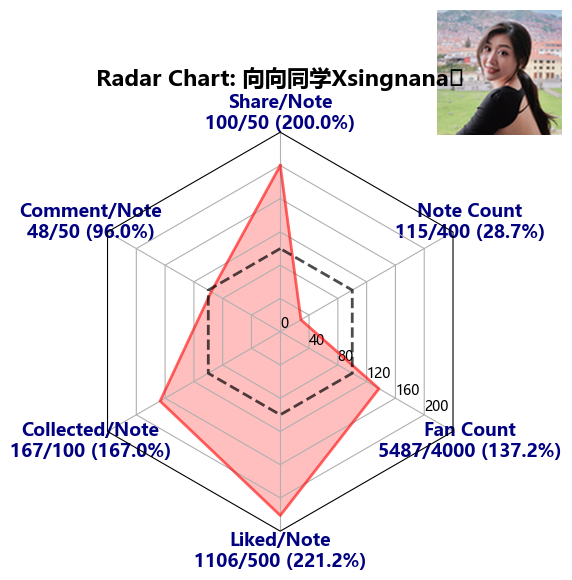

In [143]:
# Suppress font-related warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    try:
        fig = visualize_radar(metrics, normalization_bases)
        plt.show()
    except Exception as e:
        print(f"可视化生成失败: {e}")

In [145]:
notes = [
{
        "note_id": "664a05a6000000001401aad7",
        "type": "video",
        "title": "终于和Kyrie击拳了👊",
        "desc": "今夜是达拉斯独行侠粉丝的狂欢夜！我们赢下了G6，挺进西决！看完球在停车场偶遇Kyrie，人也太nice了，还和我用中文说了谢谢，粉了粉了！\n#达拉斯[话题]# #凯里欧文[话题]#  #达拉斯独行侠[话题]# #欧文[话题]# #nba[话题]# #球星[话题]# #达拉斯生活[话题]# #篮球[话题]# #达拉斯生活[话题]# #追星[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g2t0312vv8t5k66704a13csd48ihp6c0unu8",
        "time": 1716127142000,
        "last_update_time": 1725599525000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "3168",
        "collected_count": "474",
        "comment_count": "149",
        "share_count": "158",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151231/059d9690bf1886237621ddd24f3983a4/1040g008313fb9mgk7q004a13csd48ihpu625p5g!nd_dft_wlteh_jpg_3",
        "tag_list": "达拉斯,凯里欧文,达拉斯独行侠,欧文,nba,球星,达拉斯生活,篮球,追星",
        "last_modify_ts": 1742013939185,
        "note_url": "https://www.xiaohongshu.com/explore/664a05a6000000001401aad7?xsec_token=ABhv6goemjZ-fFhQMAkBW1SzE_21qmBvRg4gg4CJuQ_aA=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABhv6goemjZ-fFhQMAkBW1SzE_21qmBvRg4gg4CJuQ_aA="
    },
    {
        "note_id": "67aafd7c0000000029008beb",
        "type": "video",
        "title": "又见欧总！",
        "desc": "#欧文[话题]# #独行侠[话题]# #nba[话题]# #怎么能这么帅[话题]# #达拉斯生活[话题]# #北美生活[话题]# #篮球[话题]# #追星[话题]# #球星[话题]# #就问你帅不帅[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g0cg31dolgvndgm004a13csd48ihp9m5hh6o",
        "time": 1739259260000,
        "last_update_time": 1739259260000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "4549",
        "collected_count": "551",
        "comment_count": "173",
        "share_count": "445",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151232/de0939a9a6aa232d7989d64609d743cd/1040g2sg31dolluqdgu004a13csd48ihppuu5dfg!nd_dft_wlteh_jpg_3",
        "tag_list": "欧文,独行侠,nba,怎么能这么帅,达拉斯生活,北美生活,篮球,追星,球星,就问你帅不帅",
        "last_modify_ts": 1742013939243,
        "note_url": "https://www.xiaohongshu.com/explore/67aafd7c0000000029008beb?xsec_token=ABhCiqVIcxqITvBuXaV7ihHU9eJBi_tlfki-exUcjxEu4=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABhCiqVIcxqITvBuXaV7ihHU9eJBi_tlfki-exUcjxEu4="
    },
    {
        "note_id": "67ce1f8c000000002803e4bb",
        "type": "video",
        "title": "达拉斯主场球迷大喊Fire Nico，Nico战术喝水",
        "desc": "#独行侠[话题]# #NBA[话题]# #篮球[话题]# #我在现场看球赛[话题]# #北美生活[话题]# #球迷[话题]# #藏不住了我是球迷[话题]# #达拉斯生活[话题]# #nba[话题]# #东契奇[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/1040g00g31eqvgv69mie04a13csd48ihp6510u2o",
        "time": 1741561740000,
        "last_update_time": 1741561741000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "86",
        "collected_count": "6",
        "comment_count": "36",
        "share_count": "18",
        "ip_location": "美国",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151232/ae640e25bd133ba8891fb5d9b91dac25/1040g00831eqvgv6766004a13csd48ihpnajji18!nd_dft_wlteh_jpg_3",
        "tag_list": "独行侠,NBA,篮球,我在现场看球赛,北美生活,球迷,藏不住了我是球迷,达拉斯生活,nba,东契奇",
        "last_modify_ts": 1742013939304,
        "note_url": "https://www.xiaohongshu.com/explore/67ce1f8c000000002803e4bb?xsec_token=ABoMP3duot0bS-5q9BqkhjrpGUWZefDuTpV5YXfmYJET4=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABoMP3duot0bS-5q9BqkhjrpGUWZefDuTpV5YXfmYJET4="
    },
    {
        "note_id": "67c7564400000000280343ab",
        "type": "normal",
        "title": "年轻人未来是你的～",
        "desc": "真羡慕基恩埃利斯的身体素质，能跑能跳还能投，希望能一直保持健康！\n#基恩埃利斯[话题]# #国王队[话题]# #NBA[话题]# #篮球[话题]# #北美生活[话题]# #追星[话题]# #球星[话题]# #篮球需要沉淀[话题]# #篮球男孩[话题]# #偶遇明星[话题]#",
        "video_url": "",
        "time": 1741116996000,
        "last_update_time": 1741116996000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "10",
        "collected_count": "0",
        "comment_count": "1",
        "share_count": "0",
        "ip_location": "美国",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151233/d8cfc3f4e86116becb314b2affa2b6c6/notes_pre_post/1040g3k031ekbbn0uh0004a13csd48ihpai9cuao!nd_dft_wlteh_jpg_3",
        "tag_list": "基恩埃利斯,国王队,NBA,篮球,北美生活,追星,球星,篮球需要沉淀,篮球男孩,偶遇明星",
        "last_modify_ts": 1742013939367,
        "note_url": "https://www.xiaohongshu.com/explore/67c7564400000000280343ab?xsec_token=AB8gjRLl6nMuHIms7VbX0vj1p6X3A-DiIWuq1qUAfGMGs=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB8gjRLl6nMuHIms7VbX0vj1p6X3A-DiIWuq1qUAfGMGs="
    },
    {
        "note_id": "67c6ad7200000000290130b0",
        "type": "normal",
        "title": "喜提富尔茨To签",
        "desc": "还有人记得富尔茨嘛，不过有一说一，魔术的暗花图案实在是太帅了！\n#富尔茨[话题]# #NBA[话题]# #藏不住了我是球迷[话题]# #篮球[话题]# #北美生活[话题]# #球星[话题]# #追星[话题]# #亲签[话题]# #球衣[话题]# #我们永远记得你[话题]#",
        "video_url": "",
        "time": 1741073778000,
        "last_update_time": 1741073779000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "18",
        "collected_count": "0",
        "comment_count": "6",
        "share_count": "1",
        "ip_location": "美国",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151233/f18f82c54fc2ba6eec0dd49667286ace/notes_pre_post/1040g3k031ejmpvcg0s004a13csd48ihp3aoeuk0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151233/a0a51f4154cef78cb8726ca23eff7703/notes_pre_post/1040g3k031ejmpvcg0s0g4a13csd48ihpcskq8og!nd_dft_wlteh_jpg_3",
        "tag_list": "富尔茨,NBA,藏不住了我是球迷,篮球,北美生活,球星,追星,亲签,球衣,我们永远记得你",
        "last_modify_ts": 1742013939431,
        "note_url": "https://www.xiaohongshu.com/explore/67c6ad7200000000290130b0?xsec_token=ABnLmdG7B92Z_pmuxSwdL-aN3XC-DuwNDPw8T8pvpVc3M=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABnLmdG7B92Z_pmuxSwdL-aN3XC-DuwNDPw8T8pvpVc3M="
    },
    {
        "note_id": "67c696980000000028034f65",
        "type": "video",
        "title": "克莱对欧文的受伤口吐芬芳😂",
        "desc": "今天独行侠对阵国王的比赛中，欧文在第一节就不幸扭伤膝盖提前离场，我和克莱说：“How is kyire going so far? We can’t lose you any more, please stay healthy! ” 克莱笑笑和我说欧文will be alright，看来问题不大，然后就直摇头口吐芬芳吐槽这太糟糕了哈哈哈哈，可能是想到了2019年也在受伤后坚持站上罚球线的自己吧，那种无奈只有过来人才懂！不过还是很耐心地满足了我的签名愿望～\n希望欧总能快快好起来！！！\n#欧文[话题]# #克莱汤普森[话题]# #独行侠[话题]# #篮球[话题]# #球星[话题]# #nba[话题]# #追星[话题]##藏不住了我是球迷[话题]# #北美生活[话题]# #用篮球表达心情[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g0cg31ejjtq2ggk004a13csd48ihpkdevr80",
        "time": 1741067929000,
        "last_update_time": 1741070950000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "1891",
        "collected_count": "172",
        "comment_count": "126",
        "share_count": "89",
        "ip_location": "美国",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151233/dd7c39eb09ee7236750b8e89608edcd0/1040g00831ejk428ch0704a13csd48ihps7pfpn0!nd_dft_wlteh_jpg_3",
        "tag_list": "欧文,克莱汤普森,独行侠,篮球,球星,nba,追星,藏不住了我是球迷,北美生活,用篮球表达心情",
        "last_modify_ts": 1742013939493,
        "note_url": "https://www.xiaohongshu.com/explore/67c696980000000028034f65?xsec_token=ABnLmdG7B92Z_pmuxSwdL-aF8I3bWDnLBw0eOPbdcRaHQ=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABnLmdG7B92Z_pmuxSwdL-aF8I3bWDnLBw0eOPbdcRaHQ="
    },
    {
        "note_id": "67c52bb0000000002900a893",
        "type": "normal",
        "title": "慈善晚宴前逮住了老小～",
        "desc": "一身西装太酷了，真是和老科越来越像了！\n#克里斯蒂[话题]# #独行侠[话题]# #nba[话题]# #篮球[话题]# #追星[话题]# #球星[话题]# #北美生活[话题]# #达拉斯[话题]# #藏不住了我是球迷[话题]# #亲签[话题]#",
        "video_url": "",
        "time": 1740975024000,
        "last_update_time": 1740975150000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "240",
        "collected_count": "12",
        "comment_count": "20",
        "share_count": "12",
        "ip_location": "美国",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151234/ee9562729807c823dabfceef3c348ba6/notes_pre_post/1040g3k031ei7o3edgu004a13csd48ihpen8fe00!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151234/4204ed3dd63cac78c1e6ee725e63b784/notes_pre_post/1040g3k031ei7o3edgu0g4a13csd48ihpvgb0q68!nd_dft_wlteh_jpg_3",
        "tag_list": "克里斯蒂,独行侠,nba,篮球,追星,球星,北美生活,达拉斯,藏不住了我是球迷,亲签",
        "last_modify_ts": 1742013939591,
        "note_url": "https://www.xiaohongshu.com/explore/67c52bb0000000002900a893?xsec_token=AB1iSQvr5vBUixMSDmx1m3KHsuDuA-4Omefb7_8TS49v0=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB1iSQvr5vBUixMSDmx1m3KHsuDuA-4Omefb7_8TS49v0="
    },
    {
        "note_id": "67c4dcc80000000029033a67",
        "type": "normal",
        "title": "老子库兹马，又帅又能打",
        "desc": "#库兹马[话题]# #密尔沃基雄鹿[话题]# #nba[话题]# #篮球[话题]# #北美生活[话题]# #追星[话题]# #球星[话题]# #用篮球来表达心情[话题]# #藏不住了我是球迷[话题]# #每日穿搭[话题]#",
        "video_url": "",
        "time": 1740954824000,
        "last_update_time": 1740954825000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "38",
        "collected_count": "1",
        "comment_count": "1",
        "share_count": "2",
        "ip_location": "美国",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151234/30bf3b68287502107cc9697f75471f66/1040g00831ehu65u7h0004a13csd48ihp87p5pgo!nd_dft_wlteh_jpg_3",
        "tag_list": "库兹马,密尔沃基雄鹿,nba,篮球,北美生活,追星,球星,用篮球来表达心情,藏不住了我是球迷,每日穿搭",
        "last_modify_ts": 1742013939653,
        "note_url": "https://www.xiaohongshu.com/explore/67c4dcc80000000029033a67?xsec_token=ABd7IMDuNOBsuMYO_lTj4LnMzfr8veOwYjFLspZ8H-y_s=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABd7IMDuNOBsuMYO_lTj4LnMzfr8veOwYjFLspZ8H-y_s="
    },
    {
        "note_id": "67c4d44b000000002902b329",
        "type": "video",
        "title": "哟，这不字母哥么",
        "desc": "#字母哥[话题]# #密尔沃基雄鹿[话题]# #nba[话题]# #篮球[话题]# #北美生活[话题]# #追星[话题]# #球星[话题]# #扬尼斯阿德托昆博[话题]# #亲签[话题]# #藏不住了我是球迷[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/1040g2so31eht4oqv10704a13csd48ihpneiob28",
        "time": 1740952651000,
        "last_update_time": 1740952652000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "34",
        "collected_count": "2",
        "comment_count": "3",
        "share_count": "4",
        "ip_location": "美国",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151235/ffab8201d2bc3e18b56dbb21998ed4cd/1040g2sg31eht4oqk0u704a13csd48ihpb3pugag!nd_dft_wlteh_jpg_3",
        "tag_list": "字母哥,密尔沃基雄鹿,nba,篮球,北美生活,追星,球星,扬尼斯阿德托昆博,亲签,藏不住了我是球迷",
        "last_modify_ts": 1742013939713,
        "note_url": "https://www.xiaohongshu.com/explore/67c4d44b000000002902b329?xsec_token=ABd7IMDuNOBsuMYO_lTj4LnF0r2Sg5sd2uylqzYOE57YQ=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABd7IMDuNOBsuMYO_lTj4LnF0r2Sg5sd2uylqzYOE57YQ="
    },
    {
        "note_id": "67c4020c0000000029010efd",
        "type": "normal",
        "title": "喜提莱宝和马绍尔的To签",
        "desc": "这周末参加了莱宝和马绍尔的粉丝见面会，独行侠的球星真是一点架子都没有，to签的小小要求很容易就满足了，ins上@了莱宝居然几分钟内立马就看了我的快拍哈哈哈，果然不打球的日子还是很清闲，希望莱宝快快回归赛场，让我欧总一个人扛着球队走太累了～\n#莱夫利[话题]# #纳吉马绍尔[话题]# #独行侠[话题]# #藏不住了我是球迷[话题]# #nba[话题]# #北美生活[话题]# #达拉斯生活[话题]# #追星[话题]# #球星[话题]# #篮球[话题]#",
        "video_url": "",
        "time": 1740898828000,
        "last_update_time": 1740898874000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "74",
        "collected_count": "4",
        "comment_count": "10",
        "share_count": "4",
        "ip_location": "美国",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151235/3d17126a27fa14dc706b1539a8bf6649/notes_pre_post/1040g3k031eh3a28ugu004a13csd48ihpma0br28!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151235/766203f0a38a57c3cec88b992ff2dac8/notes_pre_post/1040g3k031eh3a28ugu0g4a13csd48ihpk777vb8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151235/8ca9f5082d88a52166c490afefa0e163/notes_pre_post/1040g3k031eh3a28ugu104a13csd48ihppsmjfe0!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151235/4f36756068ef8bccbbe779a2db92d779/notes_pre_post/1040g3k031eh3a28ugu1g4a13csd48ihpsnovroo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151235/eb2918774a54b969bbbda6da55a2f5f0/notes_pre_post/1040g3k031eh3a28ugu204a13csd48ihprgpkdng!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151235/c01ee56cb9d4bc00cc7a2ebf13e1a30a/notes_pre_post/1040g3k031eh3a28ugu2g4a13csd48ihp9ut83k8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151235/9f40711e9b7c054ba03aefe2f88c6a9b/notes_pre_post/1040g3k031eh3a28ugu304a13csd48ihpkq8ejt8!nd_dft_wlteh_jpg_3",
        "tag_list": "莱夫利,纳吉马绍尔,独行侠,藏不住了我是球迷,nba,北美生活,达拉斯生活,追星,球星,篮球",
        "last_modify_ts": 1742013939773,
        "note_url": "https://www.xiaohongshu.com/explore/67c4020c0000000029010efd?xsec_token=ABd7IMDuNOBsuMYO_lTj4LnBW-dAHYlg7akrdyWU3sIe4=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABd7IMDuNOBsuMYO_lTj4LnBW-dAHYlg7akrdyWU3sIe4="
    },
    {
        "note_id": "67c15a4e000000002900c75c",
        "type": "video",
        "title": "身患癌症的球迷希望你能看到来自欧文的祷告",
        "desc": "赴山河惊鸿宴 这位朋友，希望欧文的祷告能帮你早日康复战胜病魔，去完成还没有实现的目标！\n#欧文[话题]# #独行侠[话题]# #用篮球表达心情[话题]# #nba[话题]# #最喜欢的nba球星[话题]# #偶像的力量[话题]# #抗癌[话题]# #传递正能量[话题]# #北美生活[话题]# #球星[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g0cg31eeg4uihh0t04a13csd48ihp5qtb4p8",
        "time": 1740724814000,
        "last_update_time": 1740729265000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "321",
        "collected_count": "36",
        "comment_count": "14",
        "share_count": "14",
        "ip_location": "美国",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151235/4cb5e70056011895da604815dd6de867/1040g00831eeg5f1rgs0g4a13csd48ihpqg86pu0!nd_dft_wlteh_jpg_3",
        "tag_list": "欧文,独行侠,用篮球表达心情,nba,最喜欢的nba球星,偶像的力量,抗癌,传递正能量,北美生活,球星",
        "last_modify_ts": 1742013939842,
        "note_url": "https://www.xiaohongshu.com/explore/67c15a4e000000002900c75c?xsec_token=ABZSFLCuP96qWlTyvGHVqlLGxc4Bthhqm7lfQ7D53UAdg=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABZSFLCuP96qWlTyvGHVqlLGxc4Bthhqm7lfQ7D53UAdg="
    },
    {
        "note_id": "67b976f1000000002900dcb4",
        "type": "video",
        "title": "哈哈总算混到和PJ的合照了",
        "desc": "今天放弃签名只求和PJ华盛顿能够同框一回，总算如愿以偿了～\n#PJ华盛顿[话题]# #独行侠[话题]# #合影[话题]# #追星[话题]# #北美生活[话题]# #达拉斯生活[话题]# #篮球[话题]# #nba[话题]# #球星[话题]# #我和我的偶像[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g0cg31e6pt0v20m704a13csd48ihp9pi637o",
        "time": 1740207857000,
        "last_update_time": 1740207858000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "48",
        "collected_count": "7",
        "comment_count": "3",
        "share_count": "0",
        "ip_location": "美国",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151236/837fe3bbe34e64e87f26529ea8e42d2e/1040g00831e6q0crbgu004a13csd48ihpi7nc1d8!nd_dft_wlteh_jpg_3",
        "tag_list": "PJ华盛顿,独行侠,合影,追星,北美生活,达拉斯生活,篮球,nba,球星,我和我的偶像",
        "last_modify_ts": 1742013939904,
        "note_url": "https://www.xiaohongshu.com/explore/67b976f1000000002900dcb4?xsec_token=AB1qXjpy_cH5022HGlZEGBUp9CvA_pi7o65tjK75t9_Ik=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB1qXjpy_cH5022HGlZEGBUp9CvA_pi7o65tjK75t9_Ik="
    },
    {
        "note_id": "67b96b8d000000002902798c",
        "type": "video",
        "title": "欧总又来给大伙签名啦！",
        "desc": "激动的心颤抖的手，欧总又耐心地给球迷们签名，爱了爱了！！！\n#欧文[话题]# #独行侠[话题]# #藏不住了我是球迷[话题]# #nba[话题]# #篮球[话题]# #北美生活[话题]# #达拉斯生活[话题]# #追星[话题]# #优质偶像[话题]# #追星日常[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/1040g00g31e6ojfj00me04a13csd48ihphi54j30",
        "time": 1740204941000,
        "last_update_time": 1740204942000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "196",
        "collected_count": "23",
        "comment_count": "19",
        "share_count": "9",
        "ip_location": "美国",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151237/c28dc2dbd4a5717c23720abb1f063cc5/1040g2sg31e6ojfj30s704a13csd48ihppd99pa0!nd_dft_wlteh_jpg_3",
        "tag_list": "欧文,独行侠,藏不住了我是球迷,nba,篮球,北美生活,达拉斯生活,追星,优质偶像,追星日常",
        "last_modify_ts": 1742013939966,
        "note_url": "https://www.xiaohongshu.com/explore/67b96b8d000000002902798c?xsec_token=AB1qXjpy_cH5022HGlZEGBUqy3w-KZCedIKgAsFPCQPd4=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB1qXjpy_cH5022HGlZEGBUqy3w-KZCedIKgAsFPCQPd4="
    },
    {
        "note_id": "67b8176f000000002a00c054",
        "type": "normal",
        "title": "打卡达拉斯客串江湖",
        "desc": "冲着锅包肉来的，没有让人失望，分量很足，上菜速度也很快，值得一试～\n‼️地址：1820 Coit Rd #115[话题]#, Plano, TX 75075\n\t\n#达拉斯生活[话题]# #达拉斯美食[话题]# #北美生活[话题]# #锅包肉[话题]# #打卡[话题]# #探店[话题]# #中餐[话题]# #美食[话题]# #德州[话题]# #我有一个中国胃[话题]#",
        "video_url": "",
        "time": 1740117872000,
        "last_update_time": 1740117872000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "17",
        "collected_count": "10",
        "comment_count": "2",
        "share_count": "11",
        "ip_location": "美国",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151237/82c788ed4d09b9e3cae04bf438ee89d5/1040g00831e5f2pps0s004a13csd48ihpio36udg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151237/b8a100b64961ba892576e468dbc0446e/1040g00831e5f2pps0s0g4a13csd48ihpk1henm0!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151237/8f0afbb4f95301823039d2fec412abc6/1040g00831e5f2pps0s104a13csd48ihpk5k4m90!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151237/95ab15a331622604dbe9c1ff12e93bbf/1040g00831e5f2pps0s1g4a13csd48ihpks4nbn0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151237/780c3eec400c9a937f2cee34db259987/1040g00831e5f2pps0s204a13csd48ihpph5oft0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151237/c01988afd5fe490f9b2d663a3121cacf/1040g00831e5f2pps0s2g4a13csd48ihpkuvhqc8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151237/eb951b9915f5fd15b05cbb31e21ef0d1/1040g00831e5f2pps0s304a13csd48ihp73igpq0!nd_dft_wlteh_jpg_3",
        "tag_list": "115,达拉斯生活,达拉斯美食,北美生活,锅包肉,打卡,探店,中餐,美食,德州,我有一个中国胃",
        "last_modify_ts": 1742013940028,
        "note_url": "https://www.xiaohongshu.com/explore/67b8176f000000002a00c054?xsec_token=ABeq_jx6HQaj5w3u2iGIdqRCVJOy2Vlun5mztnXtRJX-s=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABeq_jx6HQaj5w3u2iGIdqRCVJOy2Vlun5mztnXtRJX-s="
    },
    {
        "note_id": "67b1858d0000000029008f3a",
        "type": "normal",
        "title": "也是在湾区邂逅克莱了",
        "desc": "没想到克莱会在湾区Shoe Palace的KT10球鞋发售活动呆了整整一个下午，也太敬业了，我和他说我从达拉斯来参加活动，还给他看了我存在手机里他小时候的照片，他居然和我说：“I am always a Lakers fan!” 直接给我整不会了，可能luka去了湖人最伤心的是克莱吧！\n\t\n在休息时间还偶遇了鲁尼，天哥和马也哥，没想到马也哥还记得我，不过实话实说真人比社媒上要帅太多了哈哈！！！@叶全错 @XCin\n#克莱汤普森[话题]# #安踏[话题]# #nba[话题]# #藏不住了我是球迷[话题]# #追星[话题]# #北美生活[话题]# #湾区生活[话题]# #篮球[话题]# #nba全明星[话题]# #用篮球来表达心情[话题]#",
        "video_url": "",
        "time": 1739687309000,
        "last_update_time": 1739688247000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "82",
        "collected_count": "7",
        "comment_count": "9",
        "share_count": "10",
        "ip_location": "美国",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151237/598601906b011a0c1fc2d6e55e2434f1/notes_pre_post/1040g3k831dv1feqe0sbg4a13csd48ihp39bl4lg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151237/96360c7947bf7cd63bbf4ecd379b7656/notes_pre_post/1040g3k831dv1feqe0sc04a13csd48ihpkc74dbo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151237/b6a7fabef9a1be277fd4b83f93870452/notes_pre_post/1040g3k831dv1feqe0scg4a13csd48ihp1okf7fg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151237/c56c1a1d560162a7a6ea104e79cb83f6/notes_pre_post/1040g3k831dv1feqe0sd04a13csd48ihpjs193p0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151237/934a5adde852ee36772e0207dd2afb66/notes_pre_post/1040g3k831dv1feqe0sdg4a13csd48ihpe94j1co!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151237/fc58ec6102f0cc057aeeb4025291a188/notes_pre_post/1040g3k831dv1jh3v0s704a13csd48ihpthbrtu0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151237/85f488fb70eb37e49b60f38b19ffde33/notes_pre_post/1040g3k831dv1jh3v0s7g4a13csd48ihpusaddd0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151237/922f8efeb09fd42e6988de377d78cf82/notes_pre_post/1040g3k831dv1jh3v0s804a13csd48ihp38gmfuo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151237/7f03aa10f73bc4d152c085790e15e2a4/notes_pre_post/1040g3k831dv1jh3v0s8g4a13csd48ihpbcae43g!nd_dft_wgth_jpg_3",
        "tag_list": "克莱汤普森,安踏,nba,藏不住了我是球迷,追星,北美生活,湾区生活,篮球,nba全明星,用篮球来表达心情",
        "last_modify_ts": 1742013940087,
        "note_url": "https://www.xiaohongshu.com/explore/67b1858d0000000029008f3a?xsec_token=ABResHcAnKBfUyOOsgFq5ASdAmySueu65IqxygmhssNA0=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABResHcAnKBfUyOOsgFq5ASdAmySueu65IqxygmhssNA0="
    },
    {
        "note_id": "67b15ebb000000002803ce19",
        "type": "video",
        "title": "小孩：去TM的篮球梦",
        "desc": "在NBA全明星周末来看克莱参加Shoe Palace举办的KT10 Coin新配色发布，克莱让小朋友们体验了一把NBA的强度～\n#克莱汤普森[话题]# #nba[话题]# #篮球需要沉淀[话题]# #篮球[话题]# #篮球男孩[话题]# #追星[话题]# #北美生活[话题]# #用篮球说话[话题]# #湾区[话题]# #安踏[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/1040g2so31dut1ht6gs704a13csd48ihpat33kng",
        "time": 1739677371000,
        "last_update_time": 1739677372000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "909",
        "collected_count": "97",
        "comment_count": "44",
        "share_count": "24",
        "ip_location": "美国",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151238/53ee9f01ab9d115344496677dd0f8510/1040g2sg31dut1htb0m004a13csd48ihpulk160o!nd_dft_wlteh_jpg_3",
        "tag_list": "克莱汤普森,nba,篮球需要沉淀,篮球,篮球男孩,追星,北美生活,用篮球说话,湾区,安踏",
        "last_modify_ts": 1742013940145,
        "note_url": "https://www.xiaohongshu.com/explore/67b15ebb000000002803ce19?xsec_token=ABResHcAnKBfUyOOsgFq5ASToGvTu_ExrM3fF-l_3sSYE=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABResHcAnKBfUyOOsgFq5ASToGvTu_ExrM3fF-l_3sSYE="
    },
    {
        "note_id": "67ad8b50000000002503cde4",
        "type": "video",
        "title": "欧文狂砍42分在赛后给我签名啦！优质偶像圈粉无数～\n#欧文[话题]# #独行侠[话题]# #nba[话题]# #藏不住了我是球迷[话题]# #亲签[话题]# #追星[话题]# #篮球[话题]# #北美生活[话题]# #达拉斯生活[话题]# #我在现场看球赛[话题]#",
        "desc": "欧文狂砍42分在赛后给我签名啦！优质偶像圈粉无数～\n#欧文[话题]# #独行侠[话题]# #nba[话题]# #藏不住了我是球迷[话题]# #亲签[话题]# #追星[话题]# #篮球[话题]# #北美生活[话题]# #达拉斯生活[话题]# #我在现场看球赛[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/1040g00g31dr5ft1h0me04a13csd48ihpfa932u0",
        "time": 1739426640000,
        "last_update_time": 1739426641000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "844",
        "collected_count": "55",
        "comment_count": "34",
        "share_count": "37",
        "ip_location": "美国",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151238/dc39f16ddfda27cc37c4109ac99edc70/1040g2sg31dr5ft1a0k704a13csd48ihpc5n2fuo!nd_dft_wlteh_jpg_3",
        "tag_list": "欧文,独行侠,nba,藏不住了我是球迷,亲签,追星,篮球,北美生活,达拉斯生活,我在现场看球赛",
        "last_modify_ts": 1742013940208,
        "note_url": "https://www.xiaohongshu.com/explore/67ad8b50000000002503cde4?xsec_token=ABooClkILh4Mn76lsDRo8Legjh62NHPgirn8XQHfZD3Tk=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABooClkILh4Mn76lsDRo8Legjh62NHPgirn8XQHfZD3Tk="
    },
    {
        "note_id": "67a8509300000000290252e6",
        "type": "video",
        "title": "开心 喜提莱夫利亲签",
        "desc": "今天球队赢球莱夫利心情大好，给等候的球迷一一签名\n#莱夫利[话题]# #独行侠[话题]# #藏不住了我是球迷[话题]# #NBA[话题]# #追星[话题]# #达拉斯生活[话题]# #签名球衣[话题]# #球星[话题]# #北美生活[话题]# #球星[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g0cg31dm1gfpqgk0g4a13csd48ihphcutr3g",
        "time": 1739083923000,
        "last_update_time": 1739161948000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "261",
        "collected_count": "23",
        "comment_count": "20",
        "share_count": "19",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151239/cf7cb4c7ba4b1b0f14b4e2373498621e/1040g00831dn786300u0g4a13csd48ihpb1pl1e0!nd_dft_wlteh_jpg_3",
        "tag_list": "莱夫利,独行侠,藏不住了我是球迷,NBA,追星,达拉斯生活,签名球衣,球星,北美生活",
        "last_modify_ts": 1742013940269,
        "note_url": "https://www.xiaohongshu.com/explore/67a8509300000000290252e6?xsec_token=ABrS4plAHCp4jeepN25tPJzbNLUgfrehS9LRkvtjJhSlc=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABrS4plAHCp4jeepN25tPJzbNLUgfrehS9LRkvtjJhSlc="
    },
    {
        "note_id": "67a84e0a0000000029024b2f",
        "type": "video",
        "title": "喜提加福德To签",
        "desc": "今天是德州德比，独行侠主场对战火箭队，加福德迎来的自己的新帮手戴维斯，全队释出18记盖帽刷新纪录，没想到他场上硬汉 场下柔情，球迷的愿望都一一满足，希望他能一直保持健康，带领独行侠继续北伐！\n#独行侠[话题]# #加福德[话题]# #藏不住了我是球迷[话题]# #签名球衣[话题]# #球星[话题]# #达拉斯生活[话题]# #北美生活[话题]# #NBA[话题]# #追星[话题]# #篮球[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g0cg31dm1gfpqgk004a13csd48ihphuv2ctg",
        "time": 1739083274000,
        "last_update_time": 1739083274000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "314",
        "collected_count": "29",
        "comment_count": "20",
        "share_count": "28",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151239/ec730534eab8b655fbd3c67f3093e597/1040g2sg31dm1oce60s704a13csd48ihpfmobk48!nd_dft_wlteh_jpg_3",
        "tag_list": "独行侠,加福德,藏不住了我是球迷,签名球衣,球星,达拉斯生活,北美生活,NBA,追星,篮球",
        "last_modify_ts": 1742013940329,
        "note_url": "https://www.xiaohongshu.com/explore/67a84e0a0000000029024b2f?xsec_token=ABrS4plAHCp4jeepN25tPJzZ2K1pncTSyp0x9nnKWICPY=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABrS4plAHCp4jeepN25tPJzZ2K1pncTSyp0x9nnKWICPY="
    },
    {
        "note_id": "67a52d570000000029030640",
        "type": "normal",
        "title": "尝到纽约第五大道LV限定的巧克力啦",
        "desc": "周末被小红书种草来打卡位于纽约第五大道的LV手提箱大楼～做了攻略后了解到马路对面的LV旗舰店有限定的巧克力可以买，而且听说只有这一家店可以买到LV限定的巧克力，是来纽约送人伴手礼的不二选择，推荐那款巧克力球，里面带坚果夹心，听说是卖的最好的一款～\n‼️地址：6 E 57th St, New York, NY 10022\n#LV[话题]# #高颜值巧克力[话题]# #巧克力[话题]# #潮奢新地标[话题]# #路易威登[话题]# #纽约[话题]# #纽约生活[话题]# #纽约美食[话题]#  #第五大道[话题]# #北美生活[话题]#",
        "video_url": "",
        "time": 1738878295000,
        "last_update_time": 1738878996000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "8",
        "collected_count": "1",
        "comment_count": "0",
        "share_count": "7",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151239/a67596d6056f5f2a90d04afc28d42ab5/1040g00831dj005lugs504a13csd48ihp409h650!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151239/d3d161df81dbee278a642b7780fc00ab/1040g00831dj005lugs0g4a13csd48ihpua0uk30!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151239/8d0ce477b5323d06f4696047d2d19a72/1040g00831dj005lugs104a13csd48ihphbj78b0!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151239/1606614e0180f12db126cb67030b57cd/1040g00831dj005lugs1g4a13csd48ihpfc525u8!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151239/2fdc21d9dfe75834ef6a97d2ff5f24bc/1040g00831dj005lugs204a13csd48ihp9apf6d0!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151239/7e4521551b7b978978b2ecb14dc9185f/1040g00831dj005lugs2g4a13csd48ihpfdbf4jg!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151239/45ae4aeeff5fbd6240aa7cc7d43a5de1/1040g00831dj005lugs304a13csd48ihpjnsg10g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151239/68fdbeee6d795419d5c4a4cd7e7336f0/1040g00831dj005lugs3g4a13csd48ihp7idrrog!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151239/4a86b84c503ead8c753885e3850a0357/1040g00831dj005lugs404a13csd48ihplqb1928!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151239/12f7db6945e4c3b3e97a82c8ceb6002e/1040g00831dj005lugs4g4a13csd48ihp4do1l6o!nd_dft_wlteh_jpg_3",
        "tag_list": "LV,高颜值巧克力,巧克力,潮奢新地标,路易威登,纽约,纽约生活,纽约美食,第五大道,北美生活",
        "last_modify_ts": 1742013940389,
        "note_url": "https://www.xiaohongshu.com/explore/67a52d570000000029030640?xsec_token=ABfXb2cOxVMRVjz65swFf0vZslhsBxZzXnJrjeXGAZx5k=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABfXb2cOxVMRVjz65swFf0vZslhsBxZzXnJrjeXGAZx5k="
    },
    {
        "note_id": "679e9ff3000000002902449b",
        "type": "video",
        "title": "特朗普在纽约的特朗普大厦被我偶遇啦！",
        "desc": "打卡纽约特朗普大厦没想到在门口看到这一幕😂\n#特朗普[话题]# #特朗普大厦[话题]# #美国总统[话题]# #纽约[话题]# #第五大道[话题]# #北美生活[话题]# #美国[话题]# #citywalk[话题]# #美国旅行[话题]# #搞笑[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/1040g2so31dcj8ar50u704a13csd48ihpqqti3k0",
        "time": 1738448883000,
        "last_update_time": 1738448884000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "903",
        "collected_count": "107",
        "comment_count": "73",
        "share_count": "140",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151240/bab34f810d1cfec32111d310fcdf4a80/1040g2sg31dcj8ar80k704a13csd48ihph2mr91o!nd_dft_wlteh_jpg_3",
        "tag_list": "特朗普,特朗普大厦,美国总统,纽约,第五大道,北美生活,美国,citywalk,美国旅行,搞笑",
        "last_modify_ts": 1742013940453,
        "note_url": "https://www.xiaohongshu.com/explore/679e9ff3000000002902449b?xsec_token=ABUi27_PLuRl0Q0XHmvzhBFYfe5j6Qu-zeqLlAjPtFlkY=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABUi27_PLuRl0Q0XHmvzhBFYfe5j6Qu-zeqLlAjPtFlkY="
    },
    {
        "note_id": "679879f3000000002901b3e5",
        "type": "normal",
        "title": "克莱今天单节命中7记三分后给我签名啦",
        "desc": "在今天独行侠主场迎战奇才队的比赛中克莱单节命中7记三分球直接打懵对手，佛光普照！今天心情大好克莱还特意帮我签了SPLASH！！！\n#克莱汤普森[话题]# #独行侠[话题]# #达拉斯生活[话题]# #nba[话题]# #篮球[话题]# #亲签球衣[话题]# #藏不住了我是球迷[话题]# #北美生活[话题]# #三分球[话题]# #追星[话题]#",
        "video_url": "",
        "time": 1738045939000,
        "last_update_time": 1738045940000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "104",
        "collected_count": "6",
        "comment_count": "18",
        "share_count": "6",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151240/034ac3145fe6d571ca96a7e58b03f4bb/1040g00831d6j42bugk004a13csd48ihpgg65gh8!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151240/a7168f93e2b7c6dcdbc78f715208dda9/1040g00831d6j42bugk0g4a13csd48ihp2ut4ug0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151240/1b1fc31c129a5165bbd4b32b6ccf2482/1040g00831d6j42bv0k004a13csd48ihphkh4lag!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151240/5b6650dbff0b5f3cf6b18fd3910e165d/1040g00831d6j42bv0k0g4a13csd48ihpnpcojn0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151240/735affcfb1fba67a7bdde0f02bd5fcaa/1040g00831d6j42bv0k104a13csd48ihpb0gk2bg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151240/b35b2da85588e30d59e5dca60f3b4338/1040g00831d6j42bv0k1g4a13csd48ihpgfut780!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151240/212c6d2dac5fa50d83e24a6a2813714b/1040g00831d6j42bv0k204a13csd48ihpmj1kt6o!nd_dft_wlteh_jpg_3",
        "tag_list": "克莱汤普森,独行侠,达拉斯生活,nba,篮球,亲签球衣,藏不住了我是球迷,北美生活,三分球,追星",
        "last_modify_ts": 1742013940512,
        "note_url": "https://www.xiaohongshu.com/explore/679879f3000000002901b3e5?xsec_token=ABKdT3FfYeeUJpkVi9tvHJDfKv1_hg2dhaHwq8V0Uq_BE=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABKdT3FfYeeUJpkVi9tvHJDfKv1_hg2dhaHwq8V0Uq_BE="
    },
    {
        "note_id": "6796ebad000000002503c6fd",
        "type": "normal",
        "title": "今天的晚餐竟然是NBA球星帮我点的！",
        "desc": "今天达拉斯独行侠队的PJ华盛顿来到Cane's炸鸡店做宣传活动，没想到我会被选中可以和他互动点餐，对业务还不熟练他还有些腼腆，手忙脚乱的操作和在球场上的霸气表现形成鲜明对比，着实有些可爱！希望他能一直保持健康，等待队友们的复出！！！\n#PJ华盛顿[话题]# #独行侠[话题]# #NBA[话题]# #达拉斯生活[话题]# #亲签球衣[话题]# #NBA球星[话题]# #炸鸡[话题]# #藏不住了我是球迷[话题]# #追星[话题]# #北美生活[话题]#",
        "video_url": "",
        "time": 1737943981000,
        "last_update_time": 1737944140000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "139",
        "collected_count": "11",
        "comment_count": "23",
        "share_count": "41",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151241/3d823fa7f35d84b26c398fcde2ecb9f9/1040g2sg31d4vlkiih0bg4a13csd48ihpuh9mi3g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151241/f281a9c4292b747b5781b59afe53902b/1040g2sg31d4vlkiih0c04a13csd48ihpc0q76ro!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151241/8140c093e80009e0f73746fe8b07307f/1040g2sg31d4vlkiih0cg4a13csd48ihpb1iu210!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151241/9519523edeb075dd2e9ab0b349be58d5/1040g2sg31d4vlkiih0d04a13csd48ihppshmccg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151241/2d31a73733e78cec7bdc8130663155f6/1040g2sg31d4vlkiih0dg4a13csd48ihppfdvplo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151241/ac00ec9ec0887629bf8445e44184ce1c/1040g00831d52g89k0s004a13csd48ihpf8nq108!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151241/e4ccf3fe212f4547db2b3ed3174100c7/1040g00831d52g89k0s0g4a13csd48ihp839iukg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151241/2126db3cf91cb8cb5778f7508b6920d9/1040g00831d52g89k0s104a13csd48ihpg0h0ub0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151241/463e01df4c0c385457eb57481f1f825a/1040g00831d52g89k0s1g4a13csd48ihp5q6bt50!nd_dft_wlteh_jpg_3",
        "tag_list": "PJ华盛顿,独行侠,NBA,达拉斯生活,亲签球衣,NBA球星,炸鸡,藏不住了我是球迷,追星,北美生活",
        "last_modify_ts": 1742013940570,
        "note_url": "https://www.xiaohongshu.com/explore/6796ebad000000002503c6fd?xsec_token=AB-gt2yiuFC5N6U-ebXMUj1AjunejvixjrffbJZX2jdmc=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB-gt2yiuFC5N6U-ebXMUj1AjunejvixjrffbJZX2jdmc="
    },
    {
        "note_id": "6795d210000000002503e5ed",
        "type": "normal",
        "title": "今天赛后欧文把亲穿球衣送给我啦！！！",
        "desc": "纪念一下人生中的第一件Game Used球衣\n感谢欧总在茫茫人海里选中了我\n也许这就是偶像与粉丝之间的双向奔赴吧\n也是终于有了专属于我和欧文之间的独家记忆～\n#欧文[话题]# #独行侠[话题]# #NBA[话题]# #球衣[话题]# #藏不住了我是球迷[话题]# #达拉斯生活[话题]# #亲穿球衣[话题]# #篮球[话题]# #球星[话题]# #球员版球衣[话题]#",
        "video_url": "",
        "time": 1737871888000,
        "last_update_time": 1737879711000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "407",
        "collected_count": "34",
        "comment_count": "69",
        "share_count": "55",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151241/1279b56112a459fddc29091323d0d23f/1040g00831d4045nggk004a13csd48ihpgf0v6b0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151241/c6975663ed500a1f1cfc913ee3b1e222/1040g00831d4045nggk0g4a13csd48ihp20b06n0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151241/eec8c074070c0cb50af57f23132e5545/1040g00831d4045nggk104a13csd48ihpohtl41o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151241/e9235c158ff0361143bb6d7928ec5c1a/1040g00831d4045nggk1g4a13csd48ihpph2v8bg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151241/e3c4c3cf74e294c8511f1e090cc3016b/1040g00831d4045nggk204a13csd48ihpehforc0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151241/78f78fe2841b1be81285b2e3a8f5893e/1040g00831d4045nggk2g4a13csd48ihp3avl8jo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151241/b256c66d494e63a1705e09b8b2528f5c/1040g00831d4045nggk304a13csd48ihpbqbs1i8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151241/89518e7a76aa7a3ce1ac4272727450ee/1040g00831d4045nggk3g4a13csd48ihpa7qhkug!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151241/c9637ca4734fa74ef7f03375e08ed2a3/1040g00831d4045nggk404a13csd48ihppn7lufo!nd_dft_wlteh_jpg_3",
        "tag_list": "欧文,独行侠,NBA,球衣,藏不住了我是球迷,达拉斯生活,亲穿球衣,篮球,球星,球员版球衣",
        "last_modify_ts": 1742013940628,
        "note_url": "https://www.xiaohongshu.com/explore/6795d210000000002503e5ed?xsec_token=AB7faVu25zvBo3Mgg9tog4MmlCn4frRXXz_yxEU6N926w=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB7faVu25zvBo3Mgg9tog4MmlCn4frRXXz_yxEU6N926w="
    },
    {
        "note_id": "6795b20b000000002901d4e4",
        "type": "video",
        "title": "终于在现场看电音教主打碟了",
        "desc": "Alan Walker来达拉斯啦！一首Faded前奏一响又勾起多少人的回忆！\n#alanwalker[话题]# #电音[话题]# #电音现场[话题]# #宝藏音乐[话题]# #现场[话题]# #超酷的LIVE现场[话题]# #达拉斯生活[话题]# #北美生活[话题]# #电音视听盛宴[话题]# #神级现场[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g0cg31d3s0lv510e04a13csd48ihpd63erbo",
        "time": 1737863691000,
        "last_update_time": 1737863691000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "29",
        "collected_count": "7",
        "comment_count": "0",
        "share_count": "1",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151242/7c4b5a1219e7df43b7853c3737320df7/1040g00831d3s78th0s004a13csd48ihpr7bv218!nd_dft_wlteh_jpg_3",
        "tag_list": "alanwalker,电音,电音现场,宝藏音乐,现场,超酷的LIVE现场,达拉斯生活,北美生活,电音视听盛宴,神级现场",
        "last_modify_ts": 1742013940688,
        "note_url": "https://www.xiaohongshu.com/explore/6795b20b000000002901d4e4?xsec_token=AB7faVu25zvBo3Mgg9tog4Mtr6tPcpDAJoZcrgEkAbYDE=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB7faVu25zvBo3Mgg9tog4Mtr6tPcpDAJoZcrgEkAbYDE="
    },
    {
        "note_id": "6787f00800000000190125c1",
        "type": "normal",
        "title": "见到玲安姐姐啦！",
        "desc": "在独行侠和掘金的比赛结束后，一眼就在茫茫人海中扫到了刚刚结束采访的玲安姐，感觉本人比电视上好看太多，人也很nice！\n姐姐合照时对光线很讲究，对直男来说是莫大的考验，姐，我们尽力了哈哈哈！😂😂😂@周玲安\n#独行侠[话题]# #掘金[话题]# #合影[话题]# #达拉斯生活[话题]# #见到了想见的人[话题]# #北美生活[话题]# #NBA[话题]# #周玲安[话题]# #记录美好生活[话题]#",
        "video_url": "",
        "time": 1736962056000,
        "last_update_time": 1736962057000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "21",
        "collected_count": "2",
        "comment_count": "1",
        "share_count": "5",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151242/4383c3a7b1c5eec547a1801faa2fd2fa/1040g2sg31cme9cnigu704a13csd48ihpkegvrbg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151242/ea67c01730d9cd64bbca661555c32d5e/1040g2sg31cme9cnigu7g4a13csd48ihphlrf8v0!nd_dft_wlteh_jpg_3",
        "tag_list": "独行侠,掘金,合影,达拉斯生活,见到了想见的人,北美生活,NBA,周玲安,记录美好生活",
        "last_modify_ts": 1742013940748,
        "note_url": "https://www.xiaohongshu.com/explore/6787f00800000000190125c1?xsec_token=ABWKzYENnj3mF8myYzsxih7lo0dfEAsq4F-1KYT5kzLLI=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABWKzYENnj3mF8myYzsxih7lo0dfEAsq4F-1KYT5kzLLI="
    },
    {
        "note_id": "6787dd65000000001802f46c",
        "type": "video",
        "title": "健康的文子回来啦！",
        "desc": "经过两个多礼拜休战的欧文终于迎来了复出，虽然比赛手感欠佳，但我们相信欧神仙的个人能力一定会调整到最佳状态！\n#欧文[话题]# #达拉斯[话题]# #独行侠[话题]# #NBA[话题]# #达拉斯生活[话题]# #最喜欢的nba球星[话题]# #追星[话题]# #球星[话题]# #北美生活[话题]# #偶像[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g2t031cmbq96lgu704a13csd48ihpi6vikkg",
        "time": 1736957285000,
        "last_update_time": 1736957285000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "1105",
        "collected_count": "94",
        "comment_count": "41",
        "share_count": "20",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151242/2911a71b17cf6584b3a4769628ee48b2/1040g00831cmc0dfmgm004a13csd48ihpin722co!nd_dft_wlteh_jpg_3",
        "tag_list": "欧文,达拉斯,独行侠,NBA,达拉斯生活,最喜欢的nba球星,追星,球星,北美生活,偶像",
        "last_modify_ts": 1742013940805,
        "note_url": "https://www.xiaohongshu.com/explore/6787dd65000000001802f46c?xsec_token=ABWKzYENnj3mF8myYzsxih7hiP-PnhiTusRsc-lsAsjuA=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABWKzYENnj3mF8myYzsxih7hiP-PnhiTusRsc-lsAsjuA="
    },
    {
        "note_id": "6784a291000000002002288d",
        "type": "video",
        "title": "哈哈穆雷赛后和独行侠球迷打成一片😂",
        "desc": "今天穆雷赛后相当低调，和助教两个人步行返回酒店，遇到了达拉斯球迷后热情地和大伙击拳打招呼～\n\t\n#穆雷[话题]# #掘金[话题]# #独行侠[话题]# #达拉斯生活[话题]# #nba[话题]# #北美生活[话题]# #篮球[话题]# #追星[话题]# #球星[话题]# #近距离看明星[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g0cg31cj6t1sc0u004a13csd48ihp7c35g8g",
        "time": 1736745617000,
        "last_update_time": 1736745617000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "62",
        "collected_count": "2",
        "comment_count": "10",
        "share_count": "0",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151243/08c3a4f4fc5bd379b41d1457aeacb3df/1040g00831cj72qcegs004a13csd48ihp53fqot0!nd_dft_wlteh_jpg_3",
        "tag_list": "穆雷,掘金,独行侠,达拉斯生活,nba,北美生活,篮球,追星,球星,近距离看明星",
        "last_modify_ts": 1742013940864,
        "note_url": "https://www.xiaohongshu.com/explore/6784a291000000002002288d?xsec_token=ABg8bKtp__db92EFCPof7hcuuQ3RKTtrZrYMjrs1hrg8E=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABg8bKtp__db92EFCPof7hcuuQ3RKTtrZrYMjrs1hrg8E="
    },
    {
        "note_id": "67849f11000000002001f073",
        "type": "video",
        "title": "恭喜克莱生涯总得分突破16000分！🎉",
        "desc": "克莱今天虽然输球了但还是很耐心地为等候的球迷一一签名，优质偶像，希望你能一直保持健康，重返巅峰！\n#克莱汤普森[话题]# #独行侠[话题]# #达拉斯生活[话题]# #北美生活[话题]# #nba[话题]# #篮球[话题]# #北美生活[话题]# #追星[话题]# #亲签球衣[话题]# #球星[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g2t031cj6463r0s7g4a13csd48ihp9l137qg",
        "time": 1736744721000,
        "last_update_time": 1736745199000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "378",
        "collected_count": "41",
        "comment_count": "10",
        "share_count": "17",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151243/2ebdc58fb4a31618d4134fa5afc856ed/1040g2sg31cj6df1agu7g4a13csd48ihpkkbcaro!nd_dft_wlteh_jpg_3",
        "tag_list": "克莱汤普森,独行侠,达拉斯生活,北美生活,nba,篮球,追星,亲签球衣,球星",
        "last_modify_ts": 1742013940924,
        "note_url": "https://www.xiaohongshu.com/explore/67849f11000000002001f073?xsec_token=ABg8bKtp__db92EFCPof7hcq-Ws1FuHMT4CoDZiMrwTV8=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABg8bKtp__db92EFCPof7hcq-Ws1FuHMT4CoDZiMrwTV8="
    },
    {
        "note_id": "67849d190000000020019be0",
        "type": "video",
        "title": "克莱生涯总得分突破16000分后给我签名啦！",
        "desc": "今天现场见证了克莱NBA生涯总得分突破16000分，虽然输球了但他还是很热心地给等候的球迷们签名，希望健康的克莱可以带领独行侠走的更远！！！\n#克莱汤普森[话题]# #达拉斯独行侠[话题]# #nba[话题]# #达拉斯生活[话题]# #追星[话题]# #篮球[话题]# #北美生活[话题]# #球星[话题]# #里程碑[话题]# #亲签[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g2t031cj6463r0s704a13csd48ihp32ba3ng",
        "time": 1736744217000,
        "last_update_time": 1736744256000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "160",
        "collected_count": "8",
        "comment_count": "8",
        "share_count": "7",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151244/2e495a7f582f494c163b2f64fc3556d4/1040g2sg31cj6df1agu704a13csd48ihpmni8ato!nd_dft_wlteh_jpg_3",
        "tag_list": "克莱汤普森,达拉斯独行侠,nba,达拉斯生活,追星,篮球,北美生活,球星,里程碑,亲签",
        "last_modify_ts": 1742013940983,
        "note_url": "https://www.xiaohongshu.com/explore/67849d190000000020019be0?xsec_token=ABg8bKtp__db92EFCPof7hctOvqwX5bY4pHJ4y9_bdVtY=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABg8bKtp__db92EFCPof7hctOvqwX5bY4pHJ4y9_bdVtY="
    },
    {
        "note_id": "677e11bf000000002002b27a",
        "type": "normal",
        "title": "独行侠终于赢来2025首胜啦🤞🤞🤞",
        "desc": "今天独行侠主场背靠背迎战詹姆斯带领的洛杉矶湖人队，本以为又是一场大败的比赛，没想到独行侠全民皆兵，最后大比分战胜了远道而来的湖人～\n今天比赛结束没想到还能抓到场边观战的费尔顿，也顺利要到了丁局长的亲签，圆满了！\n#达拉斯独行侠[话题]# #nba[话题]# #丁威迪[话题]# #达拉斯[话题]# #达拉斯生活[话题]# #北美生活[话题]# #篮球[话题]# #詹姆斯[话题]# #湖人队[话题]# #追星[话题]#",
        "video_url": "",
        "time": 1736315327000,
        "last_update_time": 1736319303000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "67",
        "collected_count": "2",
        "comment_count": "17",
        "share_count": "5",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151244/1d5a928caac353b27e4772f0c650ddd9/1040g2sg31ccpsth20m004a13csd48ihpqc4kmfo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151244/63330668a5b182ecdb8370f21d4b9ef7/1040g2sg31ccpsth20m0g4a13csd48ihpm6v4v2o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151244/40db3282bf69e9898fecc929007d94cf/1040g2sg31ccpsth20m104a13csd48ihplg28aqg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151244/2af568550bc046bc12c319238be57ad6/1040g2sg31ccpsth20m1g4a13csd48ihpld3utsg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151244/a8c37cca270dd36cd5069fd4a6d64d89/1040g2sg31ccpsth20m204a13csd48ihpma7phi8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151244/1634a4e63f5146d598635fa3c82a75dc/1040g2sg31ccpsth20m2g4a13csd48ihpnunaq70!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151244/affad3810f641cb3b8517996108c5a19/1040g2sg31ccpsth20m304a13csd48ihp19mt620!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151244/626abb43fdce122376ffdfe26d9b2dfb/1040g2sg31ccpsth20m3g4a13csd48ihpnpav3qg!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151244/30475125bbbc8222d58dc832f8d3a6bb/1040g2sg31ccpsth20m404a13csd48ihpadkg3hg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151244/ce1e66ab5e087f8ff3e18233dc28790e/1040g2sg31ccpsth20m4g4a13csd48ihpjhh6mgg!nd_dft_wlteh_jpg_3",
        "tag_list": "达拉斯独行侠,nba,丁威迪,达拉斯,达拉斯生活,北美生活,篮球,詹姆斯,湖人队,追星",
        "last_modify_ts": 1742013941042,
        "note_url": "https://www.xiaohongshu.com/explore/677e11bf000000002002b27a?xsec_token=ABcbGC-bekjstUMeKojZ_MKG4jA3l0Hc8E746lujaTlss=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABcbGC-bekjstUMeKojZ_MKG4jA3l0Hc8E746lujaTlss="
    },
    {
        "note_id": "677b6c2f0000000019035656",
        "type": "video",
        "title": "什么？在达拉斯能吃到活的烤鳗鱼！",
        "desc": "今天给朋友庆生来到了Koryo Korean BBQ品尝一下新鲜的火烤鳗鱼，后厨小哥会在上菜前给顾客展示一下即将上桌的鲜活鳗鱼，看到活的鳗鱼还是有被惊艳到～鳗鱼烤熟以后肉质也很鲜美Q弹，强推！\n‼️地址：2560 Royal Ln #105[话题]#, Dallas, TX 75229\n#烤鳗鱼[话题]# #探店[话题]# #北美生活[话题]# #达拉斯生活[话题]# #达拉斯周边[话题]# #打卡[话题]# #韩式[话题]# #鳗鱼[话题]# #流连忘返的美食体验[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g2t031ca74uhmh0704a13csd48ihphrrr08o",
        "time": 1736141871000,
        "last_update_time": 1736141871000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "32",
        "collected_count": "20",
        "comment_count": "10",
        "share_count": "51",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151245/c011d25732ce8110c7162dfe577c317d/1040g00831ca76cgggu004a13csd48ihpfb07r4g!nd_dft_wlteh_jpg_3",
        "tag_list": "105,烤鳗鱼,探店,北美生活,达拉斯生活,达拉斯周边,打卡,韩式,鳗鱼,流连忘返的美食体验",
        "last_modify_ts": 1742013941103,
        "note_url": "https://www.xiaohongshu.com/explore/677b6c2f0000000019035656?xsec_token=ABXj2ij1fQcIsmxCrFllj3xvp6yd4miTJOtT4kCUTNJSw=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABXj2ij1fQcIsmxCrFllj3xvp6yd4miTJOtT4kCUTNJSw="
    },
    {
        "note_id": "6779da58000000001300351d",
        "type": "normal",
        "title": "自驾加州一号公路～",
        "desc": "趁着圣诞假期和家人自驾一号公路从湾区到洛杉矶，一路打卡了Pismo Beach，丹麦小镇Solvang，Santa barbara和Malibu Beach，顺便到新开的Kith Malibu新店探店，时尚气息扑面而来～\n强烈推荐Santa Barbara Stearns码头的Santa Barbara Shellfish Company，他家的海胆非常新鲜，龙虾卷分量也很足！\n‼️地址：230 Stearns Wharf, Santa Barbara, CA 93109\n#加州[话题]# #一号公路[话题]# #自驾游[话题]# #北美生活[话题]# #打卡[话题]# #探店[话题]# #kith[话题]# #美食[话题]# #加州旅行[话题]# #美国[话题]#",
        "video_url": "",
        "time": 1736039000000,
        "last_update_time": 1736039356000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "8",
        "collected_count": "1",
        "comment_count": "0",
        "share_count": "0",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151246/9a8add09079f84296a255d665eb0cd49/1040g2sg31c8m4e420k7g4a13csd48ihpo4sl1so!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151246/42bf5056e8452896c05758603bfb38d1/1040g2sg31c8m4e420k804a13csd48ihpdjtbvtg!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151246/2ea4518b71109a5c373d52d231356b22/1040g2sg31c8m4e420k8g4a13csd48ihp2mfpcs8!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151246/6fb756aa7c85b66e74124ca870d8539d/1040g2sg31c8m4e420k904a13csd48ihpig7hhmo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151246/9236e1d4968e216c5169ddecfeb18558/1040g2sg31c8m4e420k9g4a13csd48ihp02r5fsg!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151246/dde5376d400e4b3eb1de49c3a27fc380/1040g2sg31c8m4e420ka04a13csd48ihphu1rnm8!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151246/a51b84827f547cdefb8e6159ed87c67a/1040g2sg31c8m4e420kag4a13csd48ihpt92116o!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151246/47cbf3b2b74bda2c751989e7043a69d1/1040g2sg31c8m4e420kb04a13csd48ihp60fgru8!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151246/2010db0beca19ea2edb5d78bf20495a8/1040g2sg31c8m4e420kc04a13csd48ihpb2s8ug0!nd_dft_wlteh_jpg_3",
        "tag_list": "加州,一号公路,自驾游,北美生活,打卡,探店,kith,美食,加州旅行,美国",
        "last_modify_ts": 1742014824958,
        "note_url": "https://www.xiaohongshu.com/explore/6779da58000000001300351d?xsec_token=ABsy232TN9Zxotg5yUA01QHmNI9j5PMXpJh8ChNF1-VhA=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABsy232TN9Zxotg5yUA01QHmNI9j5PMXpJh8ChNF1-VhA="
    },
    {
        "note_id": "67760dce00000000140213ae",
        "type": "normal",
        "title": "在达拉斯吃上正宗东北烤肉啦",
        "desc": "今天来到Plano的第一烤场品尝到了正宗的东北烤肉，给的分量也很足，值得来尝尝鲜～\n‼️地址：6900 Alma Dr #160[话题]#, Plano, TX 75023\n\t\n#达拉斯生活[话题]# #北美生活[话题]# #美国[话题]# #达拉斯[话题]# #烤肉[话题]# #探店[话题]# #必吃榜[话题]# #达拉斯美食[话题]# #东北[话题]# #达拉斯烤肉[话题]#",
        "video_url": "",
        "time": 1735790030000,
        "last_update_time": 1735794391000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "32",
        "collected_count": "16",
        "comment_count": "14",
        "share_count": "57",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151247/a2b69fe5da3a12a3191e780e28c0c8a0/1040g00831c4vd9ga0m004a13csd48ihpu641708!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151247/2e58d98b34fc2f591f56541806b0b4fd/1040g00831c4vd9ga0m0g4a13csd48ihpgmf47s8!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151247/ccbade80bbe7f15ccbdd22077c3aa0f8/1040g00831c4vd9ga0m104a13csd48ihp1srhfdo!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151247/600dcc1ee20c3bd51a5c43433a9bf34f/1040g00831c4vd9ga0m1g4a13csd48ihpvmvo2e8!nd_dft_wgth_jpg_3",
        "tag_list": "160,达拉斯生活,北美生活,美国,达拉斯,烤肉,探店,必吃榜,达拉斯美食,东北,达拉斯烤肉",
        "last_modify_ts": 1742014824961,
        "note_url": "https://www.xiaohongshu.com/explore/67760dce00000000140213ae?xsec_token=ABeZrkaZGo5RulfSbwdC9Yy0gztUipMLr87o06Hv46K28=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABeZrkaZGo5RulfSbwdC9Yy0gztUipMLr87o06Hv46K28="
    },
    {
        "note_id": "67746ead0000000013002253",
        "type": "normal",
        "title": "打卡Monterey Fish Hopper餐厅",
        "desc": "今天和家人来到位于Monterey的Fish Hopper餐厅庆祝新年，这家店的特色就是靠海可以一般看海一边享受美食，其中Ribeye Platter分量十足，让人印象深刻，来Monterey游玩看海的朋友选这家没错了！！！\n‼️地址：700 Cannery Row, Monterey, CA 93940\n\t\n#蒙特雷[话题]# #北美生活[话题]# #餐厅推荐[话题]# #一起感受异国美食[话题]# #海鲜[话题]# #加州[话题]# #餐厅推荐[话题]# #美国[话题]# #宝藏餐厅分享[话题]# #美食[话题]#",
        "video_url": "",
        "time": 1735683757000,
        "last_update_time": 1735686553000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "8",
        "collected_count": "3",
        "comment_count": "0",
        "share_count": "1",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151247/27bb0c024a4d45069ea8201079f57b20/1040g2sg31c3cko3hgm704a13csd48ihp630oho0!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151247/36f2fa5ec3330d1e9d0d846b7f0165af/1040g2sg31c3cko3hgm7g4a13csd48ihpd23up30!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151247/54ebf7f21555ee29d8f99d229afa8b1b/1040g2sg31c3cko3hgm804a13csd48ihp6t8uqi8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151247/d3658a99d71f23208fcf51532a05b40d/1040g2sg31c3cko3hgm8g4a13csd48ihptcjg6e8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151247/4c2c28c19a740e2f8ed685f835e16c11/1040g2sg31c3e2b5ugk704a13csd48ihptct8rfo!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151247/ad25099f59f2590fe95eed64ee195ffe/1040g2sg31c3e2b5ugk7g4a13csd48ihptrlim6g!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151247/15a7456d82e3771b910749762e5ab636/1040g2sg31c3e2b5ugk804a13csd48ihp6ki9d9o!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151247/259bd8d0aa7726ba47a8c23802278dcd/1040g2sg31c3e2b5ugk8g4a13csd48ihp33nbbig!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151247/ddc12fef52d60e508eb7eb2e074865ca/1040g2sg31c3e2b5ugk904a13csd48ihpphke61o!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151247/bb01727614f955b6324d2f333aa1ea45/1040g2sg31c3e2b5ugk9g4a13csd48ihp0a28890!nd_dft_wlteh_jpg_3",
        "tag_list": "蒙特雷,北美生活,餐厅推荐,一起感受异国美食,海鲜,加州,美国,宝藏餐厅分享,美食",
        "last_modify_ts": 1742014824977,
        "note_url": "https://www.xiaohongshu.com/explore/67746ead0000000013002253?xsec_token=ABS3nxaA7QUzYnGUPnNKuEWlvSZO77jRoQYyEN5UroNLs=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABS3nxaA7QUzYnGUPnNKuEWlvSZO77jRoQYyEN5UroNLs="
    },
    {
        "note_id": "6770ef1f0000000013001158",
        "type": "normal",
        "title": "打卡第一家In-N-Out Burger门店",
        "desc": "今天打卡位于洛杉矶的第一家In-N-Out Burger门店，没想到这么袖珍，不过Company Store里面的限定T恤很好看，值得一去～\n#汉堡[话题]# #洛杉矶[话题]# #美食[话题]# #探店[话题]# #小众打卡地[话题]# #北美生活[话题]# #发现城市好去处[话题]# #加州[话题]# #美国[话题]# #LA[话题]#",
        "video_url": "",
        "time": 1735454495000,
        "last_update_time": 1735580901000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "7",
        "collected_count": "4",
        "comment_count": "0",
        "share_count": "4",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151247/77520c5440cba3bcde62d2a9e6cfb909/1040g2sg31bvvdjrlgu704a13csd48ihpklr0stg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151247/0e4b083782a2d5672ec4c4cc43c3a946/1040g2sg31bvvdjrlgu7g4a13csd48ihpi5ta76g!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151247/4403a754b9fcb739779be777a91eefee/1040g2sg31bvvdjrlgu804a13csd48ihph419sng!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151247/c36ef5b41208b5064d4195a2f367fa3c/1040g2sg31bvvdjrlgu8g4a13csd48ihpfvsnk1o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151247/87193f349899b762e4dd36aa043c8617/1040g2sg31bvvdjrlgu904a13csd48ihpfbfrolg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151247/770b7d297c95e7b9ef8866455ec807b6/1040g2sg31bvvdjrlgu9g4a13csd48ihp9fulhto!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151247/e445db75080553f9388916371c552413/1040g2sg31bvvdjrlgua04a13csd48ihpk2lhh28!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151247/88a2272442fa0872bf98da795021fff7/1040g2sg31bvvdjrlguag4a13csd48ihp1vrrbno!nd_dft_wgth_jpg_3",
        "tag_list": "汉堡,洛杉矶,美食,探店,小众打卡地,北美生活,发现城市好去处,加州,美国,LA",
        "last_modify_ts": 1742014824993,
        "note_url": "https://www.xiaohongshu.com/explore/6770ef1f0000000013001158?xsec_token=ABJRxXkSHz47u97v9QqIuAvmjSKvBRIqrHv5X6MfRDq_0=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABJRxXkSHz47u97v9QqIuAvmjSKvBRIqrHv5X6MfRDq_0="
    },
    {
        "note_id": "676fab0000000000130009d3",
        "type": "video",
        "title": "在派拉蒙制片厂仓库里发现了擎天柱",
        "desc": "今天参观了派拉蒙影业位于洛杉矶的制片厂，在其中的一间仓库发现了当年拍摄变形金刚真人电影时擎天柱的道具用车，小时候想见电影里真车的梦想终于实现了！如今感叹17年一晃而过，当它在不经意间出现在我面前的时候不光是震撼，也感叹时光匆匆，理解了欲买桂花同载酒，终不似，少年游的含义～\n#变形金刚[话题]# #擎天柱[话题]# #派拉蒙[话题]# #洛杉矶[话题]# #电影[话题]# #卡车[话题]# #童年回忆[话题]# #北美生活[话题]# #梦想成真[话题]# #动画[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g0cg31buniptt0s004a13csd48ihpq02mjvg",
        "time": 1735371520000,
        "last_update_time": 1735371520000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "897",
        "collected_count": "265",
        "comment_count": "36",
        "share_count": "44",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151248/5fde8d15183af6904c995e5c62bf7f3e/1040g00831bunro4p0s004a13csd48ihp0fdhrrg!nd_dft_wlteh_jpg_3",
        "tag_list": "变形金刚,擎天柱,派拉蒙,洛杉矶,电影,卡车,童年回忆,北美生活,梦想成真,动画",
        "last_modify_ts": 1742014825007,
        "note_url": "https://www.xiaohongshu.com/explore/676fab0000000000130009d3?xsec_token=ABLHjXKFAqHvYaOOoQDAg649Ewl2yLq9g3FuX2OLR_5yw=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABLHjXKFAqHvYaOOoQDAg649Ewl2yLq9g3FuX2OLR_5yw="
    },
    {
        "note_id": "6767b49c000000001300f1f7",
        "type": "video",
        "title": "克莱真的是心情好就给签名",
        "desc": "最近克莱状态回暖，感觉从大通中心回来以后找回了自己！\n#达拉斯[话题]# #NBA[话题]# #达拉斯生活[话题]# #克莱汤普森[话题]# #北美生活[话题]# #追星[话题]# #达拉斯独行侠[话题]# #篮球[话题]# #球星[话题]# #用篮球来表达心情[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g0cg31bmup28hgu004a13csd48ihpkmj9560",
        "time": 1734849692000,
        "last_update_time": 1734849693000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "109",
        "collected_count": "10",
        "comment_count": "5",
        "share_count": "8",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151249/e1bac036e2ff451efa170e426bcd5beb/1040g00831bmv19om0m004a13csd48ihpiu46h78!nd_dft_wlteh_jpg_3",
        "tag_list": "达拉斯,NBA,达拉斯生活,克莱汤普森,北美生活,追星,达拉斯独行侠,篮球,球星,用篮球来表达心情",
        "last_modify_ts": 1742014825022,
        "note_url": "https://www.xiaohongshu.com/explore/6767b49c000000001300f1f7?xsec_token=ABqS6XMho0yN3DoGepVHiH02QbEww7xBNsVwsm5wP8nLU=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABqS6XMho0yN3DoGepVHiH02QbEww7xBNsVwsm5wP8nLU="
    },
    {
        "note_id": "675007d60000000007030460",
        "type": "normal",
        "title": "终于和欧总合照啦",
        "desc": "今天独行侠在有25次失误的情况下依然取得了胜利，晋级NBA杯八强！\n赛后欧总和丁局也是非常开心，很轻松地给签了名合了照，希望这赛季独行侠可以走得更远，向总冠军再次发起冲击！\n#欧文[话题]# #丁威迪[话题]# #达拉斯[话题]# #达拉斯独行侠[话题]# #NBA[话题]# #追星[话题]# #达拉斯生活[话题]# #北美生活[话题]# #球星[话题]# #免费看nba的app[话题]#",
        "video_url": "",
        "time": 1733298134000,
        "last_update_time": 1733298135000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "134",
        "collected_count": "14",
        "comment_count": "18",
        "share_count": "12",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151249/418512a645785e67b74250d036f0a8dd/1040g2sg31avr6bjc7ce04a13csd48ihp85rfuag!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151249/be2971653307daecde53555b131cbcb9/1040g2sg31avr6bjc7ceg4a13csd48ihpmfp13s8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151249/5d0f08809ee06cd49d41e1f2ae7d95f8/1040g2sg31avr6bjc7cf04a13csd48ihpvcnnfe8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151249/95864b7bbff95b603932af478e1e47da/1040g2sg31avr6bjc7cfg4a13csd48ihpet4ebr8!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151249/b96106dbcfe93dbaef9d641b4a6e2b99/1040g2sg31avr6bjc7cg04a13csd48ihpbun7ig0!nd_dft_wgth_jpg_3",
        "tag_list": "欧文,丁威迪,达拉斯,达拉斯独行侠,NBA,追星,达拉斯生活,北美生活,球星,免费看nba的app",
        "last_modify_ts": 1742014825037,
        "note_url": "https://www.xiaohongshu.com/explore/675007d60000000007030460?xsec_token=AB1Rv_7FQcq2z9et4xP0QbeN_vLVha9SwRbspUCORM7FQ=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB1Rv_7FQcq2z9et4xP0QbeN_vLVha9SwRbspUCORM7FQ="
    },
    {
        "note_id": "674ffcce00000000070314b0",
        "type": "video",
        "title": "活捉野生欧总🤞🤞🤞",
        "desc": "今天没想到欧总会开车掉头回来给球迷们签名，非常耐心，实在是优质偶像，难能可贵！\n#欧文[话题]# #达拉斯[话题]# #达拉斯独行侠[话题]# #追星[话题]# #NBA[话题]# #篮球[话题]# #北美生活[话题]# #最喜欢的nba球星[话题]# #安踏[话题]# #球星[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g2t031avpmm16nee04a13csd48ihp5leq1h8",
        "time": 1733295310000,
        "last_update_time": 1733295311000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "302",
        "collected_count": "48",
        "comment_count": "25",
        "share_count": "19",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151249/0485ec55f8809c02f69dbf1e76ca69d0/1040g00831avpramo7c004a13csd48ihpnj0s3vg!nd_dft_wlteh_jpg_3",
        "tag_list": "欧文,达拉斯,达拉斯独行侠,追星,NBA,篮球,北美生活,最喜欢的nba球星,安踏,球星",
        "last_modify_ts": 1742014825051,
        "note_url": "https://www.xiaohongshu.com/explore/674ffcce00000000070314b0?xsec_token=ABl_Y2Y3IBCDD3ykhBx0zo7n2SkQ2bnRx7DzFK3xpj9P4=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABl_Y2Y3IBCDD3ykhBx0zo7n2SkQ2bnRx7DzFK3xpj9P4="
    },
    {
        "note_id": "674649a700000000070240e6",
        "type": "normal",
        "title": "Chick-fil-A挂饰怎么和别人领的不太一样",
        "desc": "今天跑去公司附近的一家Chick-fil-A想买小红书同款挂饰，没想到店员说只有图二这款了，还是最后一个了，我想想还是拿下吧先，最后跑了第三家才买到图一款，你们有买到图二同款吗？\n#Chick_fil_A[话题]# #达拉斯生活[话题]# #北美生活[话题]# #车载好物[话题]# #汉堡[话题]#\n#听说这是新潮流[话题]# #可爱挂件[话题]# #chick玄学[话题]# #幸运配饰[话题]# #小红书推荐[话题]#",
        "video_url": "",
        "time": 1732659623000,
        "last_update_time": 1732660046000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "14",
        "collected_count": "3",
        "comment_count": "12",
        "share_count": "6",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151250/e45d78e8ed1432558f25488730895bbd/1040g00831amancdn72004a13csd48ihp7pk6mo0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151250/ec7cc3e58821fcc859141760b7dee7c2/1040g00831amancdn720g4a13csd48ihpmcn1j8g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151250/dede7a8f40682a3d458177d1507f4f68/1040g00831amancdn72104a13csd48ihpcli6d5g!nd_dft_wlteh_jpg_3",
        "tag_list": "Chick_fil_A,达拉斯生活,北美生活,车载好物,汉堡,听说这是新潮流,可爱挂件,chick玄学,幸运配饰,小红书推荐",
        "last_modify_ts": 1742014825062,
        "note_url": "https://www.xiaohongshu.com/explore/674649a700000000070240e6?xsec_token=AB_ZBrIuuVccaCaCQVgwsHy-kLWffgQAb7MunZ2iM4qb0=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB_ZBrIuuVccaCaCQVgwsHy-kLWffgQAb7MunZ2iM4qb0="
    },
    {
        "note_id": "6741133a0000000008007f02",
        "type": "video",
        "title": "欧总亲口说KAI2就要来啦！",
        "desc": "要签名和欧总尬聊的时候，欧总亲口证实KAI2很快就要和大家见面啦，敬请期待！\n#欧文[话题]# #达拉斯[话题]# #独行侠[话题]# #达拉斯生活[话题]# #NBA[话题]# #安踏[话题]# #追星[话题]# #篮球[话题]# #篮球鞋[话题]# #最喜欢的nba球星[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g2t031ah7lir47c704a13csd48ihph37cok8",
        "time": 1732318010000,
        "last_update_time": 1732318011000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "114",
        "collected_count": "18",
        "comment_count": "1",
        "share_count": "6",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151250/1b63b41da4611793d7c2d9a56b1b695a/1040g00831ah7qta6ne004a13csd48ihpiv87qcg!nd_dft_wlteh_jpg_3",
        "tag_list": "欧文,达拉斯,独行侠,达拉斯生活,NBA,安踏,追星,篮球,篮球鞋,最喜欢的nba球星",
        "last_modify_ts": 1742014825073,
        "note_url": "https://www.xiaohongshu.com/explore/6741133a0000000008007f02?xsec_token=ABqaAvkrsNp4WomUylGq3wSAZjY8Lu4wLexP3b9O05e_U=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABqaAvkrsNp4WomUylGq3wSAZjY8Lu4wLexP3b9O05e_U="
    },
    {
        "note_id": "673eedbc00000000080041af",
        "type": "normal",
        "title": "终于有和欧文的合影了！",
        "desc": "偶像奔现，欧总还是一如既往的低调和善，希望今年能带领独行侠拿下总冠军！\n#欧文[话题]# #达拉斯[话题]# #独行侠[话题]# #达拉斯生活[话题]# #追星[话题]# #nba[话题]# #篮球[话题]# #北美生活[话题]# #偶遇明星[话题]# #最喜欢的nba球星[话题]#",
        "video_url": "",
        "time": 1732177340000,
        "last_update_time": 1732177341000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "20",
        "collected_count": "0",
        "comment_count": "1",
        "share_count": "2",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151251/1e96fd17b25938e01b8a2d63718582ce/1040g2sg31af4obmn7g704a13csd48ihpgkbpf90!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151251/979e447b05b10aad55cfb3b6544308a3/1040g2sg31af4obmn7g7g4a13csd48ihpecuhddo!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151251/a16422db08ef91023a03a06f21047d31/1040g2sg31af4obmn7g804a13csd48ihpu7i3c08!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151251/ae7f6fc802b35741a667bb680f63f363/1040g2sg31af4obmn7g8g4a13csd48ihpk0hms38!nd_dft_wlteh_jpg_3",
        "tag_list": "欧文,达拉斯,独行侠,达拉斯生活,追星,nba,篮球,北美生活,偶遇明星,最喜欢的nba球星",
        "last_modify_ts": 1742014825084,
        "note_url": "https://www.xiaohongshu.com/explore/673eedbc00000000080041af?xsec_token=AB_8wt3yIzQEVDrZX-pn2ei_45nQeDnKSubJUcVPwz9LM=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB_8wt3yIzQEVDrZX-pn2ei_45nQeDnKSubJUcVPwz9LM="
    },
    {
        "note_id": "673d9d9d0000000007026c26",
        "type": "video",
        "title": "克莱竟然给我签名啦！",
        "desc": "今天独行侠终于豪取三连胜，本来想在球员通道碰碰运气等待欧文来着，没想到欧神仙却提前退场了，不过意外地等来了刚接受完采访的克莱耐心帮我签名，开心！\n#克莱汤普森[话题]# #达拉斯[话题]# #独行侠[话题]# #达拉斯生活[话题]# #追星[话题]# #篮球[话题]# #nba[话题]# #球星[话题]# #北美生活[话题]# #最喜欢的nba球星[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g2t031adrdo3p7a704a13csd48ihpeb71ik0",
        "time": 1732091293000,
        "last_update_time": 1732091293000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "72",
        "collected_count": "10",
        "comment_count": "2",
        "share_count": "7",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151252/bb7f3320e117e4abb5dad3fbe5e4dc2a/1040g00831adrnf6nn2004a13csd48ihprrpiqk0!nd_dft_wlteh_jpg_3",
        "tag_list": "克莱汤普森,达拉斯,独行侠,达拉斯生活,追星,篮球,nba,球星,北美生活,最喜欢的nba球星",
        "last_modify_ts": 1742014825095,
        "note_url": "https://www.xiaohongshu.com/explore/673d9d9d0000000007026c26?xsec_token=ABrntY16kqjL-uEn13Pv-K8Xayd-foLbVBAhpFffcvxgE=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABrntY16kqjL-uEn13Pv-K8Xayd-foLbVBAhpFffcvxgE="
    },
    {
        "note_id": "672f9dc1000000001b0108b1",
        "type": "video",
        "title": "参加汤普森见面会被Shoe Palace官方翻牌啦",
        "desc": "今天刚刷到Shoe Palace官方给前两天汤普森在达拉斯出席安踏KT10发售活动的合辑视频，没想到自己的身影也被收录在视频里面，官方帮忙记录精彩瞬间，太有纪念意义了！\n#汤普森[话题]# #安踏[话题]# #达拉斯[话题]# #达拉斯生活[话题]# #nba[话题]# #达拉斯独行侠[话题]# #追星[话题]# #日常生活里的快乐瞬间[话题]# #篮球[话题]# #亲签[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g2t031a061l7372004a13csd48ihpjuuo2u0",
        "time": 1731173825000,
        "last_update_time": 1731173826000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "33",
        "collected_count": "5",
        "comment_count": "6",
        "share_count": "0",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151252/e81f6021118fd43e583c519470467fb1/1040g00831a068140ne004a13csd48ihpk7krlb8!nd_dft_wlteh_jpg_3",
        "tag_list": "汤普森,安踏,达拉斯,达拉斯生活,nba,达拉斯独行侠,追星,日常生活里的快乐瞬间,篮球,亲签",
        "last_modify_ts": 1742014825107,
        "note_url": "https://www.xiaohongshu.com/explore/672f9dc1000000001b0108b1?xsec_token=ABuS0Nz6WU2g20C3B0DVtr-pUvL3OQDKQp03DnZkrKASw=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABuS0Nz6WU2g20C3B0DVtr-pUvL3OQDKQp03DnZkrKASw="
    },
    {
        "note_id": "672f8400000000001b02ed37",
        "type": "video",
        "title": "你们都是什么时候开始喜欢上林肯公园的？",
        "desc": "之前看到林肯公园说要在达拉斯加场喜极而泣，今天终于可以来到现场看到他们了！\n这首歌对变形金刚迷来说再熟悉不过了，作为17年钢丝在此刻形成完美闭环！虽然现在有了新的主唱，但还是怀念之前林肯公园刚出道时候那种原汁原味的感觉，你们觉得新主唱表现如何呢？\n#林肯公园[话题]# #变形金刚[话题]# #达拉斯[话题]# #达拉斯生活[话题]# #达拉斯周边[话题]# #追星[话题]# #前奏一响拾起多少人的回忆[话题]# #演唱会[话题]# #现场live[话题]# #北美生活[话题]# #你们觉得新主唱表现如何呢？[投票]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g2t031a02o0gv7g004a13csd48ihpnno5h0o",
        "time": 1731167232000,
        "last_update_time": 1731167232000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "8",
        "collected_count": "0",
        "comment_count": "6",
        "share_count": "1",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151253/4c0dd34655862f13797f3a5af7bd547f/1040g00831a033dgsng004a13csd48ihpimnmokg!nd_dft_wlteh_jpg_3",
        "tag_list": "林肯公园,变形金刚,达拉斯,达拉斯生活,达拉斯周边,追星,前奏一响拾起多少人的回忆,演唱会,现场live,北美生活",
        "last_modify_ts": 1742014825118,
        "note_url": "https://www.xiaohongshu.com/explore/672f8400000000001b02ed37?xsec_token=ABuS0Nz6WU2g20C3B0DVtr-oRZi7APL-AnB0ZNkKrHFv0=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABuS0Nz6WU2g20C3B0DVtr-oRZi7APL-AnB0ZNkKrHFv0="
    },
    {
        "note_id": "672dc4e2000000001b02debd",
        "type": "normal",
        "title": "和克莱猜拳平分秋色什么水平～",
        "desc": "今天Shoe Palace邀请克莱汤普森来Dallas Galleria门店为KT10发售助力，这次总算是有机会和克莱互动了，没想到猜拳平分秋色，随和的他听说我是🇨🇳球迷还帮我签了To签，爱了爱了！\n#克莱汤普森[话题]# #安踏[话题]# #追星[话题]# #达拉斯[话题]# #达拉斯生活[话题]# #nba[话题]# #达拉斯独行侠[话题]# #球鞋[话题]# #篮球[话题]# #北美生活[话题]#",
        "video_url": "",
        "time": 1731052771000,
        "last_update_time": 1731052949000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "71",
        "collected_count": "7",
        "comment_count": "9",
        "share_count": "3",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151253/765055ffe6c29f76cb64c1fec3f3d1c4/1040g2sg319ucegff7g9g4a13csd48ihp7jaali8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151253/70a798d97ecfe5ac62bb5487b0e5c8cf/1040g2sg319ucegff7ga04a13csd48ihp2dp3flg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151253/657bec472ecabf92a7d402956d871f1f/1040g2sg319ucegff7gag4a13csd48ihpvbmd2dg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151253/8931ab3be271fab07b8e8c8b2a410f0d/1040g2sg319ucegff7gcg4a13csd48ihp8pc03ag!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151253/adce7002ba3bb27ae2ba4234cf10f81b/1040g2sg319ucegff7gd04a13csd48ihpgbakggo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151253/a192628c27818e0b3d89f014ca6ffdbb/1040g2sg319ucegff7gc04a13csd48ihpa530or8!nd_dft_wlteh_jpg_3",
        "tag_list": "克莱汤普森,安踏,追星,达拉斯,达拉斯生活,nba,达拉斯独行侠,球鞋,篮球,北美生活",
        "last_modify_ts": 1742014825129,
        "note_url": "https://www.xiaohongshu.com/explore/672dc4e2000000001b02debd?xsec_token=AB0vuu8BBt7vCDRU-ud26ROjFyxvdqDlU-zEeBPuPNYpU=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB0vuu8BBt7vCDRU-ud26ROjFyxvdqDlU-zEeBPuPNYpU="
    },
    {
        "note_id": "672707f1000000001b028166",
        "type": "normal",
        "title": "终于见到罗德曼啦！",
        "desc": "今天终于在展会见到了罗德曼，他本人其实非常随和，虽然已经花甲之年，但穿着还是非常前卫，不愧是NBA初代潮流教父，也是当年公牛王朝不可缺少的冠军拼图！\n#罗德曼[话题]# #芝加哥公牛[话题]# #达拉斯[话题]# #达拉斯生活[话题]# #北美生活[话题]# #一代人的回忆[话题]# #篮球[话题]# #nba[话题]# #追星[话题]# #青春回忆[话题]#",
        "video_url": "",
        "time": 1730611185000,
        "last_update_time": 1730611186000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "35",
        "collected_count": "7",
        "comment_count": "9",
        "share_count": "1",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151254/b5d16ad30b4578ae46c35823cebe031d/1040g008319npoj0l7e304a13csd48ihpf8pp22o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151254/de15d3d63db22a4d9be8dd4c5b80efa1/1040g008319npoj0l7e3g4a13csd48ihp689lmqo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151254/59cb8f7c8edae99e4806cf75f5123bf2/1040g008319npoj0l7e404a13csd48ihp5qifbug!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151254/03402d8f130899f2bab91b6e88bc41e4/1040g008319npoj0l7e4g4a13csd48ihp1ke9j2g!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151254/8723c5500362785032bc70705baca752/1040g008319npoj0l7e504a13csd48ihph6uj81g!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151254/a29f9a4152d48488c43b1cfb38b433b5/1040g008319npoj0l7e5g4a13csd48ihpdv918r0!nd_dft_wgth_jpg_3",
        "tag_list": "罗德曼,芝加哥公牛,达拉斯,达拉斯生活,北美生活,一代人的回忆,篮球,nba,追星,青春回忆",
        "last_modify_ts": 1742014825141,
        "note_url": "https://www.xiaohongshu.com/explore/672707f1000000001b028166?xsec_token=ABHOO5sgiYuzKoaH-6L3eEOl7_3us87S1viSWGkXdBqjQ=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABHOO5sgiYuzKoaH-6L3eEOl7_3us87S1viSWGkXdBqjQ="
    },
    {
        "note_id": "672704d70000000019016d73",
        "type": "video",
        "title": "罗德曼最喜爱的队友居然是……",
        "desc": "今天“大虫”罗德曼来Dallas参加粉丝见面会，有幸问了他谁是他最喜爱的队友，毫无疑问给出的答案是乔丹和皮蓬，见到本人仿佛时间又拉回到了公牛王朝的那段鼎盛时期！\n#罗德曼[话题]# #芝加哥公牛[话题]# #乔丹[话题]# #达拉斯[话题]# #达拉斯生活[话题]# #追星[话题]# #nba[话题]# #一代人的回忆[话题]# #篮球[话题]# #签名球衣[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g2t0319npdp1gnel04a13csd48ihpicgpt7g",
        "time": 1730610391000,
        "last_update_time": 1730610504000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "116",
        "collected_count": "29",
        "comment_count": "13",
        "share_count": "6",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151254/023e8011e6af2d4c2fa56902b7039f3d/1040g008319npdoaf7g404a13csd48ihpoje72p0!nd_dft_wlteh_jpg_3",
        "tag_list": "罗德曼,芝加哥公牛,乔丹,达拉斯,达拉斯生活,追星,nba,一代人的回忆,篮球,签名球衣",
        "last_modify_ts": 1742014825152,
        "note_url": "https://www.xiaohongshu.com/explore/672704d70000000019016d73?xsec_token=ABHOO5sgiYuzKoaH-6L3eEOtVpvLu__4mSc0Zhhw66mWA=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABHOO5sgiYuzKoaH-6L3eEOtVpvLu__4mSc0Zhhw66mWA="
    },
    {
        "note_id": "671b344a000000002401942b",
        "type": "video",
        "title": "给克莱的独行侠首秀打几分",
        "desc": "今天克莱打破季前赛的低迷状态，10中6的三分球轰下22分，在现场球迷早已沸腾，克莱独行侠首秀的表现你们能打几分？#克莱独行侠首秀表现如何？[投票]#\n#克莱汤普森[话题]# #独行侠[话题]# #nba[话题]# #达拉斯生活[话题]# #篮球[话题]# #追星[话题]# #北美生活[话题]# #神级现场[话题]# #NBA精彩瞬间[话题]# #达拉斯[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g2t0319c83g7hmc704a13csd48ihpm7pgdo8",
        "time": 1729836106000,
        "last_update_time": 1729836106000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "93",
        "collected_count": "5",
        "comment_count": "16",
        "share_count": "1",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151255/56822f885352acc06ae1c5e3b3e37c27/1040g2sg319c8c1qema004a13csd48ihp1gr64k0!nd_dft_wlteh_jpg_3",
        "tag_list": "克莱汤普森,独行侠,nba,达拉斯生活,篮球,追星,北美生活,神级现场,NBA精彩瞬间,达拉斯",
        "last_modify_ts": 1742014825163,
        "note_url": "https://www.xiaohongshu.com/explore/671b344a000000002401942b?xsec_token=ABc74x4kf4MBUkpm42xp3OsiSqLWbad-QWgLg_HWTmiGI=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABc74x4kf4MBUkpm42xp3OsiSqLWbad-QWgLg_HWTmiGI="
    },
    {
        "note_id": "6714a0980000000024019656",
        "type": "normal",
        "title": "被闪电侠在Ins上翻牌啦！",
        "desc": "My name is Barry Allen and I'm the fastest man alive.\n想必DC粉对这句开场白再熟悉不过了，今天闪电侠的剧组和绿箭侠的剧组来到达拉斯的漫展和粉丝见面，终于有机会见到他们了，也是圆了自己小时候见超级英雄的梦想，不得不感慨时光飞逝，十年弹指一挥间，他们在剧中的表演现在回想起来仍记忆犹新～\n没想到后面还被初代闪电侠扮演者John在个人Ins上翻牌啦！\n#闪电侠[话题]# #绿箭侠[话题]# #DC[话题]# #超级英雄[话题]# #北美生活[话题]# #达拉斯[话题]# #达拉斯生活[话题]# #漫展[话题]# #追星[话题]# #小时候的回忆[话题]#",
        "video_url": "",
        "time": 1729405080000,
        "last_update_time": 1729577775000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "36",
        "collected_count": "1",
        "comment_count": "5",
        "share_count": "2",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151255/c0d4249c56d573b369e34faf8530bbf0/1040g2sg3198d67c7ku704a13csd48ihp0ikjtq8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151255/dba3b8333cd07ddfe06a7104096b0da3/1040g2sg3195qr0pb4u704a13csd48ihp9tfhsd8!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151255/f464d9354bdf1410b4d07e5f595fe07c/1040g2sg3195qr0pb4u7g4a13csd48ihpfqs0rl0!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151255/22d2dbd88902f1a5b9d945a5ba359ab8/1040g2sg3195qr0pb4u804a13csd48ihppsjojgg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151255/e01ce40ab3bfdbfe29bbc1e2d878b092/1040g2sg3195qr0pb4u8g4a13csd48ihph49abg8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151255/78cc2214265566e14fbe8cd50ce3fb09/1040g2sg3195qr0pb4u904a13csd48ihp3hlccgg!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151255/93ec7811d3571e3021d035f8d347c9d3/1040g2sg3195qr0pb4u9g4a13csd48ihp5a5csjg!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151255/ec4e9e3ac3c241b79fb6e416c3bfdac6/1040g2sg3195qr0pb4ua04a13csd48ihpuu9bki0!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151255/6330cb178730f127fa78f4e45fa52844/1040g2sg3195qr0pb4uag4a13csd48ihpnh4qlp8!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151255/73316f821dd90787d8dec8949206ccd1/1040g2sg3195qr0pb4ub04a13csd48ihp2ej0pj0!nd_dft_wgth_jpg_3",
        "tag_list": "闪电侠,绿箭侠,DC,超级英雄,北美生活,达拉斯,达拉斯生活,漫展,追星,小时候的回忆",
        "last_modify_ts": 1742014825176,
        "note_url": "https://www.xiaohongshu.com/explore/6714a0980000000024019656?xsec_token=ABODUInsgvcBmINeurZ4VGPpp_mLM9uRZwI0bZrm7k3wY=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABODUInsgvcBmINeurZ4VGPpp_mLM9uRZwI0bZrm7k3wY="
    },
    {
        "note_id": "670ddff3000000002401a7dd",
        "type": "video",
        "title": "黄西老师的幽默你get到了吗？",
        "desc": "黄西老师周末来达拉斯演出啦，有幸来到现场前排围观～我最早还是看他主持的《是真的吗》节目认识到他的，没想到当场就来了个现场版的，你们get到笑点了吗？\n#黄西[话题]# #黄西脱口秀[话题]# #脱口秀[话题]# #吐槽[话题]# #北美生活[话题]# #达拉斯[话题]# #达拉斯生活[话题]# #达拉斯周边[话题]# #现场[话题]# #哈哈哈哈哈哈我要笑死了[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g0cg318v7l75e3u004a13csd48ihp1eaq2cg",
        "time": 1728962547000,
        "last_update_time": 1728962636000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "8",
        "collected_count": "1",
        "comment_count": "1",
        "share_count": "2",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151255/c5b147bbc294ff698e346d0344a06f43/1040g2sg318v7qj6h4c704a13csd48ihpb7m1dog!nd_dft_wlteh_jpg_3",
        "tag_list": "黄西,黄西脱口秀,脱口秀,吐槽,北美生活,达拉斯,达拉斯生活,达拉斯周边,现场,哈哈哈哈哈哈我要笑死了",
        "last_modify_ts": 1742014825189,
        "note_url": "https://www.xiaohongshu.com/explore/670ddff3000000002401a7dd?xsec_token=ABrEPh19Rd44CC0JxdP36AdXgVgUAc35ZFUNPwdfbBg7E=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABrEPh19Rd44CC0JxdP36AdXgVgUAc35ZFUNPwdfbBg7E="
    },
    {
        "note_id": "6708c6f6000000001a022379",
        "type": "video",
        "title": "汤普森独行侠首秀后耐心给球迷签名",
        "desc": "今天是汤普森完成了加盟独行侠后的首秀，三分依然神准，没想到在赛后还是很耐心地为球迷一一签名合照，希望新赛季他能给达拉斯带来一座总冠军奖杯！！！\n#克莱汤普森[话题]# #NBA[话题]# #达拉斯[话题]# #独行侠[话题]# #篮球[话题]# #追星[话题]# #追星日常[话题]# #北美生活[话题]# #达拉斯生活[话题]# #球星[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g2t0318q8bslvjq704a13csd48ihpqgr9ed8",
        "time": 1728628470000,
        "last_update_time": 1728628471000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "249",
        "collected_count": "31",
        "comment_count": "18",
        "share_count": "37",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151256/942b8c5216a81c41d9971df42bb6a51b/1040g2sg318q8h0k63q704a13csd48ihpdgmm2o0!nd_dft_wlteh_jpg_3",
        "tag_list": "克莱汤普森,NBA,达拉斯,独行侠,篮球,追星,追星日常,北美生活,达拉斯生活,球星",
        "last_modify_ts": 1742014825200,
        "note_url": "https://www.xiaohongshu.com/explore/6708c6f6000000001a022379?xsec_token=ABNkL10zmAqN2xc0KFj-heWQXpOnLF-9HV3k7jTa_MiHs=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABNkL10zmAqN2xc0KFj-heWQXpOnLF-9HV3k7jTa_MiHs="
    },
    {
        "note_id": "6708c35c000000001902cadb",
        "type": "video",
        "title": "一听说是🇨🇳球迷Kyrie立马招手给我们签名",
        "desc": "今天是Kyrie新赛季首秀，发挥一向稳定，但还需要和新队友进行更多的磨合～\n比赛结束后在路口偶遇喜提新车的Kyrie，听到我们一喊是🇨🇳球迷，立马招手示意可以过来签名，真的太暖心了！走的时候还不忘挥手致意，优质偶像和球迷的双向奔赴💯\n#欧文[话题]# #NBA[话题]# #篮球[话题]# #达拉斯[话题]# #达拉斯独行侠[话题]# #追星[话题]# #偶像[话题]# #北美生活[话题]# #追星[话题]# #追星日常[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g2t0318q7usg7ju004a13csd48ihp5dt2rho",
        "time": 1728627548000,
        "last_update_time": 1728627548000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "917",
        "collected_count": "118",
        "comment_count": "39",
        "share_count": "113",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151257/845c7066b2c01f0af288569fe4b10e55/1040g008318q82u9bkc704a13csd48ihplkd6k58!nd_dft_wlteh_jpg_3",
        "tag_list": "欧文,NBA,篮球,达拉斯,达拉斯独行侠,追星,偶像,北美生活,追星日常",
        "last_modify_ts": 1742014825212,
        "note_url": "https://www.xiaohongshu.com/explore/6708c35c000000001902cadb?xsec_token=ABNkL10zmAqN2xc0KFj-heWUSUIgk-fKXDqONXRIV3Wx4=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABNkL10zmAqN2xc0KFj-heWUSUIgk-fKXDqONXRIV3Wx4="
    },
    {
        "note_id": "6703203b000000001a022bc9",
        "type": "normal",
        "title": "独行侠今日Fan Jam Day收获",
        "desc": "NBA新赛季马上就要开始啦，独行侠今天特意举办了可以和球迷互动的公开训练赛～\n遗憾的是三大主力东契奇欧文和汤普森都没有上场，应该是为了避免伤病，不过还是有机会要到了东契奇 汤普森和莱弗利的签名，期待新赛季独行侠可以走得更远！\n#达拉斯[话题]# #达拉斯生活[话题]# #达拉斯独行侠[话题]# #nba[话题]# #篮球[话题]# #东契奇[话题]# #追星[话题]# #藏不住了我是球迷[话题]# #克莱汤普森[话题]# #北美生活[话题]#",
        "video_url": "",
        "time": 1728258107000,
        "last_update_time": 1728258107000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "84",
        "collected_count": "7",
        "comment_count": "24",
        "share_count": "9",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151257/567b4c1f42fabf4ede25e56b1eb1f90f/1040g2sg318knthtj44704a13csd48ihpgp8skag!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151257/b6cac8a30335c39351918c3860cba0b6/1040g2sg318knthtj447g4a13csd48ihpb9oa608!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151257/efd39b90cf373b759e1fd93509cc62fd/1040g2sg318knthtj44804a13csd48ihpdb829hg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151257/5b3278cd4be765a837abdc5d7d020c1c/1040g2sg318knthtj448g4a13csd48ihpu42r3rg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151257/9fdfca35cd4333db0914865828b189e4/1040g2sg318knthtj44904a13csd48ihpac17bg0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151257/0bd800276368c70d47904a61705bbe10/1040g2sg318knthtj449g4a13csd48ihp4hpmnso!nd_dft_wlteh_jpg_3",
        "tag_list": "达拉斯,达拉斯生活,达拉斯独行侠,nba,篮球,东契奇,追星,藏不住了我是球迷,克莱汤普森,北美生活",
        "last_modify_ts": 1742014825225,
        "note_url": "https://www.xiaohongshu.com/explore/6703203b000000001a022bc9?xsec_token=AB4ze4YqA3re_joUIcdnboGK-iQW_fgS6tGX_yD8xGIe4=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB4ze4YqA3re_joUIcdnboGK-iQW_fgS6tGX_yD8xGIe4="
    },
    {
        "note_id": "6701b8b8000000001b021d3b",
        "type": "video",
        "title": "Usher来达拉斯啦！",
        "desc": "Usher这周来达拉斯连开三天演唱会，迫不及待去听这首Yeah！节奏一响又拾起多少人的青春回忆！\n#usher[话题]# #达拉斯[话题]# #达拉斯生活[话题]# #北美生活[话题]# #前奏一响拾起多少人的回忆[话题]# #演唱会[话题]# #追星[话题]# #神级现场[话题]# #8090后的小时候回忆[话题]# #我的追星日常[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g0cg318jbpbcukc004a13csd48ihp7ld3cj0",
        "time": 1728166072000,
        "last_update_time": 1728166072000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "14",
        "collected_count": "3",
        "comment_count": "0",
        "share_count": "3",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151257/5bb8a3f7ae302b24b4aae2e71477dfe7/1040g008318jc1c3ojq004a13csd48ihpg64gbn8!nd_dft_wgth_jpg_3",
        "tag_list": "usher,达拉斯,达拉斯生活,北美生活,前奏一响拾起多少人的回忆,演唱会,追星,神级现场,8090后的小时候回忆,我的追星日常",
        "last_modify_ts": 1742014825239,
        "note_url": "https://www.xiaohongshu.com/explore/6701b8b8000000001b021d3b?xsec_token=AB6-3swu91hcDSvBFmW4f8TZG0--ZiwNg1_MpBi7piTDQ=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB6-3swu91hcDSvBFmW4f8TZG0--ZiwNg1_MpBi7piTDQ="
    },
    {
        "note_id": "66f8edfc000000001a020c2f",
        "type": "video",
        "title": "会比❤️的郎朗谁能不爱呢",
        "desc": "今天郎朗来达拉斯演出啦！开场前一票难求，本以为今晚到场的观众会有很多华人面孔，没想到70%都是老美，可见郎朗在国际上的影响力，但本次郎朗演出时间仅有40分钟左右，现在回味仍意犹未尽～\n#郎朗[话题]# #郎朗音乐会[话题]# #钢琴[话题]# #达拉斯[话题]# #达拉斯生活[话题]# #达拉斯周边[话题]# #北美生活[话题]# #神级现场[话题]# #艺术欣赏[话题]#  #音乐会[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g2t0318ap1cvijq704a13csd48ihpkehe4lg",
        "time": 1727589884000,
        "last_update_time": 1727591967000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "22",
        "collected_count": "6",
        "comment_count": "16",
        "share_count": "7",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151258/e141defba754d10037fc0fc0e3fbeb54/1040g008318ap9dvo4c004a13csd48ihpdc98kc0!nd_dft_wgth_jpg_3",
        "tag_list": "郎朗,郎朗音乐会,钢琴,达拉斯,达拉斯生活,达拉斯周边,北美生活,神级现场,艺术欣赏,音乐会",
        "last_modify_ts": 1742014825251,
        "note_url": "https://www.xiaohongshu.com/explore/66f8edfc000000001a020c2f?xsec_token=ABugx340bX1rHmyIQWss6pVdyJhAcOaIHA7yOP0-jTsGk=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABugx340bX1rHmyIQWss6pVdyJhAcOaIHA7yOP0-jTsGk="
    },
    {
        "note_id": "66f64ca2000000001902e76b",
        "type": "video",
        "title": "如果你站在世界的十字路口会想什么呢？",
        "desc": "站在世界的十字路口你们会想些什么呢？欢迎留言👏👏\n#纽约[话题]# #纽约生活[话题]# #纽约时代广场[话题]# #北美生活[话题]# #人生的意义[话题]# #美国[话题]# #记录吧就现在[话题]# #梦想[话题]# #生活[话题]# #人生[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g0cg31886sb0944004a13csd48ihposbftu8",
        "time": 1727417506000,
        "last_update_time": 1727417507000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "10",
        "collected_count": "0",
        "comment_count": "2",
        "share_count": "1",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151258/5b08f7af8c98ee7eb338c75efd020b6b/1040g0083188734dlk4704a13csd48ihpfpm462g!nd_dft_wlteh_jpg_3",
        "tag_list": "纽约,纽约生活,纽约时代广场,北美生活,人生的意义,美国,记录吧就现在,梦想,生活,人生",
        "last_modify_ts": 1742014825264,
        "note_url": "https://www.xiaohongshu.com/explore/66f64ca2000000001902e76b?xsec_token=ABDhDoi3SjpsudLxPozmMe3qBVxjIcYVKADQOmQ0pxVMU=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABDhDoi3SjpsudLxPozmMe3qBVxjIcYVKADQOmQ0pxVMU="
    },
    {
        "note_id": "66f4c4dd000000001902f269",
        "type": "video",
        "title": "杰克船长的专属BGM今天现场听",
        "desc": "近距离感受一下好莱坞顶级配乐大师的魅力～\n节奏一响，我感觉我就是黑珍珠号上的那只猴！🐒\n#加勒比海盗[话题]# #杰克船长[话题]# #汉斯季默[话题]# #达拉斯[话题]# #达拉斯生活[话题]# #达拉斯周边[话题]# #北美生活[话题]# #神级现场[话题]# #好莱坞[话题]# #演唱会[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g2t03186n3a6qjq704a13csd48ihp4g49upo",
        "time": 1727317213000,
        "last_update_time": 1727317677000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "6",
        "collected_count": "1",
        "comment_count": "0",
        "share_count": "1",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151259/173fda35f306754bc1733abfc4c9860a/1040g2sg3186n8mgjkc004a13csd48ihpuvlrjl8!nd_dft_wgth_jpg_3",
        "tag_list": "加勒比海盗,杰克船长,汉斯季默,达拉斯,达拉斯生活,达拉斯周边,北美生活,神级现场,好莱坞,演唱会",
        "last_modify_ts": 1742014825276,
        "note_url": "https://www.xiaohongshu.com/explore/66f4c4dd000000001902f269?xsec_token=ABD9nWCFPqy6yVdKZpPB11xv9isgJbj7e3TSlaXFZS2Cw=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABD9nWCFPqy6yVdKZpPB11xv9isgJbj7e3TSlaXFZS2Cw="
    },
    {
        "note_id": "66f103f6000000001b02392a",
        "type": "normal",
        "title": "奔赴山海 去吹旷野的风～",
        "desc": "这周末有幸参加了Judy和🍎组织的第一期周六见•去吹旷野的风活动，我们来到了位于俄克拉荷马州的Wichita Mountains Wildlife Refuge，一路上我们翻山越岭，野炊小憩，大家相互帮助，从陌生人变成了要好的朋友，主办方这次策划的非常细心，做了很多攻略，总之是一次非常圆满且难忘的活动，也更加期待周六见后面的活动啦！\n感谢摄影师@摄影师Judy📷 记录下这些美好瞬间🍗🍗🍗\n\t\n#达拉斯[话题]# #达拉斯生活[话题]# #达拉斯周边[话题]# #北美生活[话题]# #男士穿搭[话题]# #爬山[话题]# #户外[话题]# #交友[话题]# #旅行搭子[话题]# #摄影[话题]#",
        "video_url": "",
        "time": 1727071222000,
        "last_update_time": 1727071673000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "13",
        "collected_count": "2",
        "comment_count": "10",
        "share_count": "2",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151259/2b8f080e60970357f102ee25e99477f6/1040g2sg31831v5l5jq704a13csd48ihplou93uo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151259/e083aba0fb3d23ff7b373a9df6a9dbbe/1040g2sg31831v5l5jq7g4a13csd48ihpe1vfobo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151259/ad451a4a36452226398048a95cf9e26a/1040g2sg31831v5l5jq804a13csd48ihp3s6qttg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151259/026132f496783685b306311a52df7ab8/1040g2sg31831v5l5jqb04a13csd48ihpntcmemg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151259/70b70a1c904ae6a1b9128919b0e1f121/1040g2sg31831v5l5jqbg4a13csd48ihp2tngdug!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151259/aac3c2953c78b44100a4b753723c5e70/1040g2sg31831v5l5jq8g4a13csd48ihpe47tl3g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151259/7c61705a0cb6f846ba065078ffe53d2e/1040g2sg31831v5l5jqc04a13csd48ihpah8dlk0!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151259/ee28a33c3dca438419d8828983a3f39d/1040g2sg31831v5l5jqcg4a13csd48ihpje62998!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151259/bb4f0b40897ddd55ad2f53fad6b71b4e/1040g2sg31831v5l5jqd04a13csd48ihpuclk29g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151259/8b17856333b25ce455c05f4f92635c18/1040g2sg31831v5l5jqdg4a13csd48ihp5ojk28g!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151259/3fb4b6b3345d72e9b44f86e01038c5b7/1040g2sg3183261pq46704a13csd48ihp8r3nurg!nd_dft_wgth_jpg_3",
        "tag_list": "达拉斯,达拉斯生活,达拉斯周边,北美生活,男士穿搭,爬山,户外,交友,旅行搭子,摄影",
        "last_modify_ts": 1742014825288,
        "note_url": "https://www.xiaohongshu.com/explore/66f103f6000000001b02392a?xsec_token=ABHMrNNgPG0eEF21C4YDDjUFbIMbyb1_bf_t7izug9wCE=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABHMrNNgPG0eEF21C4YDDjUFbIMbyb1_bf_t7izug9wCE="
    },
    {
        "note_id": "66ece58c0000000012012f9d",
        "type": "normal",
        "title": "达拉斯这家东北菜真的很哇塞",
        "desc": "来达拉斯这么久今天终于下决心打卡这家离华人生活区较远的Boba tea and flavor of Asia，一进店门写了不可催菜着实有点可爱，来这家店强推锅包肉和馅饼，量非常足也可口，而且价格也很合理，点了这么多算上小费也没有超过100刀～\n📢地址：737 Grapevine Hwy, Hurst, TX 76054\n#达拉斯[话题]# #达拉斯生活[话题]# #达拉斯美食[话题]# #达拉斯周边[话题]# #达拉斯探店[话题]# #美食[话题]# #北美生活[话题]# #好吃[话题]# #东北菜[话题]# #唯有美食不可辜负[话题]#",
        "video_url": "",
        "time": 1726801292000,
        "last_update_time": 1726804191000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "319",
        "collected_count": "117",
        "comment_count": "310",
        "share_count": "153",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151259/0221c3934155e622af80f42e6c77886f/1040g2sg317v189kd46804a13csd48ihplkkkpfo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151259/023fd3638505c73f89e0990223992e57/1040g2sg317v189kd468g4a13csd48ihp23t2amg!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151259/7c791d8f041b9c71ea5215d14d08edf8/1040g2sg317v189kd46904a13csd48ihpm0un3og!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151259/afc403495ab860c4da4b8aa9267776f7/1040g2sg317v189kd469g4a13csd48ihppqumnlo!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151259/ccb47691da749ba9670e02dd93a2d768/1040g2sg317v189kd46a04a13csd48ihpimppss0!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151259/644aefc6362a35dc2a57e7e8ab81cb2e/1040g2sg317v189kd46ag4a13csd48ihpudcg8eg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151259/d6919949f3f31bd2c8f29b7d25fd932c/1040g2sg317v189kd46b04a13csd48ihpnarabe0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151259/bd6eb7e1d37ef33ee97ffef068d97a4c/1040g2sg317v189kd46bg4a13csd48ihps6ogvf8!nd_dft_wgth_jpg_3",
        "tag_list": "达拉斯,达拉斯生活,达拉斯美食,达拉斯周边,达拉斯探店,美食,北美生活,好吃,东北菜,唯有美食不可辜负",
        "last_modify_ts": 1742014825300,
        "note_url": "https://www.xiaohongshu.com/explore/66ece58c0000000012012f9d?xsec_token=ABQc90B5T_2xA3vsbuKMiKw0oEtxR-Ca-ES4CeePaHAis=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABQc90B5T_2xA3vsbuKMiKw0oEtxR-Ca-ES4CeePaHAis="
    },
    {
        "note_id": "66ea1e99000000001e01a91e",
        "type": "normal",
        "title": "终于拥有Kyrie亲穿球鞋啦！",
        "desc": "激动的心颤抖的手，没想到机缘巧合能收到Kyrie篮网时期的GU PE亲穿球鞋，还是很有里程碑意义的一双，从此以后Kyrie和nike分道扬镳转投anta，现在看来是非常正确的决定！\n#欧文[话题]# #NBA[话题]# #篮球[话题]# #达拉斯[话题]# #篮网[话题]# #鞋控的日常[话题]# #达拉斯生活[话题]# #nike[话题]# #最喜欢的nba球星[话题]# #北美生活[话题]#",
        "video_url": "",
        "time": 1726619289000,
        "last_update_time": 1728017934000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "215",
        "collected_count": "32",
        "comment_count": "33",
        "share_count": "10",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151300/666af7c2d6256751afa8737cb6e30461/1040g2sg317saf8ijka6g4a13csd48ihpfri8moo!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151300/40abe1ab155f671c27fdc213df67526c/1040g2sg317saf8ijka704a13csd48ihpnmosavg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151300/a0f329114dc9f93bbd76930cd5b6fb3c/1040g2sg317saf8ijka7g4a13csd48ihpdtlt2j0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151300/94ba91d43abcf621278bc982600c3e58/1040g2sg317saf8ijka804a13csd48ihp3c8l1uo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151300/6ebc0e5eac6476a62e44f79c1f13f26b/1040g2sg317saf8ijka8g4a13csd48ihpksoasao!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151300/9953524212746d626e61f77b637a8163/1040g2sg317saf8ijka904a13csd48ihpo050gcg!nd_dft_wlteh_jpg_3",
        "tag_list": "欧文,NBA,篮球,达拉斯,篮网,鞋控的日常,达拉斯生活,nike,最喜欢的nba球星,北美生活",
        "last_modify_ts": 1742014825312,
        "note_url": "https://www.xiaohongshu.com/explore/66ea1e99000000001e01a91e?xsec_token=ABh4Cm7WF3o5FArAHO5Yi9dvb-hmQEMMq-FZLYPTjVPGg=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABh4Cm7WF3o5FArAHO5Yi9dvb-hmQEMMq-FZLYPTjVPGg="
    },
    {
        "note_id": "66e9f3c2000000000c01aa51",
        "type": "video",
        "title": "汤普森的🎾技术如何？",
        "desc": "无意间翻到了上周六的诺维茨基🎾慈善赛还拍到了汤普森和诺维茨基对决纳什和巴里亚的视频，现在回顾发现汤普森的🎾技术还需要沉淀😂\n#独行侠[话题]# #克莱汤普森[话题]#  #篮球[话题]# #北美生活[话题]# #达拉斯[话题]# #达拉斯生活[话题]# #追星[话题]# #NBA[话题]# #网球[话题]# #球星[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g0cg317s50u0vk6004a13csd48ihpbp6plfg",
        "time": 1726608322000,
        "last_update_time": 1726608368000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "7",
        "collected_count": "0",
        "comment_count": "0",
        "share_count": "0",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151301/75293d0ce98ea2326355aef79728cf60/1040g008317s5801qka004a13csd48ihpmcghqa0!nd_dft_wgth_jpg_3",
        "tag_list": "独行侠,克莱汤普森,篮球,北美生活,达拉斯,达拉斯生活,追星,NBA,网球,球星",
        "last_modify_ts": 1742015586511,
        "note_url": "https://www.xiaohongshu.com/explore/66e9f3c2000000000c01aa51?xsec_token=ABx5mVV558bCWZLNIon6pt5HqENgcs5QstncGuSxYLvWw=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABx5mVV558bCWZLNIon6pt5HqENgcs5QstncGuSxYLvWw="
    },
    {
        "note_id": "66e6faa8000000001e01bd40",
        "type": "video",
        "title": "曾经的风之子你们还记得吗",
        "desc": "见到偶像纳什签名，发现他两鬓斑白的时候，不经意感慨原来曾经守在电视机前看他在nba球场穿针引线的我们也长大了～\n#纳什[话题]# #达拉斯[话题]# #达拉斯生活[话题]# #nba[话题]# #北美生活[话题]# #追星[话题]# #篮球[话题]# #青春回忆[话题]# #亲签[话题]# #明星[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g2t0317p83f0v4a004a13csd48ihpkpqtmag",
        "time": 1726413480000,
        "last_update_time": 1726413480000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "20",
        "collected_count": "1",
        "comment_count": "6",
        "share_count": "1",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151301/87e8336d5e278dd6b2c584b0c0171f16/1040g008317p8ataoju004a13csd48ihp5bb9kng!nd_dft_wlteh_jpg_3",
        "tag_list": "纳什,达拉斯,达拉斯生活,nba,北美生活,追星,篮球,青春回忆,亲签,明星",
        "last_modify_ts": 1742015586525,
        "note_url": "https://www.xiaohongshu.com/explore/66e6faa8000000001e01bd40?xsec_token=ABFApBrIhw7UZsImHdSAonK5hToEM90EwqmGLijnb-HlA=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABFApBrIhw7UZsImHdSAonK5hToEM90EwqmGLijnb-HlA="
    },
    {
        "note_id": "66e681a30000000012011c05",
        "type": "normal",
        "title": "诺维茨基🎾慈善赛收货满满的一天",
        "desc": "今天诺天王组了波🎾局，顺带将汤普森介绍给达拉斯的球迷见面，虽然汤普森🎾球技欠佳，但人很nice，给所有球迷都签名啦！顺带还见到了风之子纳什，巴里亚和芬利，都是我们的青春啊！[捂脸R][捂脸R][捂脸R]\n#达拉斯[话题]# #达拉斯生活[话题]# #独行侠[话题]# #诺维茨基[话题]# #汤普森[话题]# #nba[话题]# #追星[话题]# #北美生活[话题]# #篮球[话题]# #亲签[话题]#",
        "video_url": "",
        "time": 1726382499000,
        "last_update_time": 1726385485000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "43",
        "collected_count": "6",
        "comment_count": "13",
        "share_count": "11",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151301/fee00d29fa51ad3715e3f0afccce1856/1040g008317oqvg77k6004a13csd48ihpsrtgrl0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151301/0b456326b9d1fe2acb1cadea7f06c9df/1040g008317oqvg77k60g4a13csd48ihp79ckh98!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151301/7534f7643b46980b030657cb6f0ebadc/1040g008317oqvg77k6104a13csd48ihpr1iir98!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151301/f82c55915fe2fd2211f6ca1549551961/1040g008317oqvg77k61g4a13csd48ihpab1j450!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151301/d364db154296a5b16fbf16159f2ae6d3/1040g008317oqvg77k6204a13csd48ihpk9nca08!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151301/8beaaa8f86109bc09dcf42b99f542b05/1040g008317oqvg77k62g4a13csd48ihp1krp7bo!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151301/b2d0ed730b477eca4daee57a9ce161ef/1040g008317oqvg77k6304a13csd48ihpe1jq7h0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151301/6c0ce207bfd22a7d11846be32b61b8d7/1040g008317oqvg77k63g4a13csd48ihp0ibdfho!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151301/5a38b945ace21da76324eab6d2a06ffd/1040g008317oqvg77k6404a13csd48ihplgaep78!nd_dft_wlteh_jpg_3",
        "tag_list": "达拉斯,达拉斯生活,独行侠,诺维茨基,汤普森,nba,追星,北美生活,篮球,亲签",
        "last_modify_ts": 1742015586539,
        "note_url": "https://www.xiaohongshu.com/explore/66e681a30000000012011c05?xsec_token=ABFApBrIhw7UZsImHdSAonK25hyDUv4oeNeQ-Ti9jOJko=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABFApBrIhw7UZsImHdSAonK25hyDUv4oeNeQ-Ti9jOJko="
    },
    {
        "note_id": "66e6633f0000000012010ee4",
        "type": "video",
        "title": "还记得那个单防詹姆斯的男人吗",
        "desc": "没想到给JJ巴里亚看了一眼我带的球衣就主动招手示意让我拿来签名，太意外了，结果一帮人看我要到了签名蜂拥而至开始签名，JJ也很耐心地一一签名，作为侠蜜也太幸福了🥰\n#达拉斯[话题]# #达拉斯生活[话题]# #达拉斯周边[话题]# #达拉斯独行侠[话题]# #nba[话题]# #篮球[话题]# #北美生活[话题]# #追星[话题]# #签名球衣[话题]# #追星日常[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g2t0317olkf2b4a7g4a13csd48ihprq9ccf8",
        "time": 1726374719000,
        "last_update_time": 1726374719000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "13",
        "collected_count": "1",
        "comment_count": "0",
        "share_count": "1",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151302/88c61269e46575b0eae696e15afa1b56/1040g2sg317olrengjq704a13csd48ihp8lmcnt0!nd_dft_wlteh_jpg_3",
        "tag_list": "达拉斯,达拉斯生活,达拉斯周边,达拉斯独行侠,nba,篮球,北美生活,追星,签名球衣,追星日常",
        "last_modify_ts": 1742015586555,
        "note_url": "https://www.xiaohongshu.com/explore/66e6633f0000000012010ee4?xsec_token=ABFApBrIhw7UZsImHdSAonK5EHmdbVIwF3QHYZ96rQkTw=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABFApBrIhw7UZsImHdSAonK5EHmdbVIwF3QHYZ96rQkTw="
    },
    {
        "note_id": "66e64dcd000000000c01a608",
        "type": "video",
        "title": "终于要到汤普森签名啦",
        "desc": "今天参加了诺维茨基举办的🎾慈善赛，没想到汤普森也参加了，人很nice给每个人都签了名，很幸运拿到了亲签，更期待他新赛季的表现了！\n#汤普森[话题]# #nba[话题]# #达拉斯[话题]# #达拉斯生活[话题]# #达拉斯周边[话题]# #追星[话题]# #追星日常[话题]# #签名球衣[话题]# #北美生活[话题]# #独行侠[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g2t0317oirkv6k6704a13csd48ihplinlvo0",
        "time": 1726369229000,
        "last_update_time": 1726371773000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "313",
        "collected_count": "49",
        "comment_count": "10",
        "share_count": "29",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151302/d720c810e233f5e750c63adb622bf5cf/1040g2sg317okefqe4a704a13csd48ihp3otigv0!nd_dft_wlteh_jpg_3",
        "tag_list": "汤普森,nba,达拉斯,达拉斯生活,达拉斯周边,追星,追星日常,签名球衣,北美生活,独行侠",
        "last_modify_ts": 1742015586571,
        "note_url": "https://www.xiaohongshu.com/explore/66e64dcd000000000c01a608?xsec_token=ABFApBrIhw7UZsImHdSAonKyr9gZ7w9IPJs_WFwddEIC4=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABFApBrIhw7UZsImHdSAonKyr9gZ7w9IPJs_WFwddEIC4="
    },
    {
        "note_id": "66e508a2000000001e01830c",
        "type": "normal",
        "title": "在达拉斯吃上了🇲🇽“肉夹馍”夜宵",
        "desc": "这是一家位于达拉斯Love Field机场旁边24h营业的Taco店，图一我点的是Corditas，口感和咱国内的肉夹馍味道差不多，旁边还有一家摊位做的是墨西哥芝士玉米杯，淋在泡面或者薯片上味道绝了，一次性可以体验到正宗的墨西哥街头小吃💯\n📢地址：2739 W Northwest Hwy, Dallas, TX 75220\n\t\n#达拉斯[话题]# #达拉斯生活[话题]# #达拉斯美食[话题]# #达拉斯周边[话题]# #达拉斯探店[话题]# #北美生活[话题]# #taco[话题]# #夜宵[话题]# #街头小吃[话题]# #美食[话题]#",
        "video_url": "",
        "time": 1726285986000,
        "last_update_time": 1726286515000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "11",
        "collected_count": "6",
        "comment_count": "0",
        "share_count": "0",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151302/18e646c197990c6a25f82240a3076924/1040g2sg317nbheoa4a9g4a13csd48ihpglbqg6o!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151302/0f8754a33eccd04a19c8bffd06c62104/1040g2sg317nbheoa4a7g4a13csd48ihpt6i4o9o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151302/ccca127b667655034a8e0f2e5239dfa2/1040g2sg317nbheoa4a804a13csd48ihpvs31ol0!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151302/6929e6bac0bd7fedc4582e9e242e377f/1040g2sg317nbheoa4a8g4a13csd48ihpnrjf5s8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151302/aba8a3f60ce54699fc7d037bffe7b94d/1040g2sg317nbheoa4a904a13csd48ihpmc43hp8!nd_dft_wlteh_jpg_3",
        "tag_list": "达拉斯,达拉斯生活,达拉斯美食,达拉斯周边,达拉斯探店,北美生活,taco,夜宵,街头小吃,美食",
        "last_modify_ts": 1742015586587,
        "note_url": "https://www.xiaohongshu.com/explore/66e508a2000000001e01830c?xsec_token=ABdivYw3DH4E3Bc6Am5gSaAcSfnRv4uyEAAHc1CkyloSc=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABdivYw3DH4E3Bc6Am5gSaAcSfnRv4uyEAAHc1CkyloSc="
    },
    {
        "note_id": "66e38e53000000000c0194d0",
        "type": "normal",
        "title": "达拉斯肉食爱好者的天堂找到啦🥩🥩🥩",
        "desc": "今天打卡了种草好久的ROKHAT GRILL，这是一家乌兹别克斯坦风味的餐厅，图一的拼盘感觉比Cafe Istanbul那家的拼盘分量要大一些，值得一试！！\n📢地址：2205 N Central Expy #180[话题]#, Plano, TX 75075\n\t\n#达拉斯[话题]# #达拉斯生活[话题]# #达拉斯美食[话题]# #达拉斯探店[话题]# #北美生活[话题]# #宝藏餐厅分享[话题]# #打卡[话题]# #美食[话题]# #德州探店[话题]# #肉食爱好者[话题]#",
        "video_url": "",
        "time": 1726189139000,
        "last_update_time": 1726201463000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "146",
        "collected_count": "168",
        "comment_count": "9",
        "share_count": "130",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151303/669b47a3f5badd1cdfcd09abd57a21a5/1040g008317ltb9egk6004a13csd48ihp927eh10!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151303/4242bdc1f286c08ed6008729a6009107/1040g008317ltb9egk60g4a13csd48ihpvr4h4bg!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151303/a413928a8be8d4a91f4f2d2db6eb4f80/1040g008317ltb9egk6104a13csd48ihphcvf17g!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151303/25be184ec9449ed5c7e29b6b690655f5/1040g008317ltb9egk61g4a13csd48ihptbornb8!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151303/629fc58fdfe88d983933c0ad6622bb83/1040g008317ltb9egk6204a13csd48ihpk51mgqo!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151303/56d25d12f24c3fd23e61e39aa159ecbe/1040g008317ltb9egk62g4a13csd48ihp4kp6368!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151303/4e193286e0a5aa8e9e83645f150dc490/1040g008317ltb9egk6304a13csd48ihp8kc88fo!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151303/56e5b4384004d392690d015414803a61/1040g2sg317ltvngl3u704a13csd48ihp3qtstdo!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151303/50d72d53ab7285f3fb6cdfa6fb2d8c57/1040g2sg317ltvngl3u7g4a13csd48ihpej85oh8!nd_dft_wlteh_jpg_3",
        "tag_list": "180,达拉斯,达拉斯生活,达拉斯美食,达拉斯探店,北美生活,宝藏餐厅分享,打卡,美食,德州探店,肉食爱好者",
        "last_modify_ts": 1742015586600,
        "note_url": "https://www.xiaohongshu.com/explore/66e38e53000000000c0194d0?xsec_token=ABR66yD5rZ9rVTiq38f-TURMVxjCnHTayuIOcXbIU19qs=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABR66yD5rZ9rVTiq38f-TURMVxjCnHTayuIOcXbIU19qs="
    },
    {
        "note_id": "66e32282000000000c01b449",
        "type": "video",
        "title": "GreenDay达拉斯场嗨到起飞",
        "desc": "GreenDay终于来达拉斯演出了，全程高燃，可惜没有唱最经典的21Guns，不过唱了Wake me up when september ends也不错啦！\n#达拉斯生活[话题]# #达拉斯[话题]# #达拉斯周边[话题]# #北美生活[话题]# #greenday[话题]# #神级现场[话题]# #演唱会[话题]# #追星[话题]# #超酷的LIVE现场[话题]# #音乐记录心情[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g2t0317lg5j053u704a13csd48ihp197rev0",
        "time": 1726161538000,
        "last_update_time": 1726161539000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "11",
        "collected_count": "0",
        "comment_count": "7",
        "share_count": "2",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151303/11e7ffaffbf10dce5640a09c089a98fa/1040g008317lg5k7h3q004a13csd48ihpo221on8!nd_dft_wgth_jpg_3",
        "tag_list": "达拉斯生活,达拉斯,达拉斯周边,北美生活,greenday,神级现场,演唱会,追星,超酷的LIVE现场,音乐记录心情",
        "last_modify_ts": 1742015586615,
        "note_url": "https://www.xiaohongshu.com/explore/66e32282000000000c01b449?xsec_token=ABR66yD5rZ9rVTiq38f-TURAuzielkwFXMHGzjkjiNG78=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABR66yD5rZ9rVTiq38f-TURAuzielkwFXMHGzjkjiNG78="
    },
    {
        "note_id": "66e231320000000012012368",
        "type": "normal",
        "title": "达拉斯好喝的🇰🇷猪骨汤店找到了",
        "desc": "位于Carrollton H Mart附近的Jang Choong Dong是在我看来达拉斯范围内做猪脊骨汤最好吃的餐厅了，价格也很有竞争力，在达拉斯的小伙伴可以尝试一下～\n📢地址：2625 Old Denton Rd Suite 342, Carrollton, TX 75007\n#达拉斯[话题]# #达拉斯生活[话题]# #达拉斯美食[话题]# #达拉斯探店[话题]# #北美生活[话题]# #宝藏餐厅分享[话题]# #美食日常[话题]# #探店[话题]# #韩国美食[话题]# #打卡[话题]#",
        "video_url": "",
        "time": 1726099762000,
        "last_update_time": 1726099845000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "41",
        "collected_count": "44",
        "comment_count": "11",
        "share_count": "16",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151304/01084a069d920ca666019c8c7d5ccc2d/1040g2sg317kinpqhka704a13csd48ihpp9t9db8!nd_dft_wlteh_jpg_3",
        "tag_list": "达拉斯,达拉斯生活,达拉斯美食,达拉斯探店,北美生活,宝藏餐厅分享,美食日常,探店,韩国美食,打卡",
        "last_modify_ts": 1742015586627,
        "note_url": "https://www.xiaohongshu.com/explore/66e231320000000012012368?xsec_token=ABHPUNWuhtRPx2pC1BxSyQe8Lq8AqmDFShrx0QV5A3H5s=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABHPUNWuhtRPx2pC1BxSyQe8Lq8AqmDFShrx0QV5A3H5s="
    },
    {
        "note_id": "66dd43ae000000001201067d",
        "type": "normal",
        "title": "达拉斯求打靶搭子🎯🎯🎯",
        "desc": "好久没打枪了，今天和几个朋友约了来Mission Ridge Range & Academy耍耍，价格很合理，但是去射击前需要看一段介绍视频，工作人员都很和善，总体体验💯\n‼️地址：4340 Mapleshade Ln, Plano, TX 75093\n#达拉斯[话题]# #达拉斯生活[话题]# #达拉斯周边[话题]# #北美生活[话题]# #射击[话题]# #真枪射击[话题]# #实弹射击靶场[话题]# #实弹打靶[话题]# #枪[话题]# #打卡[话题]#",
        "video_url": "",
        "time": 1725776814000,
        "last_update_time": 1727491837000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "32",
        "collected_count": "16",
        "comment_count": "36",
        "share_count": "12",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151304/e023e3d4bb79a8be4edabe70ce4931e5/1040g2sg317foqqag46704a13csd48ihpva56ffo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151304/3d653962df6d2b7e23fb2c803937992f/1040g2sg317foqqag467g4a13csd48ihpp0g5aa8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151304/de79a7017a4ab74ad86a64e82f9a8b6c/1040g008317foo1nq44004a13csd48ihp007sroo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151304/de78cb0459c92c58a95f15eaabe30041/1040g008317foo1nq440g4a13csd48ihpk3rj48o!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151304/9f610bfbee38675532dcc98caef81784/1040g008317foo1nq44104a13csd48ihp86hodoo!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151304/b698e3a273f9ffaeb8b1076f8de3e2f8/1040g008317foo1nq441g4a13csd48ihpkmvagi0!nd_dft_wgth_jpg_3",
        "tag_list": "达拉斯,达拉斯生活,达拉斯周边,北美生活,射击,真枪射击,实弹射击靶场,实弹打靶,枪,打卡",
        "last_modify_ts": 1742015586639,
        "note_url": "https://www.xiaohongshu.com/explore/66dd43ae000000001201067d?xsec_token=ABfk2cN7-TW4amu_W8jNLJF6mm1vGly6lBWz3woSr64jk=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABfk2cN7-TW4amu_W8jNLJF6mm1vGly6lBWz3woSr64jk="
    },
    {
        "note_id": "66d926e5000000000c01931c",
        "type": "video",
        "title": "时隔2年又见梦龙～",
        "desc": "整整两年过去了，梦龙又来达拉斯开演唱会啦，当然要在现场支持一波啦！\n#追星[话题]# #梦龙演唱会[话题]# #imaginedragons演唱会[话题]# #梦龙乐队[话题]# #达拉斯[话题]# #达拉斯生活[话题]# #达拉斯周边[话题]# #北美生活[话题]# #演唱会[话题]# #前奏一响拾起多少人的回忆[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g0cg317bo2tt54a004a13csd48ihpnu8n60o",
        "time": 1725507301000,
        "last_update_time": 1725507302000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "7",
        "collected_count": "0",
        "comment_count": "0",
        "share_count": "1",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151304/ec51e1f49d49b5967d15a074b5b61f19/1040g2sg317bo7mno3u704a13csd48ihpd1lfooo!nd_dft_wgth_jpg_3",
        "tag_list": "追星,梦龙演唱会,imaginedragons演唱会,梦龙乐队,达拉斯,达拉斯生活,达拉斯周边,北美生活,演唱会,前奏一响拾起多少人的回忆",
        "last_modify_ts": 1742015586651,
        "note_url": "https://www.xiaohongshu.com/explore/66d926e5000000000c01931c?xsec_token=AB_PoIK3zswpZazyrQEIKCrBCV1K_x3C1pFsrRXj_4qkg=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB_PoIK3zswpZazyrQEIKCrBCV1K_x3C1pFsrRXj_4qkg="
    },
    {
        "note_id": "66d7b26c000000001e01a749",
        "type": "normal",
        "title": "如愿以偿看上Yankees的比赛啦！",
        "desc": "从小被new era棒球帽的NY标志所吸引，然后又被Jeter种草，今天终于如愿以偿看上洋基队的比赛啦！\n#达拉斯[话题]# #达拉斯生活[话题]# #达拉斯周边[话题]# #棒球[话题]# #纽约[话题]# #洋基队[话题]# #棒球比赛[话题]# #MLB[话题]# #棒球帽忠实粉[话题]# #北美生活[话题]#",
        "video_url": "",
        "time": 1725411948000,
        "last_update_time": 1725411949000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "3",
        "collected_count": "0",
        "comment_count": "0",
        "share_count": "0",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151305/73275e6fc3d40038e5b82aa6d7f4c913/1040g008317aaonr24a004a13csd48ihp5fd6ge8!nd_dft_wgth_jpg_3",
        "tag_list": "达拉斯,达拉斯生活,达拉斯周边,棒球,纽约,洋基队,棒球比赛,MLB,棒球帽忠实粉,北美生活",
        "last_modify_ts": 1742015586667,
        "note_url": "https://www.xiaohongshu.com/explore/66d7b26c000000001e01a749?xsec_token=ABZ_65QqwKpiEOjjQbGg43q2ZC5XvyqmLcEPfbnxVTrfI=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABZ_65QqwKpiEOjjQbGg43q2ZC5XvyqmLcEPfbnxVTrfI="
    },
    {
        "note_id": "66d5f26c000000001d038fb4",
        "type": "normal",
        "title": "达拉斯终于有敦煌兰州拉面啦～",
        "desc": "有机会去了Plano ZTAO Plaza品尝了碎碎念的敦煌兰州拉面，应该是连锁加盟店，之前在波士顿吃过印象很不错，点了传统兰州拉面和羊排感觉非常正宗，价格也算合理，值得一试～\n#达拉斯[话题]# #达拉斯生活[话题]# #达拉斯美食[话题]# #达拉斯周边[话题]# #达拉斯探店[话题]# #达拉斯吃喝玩乐[话题]# #德州探店[话题]# #德州美食[话题]# #德州[话题]# #兰州拉面[话题]#",
        "video_url": "",
        "time": 1725297260000,
        "last_update_time": 1725297261000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "15",
        "collected_count": "3",
        "comment_count": "8",
        "share_count": "15",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151305/d2b7539855ae5fee19244364f90f717d/1040g2sg3178k2ksrju704a13csd48ihpj9d96eo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151305/1d0988482cf502768dd2519d9864e2f0/1040g2sg3178k2ksrju7g4a13csd48ihpvklh50g!nd_dft_wgth_jpg_3",
        "tag_list": "达拉斯,达拉斯生活,达拉斯美食,达拉斯周边,达拉斯探店,达拉斯吃喝玩乐,德州探店,德州美食,德州,兰州拉面",
        "last_modify_ts": 1742015586681,
        "note_url": "https://www.xiaohongshu.com/explore/66d5f26c000000001d038fb4?xsec_token=ABxyXhEl1e78pSKOwQSyzNTyXB447azrlKC_8XYs70dd4=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABxyXhEl1e78pSKOwQSyzNTyXB447azrlKC_8XYs70dd4="
    },
    {
        "note_id": "66cbd375000000001d03a47b",
        "type": "normal",
        "title": "追女孩子得有方法✌️",
        "desc": "巴黎奥运会被小宝的出圈表现吸粉，今天小宝终于来达拉斯打球啦，作为🇨🇳球迷必须要追星支持一波！比赛结束后在球队大巴旁成功堵到，本人很可爱，也很nice地给球衣球鞋签了名，爱笑的女孩运气都不会差，祝福李月汝日后带领🇨🇳队获得更好的成绩！#李月汝[话题]# #篮球[话题]# #wnba[话题]# #女篮[话题]# #逆袭小仙女[话题]# #北美生活[话题]# #追星[话题]# #达拉斯[话题]# #达拉斯生活[话题]# #中国女篮[话题]#",
        "video_url": "",
        "time": 1724633973000,
        "last_update_time": 1724633974000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "15",
        "collected_count": "0",
        "comment_count": "7",
        "share_count": "0",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151306/2174824c030e2c278c4b1a73f64b5acd/1040g2sg316unpera46704a13csd48ihp1hnrdng!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151306/c3303f2f3d7249c28d15e8957ecada9a/1040g2sg316unpera467g4a13csd48ihpjmbvn0g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151306/181b8c745d02a75597875201c90f18bd/1040g2sg316unpera46804a13csd48ihphriem30!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151306/bce793f9426ee479e4f2c38e7ce704df/1040g2sg316unpera468g4a13csd48ihph74bh88!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151306/a05783b3a356f22f3eafe7e9553ec527/1040g2sg316unpera46904a13csd48ihpgia8hq0!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151306/1ef124b81fabbafd09bdf11acb53656d/1040g2sg316unpera469g4a13csd48ihpmvj2m3o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151306/1b4024f8fa8c67df8a398fecd3584a06/1040g2sg316unpera46a04a13csd48ihp1i07hl8!nd_dft_wgth_jpg_3",
        "tag_list": "李月汝,篮球,wnba,女篮,逆袭小仙女,北美生活,追星,达拉斯,达拉斯生活,中国女篮",
        "last_modify_ts": 1742015586693,
        "note_url": "https://www.xiaohongshu.com/explore/66cbd375000000001d03a47b?xsec_token=ABosFoCc0_BeuvHHlOYUFM6fmIvCl4FjSu5B4WRgbmWvE=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABosFoCc0_BeuvHHlOYUFM6fmIvCl4FjSu5B4WRgbmWvE="
    },
    {
        "note_id": "66c82afd000000001d01b5b0",
        "type": "normal",
        "title": "从科比的全世界路过～",
        "desc": "有幸从你的家门口路过，在你常来的Pavilions超市旁的星巴克点一杯你最爱喝的pinkdrink，坐在你带小女儿最后玩耍的池塘边休息片刻，这一刻我想你了老大，祝你生日快乐！\n#科比[话题]# #致敬科比[话题]# #科比想你了[话题]# #我们的科比[话题]# #悼念科比[话题]# #我怀念科比的方式[话题]# #NBA[话题]# #篮球[话题]# #怀念科比[话题]# #前奏一响拾起多少人的回忆[话题]#",
        "video_url": "",
        "time": 1724394237000,
        "last_update_time": 1724394237000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "11",
        "collected_count": "3",
        "comment_count": "1",
        "share_count": "2",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151306/b695b69951526df4a975053990bc85f6/1040g008316r5fhfmjm004a13csd48ihp08hcd10!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151306/707a7d967c743848f0f907e0e3ba55d2/1040g008316r5fhfmjm0g4a13csd48ihp7krp9e0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151306/b4d1a88dc197b88977695ad5267b2885/1040g008316r5fhfmjm104a13csd48ihp8l08rao!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151306/b40cd1cce2450cf7b2c64ad810eac78b/1040g008316r5fhfmjm1g4a13csd48ihpmrp00r8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151306/5d91188e18f9223b6cb1845a10ee3df9/1040g008316r5fhfmjm204a13csd48ihpqi7h6dg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151306/b82bc49a744d8fc3d9db69f65a791583/1040g008316r5fhfmjm2g4a13csd48ihp4eg7cl0!nd_dft_wlteh_jpg_3",
        "tag_list": "科比,致敬科比,科比想你了,我们的科比,悼念科比,我怀念科比的方式,NBA,篮球,怀念科比,前奏一响拾起多少人的回忆",
        "last_modify_ts": 1742015586705,
        "note_url": "https://www.xiaohongshu.com/explore/66c82afd000000001d01b5b0?xsec_token=ABrCyqLcP8qIAVqm-5GcVq_Xii0hBKWY83u2xoEhZR1UY=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABrCyqLcP8qIAVqm-5GcVq_Xii0hBKWY83u2xoEhZR1UY="
    },
    {
        "note_id": "66c4f55e000000001d03943d",
        "type": "video",
        "title": "自己居然出现在麦迪官方活动视频里！",
        "desc": "今天偶然间刷到麦迪ins，没想到在视频里看到熟悉的面孔，这不是我自己嘛，属实激动不行！😂😂😂\n#NBA[话题]# #麦迪[话题]# #篮球[话题]# #北美生活[话题]# #追星[话题]# #被偶像翻牌[话题]# #纽约[话题]# #北美[话题]# #8090后的小时候回忆[话题]# #青春回忆[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g0cg316o0uie53i004a13csd48ihppg873t0",
        "time": 1724183902000,
        "last_update_time": 1724183903000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "23",
        "collected_count": "4",
        "comment_count": "1",
        "share_count": "2",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151306/eb5e9e7aa15f2b0d3929e3ce4d2bea1d/1040g008316o16911gu004a13csd48ihp1le3lgo!nd_dft_wlteh_jpg_3",
        "tag_list": "NBA,麦迪,篮球,北美生活,追星,被偶像翻牌,纽约,北美,8090后的小时候回忆,青春回忆",
        "last_modify_ts": 1742015586718,
        "note_url": "https://www.xiaohongshu.com/explore/66c4f55e000000001d03943d?xsec_token=ABA7NYtBG5Ws7hHpgxGcRaQDvnkvMP1z1uhYpNPhiz6uk=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABA7NYtBG5Ws7hHpgxGcRaQDvnkvMP1z1uhYpNPhiz6uk="
    },
    {
        "note_id": "66c353d8000000001d039141",
        "type": "normal",
        "title": "又是巨星云集的一天",
        "desc": "Fanatics Fest最后一天精彩继续，终于见到了拳王泰森，Iverson和Sabrina，不虚此行！\n#NBA[话题]# #艾弗森[话题]# #泰森[话题]# #北美生活[话题]# #纽约[话题]# #纽约生活[话题]# #篮球[话题]# #我的追星日常[话题]# #一代人的回忆[话题]# #萨布丽娜[话题]#",
        "video_url": "",
        "time": 1724077016000,
        "last_update_time": 1731765216000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "29",
        "collected_count": "3",
        "comment_count": "6",
        "share_count": "4",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151307/2eff040d60202e97e7e26f6967a919d0/1040g2sg316me74s82o7g4a13csd48ihp323f9p0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151307/49cd8f2717c2e242a06494e7824ba5bd/1040g2sg316me74s82o704a13csd48ihpsneik1g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151307/47b1d51693be16e171bc4ca098b62ba1/1040g2sg316me74s82o804a13csd48ihp5r2eoi0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151307/905b7dc057df8a33776f5cd108b0a577/1040g2sg316me74s82o8g4a13csd48ihp7f9lj3o!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151307/3a1ce0f323a1f66a18dbb9b14afbc3d0/1040g2sg316me74s82o904a13csd48ihp12jltj0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151307/2a0c84cdbc577e1599603fdf6d421585/1040g2sg316me74s82o9g4a13csd48ihpsint7fg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151307/f682c310ffde5c340e556bab1187586f/1040g2sg316me74s82oa04a13csd48ihpb7kn9v8!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151307/95dd0a0e5b58701585cc243ebb0ea2ca/1040g2sg316me74s82oag4a13csd48ihp451fa7o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151307/96c762ea63552d32b9129094466a3722/1040g2sg316me74s82ob04a13csd48ihpo4s3feg!nd_dft_wgth_jpg_3",
        "tag_list": "NBA,艾弗森,泰森,北美生活,纽约,纽约生活,篮球,我的追星日常,一代人的回忆,萨布丽娜",
        "last_modify_ts": 1742015586731,
        "note_url": "https://www.xiaohongshu.com/explore/66c353d8000000001d039141?xsec_token=ABKbEyQXIrT7vRtTxVUtbcd8go9dcMVCP7WLxJU-aeJZE=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABKbEyQXIrT7vRtTxVUtbcd8go9dcMVCP7WLxJU-aeJZE="
    },
    {
        "note_id": "66c2969c00000000250318bc",
        "type": "normal",
        "title": "Fanatics Fest Day 2 精彩继续～",
        "desc": "Fanatics Fest第二天就邀请到了刚拿到奥运冠军的杜小帅和华子，华子真是迷弟啊走到哪里都要跟着杜兰特哈哈哈！\n#杜兰特[话题]# #爱德华兹[话题]# #NBA[话题]# #皮尔斯[话题]# #篮球[话题]# #追星[话题]# #北美生活[话题]# #纽约[话题]# #纽约生活[话题]# #奥运冠军[话题]#",
        "video_url": "",
        "time": 1724028572000,
        "last_update_time": 1724028612000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "9",
        "collected_count": "3",
        "comment_count": "6",
        "share_count": "4",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151307/09bf5d84324033443b5e45df9db68efc/1040g008316ln3uv33c004a13csd48ihpomqjgs0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151307/fea03fe932b13373cf1f8c26fe4aa032/1040g008316ln3uv33c0g4a13csd48ihpq1k3ms0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151307/2fe958f99ccbe5b27964b64d13d15cc2/1040g008316ln3uv33c104a13csd48ihpuh7un10!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151307/c3e81181044a4e1c539c82f551c0924c/1040g008316ln3uv33c1g4a13csd48ihpj19gfi8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151307/16e8b05e3f73690687d24769642de166/1040g008316ln3uv33c204a13csd48ihpee985mg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151307/821f650301a99132080485c9c4217158/1040g008316ln3uv33c2g4a13csd48ihpl08u6ho!nd_dft_wgth_jpg_3",
        "tag_list": "杜兰特,爱德华兹,NBA,皮尔斯,篮球,追星,北美生活,纽约,纽约生活,奥运冠军",
        "last_modify_ts": 1742015586744,
        "note_url": "https://www.xiaohongshu.com/explore/66c2969c00000000250318bc?xsec_token=ABSGcyqz80bt-8MNGOCeTeFSM4kxdwNdXhDRChhlh3tiE=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABSGcyqz80bt-8MNGOCeTeFSM4kxdwNdXhDRChhlh3tiE="
    },
    {
        "note_id": "66c238db000000001e018b24",
        "type": "normal",
        "title": "打卡纽约最悠久的熟食店Katz’s",
        "desc": "很早就被小红书种草的一家超过百年经营历史的熟食店，也是众多名人喜爱的餐厅之一，今天终于有机会来品尝啦！\n店里保留了上世纪的经营模式，每个人进店都要拿一张小票点餐，买单的时候也得出示才能出门，可以和切肉师傅说要meat combo，这样所有的肉就都能品尝到啦！强推egg cream饮料，有黄油啤酒那味儿了～\n#探店[话题]# #美食[话题]# #纽约[话题]# #打卡[话题]# #纽约生活[话题]# #北美生活[话题]# #宝藏餐厅分享[话题]# #好吃不贵经济实惠[话题]# #美式[话题]# #纽约探店[话题]#",
        "video_url": "",
        "time": 1724004571000,
        "last_update_time": 1724262845000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "6",
        "collected_count": "4",
        "comment_count": "0",
        "share_count": "3",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151307/2373c0312b2697d7196905fba1ca1a80/1040g008316lblng52o0g4a13csd48ihp2660ggg!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151307/d597268237e11713127bb02cdb763127/1040g008316lblng52o104a13csd48ihp0v76ccg!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151307/aff421fd077901f5cf5b34244ba28369/1040g008316lblng52o1g4a13csd48ihpt1fj3ro!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151307/9f55628234415ad61cd4efb6059d77cf/1040g008316lblng52o004a13csd48ihpfajd99o!nd_dft_wgth_jpg_3",
        "tag_list": "探店,美食,纽约,打卡,纽约生活,北美生活,宝藏餐厅分享,好吃不贵经济实惠,美式,纽约探店",
        "last_modify_ts": 1742015586758,
        "note_url": "https://www.xiaohongshu.com/explore/66c238db000000001e018b24?xsec_token=ABSGcyqz80bt-8MNGOCeTeFQFzoKoxLAMY-s40tk8y6Dw=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABSGcyqz80bt-8MNGOCeTeFQFzoKoxLAMY-s40tk8y6Dw="
    },
    {
        "note_id": "66c21a990000000025033abb",
        "type": "normal",
        "title": "打卡纽约Ralph Lauren咖啡车",
        "desc": "Ralph’s Coffee在纽约有两家店，我去的这家是位于第五大道洛克菲勒中心边上的这家，整体白绿色的色彩搭配给人高级感和松弛感拉满，是在第五大道上逛街歇脚的不二选择～\n#纽约[话题]# #北美生活[话题]# #纽约生活[话题]# #咖啡[话题]# #拉夫劳伦[话题]# #探店[话题]# #松弛感[话题]# #打卡[话题]# #高级感[话题]# #美食[话题]#",
        "video_url": "",
        "time": 1723996825000,
        "last_update_time": 1723996825000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "3",
        "collected_count": "0",
        "comment_count": "0",
        "share_count": "0",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151308/10c908943dac468a17fa54b8adff4b5a/1040g2sg316l7oqo3gu804a13csd48ihpg4f46e8!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151308/214ada3a328bbe28f080e0460c07dbaf/1040g2sg316l7oqo3gu8g4a13csd48ihp8sdjmu8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151308/45418ebf6730078d569d66719647dc6d/1040g2sg316l7oqo3gu904a13csd48ihpnipbplo!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151308/6ed033a24fdf66aa70492dcfa71ad363/1040g2sg316l7oqo3gu9g4a13csd48ihpkblmmo0!nd_dft_wlteh_jpg_3",
        "tag_list": "纽约,北美生活,纽约生活,咖啡,拉夫劳伦,探店,松弛感,打卡,高级感,美食",
        "last_modify_ts": 1742015586771,
        "note_url": "https://www.xiaohongshu.com/explore/66c21a990000000025033abb?xsec_token=ABSGcyqz80bt-8MNGOCeTeFSnmrBeCd-SnzGPx6pk3-i4=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABSGcyqz80bt-8MNGOCeTeFSnmrBeCd-SnzGPx6pk3-i4="
    },
    {
        "note_id": "66c218e0000000001e01a5f4",
        "type": "normal",
        "title": "打卡NBA WNBA NCAA球星训练Summit球馆",
        "desc": "有机会来到纽约Summit Apartment打卡了Brickley训练师与各路球星打磨球技的训练馆，每次都是在社交媒体上看到这豪华的设施，如今身临其境真的被惊艳到了！\n#NBA[话题]# #篮球[话题]# #北美生活[话题]# #网红打卡地[话题]# #追星[话题]# #纽约[话题]# #纽约生活[话题]# #打卡[话题]# #纽约周末[话题]# #詹姆斯[话题]#",
        "video_url": "",
        "time": 1723996384000,
        "last_update_time": 1724078691000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "21",
        "collected_count": "1",
        "comment_count": "20",
        "share_count": "2",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151308/c3d178d98cf9ea624d64492a7288b8c2/1040g2sg316l7oqo3gu704a13csd48ihp092qp08!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151308/97df6fef29460b0759ad97e63ce743ed/1040g2sg316l7oqo3gu7g4a13csd48ihpb30kdfo!nd_dft_wgth_jpg_3",
        "tag_list": "NBA,篮球,北美生活,网红打卡地,追星,纽约,纽约生活,打卡,纽约周末,詹姆斯",
        "last_modify_ts": 1742015586784,
        "note_url": "https://www.xiaohongshu.com/explore/66c218e0000000001e01a5f4?xsec_token=ABSGcyqz80bt-8MNGOCeTeFdJA3tkh27f_FIexSEMN9nM=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABSGcyqz80bt-8MNGOCeTeFdJA3tkh27f_FIexSEMN9nM="
    },
    {
        "note_id": "66c1a02f000000001e01e6f9",
        "type": "video",
        "title": "金牌再耀眼也挡不住杜小帅那该死的气质",
        "desc": "今天Fanatics活动邀请到了刚从巴黎奥运会夺得男篮金牌的杜兰特和华子来分享比赛经历，杜小帅还是听话球迷说让起立就起立，这几个扩胸运动做的实在是一言难尽哈哈哈哈🤣\n#杜兰特[话题]# #爱德华兹[话题]# #NBA[话题]# #奥运会[话题]# #奥运冠军[话题]# #美国[话题]# #篮球[话题]# #追星[话题]# #美国男篮[话题]# #北美生活[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g0cg316koten4jc004a13csd48ihphlf96no",
        "time": 1723965487000,
        "last_update_time": 1723965488000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "31",
        "collected_count": "4",
        "comment_count": "0",
        "share_count": "1",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151309/176742c3000ea3727625d5c5a514b54e/1040g008316kp1edo3i004a13csd48ihpfb4v7mg!nd_dft_wgth_jpg_3",
        "tag_list": "杜兰特,爱德华兹,NBA,奥运会,奥运冠军,美国,篮球,追星,美国男篮,北美生活",
        "last_modify_ts": 1742015586798,
        "note_url": "https://www.xiaohongshu.com/explore/66c1a02f000000001e01e6f9?xsec_token=ABZMM7sdvuNTef25CWoAUbFx_wrP9ZeyWt4UrMorUwC80=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABZMM7sdvuNTef25CWoAUbFx_wrP9ZeyWt4UrMorUwC80="
    },
    {
        "note_id": "66c173e4000000001e01e4d4",
        "type": "normal",
        "title": "Fanatics Fest 一次性满足球迷的所有愿望",
        "desc": "没想到今年NYC Fanatics活动能叫来这么多明星参加！\n安东尼 麦迪 加内特 哈达威，当小时候追捧的球星们近距离搭着肩和你合照，这梦想成真的感觉 家人们谁懂啊！！！\n#安东尼[话题]# #麦迪[话题]# #加内特[话题]# #纽约[话题]# #北美生活[话题]# #追星[话题]# #NBA[话题]# #青春回忆[话题]# #篮球[话题]# #追星日常[话题]#",
        "video_url": "",
        "time": 1723954148000,
        "last_update_time": 1723964106000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "77",
        "collected_count": "19",
        "comment_count": "19",
        "share_count": "31",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151309/5d811761a95dc03e381275980a90b6de/1040g2sg316kjjisbjc704a13csd48ihpi958h38!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151309/1a0e2e068c4a3756c3c60ed947790971/1040g2sg316kjjisbjc7g4a13csd48ihps8akkqo!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151309/14fbc72f7a01d7383e9a91bb78a0957d/1040g2sg316kjjisbjc804a13csd48ihp21cqqdg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151309/f3e21041d67aa88444f1d633202b75ab/1040g2sg316kjjisbjc8g4a13csd48ihp99leqao!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151309/0027d34cf280dd5009d58ff8525b8bdc/1040g2sg316kjjisbjc904a13csd48ihp3rnk0t8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151309/48e03c768cfb725cf6b9dda3afe48bf5/1040g2sg316kjjisbjc9g4a13csd48ihpjlnr2t0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151309/9954b337d938ecd303106403ef882a93/1040g2sg316kjjisbjca04a13csd48ihpbbpih10!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151309/c99172939bf34253ba292f126b42ea1d/1040g2sg316kjjisbjcag4a13csd48ihp1vnhtrg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151309/bb15f27f2a071fae9ea5ac789c765c01/1040g2sg316kjjisbjcb04a13csd48ihpu0v924o!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151309/fb50b82b04ea8af1d882e450a9f348dd/1040g2sg316kjjisbjcbg4a13csd48ihpc1pno78!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151309/dfa9549f9ca66b8b769f5e64dcd9fbd1/1040g2sg316kjjisbjcc04a13csd48ihph9tkr8o!nd_dft_wgth_jpg_3",
        "tag_list": "安东尼,麦迪,加内特,纽约,北美生活,追星,NBA,青春回忆,篮球,追星日常",
        "last_modify_ts": 1742015586812,
        "note_url": "https://www.xiaohongshu.com/explore/66c173e4000000001e01e4d4?xsec_token=ABZMM7sdvuNTef25CWoAUbF1wHSwUSXSDIvnW4PNxeujg=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABZMM7sdvuNTef25CWoAUbF1wHSwUSXSDIvnW4PNxeujg="
    },
    {
        "note_id": "66c100cc000000001e01d58e",
        "type": "video",
        "title": "终于和麦迪对话啦！",
        "desc": "在纽约Fanatics展会上终于要到麦迪亲签啦！麦迪对我从🇨🇳来要签名很是震惊，晚上还点赞了我的ins，作为20年麦蜜，等到这一天，满足了！#麦迪[话题]# #nba[话题]# #追星[话题]# #篮球[话题]# #纽约[话题]# #北美生活[话题]# #追星日常[话题]# #梦想[话题]# #篮球男孩[话题]# #纽约周末[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g0cg316k5i3fggu004a13csd48ihpb13ve10",
        "time": 1723924684000,
        "last_update_time": 1723924684000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "263",
        "collected_count": "46",
        "comment_count": "45",
        "share_count": "16",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151310/f17f495c9853f00330222d31a4398b0e/1040g2sg316k5igl2io704a13csd48ihpols3ao8!nd_dft_wlteh_jpg_3",
        "tag_list": "麦迪,nba,追星,篮球,纽约,北美生活,追星日常,梦想,篮球男孩,纽约周末",
        "last_modify_ts": 1742015586826,
        "note_url": "https://www.xiaohongshu.com/explore/66c100cc000000001e01d58e?xsec_token=ABZMM7sdvuNTef25CWoAUbF_YH2aUlz-wlf8Jhjn8MlVI=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABZMM7sdvuNTef25CWoAUbF_YH2aUlz-wlf8Jhjn8MlVI="
    },
    {
        "note_id": "66bf440e000000001e01b547",
        "type": "normal",
        "title": "大半夜体验纽约pizza的天花板Joe‘s Pizza",
        "desc": "没想到凌晨12点多排队的人还是络绎不绝，不过味道的确是和其他店的不一样，整体感觉非常薄和脆，强烈推荐supreme口味！\n#纽约[话题]# #纽约生活[话题]# #纽约探店[话题]# #纽约周末[话题]# #北美生活[话题]# #披萨[话题]# #纽约吃喝玩乐[话题]# #纽约美食指南[话题]# #美食[话题]# #街头小吃[话题]#",
        "video_url": "",
        "time": 1723810830000,
        "last_update_time": 1723810882000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "14",
        "collected_count": "3",
        "comment_count": "2",
        "share_count": "7",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151310/25870fb554f95e2bd38dfce2dd7e79ab/1040g008316if91o51a0g4a13csd48ihpdgijfl0!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151310/d07c8f2ecd678f40f8e1ba19a04f73c7/1040g008316if91o51a004a13csd48ihpip9mit8!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151310/ee70823d108e579de77ef9367ecf17e9/1040g008316if91o51a104a13csd48ihp5qib1a0!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151310/121f0d82faa43f2411c2586b98b8459f/1040g008316if91o51a1g4a13csd48ihpefvarro!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151310/a772bb947147d03e24435d373fdc86ed/1040g008316if91o51a204a13csd48ihph3a4hqo!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151310/14651a2ae408b50f69969d56d8af460b/1040g008316if91o51a2g4a13csd48ihpn0phes0!nd_dft_wgth_jpg_3",
        "tag_list": "纽约,纽约生活,纽约探店,纽约周末,北美生活,披萨,纽约吃喝玩乐,纽约美食指南,美食,街头小吃",
        "last_modify_ts": 1742015586839,
        "note_url": "https://www.xiaohongshu.com/explore/66bf440e000000001e01b547?xsec_token=AB-o3Yzw5L4KIloNtugjc-rMLecZsqmApyZvYjm2Y8Rek=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB-o3Yzw5L4KIloNtugjc-rMLecZsqmApyZvYjm2Y8Rek="
    },
    {
        "note_id": "6689a931000000001c026a01",
        "type": "normal",
        "title": "在DC City Walk的一天",
        "desc": "今天穿梭在华盛顿各大博物馆和纪念堂，看到了泰坦尼克号海洋之星的原型Hope Diamond，看到了阿姆斯特朗登月穿的宇航服，也看到了007的各种座驾，总之又是眼界大开的一天！\n强推最后一图奥巴马夫妇经常去的法餐餐厅Chez Billy Sud，油封鸭腿真的yyds\n🔈‼️地址：1039 31st St NW, Washington, DC 20007\n#dmv[话题]# #华盛顿[话题]# #旅行[话题]# #美国[话题]# #宝藏餐厅分享[话题]# #citywalk[话题]# #博物馆[话题]# #童年回忆[话题]# #探店[话题]# #吃喝玩乐[话题]#",
        "video_url": "",
        "time": 1720297777000,
        "last_update_time": 1720297778000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "10",
        "collected_count": "2",
        "comment_count": "2",
        "share_count": "1",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151310/0268b87776d79d244cf73469687202de/1040g008314u43r3e1e004a13csd48ihpmd2p18g!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151310/8df9e9ca5db791e5eb3de10bca8b2b29/1040g008314u43r3e1e0g4a13csd48ihpeau4c1o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151310/25b602deca6e33f7c3b8b37e4fb4db64/1040g008314u43r3e1e104a13csd48ihpg4nhs78!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151310/9de270616e6d18ba3930bd2063c51b37/1040g008314u43r3e1e1g4a13csd48ihphgqbqdg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151310/9aa339ff411a6657aacd414016650aa9/1040g008314u43r3e1e204a13csd48ihp4280nlg!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151310/f17ca44b926216668c3117504bef35a5/1040g008314u43r3e1e2g4a13csd48ihp06jj1eo!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151310/f0a7f751e98c76ae47c4d68d1e8c2d6a/1040g008314u43r3e1e304a13csd48ihp3rggm9g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151310/b71410edb14a3aa3b1ccabc14fd13bb5/1040g008314u43r3e1e3g4a13csd48ihp0j8uf70!nd_dft_wlteh_jpg_3",
        "tag_list": "dmv,华盛顿,旅行,美国,宝藏餐厅分享,citywalk,博物馆,童年回忆,探店,吃喝玩乐",
        "last_modify_ts": 1742015586852,
        "note_url": "https://www.xiaohongshu.com/explore/6689a931000000001c026a01?xsec_token=ABtlGt6RRcLUYr2PByZ01QI3jYWIDfz7xgoZkJdf5TTz8=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABtlGt6RRcLUYr2PByZ01QI3jYWIDfz7xgoZkJdf5TTz8="
    },
    {
        "note_id": "6688b8f1000000001f0076b8",
        "type": "normal",
        "title": "和变形金刚近距离接触是什么样的体验",
        "desc": "这次来华盛顿DC，作为变形金刚粉，时隔15年再次见到黑鸟SR71天火还是非常震撼的，置身在这些大大小小的飞机中仿佛又回到了09年那个擎天柱大战堕落金刚的夏天～\n\t\n‼️🔈地点：Steven F. Udvar-Hazy Center, 14390 Air and Space Museum Pkwy, Chantilly, VA 20151\n#变形金刚[话题]# #变形金刚粉丝日常[话题]# #北美生活[话题]# #华盛顿dc[话题]# #北美旅游[话题]# #美国[话题]# #美国旅行[话题]# #跟着电影去旅行[话题]# #博物馆打卡[话题]# #dmv[话题]#",
        "video_url": "",
        "time": 1720236273000,
        "last_update_time": 1720236273000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "182",
        "collected_count": "53",
        "comment_count": "27",
        "share_count": "18",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151311/0bc837bd55dbd43d19accc039b773ef7/1040g008314t6q0081a004a13csd48ihp4nln630!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151311/6cbf007890340f0854e760653b12e0ce/1040g008314t6q0081a0g4a13csd48ihpr3ib398!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151311/b446bdb82dd0c3918c5fe668030e5467/1040g008314t6q0081a104a13csd48ihppbet1f8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151311/1c03024204103910f97e249db5c7aeef/1040g008314t6q0081a1g4a13csd48ihpu4imbb0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151311/d7e12ba1a5c917aebda0278eb5ad4eda/1040g008314t6q0081a204a13csd48ihp619360g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151311/72d5f95fa88c369af1233ab24dc8ed44/1040g008314t6q0081a2g4a13csd48ihp4gq6v88!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151311/74a239c378ffd28840e4e3fc71c68a52/1040g008314t6q0081a304a13csd48ihpfbgvjbo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151311/8b7dad7f3a7ef6c4a3541576930a8e94/1040g008314t6q0081a3g4a13csd48ihp11u53k0!nd_dft_wgth_jpg_3",
        "tag_list": "变形金刚,变形金刚粉丝日常,北美生活,华盛顿dc,北美旅游,美国,美国旅行,跟着电影去旅行,博物馆打卡,dmv",
        "last_modify_ts": 1742015586868,
        "note_url": "https://www.xiaohongshu.com/explore/6688b8f1000000001f0076b8?xsec_token=ABs7BZt6_9S3SJogZi-nCQcdH1K6ZGrjsz_c5J5reBMFo=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABs7BZt6_9S3SJogZi-nCQcdH1K6ZGrjsz_c5J5reBMFo="
    },
    {
        "note_id": "668835e1000000001c024d14",
        "type": "normal",
        "title": "打卡奥巴马同款华盛顿Half Smoke热狗🌭️",
        "desc": "这家店是DC赫赫有名的“沙县小吃”店，最招牌的要数他们家的Half Smoke热狗了，是用一般猪肉和一半牛肉做的，可以称之为华盛顿当地特产，就连奥巴马都是回头客，店里挂满了各种政客明星的合照签名，很是精致！\n📢‼️地址：1213 U St NW, Washington, DC 20009\n#DMV[话题]# #dmv探店[话题]# #华盛顿dc美食[话题]# #华盛顿[话题]# #美食[话题]# #美式热狗[话题]# #北美生活[话题]# #美国[话题]# #探店打卡[话题]# #吃货薯看这里[话题]#",
        "video_url": "",
        "time": 1720202721000,
        "last_update_time": 1720202722000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "16",
        "collected_count": "9",
        "comment_count": "6",
        "share_count": "11",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151311/2b395d28cae903112c071e0271ae856a/1040g008314smpl1p1a004a13csd48ihpdlpc4e8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151311/9aff8ab78c0cfa3a4fb9117af2730852/1040g008314smpl1p1a0g4a13csd48ihpnj75hag!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151311/8434c0dcc51801cc622d2efe65cb6352/1040g008314smpl1p1a104a13csd48ihpjuojldg!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151311/0a1e9f73c2634a75cfdbb06d31f95073/1040g008314smpl1p1a1g4a13csd48ihphue61uo!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151311/0822ae55deaa1555631e3e2f20c495c4/1040g008314smpl1p1a204a13csd48ihprb3ovco!nd_dft_wgth_jpg_3",
        "tag_list": "DMV,dmv探店,华盛顿dc美食,华盛顿,美食,美式热狗,北美生活,美国,探店打卡,吃货薯看这里",
        "last_modify_ts": 1742015586882,
        "note_url": "https://www.xiaohongshu.com/explore/668835e1000000001c024d14?xsec_token=ABs7BZt6_9S3SJogZi-nCQcYM0Q7Uxa424Hrd8zkcz770=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABs7BZt6_9S3SJogZi-nCQcYM0Q7Uxa424Hrd8zkcz770="
    },
    {
        "note_id": "668804a0000000001f006c41",
        "type": "normal",
        "title": "攥着美钞跟美队逛DC",
        "desc": "时隔15年，趁着独立日小长假又来到DC啦，自己city walk又解锁了很多新餐馆和景点，奥巴马最爱餐厅果然没有让人失望，体验值拉满！！！\n#华盛顿dc[话题]# #美国旅行[话题]# #美国[话题]# #人文景点分享[话题]# #DMV[话题]# #dmv探店[话题]# #华盛顿dc美食[话题]# #旅游[话题]# #北美生活[话题]# #北美[话题]#",
        "video_url": "",
        "time": 1720190112000,
        "last_update_time": 1720297517000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "7",
        "collected_count": "0",
        "comment_count": "0",
        "share_count": "0",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151312/a65de6eab1c8ee02c343cd5a262bbf46/1040g008314sgpi3d1c004a13csd48ihpn59nkio!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151312/eb055ad98a32e2f0f68778fc1bbac7ac/1040g008314sgpi3d1c0g4a13csd48ihpv9ftleo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151312/054bd6c9bce2d3559ed592f902162f21/1040g008314sgpi3d1c104a13csd48ihpclu8a50!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151312/199f6d45d478be8d56a1826679b83878/1040g008314sgpi3d1c1g4a13csd48ihpiglhue8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151312/45d5f38d9d52520a5c01d34b25f59b46/1040g008314sgpi3d1c204a13csd48ihpb2q8500!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151312/4e7947091be5f5d3ce287a00bee04055/1040g008314sgpi3d1c2g4a13csd48ihp7mvjur8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151312/d1d5f35b6652361ce92c7c3eb20f8fe0/1040g008314sgpi3d1c304a13csd48ihp1010u48!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151312/2b5a9af854a0226a30eca09d3ec66ee2/1040g008314sgpi3d1c3g4a13csd48ihpakctke8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151312/7cfacfcb2d65f52e4b9268ebe01ef851/1040g008314sgpi3d1c404a13csd48ihpfscbt3g!nd_dft_wlteh_jpg_3",
        "tag_list": "华盛顿dc,美国旅行,美国,人文景点分享,DMV,dmv探店,华盛顿dc美食,旅游,北美生活,北美",
        "last_modify_ts": 1742015586895,
        "note_url": "https://www.xiaohongshu.com/explore/668804a0000000001f006c41?xsec_token=ABs7BZt6_9S3SJogZi-nCQcWZkrkYeUcu2DCf50H0kSmY=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABs7BZt6_9S3SJogZi-nCQcWZkrkYeUcu2DCf50H0kSmY="
    },
    {
        "note_id": "668765f1000000001e010895",
        "type": "video",
        "title": "什么档次，今年跟拜登看一样的烟花🎆",
        "desc": "一直有计划想来DC目睹一下独立日烟花的绚烂，今天终于如愿以偿了！找到了Netherlands Carillon这个绝佳观赏点，林肯纪念堂，纪念碑和国会大厦都可以拍到，绝了！\n#独立日[话题]# #烟花[话题]# #华盛顿[话题]# #北美生活[话题]# #美国独立日烟花[话题]# #旅行[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g2t0314rt8q6hh4704a13csd48ihp9bdap4g",
        "time": 1720149489000,
        "last_update_time": 1720184042000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "24",
        "collected_count": "6",
        "comment_count": "9",
        "share_count": "6",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151312/a0057839c5727049c00a76afcb51a65e/1040g2sg314rtdvof0u704a13csd48ihp0co5me0!nd_dft_wlteh_jpg_3",
        "tag_list": "独立日,烟花,华盛顿,北美生活,美国独立日烟花,旅行",
        "last_modify_ts": 1742015586909,
        "note_url": "https://www.xiaohongshu.com/explore/668765f1000000001e010895?xsec_token=AB6IQCuv3l7EYH__Rj5LMEAINfA_AzBfmezhHhHfLJoZA=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB6IQCuv3l7EYH__Rj5LMEAINfA_AzBfmezhHhHfLJoZA="
    },
    {
        "note_id": "66815f54000000001c025e4c",
        "type": "normal",
        "title": "圆梦！终于见到了精灵王子和螳螂女",
        "desc": "Pom姐姐也太飒了，气场一米八！姐姐属虎，特意准备了咱们🇨🇳特色剪纸🔖做礼物送给她，很是喜欢～\n然而岁月这把杀猪刀，终究还是没有放过精灵王子……\n#银河护卫队[话题]# #螳螂女[话题]# #奥兰多布鲁姆[话题]#\n#女浩克[话题]# #漫威[话题]# #漫威宇宙[话题]# #漫威电影推荐[话题]# #漫威超级英雄[话题]# #追星[话题]# #追星日常[话题]#",
        "video_url": "",
        "time": 1719754580000,
        "last_update_time": 1719754808000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "9",
        "collected_count": "1",
        "comment_count": "2",
        "share_count": "0",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151313/1b629ba15b17e0d28294d05f7134d6e4/1040g008314m1401qmk004a13csd48ihplj9me08!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151313/8e7b5da1d73aa629a05495a80d98c9dc/1040g008314m1401qmk0g4a13csd48ihpde1vfk0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151313/31315f032447ae4cc52878999da0dd8b/1040g008314m1401qmk104a13csd48ihpuhikud8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151313/e2c70882f6ee6a925ea8d163bbc30be9/1040g008314m1401qmk1g4a13csd48ihpadvqthg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151313/5568f022f0a33bb4863ba2ec21c06858/1040g008314m1401qmk204a13csd48ihpb0b39o0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151313/34ca4b47ec3561ad1cf0d56b8165b0ba/1040g008314m1401qmk2g4a13csd48ihp3cegmco!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151313/0a49e1821495c0304f35413ace219510/1040g008314m1401qmk304a13csd48ihp5co9b60!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151313/66198d08b1c1a146266286b901aa9534/1040g008314m1401qmk3g4a13csd48ihp7jgm258!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151313/997e5cc9f8f5b6b93eb95152ee012f67/1040g008314m1401qmk404a13csd48ihpivhg1vg!nd_dft_wlteh_jpg_3",
        "tag_list": "银河护卫队,螳螂女,奥兰多布鲁姆,女浩克,漫威,漫威宇宙,漫威电影推荐,漫威超级英雄,追星,追星日常",
        "last_modify_ts": 1742016537618,
        "note_url": "https://www.xiaohongshu.com/explore/66815f54000000001c025e4c?xsec_token=ABZQLm1NusKDWnIufzERkRlNI6mDGmdAvQjb49sXM1bto=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABZQLm1NusKDWnIufzERkRlNI6mDGmdAvQjb49sXM1bto="
    },
    {
        "note_id": "666d554d00000000060041ac",
        "type": "normal",
        "title": "今天也是媒体人🎤🎤🎤",
        "desc": "没想到今天G4碰到了卫平布莱恩特，我的童年好像又回来了，冠军咯，玩儿他！\n#NBA[话题]# #王仕鹏[话题]# #NBA精彩瞬间[话题]# #NBA季后赛[话题]# #达拉斯[话题]#",
        "video_url": "",
        "time": 1718441293000,
        "last_update_time": 1718441293000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "14",
        "collected_count": "2",
        "comment_count": "9",
        "share_count": "0",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151314/d099d8cfc23cda47965d3998121331e6/1040g2sg3142emgt2hk7g4a13csd48ihpqemf8r8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151314/c24e8863765c480252abe0ffcdd0aa08/1040g2sg3142emgt2hk804a13csd48ihpps8f97g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151314/e678e00c5e29dd1ccdc8b0e7745a5cd7/1040g2sg3142emgt2hk8g4a13csd48ihpdtvm530!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151314/4af4f4079f05b36214b67055b24d2ad0/1040g2sg3142emgt2hk904a13csd48ihpgq8ibpg!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151314/1483577873776e084a79732d84533076/1040g2sg3142emgt2hk9g4a13csd48ihpudnnt70!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151314/f41b9f79584fa66f62cc241fe4c595b2/1040g2sg3142emgt2hka04a13csd48ihpko0jdqo!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151314/09420208b0b8299fa0299fce9c07fd38/1040g2sg3142emgt2hkag4a13csd48ihpr5bjv1g!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151314/c4199ef847c47acfbb80c3fc83373c21/1040g2sg3142emgt2hkb04a13csd48ihpjpkete8!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151314/2286bbc49bef322a824945085495743d/1040g2sg3142emgt2hkbg4a13csd48ihphgj4428!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151314/db077a2c3a34be2d34d02019b150ad50/1040g2sg3142emgt2hkc04a13csd48ihpj7ve948!nd_dft_wlteh_jpg_3",
        "tag_list": "NBA,王仕鹏,NBA精彩瞬间,NBA季后赛,达拉斯",
        "last_modify_ts": 1742016537624,
        "note_url": "https://www.xiaohongshu.com/explore/666d554d00000000060041ac?xsec_token=AB6K6-QqrlVYZg8uIrSK82_bbu40GyP88dGtoPa7XUAIM=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB6K6-QqrlVYZg8uIrSK82_bbu40GyP88dGtoPa7XUAIM="
    },
    {
        "note_id": "666d53a4000000000e031427",
        "type": "video",
        "title": "终于替咱们🇨🇳球迷把话带到了，下一场加油",
        "desc": "请帮我转告Kyrie，做自己就好，中国球迷永远支持他，他不是一个人在战斗🤞🤞🤞\n#nba[话题]# #欧文[话题]# #独行侠[话题]# #安踏[话题]# #nba总决赛[话题]# #篮球[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g0cg3142eji0q2c004a13csd48ihpbuvpec0",
        "time": 1718440868000,
        "last_update_time": 1718440868000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "58",
        "collected_count": "13",
        "comment_count": "6",
        "share_count": "1",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151314/15c350f9dd0d64f1140433bc1173e442/1040g2sg3142emgt2hk704a13csd48ihpc4orif0!nd_dft_wlteh_jpg_3",
        "tag_list": "nba,欧文,独行侠,安踏,nba总决赛,篮球",
        "last_modify_ts": 1742016537638,
        "note_url": "https://www.xiaohongshu.com/explore/666d53a4000000000e031427?xsec_token=AB6K6-QqrlVYZg8uIrSK82_V5KuPN2mfgT3R9RiurIF_k=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB6K6-QqrlVYZg8uIrSK82_V5KuPN2mfgT3R9RiurIF_k="
    },
    {
        "note_id": "666a959a000000000d00ffa5",
        "type": "video",
        "title": "没想到是这样的NBA总决赛……",
        "desc": "万万没想到今天独行侠在主场还是输球了，只能说明和塔图姆带领的凯尔特人还有很大差距……\n#nba[话题]# #NBA总决赛[话题]# #凯尔特人[话题]# #塔图姆[话题]# #篮球[话题]# #现场[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g0cg313vosldtho004a13csd48ihpelnna3g",
        "time": 1718261146000,
        "last_update_time": 1718261147000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "13",
        "collected_count": "1",
        "comment_count": "0",
        "share_count": "0",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151314/19655382b23f1924bfec693c4f80d1cd/1040g2sg313vp05dnie704a13csd48ihpe80t2fg!nd_dft_wlteh_jpg_3",
        "tag_list": "nba,NBA总决赛,凯尔特人,塔图姆,篮球,现场",
        "last_modify_ts": 1742016537656,
        "note_url": "https://www.xiaohongshu.com/explore/666a959a000000000d00ffa5?xsec_token=AB32PimVgesepeubmUIyXtHi0nYrsTT71eKgTlRgoO3iM=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB32PimVgesepeubmUIyXtHi0nYrsTT71eKgTlRgoO3iM="
    },
    {
        "note_id": "666a93b7000000000e0337f4",
        "type": "video",
        "title": "For Peace Unity & Love🤞🤞🤞",
        "desc": "虽然今天输了比赛，但欧文对粉丝还是满满的爱❤️\n#欧文[话题]# #达拉斯独行侠[话题]# #nba[话题]# #追星日常[话题]# #NBA总决赛[话题]# #篮球[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g0cg313vojqj62c004a13csd48ihp5rg00tg",
        "time": 1718260663000,
        "last_update_time": 1718260663000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "17",
        "collected_count": "7",
        "comment_count": "1",
        "share_count": "0",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151315/2de864c5700d1c645aa56c37c9b8947a/1040g2sg313vooqcuho704a13csd48ihp7q1ka7o!nd_dft_wlteh_jpg_3",
        "tag_list": "欧文,达拉斯独行侠,nba,追星日常,NBA总决赛,篮球",
        "last_modify_ts": 1742016537671,
        "note_url": "https://www.xiaohongshu.com/explore/666a93b7000000000e0337f4?xsec_token=AB32PimVgesepeubmUIyXtHpxUKg8KiUlIRJxKm35XYNE=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB32PimVgesepeubmUIyXtHpxUKg8KiUlIRJxKm35XYNE="
    },
    {
        "note_id": "66607d02000000000d00faae",
        "type": "video",
        "title": "有被贾老板的舞步帅到",
        "desc": "终于有机会在现场听到贾老板唱sexyback了，直接把全场氛围拉满！\n#justintimberlake[话题]# #演唱会[话题]# #前奏一响拾起多少人的回忆[话题]# #神级现场[话题]# #北美生活[话题]# #欧美音乐[话题]# #经典歌曲[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g2t0313lt7oop1i704a13csd48ihpu3atljo",
        "time": 1717599490000,
        "last_update_time": 1717599490000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "9",
        "collected_count": "4",
        "comment_count": "0",
        "share_count": "0",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151316/a37041ca15d7b44ff45c16fda5b21c22/1040g008313ltg3id1k004a13csd48ihpl76qaho!nd_dft_wgth_jpg_3",
        "tag_list": "justintimberlake,演唱会,前奏一响拾起多少人的回忆,神级现场,北美生活,欧美音乐,经典歌曲",
        "last_modify_ts": 1742016537684,
        "note_url": "https://www.xiaohongshu.com/explore/66607d02000000000d00faae?xsec_token=ABUgqYNAHXJhIuiqTWC6i5PahCRjpYPR-1n3Tez92WYOE=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABUgqYNAHXJhIuiqTWC6i5PahCRjpYPR-1n3Tez92WYOE="
    },
    {
        "note_id": "665c74a00000000005007159",
        "type": "video",
        "title": "艾薇儿回归～是谁的DNA动了",
        "desc": "Girlfriend音乐一响，一秒回到非诚勿扰现场😂😂😂\n#艾薇儿[话题]# #演唱会[话题]# #Avril[话题]# #神级现场[话题]# #北美生活[话题]# #演唱会现场[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g2t0313hva69p06704a13csd48ihp7ulnnlo",
        "time": 1717335200000,
        "last_update_time": 1717335201000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "7",
        "collected_count": "0",
        "comment_count": "2",
        "share_count": "2",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151316/437314a042467d69c10c3bc8a1364b10/1040g008313hvfc2bg2004a13csd48ihpjdqgiho!nd_dft_wgth_jpg_3",
        "tag_list": "艾薇儿,演唱会,Avril,神级现场,北美生活,演唱会现场",
        "last_modify_ts": 1742016537697,
        "note_url": "https://www.xiaohongshu.com/explore/665c74a00000000005007159?xsec_token=ABZqzBvWoWllYM6Xr3bjSNWD1xnmb0PiFCie_kKz3ZUok=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABZqzBvWoWllYM6Xr3bjSNWD1xnmb0PiFCie_kKz3ZUok="
    },
    {
        "note_id": "665c72460000000005007dc0",
        "type": "video",
        "title": "就好好和青春告个别吧👋",
        "desc": "记一次特别的儿童节6⃣️1⃣️\n永远年轻，永远热泪盈眶！\n致不想长大的我们～\n#avrillavigne[话题]# #艾薇儿[话题]# #北美演唱会[话题]# #神级现场[话题]# #演唱会[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g2t0313hv1o7v04704a13csd48ihpapdv3l0",
        "time": 1717334598000,
        "last_update_time": 1717334599000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "6",
        "collected_count": "0",
        "comment_count": "1",
        "share_count": "0",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151316/700431257d3fd02717b803b2698436d8/1040g008313hv66cbg2004a13csd48ihpuqdhnpg!nd_dft_wgth_jpg_3",
        "tag_list": "avrillavigne,艾薇儿,北美演唱会,神级现场,演唱会",
        "last_modify_ts": 1742016537711,
        "note_url": "https://www.xiaohongshu.com/explore/665c72460000000005007dc0?xsec_token=ABZqzBvWoWllYM6Xr3bjSNWHChiGgsBpvcZtItzuhDuE4=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABZqzBvWoWllYM6Xr3bjSNWHChiGgsBpvcZtItzuhDuE4="
    },
    {
        "note_id": "665b790a000000000500664b",
        "type": "video",
        "title": "Set fire to the fire现场也太燃了！",
        "desc": "冰火两重天的布景和Adele浑厚的嗓音堪称完美！\n#演唱会[话题]# #演唱会现场[话题]# #adele[话题]# #阿黛尔[话题]# #演唱会后遗症[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g2t0313h0l67g06704a13csd48ihpjf7kcsg",
        "time": 1717270794000,
        "last_update_time": 1717270794000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "11",
        "collected_count": "2",
        "comment_count": "3",
        "share_count": "0",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151317/8ad2d67ccfe6113a11a2ff4b9f99ac3d/1040g2sg313h0ok2ug0704a13csd48ihpve7o30o!nd_dft_wgth_jpg_3",
        "tag_list": "演唱会,演唱会现场,adele,阿黛尔,演唱会后遗症",
        "last_modify_ts": 1742016537727,
        "note_url": "https://www.xiaohongshu.com/explore/665b790a000000000500664b?xsec_token=ABgJ67HKsBbcuFzQJpPyopJYI6mtKHJr9GLpuz29aziWc=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABgJ67HKsBbcuFzQJpPyopJYI6mtKHJr9GLpuz29aziWc="
    },
    {
        "note_id": "665b3ed60000000016010486",
        "type": "video",
        "title": "Adele现场也太燃了～",
        "desc": "今天终于有机会在现场体验Adele的演唱会，只能说唱功太强了，这就是传说中的神级现场嘛🫡🫡🫡#阿黛尔[话题]# #Adele[话题]# #演唱会[话题]# #演唱会现场[话题]# #神级现场[话题]# #欧美音乐[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g2t0313gpgd44g6704a13csd48ihpgcpv75o",
        "time": 1717255894000,
        "last_update_time": 1717255895000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "109",
        "collected_count": "18",
        "comment_count": "13",
        "share_count": "10",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151317/0e45c463664d7e2ef0766e54d7e124a1/1040g008313gpl7i406004a13csd48ihpo6bo610!nd_dft_wgth_jpg_3",
        "tag_list": "阿黛尔,Adele,演唱会,演唱会现场,神级现场,欧美音乐",
        "last_modify_ts": 1742016537742,
        "note_url": "https://www.xiaohongshu.com/explore/665b3ed60000000016010486?xsec_token=ABgJ67HKsBbcuFzQJpPyopJaKl6a5yHyXJoEXKyZ1Jiig=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABgJ67HKsBbcuFzQJpPyopJaKl6a5yHyXJoEXKyZ1Jiig="
    },
    {
        "note_id": "6656aa8e000000001401a084",
        "type": "video",
        "title": "见到欧文老爹啦！",
        "desc": "虽然今天输球了，但是见到欧文老爹还是很激动！Let's Go Mavs！\n#欧文[话题]# #NBA季后赛[话题]# #nba[话题]# #达拉斯独行侠[话题]# #anta[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g2t0313cag99p00704a13csd48ihp23hnpe0",
        "time": 1716955790000,
        "last_update_time": 1716955791000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "37",
        "collected_count": "7",
        "comment_count": "2",
        "share_count": "5",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151318/de8e809dea14977e56c808fd264a2af1/1040g008313cai03bg6004a13csd48ihpvu34i88!nd_dft_wlteh_jpg_3",
        "tag_list": "欧文,NBA季后赛,nba,达拉斯独行侠,anta",
        "last_modify_ts": 1742016537758,
        "note_url": "https://www.xiaohongshu.com/explore/6656aa8e000000001401a084?xsec_token=ABia7sRAVEwr08IaiaXgX1DE4ebp1YyYivSMw1OPwCEOs=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABia7sRAVEwr08IaiaXgX1DE4ebp1YyYivSMw1OPwCEOs="
    },
    {
        "note_id": "665420130000000005005c67",
        "type": "video",
        "title": "加福德G3表现抢眼",
        "desc": "独行侠G3最后时刻加福德一攻一防的表现直接奠定胜局，下一站冲击总冠军！！！#NBA[话题]# #达拉斯独行侠[话题]# #NBA季后赛[话题]# #加福德[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g0cg3139qud1rg40g4a13csd48ihp44ldo0o",
        "time": 1716789267000,
        "last_update_time": 1716789267000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "9",
        "collected_count": "5",
        "comment_count": "2",
        "share_count": "0",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151319/711b61e37156ed365a7b19a599c1a17c/1040g0083139r245b7q0g4a13csd48ihp1kvhs8g!nd_dft_wlteh_jpg_3",
        "tag_list": "NBA,达拉斯独行侠,NBA季后赛,加福德",
        "last_modify_ts": 1742016537772,
        "note_url": "https://www.xiaohongshu.com/explore/665420130000000005005c67?xsec_token=ABCnGX9elEGIdyLtX6fSZh2G0Y-qNzdWjVV82UP8XUqt4=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABCnGX9elEGIdyLtX6fSZh2G0Y-qNzdWjVV82UP8XUqt4="
    },
    {
        "note_id": "66541f520000000005004ed6",
        "type": "video",
        "title": "TNT天团坐镇达拉斯点评西决G3",
        "desc": "今天终于见到了奥胖和巴克利，一个个真的都好大只，奥胖认真分析比赛的样子有点可爱！\n#独行侠[话题]# #nba[话题]# #奥尼尔[话题]# #巴克利[话题]# #NBA评论席[话题]# #NBA季后赛[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g0cg3139qud1rg4004a13csd48ihpuk8hk6g",
        "time": 1716789074000,
        "last_update_time": 1716789075000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "4",
        "collected_count": "1",
        "comment_count": "0",
        "share_count": "0",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151319/6b1b6ea63fc451df0610e6be0eabc017/1040g0083139r245b7q004a13csd48ihpaqdfqg0!nd_dft_wgth_jpg_3",
        "tag_list": "独行侠,nba,奥尼尔,巴克利,NBA评论席,NBA季后赛",
        "last_modify_ts": 1742016537786,
        "note_url": "https://www.xiaohongshu.com/explore/66541f520000000005004ed6?xsec_token=ABCnGX9elEGIdyLtX6fSZh2NM3OMN3N87_j1ZESgE8wII=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABCnGX9elEGIdyLtX6fSZh2NM3OMN3N87_j1ZESgE8wII="
    },
    {
        "note_id": "664a05a6000000001401aad7",
        "type": "video",
        "title": "终于和Kyrie击拳了👊",
        "desc": "今夜是达拉斯独行侠粉丝的狂欢夜！我们赢下了G6，挺进西决！看完球在停车场偶遇Kyrie，人也太nice了，还和我用中文说了谢谢，粉了粉了！\n#达拉斯[话题]# #凯里欧文[话题]#  #达拉斯独行侠[话题]# #欧文[话题]# #nba[话题]# #球星[话题]# #达拉斯生活[话题]# #篮球[话题]# #达拉斯生活[话题]# #追星[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1040g2t0312vv8t5k66704a13csd48ihp6c0unu8",
        "time": 1716127142000,
        "last_update_time": 1725599525000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "3168",
        "collected_count": "474",
        "comment_count": "149",
        "share_count": "158",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151320/164ddd4532b36a55bad4b015293e927e/1040g008313fb9mgk7q004a13csd48ihpu625p5g!nd_dft_wlteh_jpg_3",
        "tag_list": "达拉斯,凯里欧文,达拉斯独行侠,欧文,nba,球星,达拉斯生活,篮球,追星",
        "last_modify_ts": 1742016537799,
        "note_url": "https://www.xiaohongshu.com/explore/664a05a6000000001401aad7?xsec_token=ABhv6goemjZ-fFhQMAkBW1SzE_21qmBvRg4gg4CJuQ_aA=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABhv6goemjZ-fFhQMAkBW1SzE_21qmBvRg4gg4CJuQ_aA="
    },
    {
        "note_id": "654b1b51000000001e00e607",
        "type": "normal",
        "title": "终于有一张和Luka同框的合照了",
        "desc": "激动的心颤抖的手，没想到pickleball名人赛Luka也来观战了！不过也是情理之中，老大哥Dirk和coach K都是参赛选手，luka这波还是懂人情世故的～\n这次能要到合照也是相当意外，我中途溜去上个洗手间的功夫扭头一看，这不是Luka Magic么！什么档次和我用一样的厕所😂赶紧来张合照缓解一下尴尬哈哈哈！总而言之他们人都很nice，Let's Go MAVS!!!\n#东契奇[话题]# #诺维茨基[话题]# #基德[话题]# #达拉斯[话题]# #达拉斯生活[话题]#",
        "video_url": "",
        "time": 1699421010000,
        "last_update_time": 1699421010000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "41",
        "collected_count": "6",
        "comment_count": "15",
        "share_count": "2",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151320/a6905a60073cf21c33d2482ed702e738/1040g2sg30r71a5qih8004a13csd48ihponf2t5g!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151320/b5435a6d7d4c6d16856c573ff761ed31/1040g2sg30r71a5qih80g4a13csd48ihp8t8n220!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151320/43cc24f6b138d3f54cb7d351d84418f9/1040g2sg30r71a5qih8104a13csd48ihpc7g9rc8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151320/32bac613d11f3c88ee44cf4c25c89c5c/1040g2sg30r71a5qih81g4a13csd48ihpetcjb70!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151320/c4b4e853993cbab34232042fa0a165f5/1040g2sg30r71a5qih8204a13csd48ihphkf8mt8!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151320/b23655983ed7de9f752e335bc48b8264/1040g2sg30r71a5qih82g4a13csd48ihp3mk1fh0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151320/33983e5c568f25b0e43445d8b760e3a8/1040g2sg30r71a5qih8304a13csd48ihplm9ugk8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151320/1b7d0629efb2ac777987233102143f23/1040g2sg30r71a5qih83g4a13csd48ihp3adrsl8!nd_dft_wgth_jpg_3",
        "tag_list": "东契奇,诺维茨基,基德,达拉斯,达拉斯生活",
        "last_modify_ts": 1742016537813,
        "note_url": "https://www.xiaohongshu.com/explore/654b1b51000000001e00e607?xsec_token=ABzYZEQc6SCTlmYuoN5pWFlgEW62Jwv43sdXmdDGsgeu8=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABzYZEQc6SCTlmYuoN5pWFlgEW62Jwv43sdXmdDGsgeu8="
    },
    {
        "note_id": "64f8000f000000001e00d331",
        "type": "normal",
        "title": "记第一次来看WNBA",
        "desc": "特意来看Sabrina的，也见到了韩旭，不过没有上场有些遗憾，没想到偶遇坐在替补席边上啃爆米花的德威，算是意外收获了～～～\n#wnba[话题]# #韩旭[话题]# #达拉斯[话题]# #达拉斯生活[话题]#",
        "video_url": "",
        "time": 1693974544000,
        "last_update_time": 1693974544000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "3",
        "collected_count": "0",
        "comment_count": "0",
        "share_count": "1",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151321/48199647e96e2d31a65a08f4fce24e22/1040g00830ols7valim004a13csd48ihpct26h1o!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151321/31163362b848762ac1c8edecd42e5a3c/1040g00830ols7valim0g4a13csd48ihpg89vm98!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151321/da8d431f9148ca2e0d7b12a9841f5a63/1040g00830ols7valim104a13csd48ihpnvgnt38!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151321/53669e03cfecc29d1be150925bb3ffc4/1040g00830ols7valim1g4a13csd48ihpp50tbj8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151321/a1c5cd72f1518e842a7208d60f14cbbe/1040g00830ols7valim204a13csd48ihpdsubi50!nd_dft_wlteh_jpg_3",
        "tag_list": "wnba,韩旭,达拉斯,达拉斯生活",
        "last_modify_ts": 1742016537827,
        "note_url": "https://www.xiaohongshu.com/explore/64f8000f000000001e00d331?xsec_token=ABgCuLRAo_3mNIbvLg_q1oNToRfhqRQHRueJ-t91nHC-4=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABgCuLRAo_3mNIbvLg_q1oNToRfhqRQHRueJ-t91nHC-4="
    },
    {
        "note_id": "64cf43d5000000000103f9c0",
        "type": "normal",
        "title": "年复一年，又见Posty👋👋👋",
        "desc": "一开始就听说posty非常宠粉，去年开完演唱会后留下来给前排粉丝一一合照签名～\n今年提前做好了准备，早早卡好了位置，无奈势单力薄还是挤不过彪悍的德州人民，勉强分享一下合影吧😂\n#postmalone[话题]# #postmalone演唱会[话题]# #演唱会[话题]# #达拉斯[话题]# #达拉斯生活[话题]# #达拉斯周边[话题]#",
        "video_url": "",
        "time": 1691304917000,
        "last_update_time": 1691304917000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "9",
        "collected_count": "0",
        "comment_count": "7",
        "share_count": "1",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151322/e4153905abb65a11b3f1a397b47fc244/1040g00830ne38nff6i004a13csd48ihpuf8ssrg!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151322/5b79d724ba8e87773bfc7f03e865f964/1040g00830ne38nff6i0g4a13csd48ihp8cblfm8!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151322/cb03f897123c4196451b78c17b937590/1040g00830ne38nff6i104a13csd48ihpf9ecdjg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151322/57bb3020536af77a5dc3818cd4a94cdb/1040g00830ne38nff6i1g4a13csd48ihp8humnbg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151322/1212276cf684f55c46ee0aca46b3c9df/1040g00830ne38nff6i204a13csd48ihpjvvcrgo!nd_dft_wgth_jpg_3",
        "tag_list": "postmalone,postmalone演唱会,演唱会,达拉斯,达拉斯生活,达拉斯周边",
        "last_modify_ts": 1742016537842,
        "note_url": "https://www.xiaohongshu.com/explore/64cf43d5000000000103f9c0?xsec_token=ABmbMotxgskNheg2ksfHxZZF_evqPfG_Ez5cVvUimac_U=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABmbMotxgskNheg2ksfHxZZF_evqPfG_Ez5cVvUimac_U="
    },
    {
        "note_id": "64aa10c30000000015031459",
        "type": "normal",
        "title": "奥妹奥妹，终于见到奥妹了！！！",
        "desc": "送奥妹礼物，和海莉比心，跟加菲对视，向惊队说Hi，听龙妈采访，与梅姨自拍，Tony同好莱坞明星打成一片的一天～\n#伊丽莎白奥尔森[话题]#\n#海莉斯坦菲尔德[话题]#\n#安德鲁加菲尔[话题]#\n#布丽拉尔森[话题]#\n#艾米莉亚克拉克[话题]#\n#温明娜[话题]#\n#追星[话题]#\n#明星[话题]#\n#好莱坞[话题]#\n#北美生活[话题]#",
        "video_url": "",
        "time": 1688867011000,
        "last_update_time": 1725600193000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "23",
        "collected_count": "2",
        "comment_count": "1",
        "share_count": "1",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151322/255e7d7c51c56fef9cef7d43380ada77/1000g0082p733nfgjq0004a13csd48ihpllrd62g!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151322/f6374c1e28f682f62a18684612be2e51/1000g0082p733nfgjq00g4a13csd48ihp9use9ig!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151322/af10398e535d63b028c87aaf740716d5/1000g0082p733nfgjq0104a13csd48ihpav60ib8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151322/8f4d398b89216ef7bf8136f25121e066/1000g0082p733nfgjq01g4a13csd48ihp29hu8l0!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151322/f86b07eacf60fda59678ff3a39395c2d/1000g0082p733nfgjq0204a13csd48ihpam889qg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151322/505e2fc778b0f84a030d510ad49558e9/1000g0082p733nfgjq02g4a13csd48ihpk08tv1g!nd_dft_wlteh_jpg_3",
        "tag_list": "伊丽莎白奥尔森,海莉斯坦菲尔德,安德鲁加菲尔,布丽拉尔森,艾米莉亚克拉克,温明娜,追星,明星,好莱坞,北美生活",
        "last_modify_ts": 1742016537857,
        "note_url": "https://www.xiaohongshu.com/explore/64aa10c30000000015031459?xsec_token=AB-GVraDqo6bokQmcroB7hTQTr2q7Bn-M12_95ZDR7yrM=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB-GVraDqo6bokQmcroB7hTQTr2q7Bn-M12_95ZDR7yrM="
    },
    {
        "note_id": "64a77923000000002301f946",
        "type": "normal",
        "title": "房车旅行中的治愈系风景",
        "desc": "打卡阿肯色州Hot Spring National Park，说走就走的camping旅行就是向往的生活～\n#达拉斯[话题]# #达拉斯生活[话题]# #达拉斯周边[话题]# #房车旅行[话题]# #露营[话题]# #房车生活[话题]# #治愈系风景[话题]# #旅行[话题]# #旅行随手拍[话题]# #北美生活[话题]#",
        "video_url": "",
        "time": 1688697123000,
        "last_update_time": 1725599871000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "4",
        "collected_count": "1",
        "comment_count": "0",
        "share_count": "0",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151323/2fc83d6705bd34a930c72a2ad8d49cdd/1000g0082osv2s84js0004a13csd48ihp4namfeg!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151323/5dd0fa4edb1325967fb18a78354a5037/1000g0082osv2s84js00g4a13csd48ihp2q1viu8!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151323/0c286e97d31bb9bfddd289b864503da7/1000g0082osv2s84js0104a13csd48ihpsvuua60!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151323/66ada289b78c0ef2e76177f1471a3c6b/1000g0082osv2s84js01g4a13csd48ihp4e9cjb8!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151323/b559630213214725979ba825c97da070/1000g0082osv2s84js0204a13csd48ihp3t8rh50!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151323/5b8739065e91e8054b065f68d33c96f8/1000g0082osv2s84js02g4a13csd48ihp0h8qgn0!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151323/514afbedc318f04a9f3920a63e0041a8/1000g0082osv2s84js0304a13csd48ihpfcveu30!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151323/5441da4a4bc7d7c119ae893d351a1409/1000g0082osv2s84js03g4a13csd48ihp37cqjag!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151323/97f6b5f97acb3177f5151701fb031667/1000g0082osv2s84js0404a13csd48ihpejuldgg!nd_dft_wgth_jpg_3",
        "tag_list": "达拉斯,达拉斯生活,达拉斯周边,房车旅行,露营,房车生活,治愈系风景,旅行,旅行随手拍,北美生活",
        "last_modify_ts": 1742016537872,
        "note_url": "https://www.xiaohongshu.com/explore/64a77923000000002301f946?xsec_token=ABnj3GtUw0m8JnbYUIyJyWRGf3t_gu0hbUJ9K8D6bxG7o=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABnj3GtUw0m8JnbYUIyJyWRGf3t_gu0hbUJ9K8D6bxG7o="
    },
    {
        "note_id": "64854698000000001203d89f",
        "type": "video",
        "title": "什么？黑武士达斯维达当众验胎儿性别！",
        "desc": "曾经不可一世的天行者现在接上了帮新婚父母验宝宝性别的活儿 May the force be with the girl！😂😂😂#星球大战[话题]# #安纳金天行者[话题]# #starwars[话题]# #追星[话题]# #达拉斯[话题]# ##达拉斯生活[话题]# #北美生活[话题]# #记录我的生活[话题]# #德州[话题]# #明星[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1000g0cg2knc98laja0004a13csd48ihpck8d5lo",
        "time": 1686455960000,
        "last_update_time": 1725600129000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "10",
        "collected_count": "2",
        "comment_count": "0",
        "share_count": "0",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151323/931bff9862c2e5bd20d3e123c17e5f74/1000g0082knce554ii0004a13csd48ihpln62rig!nd_dft_wgth_jpg_3",
        "tag_list": "星球大战,安纳金天行者,starwars,追星,达拉斯,达拉斯生活,北美生活,记录我的生活,德州,明星",
        "last_modify_ts": 1742016537887,
        "note_url": "https://www.xiaohongshu.com/explore/64854698000000001203d89f?xsec_token=ABMmdOmQJCDGBjcLr7R1Kcv2MNNM1McfxtNIQuoHBEbJ8=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABMmdOmQJCDGBjcLr7R1Kcv2MNNM1McfxtNIQuoHBEbJ8="
    },
    {
        "note_id": "647581dd00000000130014cf",
        "type": "normal",
        "title": "来来来！达拉斯约饭群冲起来！",
        "desc": "有达拉斯的小伙伴吗，求推荐分享好吃的餐厅，平常可以组局约饭认识新朋友！#达拉斯[话题]# #达拉斯美食[话题]# #达拉斯生活[话题]# #北美生活[话题]# #达拉斯周边[话题]# #德州[话题]# #达拉斯探店[话题]# #美食[话题]# #德州美食[话题]# #德州探店[话题]#",
        "video_url": "",
        "time": 1685422558000,
        "last_update_time": 1725599955000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "3",
        "collected_count": "0",
        "comment_count": "5",
        "share_count": "4",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151324/3f9b8d03bb82374fe8522ed0448c8e44/1000g0082ippc44qj20004a13csd48ihp2khslvg!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151324/e62999bcb61367fcd001f7f6ca5f4829/1000g0082ippc44qj200g4a13csd48ihpjt05t18!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151324/934b41f3a376997c3220ebb5a785e26c/1000g0082ippc44qj20104a13csd48ihp08l410g!nd_dft_wlteh_jpg_3",
        "tag_list": "达拉斯,达拉斯美食,达拉斯生活,北美生活,达拉斯周边,德州,达拉斯探店,美食,德州美食,德州探店",
        "last_modify_ts": 1742016537901,
        "note_url": "https://www.xiaohongshu.com/explore/647581dd00000000130014cf?xsec_token=ABNrr9MDDlCUwuz61A-h5wQ3GQh4Gc74-qQPYAnUgGY58=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABNrr9MDDlCUwuz61A-h5wQ3GQh4Gc74-qQPYAnUgGY58="
    },
    {
        "note_id": "646078c00000000013010456",
        "type": "video",
        "title": "黄老板的神级现场",
        "desc": "今天去看了Ed Sheeran的+-=÷xTour演唱会，实在是太燃了！#edsheeran[话题]# #Edsheeran黄老板[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1000g0d02g7ioc8oi80004a13csd48ihpvml0i50",
        "time": 1684043968000,
        "last_update_time": 1684043969000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "22",
        "collected_count": "0",
        "comment_count": "6",
        "share_count": "4",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151325/b8283c5d1384e32b5078021518a71a60/1000g0082g7jtopsi40004a13csd48ihp2it56so!nd_dft_wgth_jpg_3",
        "tag_list": "edsheeran,Edsheeran黄老板",
        "last_modify_ts": 1742016537927,
        "note_url": "https://www.xiaohongshu.com/explore/646078c00000000013010456?xsec_token=AB79QMnp2KnitaYnKic1bBNczKIOwOPjc-Vgvgve0jjA0=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "AB79QMnp2KnitaYnKic1bBNczKIOwOPjc-Vgvgve0jjA0="
    },
    {
        "note_id": "6429ab7b0000000013036c1a",
        "type": "video",
        "title": "终于看到Taylor Swift的演唱会啦",
        "desc": "等了十年终于可以站在这听霉霉唱歌了，超级满足！！！\n#taylorswift[话题]# #霉霉[话题]# #泰勒斯威夫特[话题]# #前奏一响拾起多少人的回忆[话题]# #追星[话题]# #达拉斯[话题]# #达拉斯生活[话题]# #北美生活[话题]# #演唱会[话题]# #残夏[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1000g0cg29hhia7qge0004a13csd48ihp9vujdo0",
        "time": 1680452475000,
        "last_update_time": 1725599784000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "18",
        "collected_count": "2",
        "comment_count": "9",
        "share_count": "1",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151325/f2920044a73a9d6bc464c8cf2699f828/1000g00829hh91rqgg01g4a13csd48ihp3g4vk3g!nd_dft_wgth_jpg_3",
        "tag_list": "taylorswift,霉霉,泰勒斯威夫特,前奏一响拾起多少人的回忆,追星,达拉斯,达拉斯生活,北美生活,演唱会,残夏",
        "last_modify_ts": 1742016537942,
        "note_url": "https://www.xiaohongshu.com/explore/6429ab7b0000000013036c1a?xsec_token=ABBQA70KLZL4iKkvMJHzdnwztwRUT9oCPfDL0SZjvZS08=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABBQA70KLZL4iKkvMJHzdnwztwRUT9oCPfDL0SZjvZS08="
    },
    {
        "note_id": "6429aaa00000000013003662",
        "type": "normal",
        "title": "确认过眼神，是我喜欢的霉霉",
        "desc": "这一刻真的等了好久好久，Arlington场的演出效果极佳，仿佛是在看霉霉的时装秀，也不得不佩服霉霉好体力，连续三天的唱跳不费吹灰之力！\n#taylorswift[话题]# #泰勒斯威夫特[话题]# #taylor霉霉[话题]# #演唱会[话题]# #北美生活[话题]# #达拉斯[话题]# #达拉斯生活[话题]# #德州[话题]# #追星[话题]# #泰勒斯威夫特演唱会[话题]#",
        "video_url": "",
        "time": 1680452256000,
        "last_update_time": 1725599447000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "8",
        "collected_count": "1",
        "comment_count": "8",
        "share_count": "0",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151326/371f23cb56b53ee3002fa99002cde50d/1000g00829k1v1t8ge0004a13csd48ihp2jbnrqo!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151326/3d94f49fb011a034f9621bb4f9dfcf65/1000g00829hh91rqgg0104a13csd48ihpe425ed0!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151326/a256b12f49a637deb44b13d198e6981a/1000g00829k1v1t8ge00g4a13csd48ihp1kud8bg!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151326/1c8e209a9eba85996a946f52c577c404/1000g00829k1v1t8ge0104a13csd48ihpi1osn7o!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151326/3ff87cfe00562f1f694adc6c7c140a09/1000g00829k1v1t8ge01g4a13csd48ihpftdk9vg!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151326/efd6641cc3806cc4dc21c7bab3d51ba5/1000g00829k1v1t8ge0204a13csd48ihprumdp30!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151326/bcf7af051af6f97a76ef3bb3014c5403/1000g00829k1v1t8ge02g4a13csd48ihp84sklg0!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151326/1dddf53a9cceec19e045bfecbd230355/1000g00829k1v1t8ge0304a13csd48ihpkbueqjo!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151326/bec4cabcd1940a76071418fbfb1ee86e/1000g00829k1v1t8ge03g4a13csd48ihpnqkk8oo!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151326/5112c8821be8f8e7c2fb4338177be0bd/1000g00829k1v1t8ge0404a13csd48ihp449b2s8!nd_dft_wlteh_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151326/16e324c5381e2c97d8ff32df810f1db3/1000g00829k1v1t8ge04g4a13csd48ihp5u1co20!nd_dft_wgth_jpg_3,http://sns-webpic-qc.xhscdn.com/202503151326/595477cbb4ce74f3e7329e1f188a0383/1000g00829k1v1t8ge0504a13csd48ihpad17bpo!nd_dft_wlteh_jpg_3",
        "tag_list": "taylorswift,泰勒斯威夫特,taylor霉霉,演唱会,北美生活,达拉斯,达拉斯生活,德州,追星,泰勒斯威夫特演唱会",
        "last_modify_ts": 1742016537955,
        "note_url": "https://www.xiaohongshu.com/explore/6429aaa00000000013003662?xsec_token=ABBQA70KLZL4iKkvMJHzdnw3UHao_UpEpc1nTg-OUUsQM=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABBQA70KLZL4iKkvMJHzdnw3UHao_UpEpc1nTg-OUUsQM="
    },
    {
        "note_id": "63dedf66000000001a01cc63",
        "type": "video",
        "title": "王力宏的新歌真的好好听",
        "desc": "很有幸能在现场听到王力宏回归带来的新歌one一个，当时觉得一般，回去之后已经单曲循环了哈哈哈哈#王力宏演唱会[话题]# #王力宏[话题]# #拉斯维加斯[话题]# #王力宏one[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1000g0cg20dbnm2gfe0004a13csd48ihp3lt3m30",
        "time": 1675550566000,
        "last_update_time": 1675550599000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "27",
        "collected_count": "0",
        "comment_count": "2",
        "share_count": "1",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151326/b43949782e3a7d8225aba86bc9060144/1000g00820dc1qiufi0004a13csd48ihpq69a2po!nd_dft_wgth_jpg_3",
        "tag_list": "王力宏演唱会,王力宏,拉斯维加斯,王力宏one",
        "last_modify_ts": 1742016537971,
        "note_url": "https://www.xiaohongshu.com/explore/63dedf66000000001a01cc63?xsec_token=ABx8fZw_nkjHWzwr_ulpZ25_sbViUy2A94J38dZfjK7EY=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABx8fZw_nkjHWzwr_ulpZ25_sbViUy2A94J38dZfjK7EY="
    },
    {
        "note_id": "63d76eb7000000001a01eaaf",
        "type": "normal",
        "title": "林俊杰演唱会真的值回票价",
        "desc": "行走的CD名不虚传，3h的演出将近放送了40首，绝对是血赚！\n#林俊杰演唱会[话题]# #林俊杰jj20世界巡回演唱会[话题]# #林俊杰[话题]#",
        "video_url": "",
        "time": 1675062967000,
        "last_update_time": 1675062968000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "4",
        "collected_count": "0",
        "comment_count": "0",
        "share_count": "0",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151327/498bbcab9572e5f47846b26abc6a734d/1000g0081vga12pmeu0004a13csd48ihp8vgl3q0!nd_dft_wgth_jpg_3",
        "tag_list": "林俊杰演唱会,林俊杰jj20世界巡回演唱会,林俊杰",
        "last_modify_ts": 1742016537987,
        "note_url": "https://www.xiaohongshu.com/explore/63d76eb7000000001a01eaaf?xsec_token=ABUIxJUXwrKrAW_HOyrrCx6Awt8oZB3j6FWqPOeRPhL5s=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABUIxJUXwrKrAW_HOyrrCx6Awt8oZB3j6FWqPOeRPhL5s="
    },
    {
        "note_id": "63d767c50000000008026e88",
        "type": "video",
        "title": "林俊杰和我对视啦！！！",
        "desc": "1000 years later！终于有机会来看你的演唱会啦！！！\n#林俊杰演唱会[话题]# #林俊杰[话题]##林俊杰jj20世界巡回演唱会[话题]##演唱会[话题]# #北美生活[话题]# #神级现场[话题]# #音乐[话题]# #拉斯维加斯[话题]# #追星[话题]# #明星[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/1000g00g1vg6io0meu0004a13csd48ihp16cnqoo",
        "time": 1675061189000,
        "last_update_time": 1720487940000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "11",
        "collected_count": "1",
        "comment_count": "0",
        "share_count": "1",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151328/3df081dba9bd802b9f0a2d7aa4c6f3c0/1040g0083150uqb0ugu004a13csd48ihplfsvpg0!nd_dft_wlteh_jpg_3",
        "tag_list": "林俊杰演唱会,林俊杰,林俊杰jj20世界巡回演唱会,演唱会,北美生活,神级现场,音乐,拉斯维加斯,追星,明星",
        "last_modify_ts": 1742016538002,
        "note_url": "https://www.xiaohongshu.com/explore/63d767c50000000008026e88?xsec_token=ABUIxJUXwrKrAW_HOyrrCx6PKoFPUb1-YbDGhWanAwlcQ=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABUIxJUXwrKrAW_HOyrrCx6PKoFPUb1-YbDGhWanAwlcQ="
    },
    {
        "note_id": "63d6b6b5000000001a0268c4",
        "type": "video",
        "title": "那个男人他又回来了！",
        "desc": "有幸去看了王力宏的演唱会，还是那个青春的味道#王力宏[话题]#",
        "video_url": "http://sns-video-bd.xhscdn.com/pre_post/1000g0cg1vdfqkpsf80004a13csd48ihph3q9ao8",
        "time": 1675015861000,
        "last_update_time": 1675015861000,
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo",
        "liked_count": "29",
        "collected_count": "0",
        "comment_count": "3",
        "share_count": "1",
        "ip_location": "",
        "image_list": "http://sns-webpic-qc.xhscdn.com/202503151328/c07669adb1bff027285b02dc41938cff/1000g0081vdg5uj0eu0004a13csd48ihpqgvsukg!nd_dft_wgth_jpg_3",
        "tag_list": "王力宏",
        "last_modify_ts": 1742016538016,
        "note_url": "https://www.xiaohongshu.com/explore/63d6b6b5000000001a0268c4?xsec_token=ABKtZHHDJ8-tzSfxTomZfpLXBAh0J4RayGdmmHLkI9WJI=&xsec_source=pc_search",
        "source_keyword": "",
        "xsec_token": "ABKtZHHDJ8-tzSfxTomZfpLXBAh0J4RayGdmmHLkI9WJI="
    }
]
creators = [
    {
        "user_id": "5a6ada44db2e6012444e4a39",
        "nickname": "tyooo",
        "gender": "男",
        "avatar": "https://sns-avatar-qc.xhscdn.com/avatar/1040g2jo31ecug0mogm004a13csd48ihp7asm3lo?imageView2/2/w/360/format/webp",
        "desc": "坐标Dallas TX\n努力生活中……",
        "ip_location": "美国",
        "follows": "115",
        "fans": "1844",
        "interaction": "47643",
        "tag_list": "{\"info\": null}",
        "last_modify_ts": 1742013094937
    }
]

# Statistics extraction
metrics = {
    'sum_collected': sum(int(n['collected_count']) for n in notes),
    'sum_comment': sum(int(n['comment_count']) for n in notes),
    'note_count': len(notes),
    'fan_count': creators[0]['fans'],
    'sum_share': sum(int(n['share_count']) for n in notes),
    'sum_liked': sum(int(n['liked_count']) for n in notes),
    'collected_rate': sum(int(n['collected_count']) for n in notes) / len(notes),
    'comment_rate': sum(int(n['comment_count']) for n in notes) / len(notes),
    'share_rate': sum(int(n['share_count']) for n in notes) / len(notes),
    'liked_rate': sum(int(n['liked_count']) for n in notes) / len(notes)  
}

try:
    # Ensure all values in metrics are integers
    metrics = {k: int(v) for k, v in metrics.items()}
except ValueError as e:
    print(f"Error converting metrics to integers: {e}")
    raise

normalized_values = [
    min(metrics[k] / normalization_bases[k], 1.0) * 100 
    for k in metrics.keys()
]

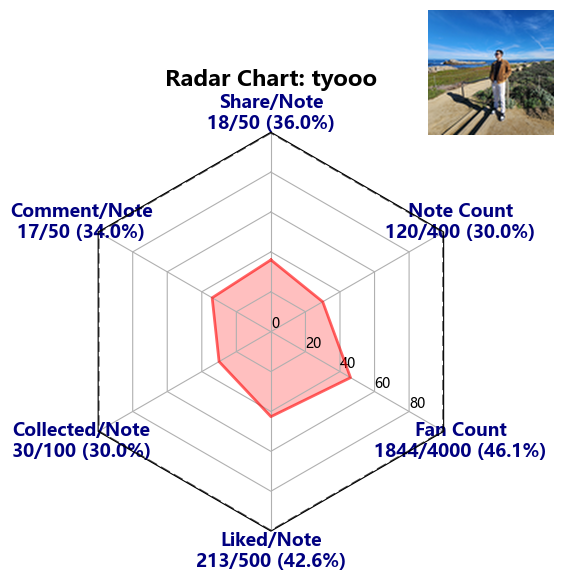

In [146]:
# Suppress font-related warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    try:
        fig = visualize_radar(metrics, normalization_bases)
        plt.show()
    except Exception as e:
        print(f"可视化生成失败: {e}")

In [ ]:
# def generate_koc_radar(notes, creators, normalization_bases=None, frame='polygon'):
#     """
#     Generate a KOC performance radar chart from raw data
    
#     Parameters:
#     notes (list): List of note dictionaries containing engagement metrics
#     creators (list): List containing creator profile data
#     normalization_bases (dict): Benchmark values for metrics normalization
#     frame (str): Radar chart frame type ('circle' or 'polygon')
    
#     Returns:
#     matplotlib.figure.Figure: Generated radar chart
#     """
#     # 1. Calculate engagement metrics
#     metrics = {
#         'sum_collected': sum(int(n['collected_count']) for n in notes),
#         'sum_comment': sum(int(n['comment_count']) for n in notes),
#         'note_count': len(notes),
#         'fan_count': creators[0]['fans'],
#         'sum_share': sum(int(n['share_count']) for n in notes),
#         'sum_liked': sum(int(n['liked_count']) for n in notes)    
#     }

#     # 2. Set default normalization bases if not provided
#     if normalization_bases is None:
#         normalization_bases = {
#             'sum_collected': 15000,
#             'sum_comment': 10000,
#             'note_count': 400,
#             'fan_count': 5000,
#             'sum_share': 15000,
#             'sum_liked': 100000,
#         }

#     # 3. Data validation
#     try:
#         metrics = {k: int(v) for k, v in metrics.items()}
#         required_keys = ['sum_collected', 'sum_comment', 'note_count',
#                         'fan_count', 'sum_share', 'sum_liked']
#         if any(k not in metrics for k in required_keys):
#             raise ValueError("Missing required metrics")
            
#     except (ValueError, KeyError) as e:
#         raise ValueError(f"Invalid data format: {str(e)}") from e

#     # 4. Radar chart components
#     LABEL_ORDER = [
#         ('sum_share', 'Share\nCount'),
#         ('sum_comment', 'Comment\nCount'), 
#         ('sum_collected', 'Collected\nCount'),
#         ('sum_liked', 'Liked\nCount'),
#         ('fan_count', 'Fans'),
#         ('note_count', 'Notes')
#     ]

#     # 5. Calculate normalized values
#     normalized_values = [
#         min(metrics[k] / normalization_bases[k], 1.0) * 100 
#         for k, _ in LABEL_ORDER
#     ]

#     # 6. Create visualization
#     theta = radar_factory(6, frame)
#     fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'radar'})
    
#     # 7. Add avatar
#     try:
#         # Get avatar image 
#         avatar_url = creators[0]['avatar'].split('?')[0] 
#         with urllib.request.urlopen(avatar_url) as response:
#             avatar_data = BytesIO(response.read())
#             avatar_img = Image.open(avatar_data)
        
#         # Define avatar display parameters
#         avatar_zoom = 0.1  
#         base_position = (1, 1.15)  
        
#         # Create offset image using blended transforms
#         avatar_box = OffsetImage(
#             avatar_img,
#             zoom=avatar_zoom,
#             interpolation='lanczos',
#             resample=True
#         )
        
#         # Anchor to upper-right with pixel-perfect positioning
#         avatar_ab = AnnotationBbox(
#             avatar_box,
#             base_position,
#             xycoords='axes fraction',
#             box_alignment=(0.5, 0.5),
#             pad=0.1,
#             frameon=False,
#             bboxprops=dict(edgecolor='white', boxstyle="round,pad=0.1")
#         )
        
#         ax.add_artist(avatar_ab)
#     except Exception as e:
#         print(f"Could not load avatar: {str(e)}")

#     # 8. Plot data
#     ax.plot(theta, normalized_values, color='#FF6B6B', linewidth=1.5)
#     ax.fill(theta, normalized_values, color='#FF6B6B', alpha=0.25)
    
#     # 9. Configure labels and styling
#     labels = [
#         f"{display_name}\n{metrics[k]:,}/{normalization_bases[k]:,}\n({v:.1f}%)"
#         for (k, display_name), v in zip(LABEL_ORDER, normalized_values)
#     ]
    
#     ax.set_varlabels(labels)
#     ax.tick_params(axis='both', which='major', pad=15)
    
#     # 10. Dynamic grid configuration
#     max_value = max(normalized_values)
#     display_max = max(100, (int(max_value // 20) + 1) * 20)
#     grid_values = list(range(0, display_max, 20 if display_max <= 200 else 40))
    
#     ax.set_rgrids(grid_values, angle=240, fontsize=9)
#     ax.set_ylim(0, display_max)
#     ax.plot(theta, [100]*6, color='#4ECDC4', linestyle='--', alpha=0.7, linewidth=1.5)
    
#     # 11. Final styling
#     ax.set_title(
#         f"{creators[0]['nickname']}'s Performance Radar\n",
#         fontsize=18,
#         fontweight='bold',
#         color='#2D3436',
#         pad=40
#     )
    
#     plt.tight_layout()
#     return fig
